#Problem Statement:
Develop a sentiment analysis system for classifying tweets into positive or negative sentiment categories. Implement preprocessing techniques including noise removal, tokenization, spell checking, lemmatization, and contraction expansion. Utilize various machine learning classifiers such as Naive Bayes, Logistic Regression, Support Vector Machine, and Ensemble methods to classify the tweets. Evaluate the performance of each classifier using metrics like accuracy, precision, recall, and F1-score. Finally, create a hybrid ensemble classifier combining the strengths of multiple classifiers to improve overall sentiment analysis accuracy.

In [ ]:
!pip install nltk
!pip install textblob
!pip install bs4
!pip install pyspellchecker
!pip install emoji
!pip install pandas
!pip install googletrans==4.0.0-rc1
!pip install scikit-learn
!pip install matplotlib
!pip install langdetect


In [ ]:
# nltk.stem.wordnet - WordNetLemmatizer is used for lemmatization, which reduces words to their base or dictionary form.
from nltk.stem.wordnet import WordNetLemmatizer

# nltk.tag - pos_tag is used for part-of-speech tagging, which identifies the grammatical parts of words in a sentence.
from nltk.tag import pos_tag

# nltk.tokenize - word_tokenize and sent_tokenize are used for tokenizing words and sentences, respectively, breaking text into individual words or sentences.
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize

# textblob - TextBlob is used for text processing, including sentiment analysis, noun phrase extraction, translation, and more.
from textblob import TextBlob

# nltk.corpus - stopwords is used for obtaining a list of common stopwords, which are words that are considered irrelevant for text analysis.
from nltk.corpus import stopwords

# re and string - re is used for regular expressions, which are powerful tools for pattern matching and text manipulation. string provides common string operations.
import re
import string

# nltk.sentiment.vader - SentimentIntensityAnalyzer is used for sentiment analysis, specifically for analyzing the sentiment of text.
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# bs4 - BeautifulSoup is used for parsing HTML and XML documents, particularly for web scraping tasks.
from bs4 import BeautifulSoup

# spellchecker - SpellChecker is used for spell checking, identifying and suggesting corrections for misspelled words.
from spellchecker import SpellChecker

# emoji - emoji provides functions for working with emojis, including detection and manipulation.
import emoji

# pandas - Pandas is used for data manipulation and analysis, particularly for working with tabular data structures such as dataframes.
import pandas as pd

# googletrans - Translator is used for translating text between languages using Google Translate.
from googletrans import Translator

# sklearn - scikit-learn is a machine learning library that provides various algorithms and tools for tasks such as classification, regression, clustering, and more.
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.svm import SVC
from sklearn.metrics import f1_score, classification_report

# matplotlib - Matplotlib is used for creating static, interactive, and animated visualizations in Python.
from matplotlib import pyplot as plt

# nltk.classify.scikitlearn - SklearnClassifier is used for integrating NLTK classifiers with scikit-learn.
from nltk.classify.scikitlearn import SklearnClassifier

# nltk.corpus.wordnet - WordNet is a lexical database for the English language, providing synsets (sets of synonyms) and definitions.
from nltk.corpus import wordnet



#google translate
translator = Translator(service_urls =['translate.google.com'])

#pyspellchecker
spell = SpellChecker()


#Data Preprocessing
In order to make sure that the work was carried out in the most efficient manner, the dataset used needed to be preprocessed before actual usage. The following flow chart depicts the data pre-processing procedure:

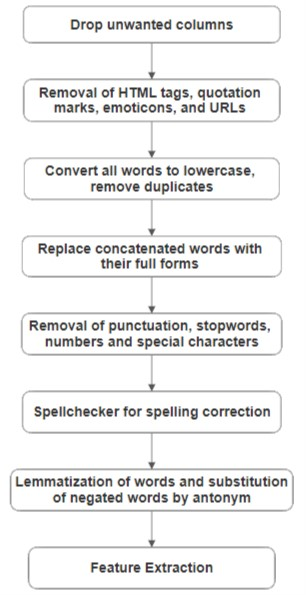


In [ ]:
#label 0 means negative and 4 means positive
data = pd.read_csv("test_data.csv",skip_blank_lines=True,encoding = "latin")
data

ï»¿Label      number                          date  no_query  \
0             0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY   
1             0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   
2             0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY   
3             0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
4             0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
...         ...         ...                           ...       ...   
39996         4  1960186342  Fri May 29 07:33:44 PDT 2009  NO_QUERY   
39997         4  1960186409  Fri May 29 07:33:43 PDT 2009  NO_QUERY   
39998         4  1960186429  Fri May 29 07:33:44 PDT 2009  NO_QUERY   
39999         4  1960186445  Fri May 29 07:33:44 PDT 2009  NO_QUERY   
40000         4  1960186607  Fri May 29 07:33:45 PDT 2009  NO_QUERY   

                  name                                              Tweet  
0      _TheSpecialOne_  @switchfoot http://twitpic.com/2y1zl - Awww, t...  
1        scotthamilton  is upset that he can't update his Facebook by ...  
2             mattycus  @Kenichan I dived many times for the ball. Man...  
3              ElleCTF    my whole body feels itchy and like its on fire   
4               Karoli  @nationwideclass no, it's not behaving at all....  
...                ...                                                ...  
39996  Madelinedugganx           My GrandMa is making Dinenr with my Mum   
39997     OffRoad_Dude  Mid-morning snack time... A bowl of cheese noo...  
39998         Falchion  @ShaDeLa same here  say it like from the Termi...  
39999   jonasobsessedx             @DestinyHope92 im great thaanks  wbuu?  
40000        sugababez               cant wait til her date this weekend   

[40001 rows x 6 columns]

In [ ]:
l=[]
for i in data["ï»¿Label"]:
    if(i==0):
        l.append("negative")
    else:
        l.append("positive")
data['label']=l

In [ ]:
#dropping unwanted columns
data=data.drop(columns=['number', 'date','name','no_query','ï»¿Label'])

In [ ]:
data

Tweet     label
0      @switchfoot http://twitpic.com/2y1zl - Awww, t...  negative
1      is upset that he can't update his Facebook by ...  negative
2      @Kenichan I dived many times for the ball. Man...  negative
3        my whole body feels itchy and like its on fire   negative
4      @nationwideclass no, it's not behaving at all....  negative
...                                                  ...       ...
39996           My GrandMa is making Dinenr with my Mum   positive
39997  Mid-morning snack time... A bowl of cheese noo...  positive
39998  @ShaDeLa same here  say it like from the Termi...  positive
39999             @DestinyHope92 im great thaanks  wbuu?  positive
40000               cant wait til her date this weekend   positive

[40001 rows x 2 columns]

In [ ]:
#removes all emojis
def deEmojify(inputString):
    return inputString.encode('ascii', 'ignore').decode('ascii')

#Contraction function :

The purpose of this function is to provide a mapping of contractions to their expanded forms for text normalization and preprocessing.








In [2]:

def contractions():

    return {
        "ain't":"is not",
        "amn't":"am not",
        "aren't":"are not",
        "can't":"cannot",
        "'cause":"because",
        "couldn't":"could not",
        "couldn't've":"could not have",
        "could've":"could have",
        "daren't":"dare not",
        "daresn't":"dare not",
        "dasn't":"dare not",
        "didn't":"did not",
        "doesn't":"does not",
        "don't":"do not",
        "e'er":"ever",
        "em":"them",
        "everyone's":"everyone is",
        "finna":"fixing to",
        "gimme":"give me",
        "gonna":"going to",
        "gon't":"go not",
        "gotta":"got to",
        "hadn't":"had not",
        "hasn't":"has not",
        "haven't":"have not",
        "he'd":"he would",
        "he'll":"he will",
        "he's":"he is",
        "he've":"he have",
        "how'd":"how would",
        "how'll":"how will",
        "how're":"how are",
        "how's":"how is",
        "ily":"I love you",
        "Ily":"I love you",
        "Ihy":"I hate you",
        "ihy":"I hate you",
        "imy":"I miss you",
        "Imy":"I miss you",
        "I'd":"I would",
        "I'll":"I will",
        "I'm":"I am",
        "im":"I am",
        "I'm'a":"I am about to",
        "I'm'o":"I am going to",
        "isn't":"is not",
        "it'd":"it would",
        "it'll":"it will",
        "it's":"it is",
        "I've":"I have",
        "kinda":"kind of",
        "let's":"let us",
        "mayn't":"may not",
        "may've":"may have",
        "mightn't":"might not",
        "might've":"might have",
        "mustn't":"must not",
        "mustn't've":"must not have",
        "must've":"must have",
        "needn't":"need not",
        "ne'er":"never",
        "o'":"of",
        "o'er":"over",
        "ol'":"old",
        "oughtn't":"ought not",
        "shalln't":"shall not",
        "shan't":"shall not",
        "she'd":"she would",
        "she'll":"she will",
        "she's":"she is",
        "shouldn't":"should not",
        "shouldn't've":"should not have",
        "should've":"should have",
        "somebody's":"somebody is",
        "someone's":"someone is",
        "something's":"something is",
        "that'd":"that would",
        "that'll":"that will",
        "that're":"that are",
        "that's":"that is",
        "there'd":"there would",
        "there'll":"there will",
        "there're":"there are",
        "there's":"there is",
        "these're":"these are",
        "they'd":"they would",
        "they'll":"they will",
        "they're":"they are",
        "they've":"they have",
        "this's":"this is",
        "those're":"those are",
        "'tis":"it is",
        "'twas":"it was",
        "wanna":"want to",
        "wasn't":"was not",
        "we'd":"we would",
        "we'd've":"we would have",
        "we'll":"we will",
        "we're":"we are",
        "weren't":"were not",
        "we've":"we have",
        "what'd":"what did",
        "what'll":"what will",
        "what're":"what are",
        "what's":"what is",
        "what've":"what have",
        "when's":"when is",
        "where'd":"where did",
        "where're":"where are",
        "where's":"where is",
        "where've":"where have",
        "which's":"which is",
        "who'd":"who would",
        "who'd've":"who would have",
        "who'll":"who will",
        "who're":"who are",
        "who's":"who is",
        "who've":"who have",
        "why'd":"why did",
        "why're":"why are",
        "why's":"why is",
        "won't":"will not",
        "wouldn't":"would not",
        "would've":"would have",
        "y'all":"you all",
        "you'd":"you would",
        "you'll":"you will",
        "you're":"you are",
        "you've":"you have",
        "Whatcha":"What are you",
        "luv":"love",
        "sux":"sucks",
        "shit":"bad",
        "tmr":"tomorrow",
        "tmrw":"tomorrow",
        "u":"you",
        "ur":"your",
        "k":"okay",
        "ok":"okay",
        "da":"the",
        "tom":"tomorrow",
        "Tom":"tomorrow",
        "v'll":"we will",
        "wassup":"what is up with you",
        "waddup":"what is up with you",
        "yo":"greet",
        "hey":"greet",
        "lol":"laugh",
        "lmao":"laugh",
        "Lmao":"laugh",
        "rofl":"laugh",
        "y":"why",
        "wut":"what",
        "wat":"what",
        "stfu":"angry",
        "wtf":"angry",
        "ya":"yes",
        "yeah":"yes",
        "ummmm":"confused",
        "ummm":"confused",
        "umm":"confused",
        "hmmm":"confused",
        "i'm":"I am",
        "awww":"amazement",
        "Awww":"amazement",
        "aww":"amazement",
        "Aww":"amazement",
        "can't":"cannot",
        "Can't":"cannot",
        "CAN'T":"cannot",
        "awe":"amazement",
        "Awe":"amazement",
        "ugh":"sad",
        "ughh":"sad",
        "Ugh":"sad",
        "Ughh":"sad",
        "UGHH":"sad",
        "ughhhh":"sad",
        "ughhh":"sad"
        }



#Emoticons:
The purpose of this function is to provide a mapping of emoticons to their corresponding emotional states for text normalization and sentiment analysis.

In [ ]:
def emoticons():

    return {
        ":)":"smiley",
        ":‑)":"smiley",
        ":-]":"smiley",
        ":-3":"smiley",
        ":->":"smiley",
        "8-)":"smiley",
        ":-}":"smiley",
        ":)":"smiley",
        ":]":"smiley",
        ":3":"smiley",
        ":>":"smiley",
        "8)":"smiley",
        ":}":"smiley",
        ":o)":"smiley",
        ":c)":"smiley",
        ":^)":"smiley",
        "=]":"smiley",
        "=)":"smiley",
        ":-))":"smiley",
        ":‑D":"smiley",
        "8‑D":"smiley",
        "x‑D":"smiley",
        "X‑D":"smiley",
        ":D":"smiley",
        "8D":"smiley",
        "xD":"smiley",
        "XD":"smiley",
        ":‑(":"sad",
        ":‑c":"sad",
        ":‑<":"sad",
        ":‑[":"sad",
        ":(":"sad",
        ":c":"sad",
        ":<":"sad",
        ":[":"sad",
        ":-||":"sad",
        ">:[":"sad",
        ":{":"sad",
        ":@":"sad",
        ">:(":"sad",
        ":'‑(":"sad",
        ":'(":"sad",
        ":((((":"sad",
        ":(((":"sad",
        ":((":"sad",
        ":(":"sad",
        ":/":"sad",
        ":///":"sad",
        ":////":"sad",
        "://///":"sad",
        "://":"sad",
        ":///////":"sad",
        ":////":"sad",
        "-_-":"angry",
        ":|":"normal",
        ";)":"playful",
        ";D":"playful",
        ":‑P":"playful",
        "X‑P":"playful",
        "x‑p":"playful",
        ":‑p":"playful",
        ":‑Þ":"playful",
        ":‑þ":"playful",
        ":‑b":"playful",
        ":P":"playful",
        "XP":"playful",
        "xp":"playful",
        ":p":"playful",
        ":Þ":"playful",
        ":þ":"playful",
        ":b":"playful",
        "<3":"love"
        }




The purpose of this function is to preprocess a given sentence by removing noise such as URLs, account handles, emoticons, contractions, stopwords, punctuation, and numbers, and performing spelling correction before lemmatization.

In [ ]:
def removal_of_noise(sent):
    clean_sent=[]
    temp_st=""
    list_sent=sent.split(" ")
    c=0
    d=contractions()
    emoji=emoticons()
    for word in list_sent:
        #removal of url
        word = re.sub(r"http\S+", "", word)
        word = re.sub(r"[www.][a-zA-Z0-9_]+[.com]", "", word)
        #removal of account handles '@'
        word = re.sub("(@[A-Za-z0-9_]+)","", word)

        #replacing emoticons with their respective words
        if(word in emoji.keys()):
            word=emoji[word]
        #replacing short form words with their full form
        if(word.lower() in d.keys()):
            word=d[word.lower()]
        if(c==0):
            temp_st=word
        else:
            temp_st=temp_st+" "+word
        c=c+1
    sent=temp_st
    stop_words = set(stopwords.words('english'))
    stop_words.add('is')
    stop_words.remove('not')
    for word in word_tokenize(sent):
        if(word.lower() not in stop_words and word.lower() not in string.punctuation and word!="'" and word!='"' ):
            #print(word)
            word=spell.correction(word.lower())
            if word is not None:
                word=re.sub("[0-9]+","",word)
                word=re.sub("[.]+"," ",word)
                word=re.sub("[-]+"," ",word)
                word=re.sub("[_]+"," ",word)
                word = re.sub("~"," ", word)
            if word is not None and len(word) != 1:
                clean_sent.append(word.lower())
    cleaned_st=""
    for i in clean_sent:
        cleaned_st=cleaned_st+" "+i
    #print(cleaned_st)
    return lemmatization(cleaned_st)




#Lemmatization:
The purpose of this function is to perform lemmatization on a given sentence, considering the part-of-speech (POS) tags of each word, and also handle negations by replacing the word "not" with its antonym if applicable.

In [ ]:
def lemmatization(sent):
    lemmatize=WordNetLemmatizer()
    sentence_after_lemmatization=[]
    for word,tag in pos_tag(word_tokenize(sent)):
        if(tag[0:2]=="NN"):
            pos='n'
        elif(tag[0:2]=="VB"):
            pos='v'
        else:
            pos='a'
        lem=lemmatize.lemmatize(word,pos)
        sentence_after_lemmatization.append(lem)
    st=""
    for i in sentence_after_lemmatization:
        if(i!="be" and i!="is" and len(i)!=1):
            st=st+" "+i
    #print("lemi",st)
    c=0
    list_text=st.split()
    flag=0
    new_st=""
    for i in list_text:
        temp=i
        if(flag==1):
            flag=0
            continue
        if(i=="not" and (c+1)<len(list_text)):
            for syn in wordnet.synsets(list_text[c+1]):
                antonyms=[]
                for l in syn.lemmas():
                    #print(l)
                    if l.antonyms():
                        antonyms.append(l.antonyms()[0].name())
                        #print(antonyms)
                        temp=antonyms[0]
                        flag=1
                        break
                if(flag==1):
                    break
        new_st=new_st+" "+temp
        c+=1
    #print(new_st)
    return new_st



In [ ]:
#nltk module to get the sentiment polarity
def sentiment_analysis(sent):
        sid = SentimentIntensityAnalyzer()
        #print("-------------------------------------")
        print(sent)
        #print("-------------------------------------")
        ss = sid.polarity_scores(sent)
        x=ss['pos']
        y=ss['neg']
        print(x-y)
        print("-------------------------------------")
        return x-y



#Start:
It will start cleaning the data

In [ ]:
def start(text):
    #removes html tags
    text =BeautifulSoup(text).get_text()
    text =text.replace("’","'")
    new_text=sent_tokenize(text)
    #print((new_text))
    result=0
    new_str=""
    #removing emojis
    for i in new_text:
        j=deEmojify(i)
        res=removal_of_noise(j)
        new_str=new_str+" "+res
    return new_str


In [ ]:
clean_list=[]
for i in data["Tweet"]:
    print()
    print(i)
    x=start(i)
    clean_list.append(x)
    print()
    print(x)
    print("-------------------------")


@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D

  aww bummer  should get david carr third day  playful
-------------------------

is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah!

  upset update casebook test might cry result school today also  blah
-------------------------

@Kenichan I dived many times for the ball. Managed to save 50%  The rest go out of bounds

  dive many time ball  manage save rest go bound
-------------------------

my whole body feels itchy and like its on fire 

  le body feels itchy like fire
-------------------------

@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there. 

  behaving  mad   see
-------------------------

@Kwesidei not the whole crew 

  le crew
-------------------------

Need a hug 

  need hug
-------------------------

@LOLTrish hey  long time no see! Y


  hate happen
-------------------------

I have a sad feeling that Dallas is not going to show up  I gotta say though, you'd think more shows would use music from the game. mmm

  sad feeling dallas go show get say though would think show would use music game  mmm
-------------------------

Ugh....92 degrees tomorrow 

  ugh degree tomorrow
-------------------------

Where did u move to?  I thought u were already in sd. ?? Hmmm. Random u found me. Glad to hear yer doing well.

  move  think already sd   hmmm  random find  glad hear yer
-------------------------

@BatManYNG I miss my ps3, it's out of commission  Wutcha playing? Have you copped 'Blood On The Sand'?

  miss ps commission watch playing  cop blood sand
-------------------------

just leaving the parking lot of work! 

  leave parking lot work
-------------------------

The Life is cool. But not for Me. 

  life cool 
-------------------------

Sadly though, I've never gotten to experience the post coitus cigarette before, 


  lay bed voice
-------------------------

I'm sooo sad!!! they killed off Kutner on House  whyyyyyyyy

  soon sad  kill outer house whyyyyyyyy
-------------------------

@jacobsummers Sorry  tell them mea culpa from me and that I really am sorry.

  sorry tell mea culpa really sorry
-------------------------

@Alliana07 it didn't make any sense to me, the suicide thing. I refuse to believe that that is actually what happened. 

  make sense suicide thing  refuse believe actually happen
-------------------------

@salancaster  hope your ok.

  hope ok
-------------------------

@mercedesashley Damn! The grind is inspirational and saddening at the same time.  Don't want you to stop cuz I like what u do! Much love

  damn  grind inspirational maddening time  want stop cut like  much love
-------------------------

@HibaNick yeah aw but i know i wudnt stand a chance 

  yes aw know wundt stand chance
-------------------------

ugh. cant sleep. its 1:30am. 

  ugh  cant sleep 
-----------


  page voodoo long  get deleted sad day history
-------------------------

Crazy wind today = no birding  http://ff.im/1XTTi

  crazy wind today bind
-------------------------

currently at work.. 

  currently
-------------------------

Grrr.. my ipods acting weird too! Jai ho and thinking of you aren't playing the full songs.. ughh. 

  grrr pod act weird  jai ho think play full song ugh
-------------------------

@penndbad send me the DVD cos I have missed out on heaps  NOT happy about that!

  send do co miss heap happy
-------------------------

i don't see the big deal with this website 

  see big deal webster
-------------------------

@machineplay I'm so sorry you're having to go through this. Again.  #therapyfail

  sorry go   therapyfail
-------------------------

@ColinDeMar Far too out of the way for rail.  any other tips?

  far way rail  tip
-------------------------

I'm not still up I swear. Why do I keep losing. gaining. losing. gaining. tweeps?  So heart wrenching.



  tuesday start reflection lecture stress reduce technique  sure might become useful us accompanies
-------------------------

What tragedy and disaster in the news this week 

  tragedy disaster news week
-------------------------

yes yes still trying to find a picture that will upload correclty.. 

  yes yes still try find picture unload correclty
-------------------------

Why oh why was the Red Sox game rained out? I was so looking forward to opening day 

  oh red sox game rain  look forward open day
-------------------------

I still can't find my keys. 

  still find key
-------------------------

@charlietm I know right. I dunno what is going on with twitter. 

  know right  dunno go
-------------------------

might be getting a sore throat again 

  might get sore throat
-------------------------

@labelsnotlove   my home town. My mammy called all depressd.  Pls explain y a parent let their 8yr old child walk alone? Hello? Its 2009!

  home  mammy call depressed  pls explain


  mad tire today call early tonight night night twist
-------------------------

@LevenRambin: Take it easy, and be good to you. 

  take easy good
-------------------------

I'm afraid I had bad code. 

  afraid bad code
-------------------------

Think I'm going to bed. Goodniight. I hate this 

  think go bed  goodnight  hate
-------------------------

@riancurtis  i'm here, friend, and i love you.

  friend love
-------------------------

@kariajay  All this time you didn't notice I was gone...just needed DB2 is it??

  time notice go need db 
-------------------------

@aaronrva is in the bathroom and i have to pee!    

  bathroom pee
-------------------------

@ashleyskyy but I wanted a margarita too! 

  want margarita
-------------------------

@KourtneyKardash yup night workouts r the worst but unfortunetly my work schedule only allows me to go at night  its tough!

  yup night ut worst unfortunately work schedule allow go night tough
-------------------------

Just called H


  fun furious  new mantra bay breaker  get rambunctious city over react clamped
-------------------------

@amber_benson  my hubby (for some reason) thinks it's more important he has a good spot for red carpet for the Trek Movie Premiere. Sod!

  hubby reason think important good spot red carpet trek movie premiere  sod
-------------------------

I swear no matter how long I've been getting up at 5am, it never gets any easier. Man my eyes hurts wah 

  swear matter long eve get never get easy  man eye hurt wah
-------------------------

@Jeffree_Star Jeffree! How do you keep your hair one color? My PERMANENT dye fades within the week 

  jeffrey  keep hair one color  permanent dye fade within week
-------------------------

@otakusecret my reaction too  whoa, didn't see that coming

  reaction see come
-------------------------

still sick. feeling a bit better, got some new medicine.... hope I feel good after a night of sleep. ohh, and it's suppose to snow! WTF! 

  still sick  feel 


  twiggassssssss range day back hopefully good
-------------------------

@danadearmond 

 
-------------------------

anyone who reads this pray for my Grandma. She's in pain 

  anyone read pray grandma  pain
-------------------------

#3 woke up and was having an accident - &quot;It's pushing, it's pushing!&quot; he was crying because he couldn't stop from wetting his pants.  

  woke accident push push  cry could stop wet pant
-------------------------

Home from Franklin street, I almost jumped over a fire. Someone kicked it before I could.  Jenny lost her shoe.

  home franklin street almost jump fire  someone kick could  jenny lose shoe
-------------------------

@johnnybeane hey! you just changed your default. 

  hey  change default
-------------------------

Finally gave in and was bored enough to start this thing. I think the 140 is going to be a problem for me tho.  its like a myspace status.

  finally give bore enough start thing  think go problem tho  like space status



  tireddddddd  want sleep assignment finish exam tomorrow study
-------------------------

You know, I was thinking... I need money 

  know think  need money
-------------------------

omg..its jst teusday 

  omg its just tuesday
-------------------------

@ddlovato @David_Henrie ummmmm i cant find it. 

  mmmm cant find
-------------------------

Just heard that they found Sandra Cantu... She was only 8 yrs old 

  heard find sandra cant yr old
-------------------------

@corrosivecandy Ive forgotten how to snoo-snoo  I wonder if snoo-snoo and I will ever meet again...

  ive forgotten snoo snoo wonder snoo snoo ever meet
-------------------------

@AmaNorris wow that last tweet made me seem like a giant sexist...sorry about that 

  wow last tweet make seem like giant sexist rry
-------------------------

My bathtub drain is fired: it haz 1 job 2 do, &amp; it iz FAIL. I got all Drano on its ass, &amp; iz STILL NOT DRAINING. I wanna shower, dangit!! 

  bathtub drain fire have job 


  test footage girlfriend hd dark one unexposed
-------------------------

Such a tough game to watch tonight for State  Finally going to bed after also staying up to watch the season premiere of the Hills!

  tough game tonight state finally go bed also stay season premiere hill
-------------------------

Seems jRuby support for hpricot is now two versions behind 

  seem ruby support apricot two version behind
-------------------------

@JinxCat Unlike my sister...I still don't have one 

  unlike sister still one
-------------------------

Fraking app store is pissing me off   http://tinyurl.com/c4ooho

  frame app store pissing
-------------------------

Logging out. I need to study.... 

  log  need study
-------------------------

anyone else having problems accessing TTB??? I cant get on!!! 

  anyone else problem access tt  cant get 
-------------------------

I strongly dislike people who make stupid comments and dont know the whole story 

  strongly dislike people make stup


  wait game episode  confuse
-------------------------

@carlyw66 HAHA. I cried...  I guess he did....

  aha  cry  guess
-------------------------

I don't get statistics!  Its all a bunch of mumbo jumbo for me.

  get statistic  bunch mumbo jumbo
-------------------------

@sloanb Got it, sadly, only works for UK &amp; US at the moment 

  get sadly work uk us moment
-------------------------

Evicted 

  evict
-------------------------

doesn't enjoy learning CSS. 

  enjoy learn co
-------------------------

@nachojohnny Brian don't make me fuck u up LOL I replied 2 ur message...did u get my # ? I miss u 

  brian make fuck laugh reply message get  miss
-------------------------

@heidimontag I  dvr'd it and went to watch it, apparently the dish network went down SO I MISSED IT    I will have to catch a rerun!

  dvr go apparently dish network go missed catch rerun
-------------------------

@JessDubb lmao. U may have to wait for another season to come thru. its summe boo. Hot nd 


  sure everyone ruin gift whitney serious cell easter well
-------------------------

is at Beso in Hollywood... so tired 

  beso holly tire
-------------------------

I don't want to wake up early tomorrow.  Damn you, work!

  want wake early tomorrow  damn work
-------------------------

just finished watching the movie Prayers for Bobby. Broke my heart 

  finished thing movie prayer bobby  break heart
-------------------------

@syekr is myki really horrible? 

  miki really horrible
-------------------------

@stephenkruiser i had 2 put my dog down today too  someone ran her over

  put dog today someone run
-------------------------

@NevadaWolf Sorry to hear about your DNF run tonight. Always a risk to get bad coords on an FTF!! 

  sorry hear dna run tonight  always risk get bad chord ft 
-------------------------

@Honey3223 I did get some disgruntled people when I wrote my ESN, but the 1000 hits in one day made up for it. Bill pulls in 250 tops 

  get disgruntled people te


  four game fall modern warfare halo oust brutal legend bostock need cash
-------------------------

@d_castillo ugh, that's disconcerting 

  ugh disconcert
-------------------------

@Devinthedude007 actually the whole site has finally been taken over by those damn russians 

  actually le site finally take damn russian
-------------------------

MY TWEETS ARENT GOING THROUGH 

  sweet agent go
-------------------------

Just finished a delicious breakfast, my last in Paris  I'll miss milk, europe has the tastiest milk in the world, I don't drink it in US.

  finish delicious breakfast last paris all miss milk europe tasty milk world drink us
-------------------------

iLearn is down and out, great considering finals are this week... 

  learn great consider final
-------------------------

@Carmonium i'm stressed outttt 

  stress output
-------------------------

Also I shouldve Bern asleep an hour ago 

  also should bern asleep hour ago
-------------------------

trying to figur


  time come back flavia double date  seriously sorry hear
-------------------------

I'm up way to late to be working for a client 12:10 AM  #fb

  way late working client fb
-------------------------

blegghhhh i have to go to work 

  blegghhhh go work
-------------------------

Back at work  @ John Muir Dr http://loopt.us/KoqAbg

  back work john muir dr
-------------------------

@DAChesterFrench I emailed you yesterday and u never responded 

  mail yesterday never respond
-------------------------

It's going to be a long year for A's fans. 

  go long year fan
-------------------------

Just got done watching the new House episode.Definitely one of the saddest episodes ever. 

  get do thing new house episode definitely one saddest episodes ever
-------------------------

Man... taxes suck.  I'm horrified that i did something wrong on them.  TurboTax decided to keep around a lot of the stuff I turned off.  

  man tax suck  horrify something ng  turbot decide keep around lot st


   apparently degrees pm washington state  miss winter already
-------------------------

being bored at homee 

  bore home
-------------------------

massage was great. i just spilled coke all over my desk  lame. watching the simpsons as i've finished all my hills dvds.

  massage great  spill coke desk lame  thing simpson eve finish hill dad
-------------------------

@nick_carter I will wait for you at fanclub chat.. even tough you're not my favorite 

  wait fanclub chat even tough favorite
-------------------------

has a mild left inner ear infection.. and its got this irritating &quot;blocked&quot; feeling since sunday.. 

  mild leave inner ear infection get irritate block feeling since sunday
-------------------------

@JaneBodehouse Hey there! Nope. My cuteness @HoytFortenberry is away for awhile 

  greet  nope  cuteness away awhile
-------------------------

It's only tuesday 

  tuesday
-------------------------

Haha not even yo. I just didn't know how to do that @thang


  listen  get really bad headache drive lesson ten mins lucky want sleep
-------------------------

@Steve_Buscemi SHUT UP you...I am hungry! And in Britain, home of the most boring suckassy breakfast in the world!  I MISS DENNYS!!

  shut hungry  britain home bore suckassy breakfast world  miss dennis 
-------------------------

good morning everybody! pkoi y fais pas beau  bon coffee time!

  good morning everybody  koi fair pas beau bon coffee time
-------------------------

work again 

  work
-------------------------

Essay time.... 

  essay time
-------------------------

@chauncey78 hey did u talk to mom.. r they home yet? i hope they r ok.. wish i was coming home 4 easter.. 

  greet talk mom home yet  hope wish come home eastern
-------------------------

@endearingevania I sure wish I could go with you guys tmrw. But as per usual, school interferes. 

  sure wish could go guy trw  per usual school interferes
-------------------------

@widyatarina say what??? kal penn's le


  almost italian homework  eee eee understood
-------------------------

Who turned the lights on? It will be time to get ip then 

  turn light  time get ip
-------------------------

@therealnph Twitter hates us both then.  

  twitter hat us
-------------------------

I hate the fact that I'm genuinely excited about my last tweet 

  hate fact genuinely excite last tweet
-------------------------

@celesteclara i can't sleep either 

  sleep either
-------------------------

@TheBlondeTheory Between that and the Italy earthquake, it's been a very sad news day. 

  italy earthquake sad news day
-------------------------

@champagnemanoir all rain today  . Garden really needs it so not quite so bad.

  rain today  garden really need quite bad
-------------------------

Yawn yawn yawn!! 10 more minutes in bed 

  yawn yawn yawn  minute bed
-------------------------

@MajesticFlame ouch - sounds very sucky 

  ouch sound lucky
-------------------------

@bengottlieb Great idea with the


  read biology bedtime great premise turn ok book lot info already know
-------------------------

Home! I really wana sleep, but due to wasting my free line in town I have an assignment to finish 

  home  really want sleep due waste free line town assignment finish
-------------------------

@hellobebe I also send some updates in plurk but i upload photos on twitter!  you didnt see any of my updates on plurk? Zero? 

  also send update pluck unload photo twitter  dint see update pluck  zero
-------------------------

omg... &quot;The Reader&quot; is making me 

  omg reader make
-------------------------

@cloudpimps d'oh! At least you're getting a decent exchange rate at the moment, sterling is still getting flogged 

  doh  least get decent exchange rate moment sterling still get flog
-------------------------

tried to download tweetdeck but it wont download 

  try road tk wont road
-------------------------

There's an inch of snow on the ground (and counting). I'm worried abou


  need new glass mine hannon arm
-------------------------

Meat Week Day 3: Tummy hurts every night 

  meat week day tummy hurt every night
-------------------------

Why isn't there a &quot;fake&quot; Verruca on Twitter?... Now i'm sad. 

  fake verruca twitter  sad
-------------------------

On the phone with the bestie than shower.. Confused I don't know what to do 

  phone bessie sho  confuse know
-------------------------

@Sirrah21 Aww poor froofroo, this is way too late for you 

  amazement poor froofroo way late
-------------------------

i miss my 808 fam 

  miss fam
-------------------------

@OfficialPRofOZ she sed puerto rican 

  sed puerto rican
-------------------------

@JoeFernandez @klout your not thinking of selling are you? 

  think selling
-------------------------

@simX Yeah. I always slow down at the end  ÃÃ¸Î©ÃÃ¸Î©also, take that! I win.

  yeah  always slow end also take 
-------------------------

@pornstartweet i wanna go, but I am only 20!!!! 

  w


  mobilityvic org launch  grog nice video pc though
-------------------------

still no &quot;followers&quot;   please some1 inform me on how this works????

  still follower please some inform work 
-------------------------

misses him right now. i need a hug 

  miss right  need hug
-------------------------

Tried to get up earlier today........didn't work out 

  tried get early today do n't work
-------------------------

Omg revisions revisions revisions! I feel like I wasted an amazingly beautiful day today doing pointless work 

  omg revision revision revision  feel like waste amazingly beautiful day today pointless work
-------------------------

Foot is out of commission  ouch! Running this morning did not help...not smart.

  foot commission ouch  run morning help smart
-------------------------

About to shower, which I hope will wake me up at last. Oh, and the synth experiments yielded nothing last night 

  shower hope wake last  oh synth experiment yield nothing last 


  oh wait oakland with  understand oakland
-------------------------

is missing talking to my bff on da phone!!!! 

  miss talk off phone 
-------------------------

wondering why I am so stupid  Need to eat more fish I guess *sigh*...

  wonder stupid need eat fish guess sight
-------------------------

i miss my old friends from elementary ans middle school 

  miss old friend elementary an middle school
-------------------------

@twitter please fix this http://sp2.ro/5b7bdb because it brakes all external twitter avatar searches 

  please fix brake external twitter avtar search
-------------------------

looks like i've missed out on yet another job  someone please employ me! Haha

  look like eve miss yet another job someone please employ  aha
-------------------------

@tacce dang, I'll get HOUSE off iTunes. I hear it was a devastating episode 

  dang all get house tune  hear devastate episode
-------------------------

Wow.... the shout box has kicked me out and I can't get b


  sorry  maybe walk around goofy store would help hint hint  love
-------------------------

@Contempted Did the heroics ever go through! If not sorry! 

  heroic ever go  sorry
-------------------------

im so tired this morning and there was only cold shower water!not happy 

  tired morning cold shower water happy
-------------------------

haha I've been with my grandma for 2 days. even she's about 5 houses away, I'll still miss her 

  aha eve grandma day  even house away all still miss
-------------------------

clearing my desk... 

  clear desk
-------------------------

w/ every person there. I didn't get a pic  my phone died but he signed my shirt so amazing words cannot describe should've skipped mel lol

  we every person  get pic phone die sign shirt amaze word describe skip mel laugh
-------------------------

is crying inside. Please oh please let it rain  so warm.

  cry inside  please oh please let rain
-------------------------

@thecoolestout 

 
-------------------


  give fan car rental discount  look sad could turn
-------------------------

ordered a pita...it NEVR came! why they say the fax machine broke and the driver left, what about my empty BELLY 

  order pity never come  say fax machine break driver leave empty belly
-------------------------

Britney was fucking amazing!! After we just went back to the hotel...I hate travelling with cheapos. 

  whitney fuck amaze  go back hotel hate travelling cheapo
-------------------------

@powerpoole some people try to be tricky, some stop using twitter at all  i guess it's as good as it gets! i had to try.

  people try tricky stop use twitter guess good get  try
-------------------------

@dra6on now I am sad cos u r sad 

  sad co sad
-------------------------

@gotobekiddingme I tried.....and failed 

  try and fail
-------------------------

@ditty003 I'm looking at mine And I can't even get to it... School work sucks...atleast when u get home that's it  LOL

  look mine even get school work


  cherie update  old leave legs fix possible old right leg well bad still hip dysplasia hip good
-------------------------

Just got back from the hospital. BF's nephew might have meningitis 

  get back hospital  bf nephew might meningitis
-------------------------

Chi?u nay h?p chu?n b? t? ch?c m?y s? ki?n ? tr??ng ! Bao nhiÃÃ¸Î©u vi?c 

  chi nay chu   ch  ki  tr  ng  bao chiu vi
-------------------------

is coldd 

  cold
-------------------------

Please watch this vid and tell me if you are not moved  http://www.youtube.com/watch?v=EUJSME0TORw

  please vid tell move
-------------------------

Boo another day at work  but only 3 to go then 3 days off ; )

  boo another day work go day
-------------------------

driving to schiphol. apperantly I am not the only one. Stuck around aalsmeer 

  drive schiphol  apparently one  stick around aalsmeer
-------------------------

Not anymore  how does Daisy manage to take up 75% of the bed?

  anymore daisy manage take bed
------------


   go mexico
-------------------------

@sweetlyaroundme ps I woke up this morning and I cant access any websites!  or I havent cleaned my computer completely

  wake morning cant access webster  havent clean computer completely
-------------------------

Hates hearing his girl being ill, nothing I can do though 

  hate hear girl ill nothing though
-------------------------

@SteveDiamond I know they have trouble, but I never heard a thing. I had MANY recommendations from MrTweet. 

  know trouble never hear thing  many recommendation mr
-------------------------

@ScarlettDane no  mary &amp; i were going to go dress shopping tomorrow.

  mary go go dress shopping tomorrow
-------------------------

@NoelClarke Good morning you. Stop ignoring me just cos i said i like *cough* Take That  Am very sad now..boo hoo!

  good morning  stop ignoring co say like cough take sad hoo
-------------------------

Feeling light headed and gross 

  feel light head gross
-------------------------

t


  remember day  neither siiiiike  miss old body someday soon shall miiiiine
-------------------------

back @ work. Had a bad start of day almost falling down the stairs  Not enjoying work yet...

  back  bad start day almost fall stair enjoy work yet
-------------------------

i &lt;3 CIGS..RIP 

  love cigs rip
-------------------------

i'm up, so much paperwork to do today. `n i'm kinda getting sick  not fun

  much paperwork today  kind get sick fun
-------------------------

Just did 5km on the tready and want to die... I'm not built for running... 

  km ready want die  build run
-------------------------

@un1xnut if only I didn't work an evening/night job 

  work evening/night job
-------------------------

Need's help with this anxiety crap 

  need help anxiety crap
-------------------------

@CHASEBOOGIE lol dont ask i was being nice given a ride shit started bar b cueing on the freeway  lmao i been had mine ready

  laugh dont ask nice give ride bad start bar cue freeway


  blah throat sore keep coughing  hate sick
-------------------------

I'm sitting up, unable to sleep 

  sit unable sleep
-------------------------

Motivated to sleep, but I'm feeling quite icky. 

  motivate sleep feeling quite icy
-------------------------

Oh dear, all the pups died 1 by 1 last night, perhaps it was because Princess rejected them 

  oh dear pup die last night perhaps princess reject
-------------------------

I am going to be 30 in a month...  Ugh 

  go month sad
-------------------------

3 in the morning and I can't sleep. 

  morning sleep
-------------------------

@scarletjac thanks, I know that video is harrowing, especially the last 2 minutes  I must admit I cried

  thanks know video harrow especially last minute must admit cry
-------------------------

Just wrote a 2 pg paper n 30 min, studied n now off 2 bed. Gotta wake up n 3 hours. OH JOY!  Nite all!

  te pg paper min study bed  get wake hour  oh joy  nite
-------------------------

beginning to 


  feel bit good today least  idea happen yesterday  way school ugh
-------------------------

Just about to leave for another exciting day at work 

  leave another exciting day work
-------------------------

@christieeee Aww, I'm so sorry dearyy 

  aww sorry dearly
-------------------------

Fuck la circulation ce mat1 

  fuck la circulation ce mate
-------------------------

Can't belive it.. We're home!! So sleepy 4 hrs today..  in Round Rock, TX http://loopt.us/GEtn1w

  believe it home  sleepy hr today round rock tx
-------------------------

I'm at disneyland again Ahaha! And i'm sad the pineapple stand is closed... I have 3 dollars 

  disneyland ah ha  sad pineapple stand close  dollar
-------------------------

Ok... so 2 hours into the self imposed shopping ban, and i am already aching for a shoe fix...this is going to be harder than i thought 

  ok hour self impose shopping ban already ache shoe fix go hard thought
-------------------------

My whip cream is melting 

 


  let everest subscription lapse  play anymore  time
-------------------------

had a flu shot at work, now my arm hurts 

  flu shot work arm hurt
-------------------------

@heidimontag I love the hills but I missed the show tonight 

  love hill miss show tonight
-------------------------

@JesMayhemWA Still trying to sell the prelude? 

  still try sell prelude
-------------------------

@katsun At this point, I'm trying to remain optimistic that it won't be as delayed as Live365 but it's getting harder each day 

  point try remain optimistic delayed live get hard day
-------------------------

Twitter is down? 

  twitter
-------------------------

@Kal_Penn OMG I am so mad! You were my favorite character  I'll miss 'you'

  omg mad  favorite character all miss you
-------------------------

Wishes David Cook was coming to phoenix  trying to figure out a way to get to San diego on June 18th to see him.... I'm obsessed

  wish david cook come phoenix try figure way get san diego 


  read update blogspot bulletin space etc  could figure  care
-------------------------

@thelmarockz thelma I can't see shiz I see blank and me and u comments 

  thelma see ship see blank comment
-------------------------

Back at :work, have to go to ::Zeist in a minute. But want to stay here to do some work 

  back work go zest minute  want stay work
-------------------------

I thought you could buy Silent Hill for the PSP on the PS Store? I can't find it anywhere? 

  thought could buy silent hill psp store  find anywhere
-------------------------

Doing my taxes. Not in the best mood because of this 

  tax  best mood
-------------------------

I am not a fan of sleeping alone  baby boo

  fan sleep alone baby boo
-------------------------

I NEVER THOUGHT THAT I COULD  HATE SOMBODY, BUT I REALLY HATE YOU ÃÃ¸Î©TOBE D....ÃÃ¸Î©, I ONLY GAVE YOU ALL OF MY LOVE AND YOU  PAY ME SO BAD! 

  never think could hate somebody really hate tone give love pay bad
------------------------


  confuse well good luck
-------------------------

just got a denied letter from bazaar bizarre. sad. i was looking forward to a road trip to be a vendor there 

  get denied letter bazaar bizarre  sad  look forward road trip vendor
-------------------------

Now even more annoyed with Bones. I would have preferred the gratuitous grossness. Poor Angela 

  even annoy bone  would prefer gratuitous grossness  poor angela
-------------------------

@OnlineMigration me too!, although im still going  hehe

  although still go here
-------------------------

I am layin in bed @ 3am cos my tummy is beatboxn so bd so I hd 2 wake up. can't eat. Unburnable calories nt gd for my &quot;abs&quot; I am hungry! 

  latin bed cos tummy beaton bd hd wake  eat  unburnable calorie nt gd abs hungry
-------------------------

Bed... Work in am 

  bed work
-------------------------

No rain please 

  rain please
-------------------------

@gabysslave thanks - you too! I have an essay to write 

  thanks


  laugh mm sorry stick bored yes hun think try keep entertain ca n't easy
-------------------------

@Jamzeee I knowwwwww I sukkkk !!....   .. Take care of my gurls ...

  knowwwwww sukkkk  take care girl
-------------------------

@Kal_Penn arrrggghhh, and I hadn't seen last night's episode yet! Pity to lose you, though. 

  arrrggghhh see last night episode yet  pity lose though
-------------------------

Early morning meetings 

  early morning meeting
-------------------------

@infidelsarecool ugh how depressing.    i want to punch something.

  sad depressing  want punch something
-------------------------

I STILL don't understand how to setup subversion for a website 

  still understand setup subversion webster
-------------------------

@imperiusrex Brahbrah. Ugh. Bed in a hour. 

  brahbrah  ugh  bed hour
-------------------------

@joshsharp no money yet, i dont know anyone who has  maybe its all just a lie!! hes having us on so we all like him a little bit more lol

  mon


  good morning world could sleep tonight copenhagen want leave head
-------------------------

Flo rider has sampled that blue song he messed that song up for me 

  flo rider sample blue song mess song
-------------------------

@devakishor Oh oh! That's sad! 

  oh oh  sad
-------------------------

i had a extravagant yet time conserving plan lined up for today.......which ive now forgotten 

  extravagant yet time conserving plan line today ive forgotten
-------------------------

@iwouldificould How have you watched it? I tried the youtube link but it won't work! 

  hed  tried couture link work
-------------------------

missing my boyfriend  who im on the phone with but its just not the same TWEET

  miss boyfriend phone tweet
-------------------------

wont get any rudd money   for those in doubt... http://calculators.ato.gov.au/scripts/axos/axos.asp?CONTEXT=&amp;KBS=ESB.xr4&amp;go=ok

  wont get rudd money doubt
-------------------------

@RebeccaMayne That does sound boring 


  good  go bed
-------------------------

baking oatmeal + chocolate chip cookies to make me tired.  i can't sleep 

  bake oatmeal chocolate chip cooky make tired  sleep
-------------------------

and so the editing of 3000 wedding shots begins 

  edit wed shot begin
-------------------------

my facebook is Fucked. 

  casebook fuck
-------------------------

@KellyShibari i thought i saw you there! you were walking out the door when i saw you. 

  thought saw  walk door saw
-------------------------

@derek319 @shwe370 sweet! That was fun... Except it stretched my browser... And I was watching Twit! 

  sweet  fun  except stretch bros thing twit
-------------------------

Ads not yet appeared  Google Adsense Team said it may delay 48 hrs on http://womenissues.info

  ad yet appear goole sense team say may delay hr
-------------------------

tired  i need a regular 9-5

  tired need regular
-------------------------

my dog is in my room SNORING! 

  dog room snore
----------------


  see anything stupid couture location restriction  speedo
-------------------------

She now wants an mmmf except I have to only play a supporting role  would mind but the other two guys have huge cocks what am I to do? 

  want mmm except play support role would mind two guy huge cock
-------------------------

Banned from Sims Forums for the rest of the week. Aww    It feels weird. I was only sticking up for Chanel :'(

  ban sims forum rest  amazement feel  stick chanel sad
-------------------------

@willadam i treated myself to that latte after the appointment which was horrible. I need to have my wisdom teeth surgically removed 

  treat late appointment horrible  need teeth surgically remove
-------------------------

@CelesteChong oh but mine is ceramic so its more ex  abit less visible. inside ones are very ex! double the price n double the duration

  oh mine ceramic ex bit less visible  inside one ex  double price double duration
-------------------------

Dear Crimestoppe


  wow epical  search epical see many entry apparently widely use  depressed
-------------------------

I don't want to be cold in April, but I am 

  want cold april
-------------------------

Noes, my goat-wool socks have worn through 

  no goal sock wear
-------------------------

SO tired but can't sleep 

  tired sleep
-------------------------

Dropped car off to get exhaust replaced - that's ÃÃ¸Î©250 I could do without spending 

  drop car get exhaust replace could ut spending
-------------------------

School work BORING,  Working on a business law paper right now can't wait till i'm done.  Hopefully tomorrow grrrr...   

  school work bore work business law paper right wait till do  hopefully tomorrow grrr
-------------------------

Too many assignments 

  many assignment
-------------------------

@olabini still here, though the site is gone 

  still though site go
-------------------------

Got to pause twilight now as nearly at work 

  got pause twilight nearly work
-


  think insomniac cant sleep birthday day oh yay 
-------------------------

*cough*cough*cough* that's all I seem to do right now 

  *cough*cough*cough* seem right
-------------------------

@Kal_Penn most confusing hour of my life. 

  confuse hour life
-------------------------

Another long and slow day ahead ... *sigh!*  

  another long slow day ahead  sigh 
-------------------------

@islandnene83 well you didnt even consult me to see what my plans were. maybe they changed...and they did. so thanks.   

  well dint even consult see plan  maybe change  thanks
-------------------------

dang! i'm lazy  i've begun three short stories in the last three weeks... and never finished anything. will. have. more. focus.

  dang  lazy eve begin three short story last three never finish anything     focus
-------------------------

@LOSTmeself ;; uh.. february something, haha!  imy! 

  february something aha  my
-------------------------

@MizzChievouz am sorry to say but it is still in 


  get  gorton jaya use com
-------------------------

@vishal_ud yeah got no choice.. 5am not to study.. 5 am to reach class on time for the paper   hows eco treating you?

  yes get choice study reach class time paper hows eco treat
-------------------------

@SLotH13 isliye call nahi kiya baad me..thinking ki ab to tu movie dekh raha hoga 

  slide call nazi hiya bad me think ki ab tu movie deh aha hogg
-------------------------

gloomy weather...again 

  gloomy again
-------------------------

*sigh... gonna take a while to find all the files  argh

  sigh go take find file arch
-------------------------

is sad that the march break is over 

  sad march break
-------------------------

@mileycyrus AWWW u seriously have the cutest dog Miley! Sorry your not with her now  Hope u get some sleep! xoxo

  amazement seriously cut dog mile  sorry hope get sleep  oxo
-------------------------

QR + Veolia FAIL! Translink, the buses and trains don't align, so the early train is just as lat


  feel blue almost everybody say joke bad
-------------------------

waiting, waiting, waiting for a phone call that may mean I can actually sleep at night......but then again 

  wait wait wait phone call may mean actually sleep night
-------------------------

hate being here 

  hate
-------------------------

@therealswizzz i guess graphic art didn't make the cut, huh? 

  guess graphic art make cut huh
-------------------------

may hold off on hawk. Getting a job first might be a better idea... But i want it. 

  may hold ha  get job first might better idea  want
-------------------------

@jvmediadesign I have pic of bucket kitty!! but, I'll probably post it tomorrow now. means having to find cables and connections... 

  pic bucket kitty  all probably post tomorrow  mean find cables connection
-------------------------

http://twitpic.com/2y65i - Snow, the guy I'm seeing car at work...lmao...he gonna kill me 

  snow guy see car go kill
-------------------------

@BonnieBix co


  friendfeed beta appear like twitter account
-------------------------

Hmm.. The work is not easy. Wasted two hours for a silly mistake. Now one system is too slow 

  hmm  work easy  waste two hour silly mistake  one system slow
-------------------------

@mileycyrus where did you find that quote... no, donÃÃ¸Î©t answer, better sleep! xoxo from Germany (where itÃÃ¸Î©s already morning  )

  find quote dont answer good sleep  oxo germany already morning
-------------------------

you know a Monday's really bad when it spills over to tuesday. 

  know monday really bad spill tuesday
-------------------------

can't sleep.  And wondering why my following keeps going down?    Guess I gotta try and be more interesting!  Haha.

  sleep  wonder follow keep go  guess get try interest  aha
-------------------------

boycotting work: on facebook's fashion war. 

  boycott work casebook fashion
-------------------------

faces a mammoth task for the rest of the day, so many things to do, so 


  maybe insomniac nocturnal
-------------------------

@eliteforce - I have been told by friends that constantly circle the globe that the flight from the UK to downunder is the worst ever! 

  told friend constantly circle globe flight uk downunder bad ever
-------------------------

In a queue for a ticket at Phantasialand. Looks busy, school holidays ftl. Silver Mine and Winjas Fear are closed too 

  queue ticket phantasialand  look busy school holiday ft  silver mine wing fear close
-------------------------

@cherrytreerec oh man, i can't see the vid.  its ot available in my country.

  oh man see vid  ot available country
-------------------------

Tryin to take a nap. I can't sleep!! 

  try take nap  sleep 
-------------------------

@bivancamp Did you update iTunes to the new version b4 you lost it? New software update killed my ipod. 

  update tune new version lose  new software update kill pod
-------------------------

wondering where the sunshine went 

  wonder sunshin


  even irritated find patch even get release properly tmrw whats point let 
-------------------------

@jess22t they have diff camps. gahh they're all rural though. woga woga and bathurst  but they're the best 4 advertising 

  diff camp  gash rural though  yoga yoga bathurst best advertising
-------------------------

Tried to install a Twitter-application on my phone. Didn't work tough, boo! 

  try install twitter application phone  work tough boo
-------------------------

@NYBabe Oh balls,  I forgot all about your article in the mail yesterday!  Have you got a link to it or an electronic copy?

  oh ball forget article mail yesterday  get link electronic copy
-------------------------

Doing some architectural modeling for a change now, going smooth so far. Intuos 4 M is looking very tempting... can't get one yet 

  architectural model change go smooth far  intro look tempt get one yet
-------------------------

you PROMISED not to leave me, right?? i hope you wouldn't break tha


  firebox lunatic  greet crash greet crash
-------------------------

wants a polaroid camera. 

  want polaroid camera
-------------------------

off to the hospital :S some jaw breaking is about to happen! 

  hospital jaw break happen
-------------------------

I wish my iPhone would let me do the @ thing  it would be SO much easier

  wish phone would let thing would much easier
-------------------------

Tried to install a Twitter-application on my phone. Didn't work though, boo! 

  try install twitter application phone  work though boo
-------------------------

I don't want to study, i want to go shopping instead!! 

  want study want go shopping instead 
-------------------------

I saw a girl on the Blog thumbnails, went in, and she was WAYYYY CP... I feel dirty.  I need a shower.

  saw girl blow thumbnail go waylay cp  feel dirty  need sho
-------------------------

Ahhh!! The Drafthouse had a surprise world premiere screening of the new Star Trek last night! And I was at 


  apple say  vicious
-------------------------

I'm missin my baby...really needed to talk to him today 

  miss baby really need talk today
-------------------------

school. and errands. without will  and that's the sad part

  school  errand  ut sad part
-------------------------

I've got such a lot at the moment! Doubt I'm going to get chance to book time off with the family this easter hol's 

  eve get lot moment  doubt go get chance book time family easter hol
-------------------------

I have to apply for international driver licence (not for competition, of course) to go to Nurburgring in May. Must take half-day off. 

  apply international driver licence competition course go nurburgring may  must take half day
-------------------------

@goulandris ?? ????????????? email ????? ?? provider! 

    email   provider
-------------------------

@laurenbavin Hey - you didn't tell me you had one of those!!! Jealous 

  greet tell one  jealous
-------------------------

Morning!! I


  aw ball  new shirt get eerie today fit  wear medium small one
-------------------------

@SaulWilliams third budget of the yr in ireland today. they want to tax text messages. pray for the poets 

  third budget yr ireland today  want tax text message  pray poet
-------------------------

Finished the second research paper of the week. It's Tuesday...kind of. Kill me. Test Friday. 

  finish second research paper  tuesday kind  kill  test friday
-------------------------

@jpiasentin Same, but unfortunately I have to pack now 

  unfortunately pack
-------------------------

will probably be in Scotland next week.  http://plurk.com/p/n0ivz

  probably scotland next 
-------------------------

I'm having a panic attack, so I can't sleep. Distracting myself with TV and internet. Hope this goes away soon 

  panic attack sleep  distract tv internet  hope go away soon
-------------------------

@susanstn opps,, still unable to DM you at the moment.  maybe twitter bugs after the maintena


  lan blasty blast  time home
-------------------------

Gnah! Inner tube exploded. Gotta get a taxi to work or be late. 

  nah  inner tube explode  get get taxi work late
-------------------------

good morning - i am going for a run this morning, then its off to the dentist for some drilling 

  good morning go run morning dentist drilling
-------------------------

@cubedweller Gah - not for me on freeview then  Still - if they brought over the Colbert Report I'd consider switching just to get that.

  ah review still bring colbert report consider thing get
-------------------------

i'm in my clinic, its booring  http://twitpic.com/2y6qq

  clinic boring
-------------------------

Only 18 more days left in london, where did the time go 

  day leave london time go
-------------------------

@jerrrm today can not. meeting the whole day. gilaaaa 

  today  meet le day  gilaaaa
-------------------------

hungry  dreaming of yumyums..

  hungry dreaming yumyums
----------------------


  via arch  drive london today  make ng turn king stick extra minute logjam traffic
-------------------------

@mattg00d i dont like you not having internet. You dont tweet as much. 

  dont like internet  dont tweet much
-------------------------

@jodie_lane JODIE? ARE YOU AWAKE? ARE YOU HUNGRY? DO YOU NEED ANYTHING? coz i'm leaving. coz you wont talk to me 

  jodie  awake  hungry  need anything  coz leave  coz wont talk
-------------------------

@llaacceeyy haha i'm not a good cook at all  it looks pretty foul right now. love having voguettes on twitter yay! nice to meet you x

  aha good cook look pretty foul right  love vignette twitter yay  nice meet
-------------------------

Needs to go to the dentist now. What a perfect start for the holidays,hm?   

  need go dentist  perfect start holiday hm
-------------------------

has no milk for a cup of tea 

  milk cup tea
-------------------------

MOTHER FUCKERS. CHANGING THE ROTAS WITHOUT TELLING ME = NOT COOL. OFF TO WORK. 

  


  argh remove bookmark folder sharepoint folder include link within idea why/how
-------------------------

@delustre I wanna watch Dollhouse!  I haven't seen any eps yet. I &lt;3 Eliza Dushku so much lol

  want hillhouse  see eps yet  love eliza dusk much laugh
-------------------------

@KourtneyKardash I need get my beach bod back 

  need get beach bod back
-------------------------

Just saw Dan off neighbours walking down Chapel street...random!!!! Feeling like they are going to fire me at work  any1 got a job going

  saw dan neighbour walk chapel street  feel like go fire work any get job go
-------------------------

@jansmells maybe you should stop being so lazy 

  maybe stop lazy
-------------------------

@goosed sorry for procrastinating while you were gone 

  sorry procrastinate go
-------------------------

@macbatchelor Ah! won't be at rehearsal tonight  We are awaiting the imminent arrival!

  ah  rehearsal tonight await imminent arrival
-------------------------




  assign someone else off
-------------------------

Off to the hospital soon. Kinda sucks I'm not allowed to eat anything  x

  hospital soon  kind suck allow eat anything
-------------------------

Doesn't like how much UK postal prices have just gone up. Now costs 20p more to mail a Black Velvet to USA/ROTW &amp; 10p UK. 

  like much uk postal price go  cost mail black velvet usa/rotw uk
-------------------------

4 days in York - nice place. photos coming soon. Feeling sick now though, and I'm back at work 

  day york nice place  photo come soon  feel sick though back work
-------------------------

@davenavarro6767 was wondering where you'd been? You've been so quiet these days. Miss the chatty Dave 

  wonder would  quiet day  miss chatty dave
-------------------------

@alystoe  I hope you are okay

  hope okay
-------------------------

Is at work, thinking how much graveyard shift sux 

  work think much graveyard shift suck
-------------------------

Last day of work befor


  sorry saw post sign even finish reading lol these guy gold  feel bad pay
-------------------------

i just did the sweetest ol boy, he was 88 and telling me about when he was in the war 

  sweet ol boy tell war
-------------------------

@swellvintage A lot better today, thanks! Unfortunately being sick did not mean loss of apetite for me.  x

  lot good today thanks  unfortunately sick mean loss appetite 
-------------------------

@sminchin1977 sorry to hear you're unwell.  It's the school holiday syndrome again 

  sorry hear un  school holiday syndrome
-------------------------

Is waiting for the scrappers to come to pick up his old Saab 

  wait scraper come pick old saab
-------------------------

everyone hates me so much  

  everyone hat much
-------------------------

does not know how he got home last night 

  know get home last night
-------------------------

4 hours laying down on a flattened bean bag FTL 

  hour lay flattened bean bag ft
-------------------------



  tired reason go bed late sleeping lately make angry
-------------------------

@Denpasar good luck!!! look forward to the update. run not an option in this wind seriously!!!! blowing a real gale 

  good luck  look forward update  run option wind seriously  blow real gale
-------------------------

LAST DAY AT LSHS TOMORROW 

  last day lhs tomorrow
-------------------------

Can't smell Tyson any more ... 

  smell tyson
-------------------------

wishes twitter had a translator!! Twitter just hasn't caught on in the southern hemisphere yet!! They'll get there aventually I guess! 

  wish twitter translator  twitter catch southern hemisphere yet  get eventually guess
-------------------------

@ChristinaStokes Is SH working for you? For me, It says that the website is down? 

  sh work  say webster
-------------------------

alone at the office 

  alone office
-------------------------

@J_xox ohh i hope so  not stopin till i get a reply! lol i wunder if Marvs read all the VS lyri


  all miss bb episode seem unimportant foreseen find out stop
-------------------------

except for the fact JW stuff is out and it rocks... shame I'm skint! 

  except fact stuff rock shame skint
-------------------------

@taitaisanchez omg i know i am so sad 

  omg know sad
-------------------------

Ternyata hanya gue yang make twitter ....  

  teradata anya due yang make twitter
-------------------------

Being in pain as I have done my back in 

  pain do back
-------------------------

@hippychick3 clarkes shoes don't fir her - they don't go small enough for her feet - we have to go to specialist shoe shops 

  clarkes shoe fir go small enough foot go specialist shoe shop
-------------------------

Off to work   ahhhh, such is life for the poor &amp; unknown... was thinking earlier how much loot that Miley Cyrus has at age 15 ...

  work ahhhh life poor unknown think early much loot mile cyrus age
-------------------------

Sitting @seb and waiting for hours. Bad customer ser


  thing never get old  miss maya
-------------------------

wants to go Shopping! 

  want go shopping
-------------------------

Making a short video, Windows movie maker has crashed for 20th time   but my middle name is perseverence :p , should finish the video soon

  make short video windows movie maker crash with time middle name perseverance playful finish video soon
-------------------------

@dougiemcfly @tommcfly good morning guys, how are you all? You know, it's frustrating, I never get a reply  

  good morning guy  know frustrate never get reply
-------------------------

@jardinjaponais *hugs* I hope your day gets better. Cell phone providers are made of suck 

  thug hope day get good  cell phone provider make suck
-------------------------

Rode river circuit, asthma hit hard :O Too wet to mow  Amazed or amused that W/pac cr limit raised, celebrated with Coles' shop, etc. ;)

  rode river circuit asthma hit hard wet mow amaze amused pac cr limit raise celebrated cole sh


  awake why sleep get work hour
-------------------------

@karen230683 more shopping!!! sounds like a terrible plan  hope you are not dragging your brother with you this time :p

  shopping  sound like terrible plan hope drag brother time playful
-------------------------

@Dannymcfly haha! tell me about it!.. i dont get it either  x

  aha  tell  dont get either
-------------------------

@jaredleto  i can't sleep i need to work on my speech about huka and youth, i hope i get the 10 full marks 

  sleep need work speech hua youth hope get full mark
-------------------------

@janinesd no i'm poor. i am not an RN yet so i still have mobi!!! lol!!! 

  poor  rn yet still mob  lol 
-------------------------

My search decks on tweetdeck are not working since yesterday  - anyone else have this problem?

  search deck tk work since yesterday anyone else problem
-------------------------

@SmashleyPants Awwwww    *virtual flowers, chocolates. hugs, and kisses* &lt;3

  awwwww virtual flow


  well day  would like go sun instead sit look excel
-------------------------

When I get mine IÃÃ¸Î©m going to do a tour of Copenhagen with it ÃÃ¸Î©;) Hmmph I can't top that  .. must get thinking .. http://tinyurl.com/c2trgj

  get mine go tour copenhagen playful humph top must get think
-------------------------

Just finished watching the new Heroes episode....God, I can't wait for next weeks episode  Heroes FTW

  finish thing new hero episode wait next week episode hero few
-------------------------

Work is dragging... Pretty tired only got about 2 and a half hours sleep 

  work drag  pretty tired get half hour sleep
-------------------------

Urg,colds suck 

  urge cold suck
-------------------------

Fta: anyone heard about this? wondering if anyone is carrying VOOM anymore or are they pretty much dead?  http://tinyurl.com/ca6z8j

  fta anyone heard  wonder anyone carry room anymore pretty much dead 
-------------------------

Is happy because I annihilated a baby huntsma


  sad cause last gsm company own egyptian also ascom inform sell share fc
-------------------------

read a word he didn't know and felt his brain preparing to go for the 5-way controller before remembering that real books don't have them 

  read word know felt brain prepare go way controller remember real book
-------------------------

Its bad that we cant buy it here 

  bad cant buy
-------------------------

these days i don't feel like twittering,  don't know why...

  day feel like twitter know
-------------------------

Man I want some Nike Air Yeezy's but as i don't live in states have no chance in hell  Ahh well spend the $200 on 2 pairs of sb's instead!

  man want nike air needy live state chance hell ahh well spend pair sb instead
-------------------------

Frankfurt three times but I dont understand it 

  frankfurt three time dont understand
-------------------------

Three days since my last tweet and no concern? I could have been dead peeps! The reality is I forgot m


  laugh good let aboy know deploy bedtime  hope feeling good  sick suck
-------------------------

not able to sleep.  

  able sleep
-------------------------

That was it folks, spring's gone and winter is back...it's snowing outside 

  folk spring go winter back snow outside
-------------------------

pissed coz a friend is too busy to see me2day 

  piss coz friend busy see monday
-------------------------

@Bradqb13 I know the feeling man. Just lay low for a while. Some people are just like that ... 

  know feeling man  lay low  people like
-------------------------

weather cloudy again, everyday same time rainy  

  weather cloudy everyday time rainy
-------------------------

is revising 

  revise
-------------------------

@catvix I am? News to me. And sorry to hear about the job 

   news  sorry hear job
-------------------------

Red Jaguars, Blue Barracudas, Green Monkeys, Orange Iguanas, Purple Parrots and Silver Snakes... remember Legends of the Hiddent Temple? 

  re


  oh yes extremely fun ever talk actually want talk  lonely
-------------------------

Added the DNS system, compatibility is okay and am looking forward to the possibilities now open. But I need to rework the intro sequence 

  add dns system compatibility okay look forward possibility open  need rework intro sequence
-------------------------

No cold water tap in our bathroom  I miss my cold water

  cold water tap bathroom miss cold water
-------------------------

Another shoe throwing incident! journalist jarnail singh threw a shoe at Home minister chidambaram!! bt missed target 

  another shoe throw incident  journalist carnal singh throw shoe home minister chidambaram  bt miss target
-------------------------

Broke my tooth yesterday  it feels like it's spilt in half.

  break tooth yesterday feel like spilt half
-------------------------

@Wonginator i wish i was on spring break... 

  wish spring break
-------------------------

@theresaxo I still can't believe you have to


  gd morning  hav cold throat burning
-------------------------

Morning people. Away to get some breakfast and then sort myself out and then must start on HWm no lazing about today  Xx

  morning people  away get breakfast sort must start him laze today xx
-------------------------

Guess I should go to bed... Have to be up in 5.5 hours... haven't been able to sleep lately too stressed about website not being done yet 

  guess go bed hour able sleep lately stress webster do yet
-------------------------

@aventure That's windows for you... I get to deal with about 20 windows servers and 180 windows machines misbehaving every day..  shoot me

   get deal server ws machine misbehave every day shoot
-------------------------

@babyvtec geez it's so late for you!! Good luck at work tomorrow  I am soooo knackered too. Love you!

  gee late  good luck work tomorrow soon knackered  love
-------------------------

just been given ma marching orders, gotta go do some work, yay.........  

  


  workkkk freeze need mass hug  call night babe  xxx
-------------------------

@Winetweat: sorry  but follow us, we're going to publish pictures and video and sometimes also in english

  sorry follow us go publish picture video sometimes also english
-------------------------

@quinparker I find that, in this age of internettery, this is how you perfectly express sorrow and empathy for another's pain 

  find age internettery perfectly express sorrow empathy another pain
-------------------------

ARGH finally figured out whats killing 'Inquizitor' games on Jailbroken devices. About 30 1 star reviews too late though!  Fix on the way

  arch finally figure whats kill inquisitor game jailbroken device  star review late though  fix way
-------------------------

Considering new business name, which means new logo and website. Finding it very difficult to pick a name though. Been 2 weeks  #fail

  consider new business name mean new logo  find difficult pick name though  week fail
-----


  need uuuuuuuuuuuuuu
-------------------------

@sonnyjoeflangan goddammit, i missed it  what 3 songs? xx

  goddammit miss song  xx
-------------------------

@CatQ was so thinking of you, family and friends. Glad you're okay! But It's a black day for Italy, with all those people killed. 

  think family friend  glad okay  black day italy people kill
-------------------------

Just had a great time... that is if I forget about the fight on the way back... 

  great time forget fight way back
-------------------------

Horrible Weather 

  horrible weather
-------------------------

@DavidBlue someone spoiled it for me last week 

  someone spoil last week
-------------------------

@nicsknots  What up?

 
-------------------------

cant eat, drink or breath thanks to the bad throat infection 

  cant eat drink breath thanks bad throat infection
-------------------------

cant eat, drink or breath properly thanks to the bad throat infection 

  cant eat drink breath properly thanks b


  since  go looooong day
-------------------------

i'm bleeding ! , i shaved my legs and now i'm bleeding   haha, i'm a loser xp

  bleeding  shave leg bleed aha loser playful
-------------------------

Just got reduced to tears by Jeremy Kyle!! Off to the doctors now  i hate the doctors its so scary! Arghhhh!

  get reduced tear jeremy kyle  doctor hate doctor scary  ahhhh
-------------------------

I killed the Eggnog thread on PJ with my lame joke 

  kill egg thread pj lame joke
-------------------------

@tommcfly hey, no chance of adding brighton or eastbourne to the UCAP tour? gutted im missing out this time round  i love you guys!

  hey chance add brighton eastbourne cap tour  gutted missing time round love guy
-------------------------

I am really tired but cant go to sleep 

  really tired cant go sleep
-------------------------

@saturngirl ha ha ha, *cap doffed*. Okay you are right. Camping in the Cotwolds AGAIN for me.    ;)

  ha ha ha cap doffed  okay right  camp cot


  work union red bull packet sultana dinner
-------------------------

@CSIMiamiJenny I know thats how i felt after givin them presents+them not appreciating it  Horatio is the real man LOL

  know thats felt give presents+them appreciate horatio real man laugh
-------------------------

@MissyKesson cant find u on it 

  cant find
-------------------------

@fireflies_uk Twitter is really playing up! Braces...brings back memories of bad gagging reflex 

  twitter really play  brace bring back memory bad gag reflex
-------------------------

@carli_chick I can't get photo  x

  get photo
-------------------------

On the bus going to work!  booo!

  bus go work  book
-------------------------

Can't tweet working over the head 

  tweet work head
-------------------------

@robparsons - too difficult??? who ARE these people?? no doubt the ones who only ever see Africans as starving and helpless - grrrrrr 

  difficult  people  doubt one ever see african starve helpless grrrrrr
-------


  work plus sick  blah
-------------------------

bleach on my hair for the third time in four days ho hummm. got to go out later to post the gazillion things ive sold too bad 

  bleach hair third time four day ho hmmm  get go late post marillion thing ive sell bad
-------------------------

Good Morning...just found out I need to have a wisdom tooth out 

  good morning find need tooth
-------------------------

stuff finding a small enough picture i will jsut have to be this weird face for the rest of my twitter life  lol

  stuff find small enough picture just weird face rest twitter life laugh
-------------------------

you guys I can't sleep  but I really need to cause I have work &gt;_&lt; FML

  guy sleep really need cause work ml
-------------------------

wishes P-Kid wasn't so sick and in hospital tonight 

  wish pay sick hospital tonight
-------------------------

tired cant sleep baby feeding at 3:30 

  tire cant sleep baby feeding
-------------------------

has a reall


  bet let mcgee  hahahaha
-------------------------

@gavlp yes, I hope these shocks are going to stop soon - I think I'm getting angry with Earth itself 

  yes hope shock go stop soon think get angry earth
-------------------------

Sore throat. Please God, don't make me sick  Sleep time, night all x

  sore throat  please god make sick sleep time night
-------------------------

i didn't have enough sleep 

  enough sleep
-------------------------

mornnnninggg. ugh by cub has gone to work without a phoneee. got no one to textt 

  mornnnninggg  sad cub go work ut phoneme  get one text
-------------------------

Drinking a Nuun lemon &amp; lime electrolyte tab drink. It's not sweet enough 

  drink noun lemon lime electrolyte tab drink  sweet enough
-------------------------

@limburger2001 infrastructure and improving their coverage/service. most of the wifi hotspots are in adelaide/SA though 

  infrastructure improve coverage/service  wife hotspot adelaide/sa though
------------


  wish get free noon  mr rudd want play mean 
-------------------------

@OhDatsBeezy - don't mind at all.  behind on my follows.  

  mind  behind follow
-------------------------

Just been the docs &amp; she give me some antibiotics for my throat. No alcohol for a week 

  doc give antibiotic throat  alcohol week
-------------------------

@revjesse Ahahah   if only it were hot enough!! I want to work elsewhere... like stacking shelves in some grotty shop 

  ahhh hot enough  want work else like stack shelf grotty shop
-------------------------

couldn't sleep. read some Animorphs and now I'm attempting sleep again. please work this time. I'm exhausted plus I want to cuddle 

  could sleep  read animorphs attempt sleep  please work time  exhaust plus want cuddle
-------------------------

sister's cat Meatball has had its leg crushed- needs to be amputated now, poor little thing 

  sister cat meatball leg crush need amputate poor little thing
-------------------------

@OfficialRa


  finally  fellow ninja log forum playful do recently redo wo bite broken
-------------------------

ughhhhhhhhhh twitter is bing sooooo retarded 

  ughhhhhhhhhh twitter bing voodoo retard
-------------------------

@nickynocky I'm looking for other utility suppliers tonite now 

  look utility supplier tone
-------------------------

@whykay It's lashing down here. 

  lash
-------------------------

chocolate covered strawberries and cottage cheese, you have defeated me 

  chocolate cover strawberry cottage cheese defeat
-------------------------

I really need to go to a dentist. 

  really need go dentist
-------------------------

@mfarnsworth You and I will both be retired by the time this is all done mate.. 

  retired time do mate
-------------------------

A long flight is made even longer by a seat that won't recline. Off the red eye and grumpy 

  long flight make even long seat recline  red eye grumpy
-------------------------

@absolutelybatty *HUGS BACK* Thanks hon.  I


  ufffffffffffffffff ke groom  need pond
-------------------------

seekin'for a new job.. 

  seekin'for new job
-------------------------

5 hours sleep in 4 days and still working on my birthday 

  hour sleep day still work birthday
-------------------------

@juanpol That page doesn't exist! 

  page exist
-------------------------

@ammarz I could not install it for XP users here in Aramco, Vista users have no problem, weird 

  could install playful user franco vista user problem weird
-------------------------

@Seamonkey86 I am on a healthy eating kick! I could only have shetland pony. 

  healthy eating kick  could shetland pony
-------------------------

Did not sleep well at all, and have a very unhappy stomach. 

  sleep well unhappy stomach
-------------------------

is hanging out washing 

  hang wash
-------------------------

bout to take my dog for a walk kinda tired aswell went training this morning 

  bout take dog walk kind tire aswell go train morning
---------


  yes easter chocolate sucker hollow egg discount store
-------------------------

i want to go on holiday 

  want go holiday
-------------------------

@ChrisBaccam I just generally have a crappy day at work today. Ever been stuck in a job you used to love but now hate? Its not nice 

  generally crappy day work today  ever stick job use love hate  nice
-------------------------

Difficulties with GTalk  Closing the Division for the day. Later, everyone.

  difficulty talk close division day  late everyone
-------------------------

is knackered after working nights 

  knackered work night
-------------------------

8 page essay 

  page essay
-------------------------

ARGH! GEESE ATTACK!!! 

  arch  geese attack 
-------------------------

Migraines are not fun.. I wanna cry 

  migraine fund  want cry
-------------------------

@tylerwalters  lo siento. You're not the only one tonight, if it's any consolation.

  lo into  one tonight consolation
-------------------------

Bbutto


  habanero hot hot hot hard find australia
-------------------------

what to do 

 
-------------------------

I hate coming in early, throws me right out with lunch. Been hungry for the past two hours - 40 minutes still to go. 

  hate come early throw right lunch  hungry past two hour minute still go
-------------------------

mmmm chocolate cupcake.... This is all Lorraine Kelly's fault you know, her and her cakestand full of cupcakes.. I'm getting hooked 

  mmmm chocolate uptake  lorraine kelly fault know cakestand full cupcake  get hook
-------------------------

@edibow haha, I have snot power too......1 week and counting! 

  aha snot power week counting
-------------------------

Whats up with the world? why do ppl decide to shoot others?  watching the news is so depressing

  whats world  ppl decide shoot others  thing news depress
-------------------------

@Ayla_F I'm not so sure anymore 

  sure anymore
-------------------------

@doqtu84 too much flash, and the guestboo


  damn sorry miss  all brisbane thursday night
-------------------------

P.s. @MichaelHenry hosed me down with gasoline 

   hose gasoline
-------------------------

@mikefoong Too troublesome to have two Twitter accounts. 

  troublesome two twitter account
-------------------------

I want a new laptop.  HP TX2000 is the bomb. :| Who knows how much it is? IM me: gabbehhramos@yahoo.com

  want new laptop  hp bomb  normal know much  gabbehhramos
-------------------------

Think i need some chocolate or cake or something to try and get me out of this foul mood 

  think need chocolate cake something try get foul mood
-------------------------

Wow, I am so going to say this in a sarcastic manner,&quot;Friend, you rock.&quot;. I'm appalled, but kind of expected it. 

  wow go say sarcastic manner friend rock  appalled kind expect
-------------------------

going to work.  

  go
-------------------------

Stuck in a Faraday cage today 

  stick faraday cage today
----------------------


  go flight full back cattle class lot scream kid
-------------------------

ate all the fruit tingles. 

  ate fruit tingle
-------------------------

@nickynocky Yeah they've got you every which way 

  yes get every way
-------------------------

@ginoboi  oh..i HATE you for getting to watch Slumdog this early  me, i have to wait for the actual day it's coming out 

  oh hate get slumdog early wait actual day come
-------------------------

@JohnPeel haha yeah that is the most ad could manage!! this is hell were bloody brilliant, crowd turn out was pathertic though 

  aha yes ad could manage  hell bloody brilliant crowd turn pathetic though
-------------------------

@ivyclark - the name was ironic when first used (10/2/04), and it stuck (now over 5 years later). Of course, all irony is lost in time 

  name ironic first use stick year late  course irony lose time
-------------------------

I find my book in the food books section and not the photo section because it has some reci


  soo tire get homework surface
-------------------------

@squink Oh yay, that means I'll get here soon. &gt;_&gt; I never used to suffer but each year it gets worse 

  oh yay mean all get soon  never use suffer year get bad
-------------------------

is working.  Lee is making me.  Boooo.    Big mean Daddy is being harrassed by cute sweet boy.  Send blue things to distract him.

   lee make  boohoo  big mean daddy harrassed cute sweet boy  send blue thing distract
-------------------------

Gunna do some much needed revision  wish the sun would come out!!!...

  gunn much need revision wish sun would come 
-------------------------

the battery for the mouse broke.     i hate using the laptop touch paddd.

  battery mouse break  hate use laptop touch paddy
-------------------------

@1indienation I wish  for now I'll read it the way Jane Austen wanted her zombie tale read. Good ole ink and paper

  wish all read way jane austen want zombie tale read  good ole ink paper
------------


  go dr anthony today sure news wont great icd go numerous time
-------------------------

My xbox360 died! I have no stress relief  How depressing... and in the middle of moving to a new apartment! UGH! Someone cheer me up.

  xbox die  stress relief depress middle move new apartment  ugh  someone cheer
-------------------------

My eyes are burning 

  eye burn
-------------------------

@sasha_saliego here for a pesticide trng, region said it would b less expensive to have it here than in SF. Would rather b in SF tho. 

  pesticide tung region say would less expensive sf  would rather sf tho
-------------------------

on my way to sales training, really don't wanna i want learn, but i'm afraid i have to 

  way sale train really want want learn afraid
-------------------------

@aaamyzing well I hate alabaster 

  well hate alabaster
-------------------------

Mornin twitterlings! I am tired. Don't want 2 get out of bed, but must catch earlier train 

  morning twittering  tire  wa


  everybody else  hard part get someone pay extra effort stuff gas spbpuk
-------------------------

my mighty mouse,is no longer so mighty. itÃÃ¸Î©s getting strange.  oh,apple - whyyyy?!

  mighty mouse long mighty  get strange  oh apple whyyyy 
-------------------------

Has just finished work for the dae and is now typing this @ the internet kiosk in centralworld. Can't wait to go home on wed 

  finish work dae type internet kiosk central  wait go home wed
-------------------------

@bekibutton Its very tough isn't it I'm virtually picking people up and shaking them to get every penny out! V stressful 

  tough virtually pick people shake get every penny  stressful
-------------------------

Has to go to work without Ninja Luke  how sad

  go work ut ninja luke sad
-------------------------

@JohnGreenaway o that's fantastic. i hate timesheets, but they are forcing me to do them now 

  fantastic  hate timesheets force
-------------------------

@rowandaze Aw hon,   Have some ext


  feel like shiiiit
-------------------------

@FrannyM101 why you ain't updating??? thats not like you!  is somethin' wrong? whuts wrong??

  update  thats like  something ng  hut ng 
-------------------------

Snow? Seriously?! 

  snow  seriously 
-------------------------

one of my teachers died yesterday 

  one teacher die yesterday
-------------------------

At Gatwick. Watch on BST, body 8 hours behind on PDT 

  gat  watch bst body hour behind pdt
-------------------------

So near yet so far. 

  near yet far
-------------------------

will miss robee when he goes to sipalay 

  miss robe go splay
-------------------------

I'm watching House and I need a hug 

  thing house need hug
-------------------------

@kariajay When I was in school I thought I'd be a millionaire at 20 and retire at 21  Look at me today :-P

  school think millionaire retire look today up
-------------------------

@Godfrey_G2da3 Yup, 5 exams and 4 coursework, kmft..plus my pratical nxt mtnh!  how w


  time still really like th harry potter movie sad actually love book though
-------------------------

is totally wondering if the real vanessa hudgens is the one in my 'following' glory...  if it's not, that sux...

  totally wonder real vanessa budgens one follow glory six
-------------------------

Time to gett the dog from the wett what a shity day 

  time get dog go shit day
-------------------------

Oh scheisse... Ashley simpson is going to be on Melrose Place? Just when i was content with ignoring her existance &amp; marriage to pete  grr

  oh scheisse ashley simpson go melrose place  content ignore existance marriage pete gdr
-------------------------

Yuck this is the earliest Ive been up in awhile and its NOT fun 

  yuck early ive awhile fun
-------------------------

@SonnyShear I love them too. Husband, not so much. Therefore, no chimes for me 

  love  husband much  therefore chime
-------------------------

i'm stiilll really bored 

  still really bored
-----------


  school least there day till break
-------------------------

@sabret00the uh uh... poor Paul.  ...hows the weather in good ole LDN town? Heading ur way on friday.

  uh uh poor paul  news weather good ole len town  head way friday
-------------------------

@kyelko lol I bet. don't want to go to work  xx

  laugh bet  want go work xx
-------------------------

@TownHallSteps1 Maybe if you did an AA Show 

  maybe aa show
-------------------------

@stevengsaunders I miss Taco Bell toooooo.  There should be WAY more Taco Bell franchises. 

  miss taco bell toogood  way taco bell franchise
-------------------------

@miss_leesa Me, too. *sigh*   We need to move somewhere cold... in the country... &amp; become florists... with a good bookstore nearby...

   sight need move somewhere cold country become florist good bookstore nearby
-------------------------

ewwww presentation 

  ewwww presentation
-------------------------

this weather seriously impeded my shoe choice today 

  weat


  watched movie feel sleepy know actually get lounge move bed all wide awake
-------------------------

@andycub my current contract will be up before then - damn 

  current contract damn
-------------------------

i just finished sharis birthday present !! since today morning i have headache  i think i should drink more......

  finish share birthday present  since today morning headache think drink
-------------------------

Wonderful weather in Rochester this morning  - http://twitpic.com/2y9o1

  wonderful weather rochester morning
-------------------------

i'm appreciative of these few minutes of safety and freedom of thought. better go back into the fray 

  appreciative minute safety freedom think  good go back fray
-------------------------

worst day at school 2day i hate Ellen and Jaime there soo horrible 

  bad day school day hate ellen jaime soo horrible
-------------------------

@arepeejee  (but thanks for the retweet despite your despair) if i buy you a box of jaffa 


  make say twittered witty  guess one witty one since ask
-------------------------

Lunchbreak......and I feel ill today..... 

  lunchbreak feel ill today
-------------------------

@edent There wasn't an &quot;if you actually read this, send us an email to win a prize&quot; clause in there 

  actually read send us email win prize clause
-------------------------

Cant go back to sleep 

  cant go back sleep
-------------------------

Yawn!! Just got up. Getting ready for school. 

  yawn  get  get ready school
-------------------------

I love the nice weather, but since yesterday my allergies started acting up... 

  love nice weather since yesterday allergy start act
-------------------------

My 4 year old son doesn't like The Smiths  &quot;Because that man sings funny&quot;

  year old son like smiths man sings funny
-------------------------

of to the hospital for an x-ray 

  hospital ray
-------------------------

Damp!!! I couldn't wear jeans cuz they were too wet so I ha


  squash bug leave right good thing leg  oh man resort developer geek joke  sorry
-------------------------

Trying to sleep but not really, I don't feel tired at all and I'm just hungry 

  try sleep really feel tired hungry
-------------------------

here at working going through SNMP trap logs....2 more hours and I'm out of here...didn't get to study 

  work go snmp trap log hour n't get study
-------------------------

@honeybeess Me too girl  Thesis thesis.

  girl thesis thesis
-------------------------

feels a bit rough today  soooo can't wait for this long weekend

  feel bite rough today soon wait long weekend
-------------------------

@lindsayevans Thanks for the link. it seems that Penguin Audiobooks don't allow sale outside US  so no search result here.

  thanks link  seem penguin audiobooks allow sale outside us search result
-------------------------

@foxiehaha haven't heard from her today 

  heard today
-------------------------

Off for my morning run through col


  goole love utmost difficulty sort account  sure fault let know
-------------------------

@ashleeadams if someone left a phone at my work i wouldn't go through it but its sad you can't hope for the same in everyone, hey 

  someone leave phone work would go sad hope everyone greet
-------------------------

Might go sit on the swing and do some revision later. I want to go on holiday 

  might go sit swing revision late  want go holiday
-------------------------

@gemsmaquillage myn should of been here today but it didnt turn up  hope its here 2moz !! x

  my today dint turn hope moz 
-------------------------

is having some sort of mind blank 

  sort mind blank
-------------------------

Oops. This stop was not calculated. Still in Tennesse 

  oops  stop calculate  still tennessee
-------------------------

@emmabush Well, I didn't mention the stale Peeps. 

  well mention stale peep
-------------------------

@MarinaSg I KNOW, MAR!! I saw it in my updates!!  I don't understand.


  bahai two day birthday all short mood ever  beware seb with april
-------------------------

@Nathaniel_3 well im someone's bitch. I cant say no cause i feel guilty. Even though i hate it. And my arms are sore from moving fixtures 

  well someone bitch  cant say cause feel guilty  even though hate  arm sore move fixture
-------------------------

So far not much going on today.  We will have to wait and see what today brings I guess.  Another yucky day out though. 

  far much go today  wait see today bring guess  another yucky day though
-------------------------

omg i slept 2 hours, this sucks. now i'm off to school until 5:30  then i have to memorize my french oral and study for exams :'( too much

  omg slept hour suck  school memorize french oral study exams sad much
-------------------------

Up early and off to work till 6:30pm. 

  early work till pm
-------------------------

Bleh late for work 

  blew late work
-------------------------

is wondering if she smells? Why 


  picture check cell phone approve check figure get follower lonely
-------------------------

it is way to cold this morning... i dont wanna get out of bed... but i have to 

  way cold morning dont want get bed
-------------------------

Once again in the library working on yep, you guessed it my filiocht bhÃÃ¸Î©il essay! I feel i have been banished to this awful place forever 

  library work yep guess filiocht phil essay  feel banish awful place forever
-------------------------

@rach210 mhmm coles deli i hear we are getting feral brown shirts soon indetad of our lovely blue 

  mhm cole deli hear get feral brown shirt soon indeed lovely blue
-------------------------

@Frostee Sweetheart, he's from Russia...  I think you're stuck with the snow.  

  sweetheart russia  think stick snow
-------------------------

Sun and DÃÃ¸Î©ner, what a great lunch break. But now it's project time again  Upcoming meeting: Masterplan - sounds important BUT IS  ...

  sun deer great lunch break 


  make /images/too big for flickr/  realize mb/file limit apply pro account
-------------------------

@Phoenix165 That's what happens what you put a trickily worded Proposition in the hands of the electorate rather than the elected.  

  happens put tricky worded proposition hand electorate rather elect
-------------------------

I need My voice back... 

  need voice back
-------------------------

this is siiiiiiick. my server wont lemme go to YouTube  *sigh* i might be on a YT break for a while.....idk.

  siiiiiiick  server wont let go couture sight might yt break
-------------------------

Found it.. bloody iPlayer tho  hate that thing with a passion.

  find it bloody player tho hate thing passion
-------------------------

all nighters aren't whatsupp 

  fighter whatsupp
-------------------------

...another long day ahead. I think my voice may be returning, but my head is still pounding.  Is it Friday yet?

  other long day ahead  think voice may return head still pound  fri


  want primeval  somehow never find right time
-------------------------

Being ill sucks! 

  ill suck
-------------------------

is not having a good day today. 

  good day today
-------------------------

9:30PM! So I asked my teacher if I had to speak about my project and she said noo! I am so happy. I might have spewed up! 

  pm  ask teacher speak project say noo  happy  might spew
-------------------------

@SarahStewart better excuse than &quot;my parrot ate my headset&quot;. Literally - once did 2 in 40 mins  - Blew $160 /sob

  good excuse parrot ate headset  literally mins blew sob
-------------------------

Oh snap, bars and #liquor stores aren't open on the statutory holidays during #Easter. Stupid retarded laws 

  oh snap bar liquor store open statutory holiday easter  stupid retard law
-------------------------

woke up about 4:30ish very wet ,changed myself  still tryn to go back to sleep,not lookin good tho.....

  woke ish wet change still try go back sleep look go


  car suck bad week get car take away
-------------------------

Im tidying my room, Why are school holidays so boring? 

  tidy room school holiday bore
-------------------------

I just got denied ~sexual contact for a Disney movie with The Rock in it.  I am none too pleased with this.

  get deny sexual contact disney movie rock  none please
-------------------------

got my dog at the vet for heart surgery.  

  get dog vet heart surgery
-------------------------

duunw how to use this thing 

  drunk use thing
-------------------------

feels really ill 

  feel really ill
-------------------------

at the airport... its soooo cold and the walk is soooo long. 

  airport soon cold walk soon long
-------------------------

@MistyDavies Nope; remember, I have not (yet) upgraded to a *Book with a built-in camera. No camera=no iSight. 

  nope remember yet upgrade book build in camera  camera=no sight
-------------------------

Morning followers! Finally changed my Twitter name...onl


  morning crazy old lady downstairs music turn egg
-------------------------

Got sucked into a movie last night. Am paying for it now in tiredness... and this is my long work day, too 

  get suck movie last night  pay tiredness long work day
-------------------------

How hard is it to possibly have to give up a pet or two if you have to move? 

  hard possibly give pet two move
-------------------------

My face again... I miss this hair  http://paradisaea-decora.deviantart.com/art/Amore-de-Mori-Fascinator-112915560

  face  miss hair
-------------------------

WHY DO THEY HAVE LABS THIS EARLY?! I just want to sleep. 

  lab early  want sleep
-------------------------

@cjmgrafx I guess it would be, sorry. 

  guess would sorry
-------------------------

takes Finnie to the vet later today; he's lost weight and she' worried 

  take finnie vet late today lose weight worry
-------------------------

@mholles I would go with reading Moon Women.  But then I would fall asleep and  be l


  hayfever attack  look like eve get get back flixonase
-------------------------

Just watched this week's episode of House. Oh my God - it was so sad  made me cry.

  hed week episode house  oh god sad make cry
-------------------------

Friend's wedding tomorrow. But the venue is so far away from my place, and not very accessible using the MMTS either. What do I do 

  friend wed tomorrow  venue far away place accessible use mat either 
-------------------------

After a week of holidays lot of work to do, answer emails, create some changelogs etc, not a pleasure work at all 

  week holiday lot work answer email create changeless etc pleasure work
-------------------------

Ufff, they`re all now offline (my moldavian friends) 

  uff offline moldavian friend
-------------------------

What do you do if a blonde throws a grenade at you? Pull the pin and throw it back. hahahaha not.. I need a good joke 

  blonde throw grenade  pull pin throw back  hahahaha not  need good joke
-----


  him yes notice probably best ring make night btw see
-------------------------

@Irfan160  No  i'm so tired now.

  tire
-------------------------

I am very close to buying a MacBook 

  close buy macbook
-------------------------

@Wand003 It'll be a sad day for Endemol. 

  sad day endemic
-------------------------

@eBeth have installed the much talked about tweetdeck... My hubby does most of the geek stuff in our house so am a little bemused 

  instal much talk hubby geek stuff house little bemuse
-------------------------

Well later friends better do some work! 

  well late friend good work
-------------------------

thinking how i am actually gonna revise for my gcse's which are very soon unfortunately 

  think actually go revise gcse soon unfortunately
-------------------------

@sabrinatan Gorgeous, I told you that your foundation has been discontinued yes? It's getting recalled on April 14  xox

  gorgeous tell foundation discontinue yes  get recall april box
---------


  jealous friend phone   mm really
-------------------------

@Celticgirl1913 i'm sorry.  hopefully it will get better.

  sorry  hopefully get good
-------------------------

@NicholleMonique Tis true baby boo, tis true.. I need to charge up  coz my BB doesn't deserve to see the Yellow or Red bars..

  ti true baby boo ti true  need charge coz bb deserve see yellow red bar
-------------------------

It's too early to be at school... It's 6:50 ugh.... 

  early school  ugh
-------------------------

just woke upp [: CHEESE ON TOAST. yummmm. i want to wear my spongebob teeshirt but i cant find it 

  woke upp cheese toast  mmmm  want wear spongebob tee shirt cant find
-------------------------

is it friday yet 

  friday yet
-------------------------

@Ps8612 I missed the end of I love money 

  missed end love money
-------------------------

@ChrisInBoston Baston... that sucks dude.    {{sending happy thoughts your way}}

  baston suck dude  send happy thought way
------------------


  get ready go meet yeah 
-------------------------

Lovely spring AM in Ohio - it's snowing.  No accumulation expected though. Supposed to start warming up again tomorrow thank goodness!

  lovely spring ohio so  accumulation expect though  suppose start ing tomorrow thank goodness
-------------------------

Just been down to the opera house to see the star trek world premire...but missed it 

  opera house see star trek world premier miss
-------------------------

Almost at school. More ERBs.  and I have to bring in my back pack, and poster board and cake for a project. This may not turn out well.

  almost school  herb  bring back pack poster board cake project  may turn
-------------------------

@silverwind Aw, that sucks. 

  aw suck
-------------------------

@KarimJebari thanks for concern. No physical harm. I was just about to enjoy some malatang when I found my wallet forever gone. 

  thanks concern  physical harm  enjoy malt find wallet forever go
------------------------


  go run laundry   still get work tonite
-------------------------

Smart start + 24 = chipped tooth 

  smart start chip tooth
-------------------------

Trying to get the website completed.... Long days 

  try get webster complete long day
-------------------------

Hope i did okay! 

  hope okay
-------------------------

A snow covered morning... In April. So depressing  http://twitpic.com/2yb54

  snow cover morning  april  depress
-------------------------

php playing up yet again  ...  $showform come on work u little .****

  pop playing yet sho come work little  f***
-------------------------

though i forgot my celery 

  though forgot celery
-------------------------

@Adam_Brody where can one get a marshmallow gun?? I don't think you can get them in Ireland!!!  

  one get marshmallow gun  think get ireland 
-------------------------

Is about to start studying for her next course Biology 

  start study next course biology
-------------------------

Just got my favourite


  wish could twitter fix animation grandfather
-------------------------

Social isolation alters the neuroinflammatory response, causing IL-6 levels to rise in stroke patients...it hurts to be alone 

  social isolation alters neuroinflammatory response cause il level rise stroke patient hurt alone
-------------------------

Why am I not at the beach with ana and claudia?! 

  beach ana claudia 
-------------------------

...if only I didn't feel crippled today. I can barely move my shoulder and neck 

  feel cripple today  barely move shoulder neck
-------------------------

Oh no...!  It's expense report time;  over 4 cm of receipts  

  oh  expense report time cm receipt
-------------------------

@bletchleypark Visiting this weekend is the Computer Musuem open on Saturday, last time I came it was closed 

  visit weekend computer museum open saturday last time come close
-------------------------

@cscisu that probably explains why i dont like it.  i hate fruity pebbles. 

  prob


  stupid daylight saving ending/cold  exhaust
-------------------------

@scaree No one's sent me a kiss yet! 

  one send kiss yet
-------------------------

@loz_xx i didnt, i dropped the table on it yesterday at krew... 

  dint drop table yesterday know
-------------------------

still haven't got my coffee. I'm done. Help me 

  still get coffee  do  help
-------------------------

Once again, I wish some benevolent god would smile upon me and not make of work at this hour.  

  wish benevolent god would smile upon make work hour
-------------------------

guessin she's really been dismissed 

  guess really dismiss
-------------------------

No Internet = No updates  Brilliant weekend down to Coloba and everywhere inbetween... Bringing home a monkey...

  internet update brilliant weekend colour everywhere inbet  bring home monkey
-------------------------

Does anyone know if networks are down in italy? not getting replies from friends 

  anyone know network italy  get reply f


  yawwwwwwning office
-------------------------

Eight hours. 1500 words. Lucy happily reparked. Brain composed largely of mush. Beginning to freak out about Thursday while it's Tuesday. 

  eight hour   lucy happily remark  brain compose largely mush  begin freak thursday tuesday
-------------------------

Still hurting. Still can't eat chunky monkey ice cream. 

  still hurt  still eat chunky monkey ice cream
-------------------------

too tired to walk to the other side of campus. if the class is from 9-12, why schedule the test in the first hour? 

  tired walk side campus  class schedule test first hour
-------------------------

@DG_MMK - When would he have rolled me? My Twitter was seriously fucked up last night 

  would roll  twitter seriously fuck last night
-------------------------

Allergies kicked in already. Runny. Nose and itchy eyes  can't wait for a few weeks of this.

  allergy kick already  runny  nose itchy eye wait week
-------------------------

Morning tweeties


  less squirrel world
-------------------------

Argh...throttled to 64k up and down...I know dialup was slower than this, but man the net is painful at this speed 

  argh ttled doi know dial up slow man net painful speed
-------------------------

so looks like i'll be going to school 

  look like all go school
-------------------------

there is NOTHING worse than an ill-fitting bra 

  nothing bad ill fit bra
-------------------------

Going to bed...again. Sad that ex started 2 ignore me when ex's new crush logged on. 

  go bed  sad ex start ignore ex new crush log
-------------------------

@Adka88 ya this one - its just really expensive in Swiss     http://bit.ly/aBxtk

  yes one really expensive swiss
-------------------------

is sitting in jury duty 

  sit jury duty
-------------------------

i want my money 

  want money
-------------------------

Sat on the beach in Woolacombe. Sun is out but it's cold 

  sat beach woolacombe  sun cold
-------------------------

Brrrr


  apparently twat tweet squatter already claim name sketchbook
-------------------------

god damn...these hurt ribs are seriously cramping my exercise style. 

  god damn hurt rib seriously cramp exercise style
-------------------------

UNC dismantles Mich. St. to claim championship I wanted Nova to win 

  unc dismantles much st claim championship want nova win
-------------------------

has got homework to do 

  get homework
-------------------------

@LorettaK @HeatherShorter Seriously though - there are 6 pairs of shoes in that fedex box, all bought recently 

  seriously though pair shoe feel box buy recently
-------------------------

mai thi communication system mÃÃ¸Î© ch?a cÃÃ¸Î© h?c ???c ch? nÃÃ¸Î©o h?t, ch?c l?i f?i n?p gi?y tr?ng nh? hÃÃ¸Î©m thi mÃÃ¸Î©n Anten quÃÃ¸Î©,  :'&lt;

  mai thi communication system ch  ch  ch gi tr ng nh  hm thi mn anton qu
-------------------------

oh my god internet explorer 6 and 7 i just don't understand you guys 

  oh god internet e


  soon frigging borreeeed
-------------------------

Doubt anyones even reading these. Lol. I have no followers! 

  doubt anyone even read  lol  follower
-------------------------

Can anyone recommend a router with *good* wi-fi reach? Got a Netgear WNR834B v2 now, but connection with the iPod keeps dropping 

  anyone recommend router good hi fi reach  get nether wnrb connection pod keep drop
-------------------------

My throat really hurts 

  throat really hurt
-------------------------

long day ahead...weening off caffeine 

  long day ahead weep caffeine
-------------------------

Wondering why we have snow in the springtime    Chillin inside 2 day

  wonder snow springtime chill inside day
-------------------------

@shazy_s omg that silver bmw jwas outside my house again n when i looked out it drove off!!!  who is this?

  omg silver bmw outside house look drove 
-------------------------

The killer toothache is back  test was crappy. Kill me

  killer toothache back test c


  word street face time worth individual pic rush rush rush
-------------------------

@Maceymace it's at 9:00 but i've gotta be there 15 minutes before.. :/ so very early!!  my sisters boyfriends doing it the same day

  eve get minute before sad early  sister boyfriend day
-------------------------

supposed to be working at the moment - pretty bored tho 

  suppose work moment pretty bore tho
-------------------------

Ugh im so tired dont feel like goin to scool! 

  sad tire dont feel like goin school
-------------------------

Good Morning Amy!  Your snow going away yet?  I can't deal with budgets &amp; numbers this early in the morning at work....... 

  good morning amy  snow go away yet  deal budget number early morning
-------------------------

@chrisbrogan What's not cool is all the snow in Detroit lately....   (haha!)

  cool snow detroit lately  aha
-------------------------

Is it Friday yet? Thankfully I have Friday off so maybe I should ask if it's Thursday yet? And t


  fave hairdresser still back hope get rubbishy cut friday  sodead end
-------------------------

@amyxo yea thats what im doin, it just hurtsss   hows weston?

  yea thats doin hurt hows
-------------------------

and then there was one (me) 

  one
-------------------------

@bigjonevans @willgray79 you asked for a &quot;Volunteer&quot; for Monday, not sure mine will be there    http://bit.ly/13qWMV

  ask volunteer monday sure mine
-------------------------

I hate being treated different by someone when other people are around. 

  hate treat different someone people around
-------------------------

@joconchie Ah well ..win some lose some ! Wouldve been nice to have bet on the 100 to 1 winner!! ( if wishes were horses !). 

  ah well win lose  would nice bet winner  wish horse 
-------------------------

Getting ready for work...I'm super sleepy 

  get ready mm super sleepy
-------------------------

~ANNOYED that my pic won't upload...and nooooo it's not too big!! 

  annoy pic


  think good april fool joke waaaaaaaaay  dint even fool anyone
-------------------------

going to the doctors again for the anxiety 

  go doctor anxiety
-------------------------

gah. sorry aboutt that 

  ah  sorry about
-------------------------

off to do the wash, then home to nap, slept for crap, feel like shit 

  wash home nap sleep crap feel like bad
-------------------------

@mistressmatisse That link isn't working  http://ff.im/1Yepk

  link work
-------------------------

having my first lie in in ages has given me a headache 

  first lie age give headache
-------------------------

Woke up to the sound of scraping frost off of a car windshield  work, then 4 page play review....oh today is not looking fun

  woke sound scrap frost car windshield work page play review oh today look fun
-------------------------

@Hamperlady Innocent no longer have my custom 

  innocent long custom
-------------------------

Got damnit....itchy watery runny eyes  LEAVE ME ALONE SPRING!


  say public keshkesh all go online
-------------------------

@jgamet Jeff Gamet is out sick for this week's Design Tools Weekly podcast. I miss him 

  jeff game sick week design tool weekly precast  miss
-------------------------

cant believe i'm sick again. 

  cant believe sick
-------------------------

@wyndwitch I wish I had had to look that one up 

  wish look one
-------------------------

my prince was watching me while the photograph took my photos.... embarrassing... 

  prince thing photograph take photo embarrass
-------------------------

@Rob_Jensen That is a chilly wake up call and $$$$ to boot. Bummer 

  chilly wake call boot  bummer
-------------------------

@stephenfry you passed me outside Costa on Old Compton but it was too late by the time I thought to ask for a twitpic moment 

  pass outside costa old compton late time think ask moment
-------------------------

@evarley I think it's Mac only. Sorry 

  think mac  sorry
-------------------------

my &lt;3


  everything hurt uh
-------------------------

wow I missed a lot on Twitter last night!!....I'm soo sleepy 

  wow miss lot twitter last night  mm soo sleepy
-------------------------

still high from primer fumes... and joe said i have to put on a second coat 

  still high primer fume joe say put second coat
-------------------------

@Kemia wish you were here in 1st period.  imy!

  wish st period  my
-------------------------

@Jessica___xx i can't smile,i dunno how to atm  iloveyou xoxo

  smile dunno atm iloveyou oxo
-------------------------

is wearing nothing but a sarong as a house dress. Have to, weather feels heavy and humid  http://plurk.com/p/n1w2g

  wear nothing sarong house dress  weather feel heavy humid
-------------------------

Just had a lovely avacado, bacon and chicken baguette - now time for more work 

  lovely avocado bacon chicken baguette time work
-------------------------

blow drying my hair and getting ready to go to school 

  blow dry hair get read


  good morning everybody  hope wake snow ground like  arggghhh  poor tulip see shiver
-------------------------

My Piggie is ill 

  piggy ill
-------------------------

@R_Sinclair I'm gonna go with bible bashing. Get them all the time round my way 

  go go bible bashing  get time round way
-------------------------

Not matter how much time I spend in the sun I don't ever get a tan  just get silly freckles.

  matter much time spend sun ever get tan get silly freckle
-------------------------

@Tnkdifferent 

 
-------------------------

@klovehearne awe girl im sorry   i hope you feel better!

  amazement girl sorry hope feel good
-------------------------

@Kal_Penn The episode broke my heart, even though we'd speculated that this was what was coming   Will miss you terribly on the show.

  episode break heart even though would speculate come miss terribly show
-------------------------

@freshfelicity I prefer foraging too! But will buy if I have to. Richmond is fairly far, I a


  automate offpiste backup sort thing happy drunken deletefest ruin life  ask know
-------------------------

@waywardpilgrim If only it were that easy. The windows are locked and we're not allowed to open them. 

  easy  lock allow open
-------------------------

quaker oat squares are the best cereal. unfortunately, i was all out of them this morning and this makes me sad 

  quaker oat square best cereal  unfortunately morning make sad
-------------------------

Back to work! 

  back work
-------------------------

Wow it's FREEZING today. Had to turn on the heat.  

  wow freeze today  turn heat
-------------------------

Trying to get dan into the o.c....  it's not working

  try get dan work
-------------------------

@wilsondan What, wait 'til it's online?! Aw man 

  wait til online  aw man
-------------------------

ÃÃ¸Î©ber sick  Trying to muster up the strength to head into work....

  ber sick try muster strength head
-------------------------

Jus wolf up but still layi


  bad slow usb  either way still need usb drive type
-------------------------

@nikki_morris yep all the time! Its not REAL work cos I do it at home 

  yep time  real work co home
-------------------------

I'm pretty sure I have strep throat  I can't eat or drink. I need some TLC

  pretty sure step throat eat drink  need tlc
-------------------------

Can't get onto my computer gotta wait for slow ass IT to get up here 

  get onto computer get wait slow as get
-------------------------

@tharensolo i'm so sorry. that's really not fair at all. 

  sorry  really fair
-------------------------

@scrapartistry - love the art dolls! I keep putting things in cart then forget until sale is over 

  love art doll  keep put thing cart forget sale
-------------------------

Going into work...even though I feel a little nauseous...  

  go even though feel little nauseous
-------------------------

@prismaticjules and here you were worried that you weren't going to get anymore. See!  (Ours 


  oh bet get lot people  reason right
-------------------------

having knee checked out.  not feeling right. 

  knee check  feel right
-------------------------

@perezhilton That needs a pre warning .. yuck  , topless or not

  need pre warn yuck topless
-------------------------

so tired but have to get ready for school 

  tired get ready school
-------------------------

I'm so hungry, but the only place to eat right now is the bakery... there goes the workout 

  hungry place eat right bakery go ut
-------------------------

@bob_lee92 great! I got my first tattoo yesterday, so my neck is really sore!! 

  great  get first tattoo yesterday neck really sore 
-------------------------

@zaccolley There's only a few here. Mostly year 11s 

   mostly year
-------------------------

Someone somewhere didn't like Yubotu http://www.smartestgames.com/gotdhistory.php?id=158 

  someone somewhere like kubota
-------------------------

2 hour break from work then no twitter for 5 hours, 


  dont that else cant call hot dog anymore hahahahahaha
-------------------------

@OxfordJasmine i really wanna get one 

  really want get one
-------------------------

@ofantastic I'm there with you. Of course, when I get home, I don't feel that way anymore. 

   course get home feel way anymore
-------------------------

internets sl0wz sauce, have to stream in low quality... this isn't fun 

  internet slow sauce stream low quality fun
-------------------------

is it seriously snowing in April 

  seriously snow april
-------------------------

Sigh, I went to bed early last night, and I'm STILL tired. 

  sigh go bed early last night still tire
-------------------------

still really really sore, in fact a little more than yesterday 

  still really really sore fact little yesterday
-------------------------

found out my twitter password. LOL &amp; Macbook Blew up. 

  find twitter pas  laugh macbook blew
-------------------------

@Schofe Your a busy busy man, it all go!  mi


  noon cold morning
-------------------------

i have the itch to gamble 

  itch gamble
-------------------------

it's so hot outside. Ice cream time! What's the catch? the bees are annoying 

  hot outside  ice cream time  catch  bee annoy
-------------------------

Having a shitty kind of a day due to local council bureaucracy  Looking forward to Arsenal match tonight. I do think we will win tonight.

  shitty kind day due local council bureaucracy look forward arsenal match tonight  think win tonight
-------------------------

my favourite patient died today, what a downer 

  favourite patient die today downer
-------------------------

stayed home from school again, i ache 

  stay home school ache
-------------------------

Damn it, my hand and leg still hurt from that stupid accident last Saturday. 

  damn hand leg still hurt stupid accident last saturday
-------------------------

@jayetheartist noooooooooooooo! 

  noooooooooooooo
-------------------------

I just want you


  oh  hed current season yet afraid would start suck
-------------------------

i am kind of bummed...did not make my numbers for the first time. 

  kind sum make number first time
-------------------------

i think i'm getting sick again. poop. 

  think get sick  poop
-------------------------

@jamie17 that must have been nice 

  must nice
-------------------------

@centrinoduo91 it does  + no trophy whoring = sad Ulti

  trophy ring sad multi
-------------------------

wow. insane shooting in altoona. its turning so awful  

   insane shoot alton  turn awful
-------------------------

feeling sorry for the emasculation of poor Bun Bun who's losing his Ball Balls tomorrow 

  feel sorry emasculation poor bun bun lose ball ball tomorrow
-------------------------

noo... It's rainy!! 

  noo  rainy 
-------------------------

WOULD have rocked the forecast, until one last batch of precip snowed out 0.01&quot; in the first hour.  I just can't make up my points   FML

  would rock f


  face outcome last late nights+early morning bad stuart college opportunity 
-------------------------

is really ill 

  really ill
-------------------------

i hate snow...why did it have to come back??!! :@  seeing monsters vs. aliens tonight with @ashleebaby7

  hate snow come back  sad see monster vs alien tonight
-------------------------

So we got the images back for the magazine spread, Woop Woop! Would love to share details but we can't  until the editorial comes out

  get image back magazine spread wood wood  would love share detail editorial come
-------------------------

@The_Rooster I'm with you. Terrible injuries and devastation to families. Hate them. And yet Mr BZB got himself a Hog for his 40th. 

   terrible injury devastation family  hate  yet mr bob get hog with
-------------------------

My stomach hurts   - i think i'm gonna be sick

  stomach hurt think go sick
-------------------------

@rewy31 not looking like it no... 

  look like
-----------------------


  firebox  ever since big update keep crash least day
-------------------------

and now... time to get ready for my exercise class... what a fun morning this has been 

  time get ready exercise class fun morning
-------------------------

back to work and have to work a little later than normal 

  back work work little late normal
-------------------------

@Don_J r u goin to the gym? i prob shld but my legs hurt 

  goin gym  prob sell legs hurt
-------------------------

is the present perfect subjunctive 

  present perfect subjunctive
-------------------------

@BelleNoirMag I didn't see you Saturday 

  see saturday
-------------------------

Is today Monday again? UGH! I should have stayed in bed. It's cold. I'm bored. I hate days like today. 

  today monday  ugh  stay bed  cold  bore  hate day like today
-------------------------

Seems the ticket price has scared off anyone I know from David Byrne. Don't think it's one to go on your own to 

  seem ticket price scar anyone


  dentist eve get get tooth extract damn pepsi coffee candy
-------------------------

Good a big headache and don't feel too well. 

  good big headache feel
-------------------------

I ate too much chocolate, and now I feel poorly  Easter sux.

  ate much chocolate feel poorly easter six
-------------------------

@mileycyrus school ugh me too 

  school sad
-------------------------

has a cold and is working... I sad... 

  cold  sad
-------------------------

@m_ona sad  you're online sometime soon?

  sad online sometime soon
-------------------------

Not having a good day thus far 

  good day thus far
-------------------------

Ugh ran around Hyde Park during lunch hr. Haven't run for a month! Thght I was going to die!! 

  sad ran around hyde park lunch hr  run month  tight go die 
-------------------------

loud music and hardcore cleaning might help distract me...so much for painting 

  loud music hardcore cleaning might help distract me much painting
-------------------


  snow  honestly  heard would grrr  dig winter jacket put sandal away
-------------------------

@erykamarie y am i not following u anymore?  and its not letting me follow u 

  follow anymore  let follow
-------------------------

hates having up to 10 blogs  and WordPress site  .

  hate blow wordless site
-------------------------

@jonaskevin i know.. mine to.. you never reply me. 

  know mine to never reply
-------------------------

@barker_g dude...that's like the same for me. I think we have XServes as well, but no macs 

  dude like  think serf well macs
-------------------------

will have a photoshoot on hmm...Saturday??i think i can't.. 

  photoshop hmm saturday  think ca n't
-------------------------

Ok this sucks, I'm still feeling under the weather, but, i'm soldering on. I'm in the office today. Sunday night I had a 103 deg temp. 

  okay suck still feel weather solder  office today  sunday night deg temp
-------------------------

@CLChouse re: Retyping Tweets, I k


  snow april
-------------------------

omfg, im so friggin bored, why cant i jus have something to do!!!!!!!  

  omf frigging bore cant jus something 
-------------------------

Have to wait to check out the new Splattercast until I get home.  

  wait check new splattercast get home
-------------------------

@fbertilsson Aw  Oh well, it's the one with Jan Guillou, so everyone might not like it.

  aw oh well one jan guillem everyone might like
-------------------------

Company blocked Twitter today  oh well i still have it on mobile 

  company block twitter today oh well still mobile
-------------------------

@forsoothed  if i had it my way id spell it wensday but unfortunatly im not a roman emperor/viking god..so i have no say in the matter 

  way id spell wednesday unfortunately roman emperor/viking god say matter
-------------------------

Really need to be getting work done, but Twitter is more entertaining right now 

  really need get work do twitter entertain right
----


  wait really bug lot mac mini video yt cant wait get mac mini soon 
-------------------------

Need advice 

  need advice
-------------------------

I forgot my phone at home 

  forgot phone home
-------------------------

Is going back to work 

  go back work
-------------------------

@SamitSarkar @nickchester if i'm as in-touch as the grammys i have probs 

  in touch gramme probs
-------------------------

I'm really sleepy because I couldn't sleep last night 

  really sleepy could sleep last night
-------------------------

@thezombiehunter Oh no! I hope you feel better soon. 

  oh  hope feel good soon
-------------------------

stressing about exam, cant wait till its over. chemistry shouldnt be legal 

  stress exam cant wait till  chemistry should legal
-------------------------

I'm at the vet with my chandra.  Bless her heart her tummy is bloated.  

  vet chandra  bless heart tummy bloat
-------------------------

@nueck I hope not. I blocked the guy immediately ..sti


  yea pretty sure something else crazy happens vol find randomly say tho ashamed laugh
-------------------------

I have fallen off the working out wagon and I can't seem to get back on 

  fall work seem get back
-------------------------

@iraisavampire bob called me a twit.... 

  bob call
-------------------------

i want to crawl back into bed. Woke up late, rush to take Ashley to school got ticket. What else is gonna happen today? 

  want crawl back bed  woke late rush take ashley school get ticket  else go happen today
-------------------------

does not feel herself in these &quot;business&quot; clothes 

  feel business clothes
-------------------------

Feeling very sleepy after the gym - need to snap out of it and drive to mansfield  not even hjad any dinner yet 

  feel sleepy gym need snap drive mansfield even have dinner yet
-------------------------

I could be very sick today 

  could sick today
-------------------------

@epsonblue Yep. A case of me telling a story 


  like go north face coat cotton neck cop jacket reason
-------------------------

working as always 

  work always
-------------------------

- I've just got back into coding again, and don't wanna go food shopping and then go to work  *sniff*

  eve get back cod want go food shopping go work sniff
-------------------------

Back from France, with a ridiculous amount of food, but could have bought tons more. The visit made me miss living there so much 

  back france ridiculous amount food could buy ton  visit make miss living much
-------------------------

Not looking forward to my frat LSAT class today 

  look forward flat last class today
-------------------------

Bout to start studyin! Got LGS test tonight 

  bout start study  get lgs test tonight
-------------------------

girlfriend having surgery tomorrow, let's hope this does get rid of the goddamned abscess 

  girlfriend surgery tomorrow let us hope get rid goddamned abscess
-------------------------

@cindyscottday id


  yep bad get husband sick  should share frosty
-------------------------

game tonight, exam tomorrow and it's raining therefore i don't want to do anything  lol

  game tonight exam tomorrow rain therefore want anything laugh
-------------------------

@thenickel No fair! I wanna play, but I have stupid work and three hours of Economics 

  fair  want play stupid work three hour economics
-------------------------

@Frizit hello U. U  my first day back since U have been gone.  it was Yuck. had to field a lot of questions. 

  hello first day back since go  yuck  field lot question
-------------------------

was painting the bench white.. but then it started raining now i have to start all over agaiin 

  paint bench start rain start again
-------------------------

@vriezzy lol not at all, hun. lol I work like a dog...lol. I get two paid vacations, but I don't know if I'm gunna be able to take them. 

  laugh hun  laugh work like dog  get two paid vacation know gunn able take
------


  word excedrin
-------------------------

Today is turning into a frustrating exercise of &quot;ignore the consultant because we want an easy sale - someone else can fix it later on&quot; 

  today turn frustrate exercise ignore consultant want easy sale someone else fix late
-------------------------

@jenscloset Good for you!  I think I'll live the rest of my life driving a mini van 

  good  think all live rest life drive mini van
-------------------------

@aoc_sheffield I only managed to pre-order the Jeniferever...cost me ÃÃ¸Î©45 for the new album and the old album on vinyl  broke now as well!

  manage re order jeniferever st new album old album vinyl break well
-------------------------

@Rubyletters nope. nothing. 

  nope  nothing
-------------------------

im lonely  keep me company! 22 female, new york

  lonely keep company  female new york
-------------------------

i feel like i've been stabbed in the stomach 

  feel like eve stabbed stomach
-------------------------


  time read cold mountain
-------------------------

I had another scary dream 

  another scary dream
-------------------------

Sooo sick today! Not wanting work 

  soon sick today  want work
-------------------------

In the stupid library 

  stupid library
-------------------------

supposed to go memorial/assembly shopping but plans are getting delayed!! 

  suppose go memorial/assembly shop plan get delayed 
-------------------------

@neoblog I feel your pain.  Forced to use my daughter's computer w/vista while my machine with mandriva os awaits repair.  &lt;sniff&gt;

  feel pain  force use daughter computer vista machine mandriva os awaits repair  sniff
-------------------------

I love my netbook, I really do. It really can't handle a 32k row spreadsheet though 

  love network really  really handle row spreadsheet though
-------------------------

Awake. Such a busy day! And its yucky out. That stinks 

   busy day  yucky  stink
-------------------------

is missing her L


  sit class  dint get see jesse regis kelly ill go buy cd school too
-------------------------

hopefully going to get a mani...then some schoolwork.......so behind 

  hopefully go get mani school behind
-------------------------

@Covergirl39 hey girlie! whats up?! i'm so ready to go to another nkotb show. but no more for me until summer 

  greet girlie  whats  ready go another evil  summer
-------------------------

Just got Florida spring football game email. Sad I never made it to one, and that I can't go this year either 

  get florida spring football game email  sad never make one go year either
-------------------------

@Jimmy_Poodle I'm at work  ...although I do have a day of tomorrow!!! yay! what u doin?

  work laugh day tomorrow  yay  doin
-------------------------

meeting @ 10 today, then possibly headed home to sleep off this terrible stomach ache 

  meet today possibly head home sleep terrible stomach ache
-------------------------

@jeremymurray hey, thanks for th


  class  early  sum ryan secret never talk hill way school
-------------------------

#Gmail is very ropey for me today 

  mail ropey today
-------------------------

@SmallSlice Nope   I'm not a fan of the Carrot Cake.  Sorry 

  nope fan carrot cake  sorry
-------------------------

@anniidempsie I just looove skins! shame that 3rd series is over 

  love skin  shame ord series
-------------------------

@mangosmoothie I need MORE songs on my itunes! 

  need song tune
-------------------------

can't work out whether I have hayfever or a cold. It will result in a red nose and a bad temper either way 

  work whether hayfever cold  result red nose bad temper either way
-------------------------

Looking forward to the dentists 

  look forward dentist
-------------------------

haixt ,, it's  been a bad day for me ,, 

  hair bad day
-------------------------

oh god. so sick of editing. not even halfway through 

  oh god  sick editing  even halfway
-------------------------

Busy


  maybe chase flush
-------------------------

@sabriel_bouvier i know 

  know
-------------------------

university coursework 

  university coursework
-------------------------

@natfriedman Yes, and he's even hiring, but now that I own a house, I'm not in a great position to relocate to Emeryville. 

  yes even hire house great position relocate emeryville
-------------------------

is mouring the loss of The Game... I really liked that show 

  pour loss game  really like show
-------------------------

@Sarvas138 that's a terrible idea...it would make me sad 

  terrible idea would make sad
-------------------------

@michaelgrainger lol. poor thing. I'm ok. On the phone at the mo. My best friends mum is in hospital  Just found out. She's stable now

  lol  poor thing  ok phone mo  best friend mum hospital find  stable
-------------------------

@SASSYSALSA nice.  tell deana i'm sorry i didn't call her.  

  nice  tell deana sorry call
-------------------------

Going back home


  hate red ring death te grrrrrrr
-------------------------

@kennyburns say something profound  I'm having a bad day. My college is trying to f me over. 

  say something profound bad day  college try
-------------------------

im finally awake but idnt feel soo good 

  finally awake int feel soo good
-------------------------

@rdavidian I love piano! My mom played, and it's my favorite music. I'd take it up again, but my fingers are too arthritic. 

  love piano  mom play favorite music  take finger arthritic
-------------------------

I'm cold  and nothing seems to be working today like its supposed too...let's see if I can fix something...

  cold nothing seem work today like suppose let see fix something
-------------------------

My printer / scanner / copier in on the fritz 

  printer scanner copier fritz
-------------------------

@Danubus Yay, sleep is good. I slept awful though 

  yay sleep good  slept awful though
-------------------------

my neck hurts  

  neck hurt



  ever feel like god kid magnifier ant hill  start think
-------------------------

Reeling from the news that an 11 and a 10 year old are to be charged with attempted murder  Maybe it should be the parents in the dock?

  reel news year old charge attempted murder maybe parent dock
-------------------------

Time for court 

  time court
-------------------------

@sxytime The medicine is already down sexy time  and it was not in a delightful way lol

  medicine already sexy time delightful way laugh
-------------------------

I remember like it was yesterday .. I miss you 

  remember like yesterday  miss
-------------------------

@dinadb where are you? 

 
-------------------------

it just HAD to snow  &gt; dernit

  snow permit
-------------------------

heading to school after 11. sisters sick 

  head school sister sick
-------------------------

@margaretcho i hate having to go to specific stores to buy booze, especially because they're few and far between with shitty hours. 


  nasty chest infection havent eaten smoke hour  antibiotic good kick soon
-------------------------

Having some issues w/ computer &amp; iPod. Little bit of Murphy's Law. 

  issue we computer pod  little bit murphy law
-------------------------

Driving to jury summons 

  drive jury summons
-------------------------

Awaiting my poor philosophy exam grade... 

  await poor philosophy exam grade
-------------------------

Thinks he is going to watch wall-e tonight since he has nothing else to do 

  think go wall tonight since nothing else
-------------------------

anyone reply! this is going so wrong 

  anyone reply  go ng
-------------------------

It didn't snow at my house 

  snow house
-------------------------

has wasted alllllllll of her day 

  wasted alllllllll day
-------------------------

last night was way to over whelming... i need to get away, and ive just gotten back..  8.5 more weeks and then the fun begins.

  last night way need get away ive gotten back week 


  eyebrows four time day almost fortnight  miss every single time end wet face  epic epic fail
-------------------------

I'm having such a hard time dealing with everything  I can't help but think about her alot :/ I wonder how shes handling this. Is she  ...

  hard time deal everything help think lot sad wonder she handle 
-------------------------

Another day another half dollar... 

  another day another half dollar
-------------------------

Sarah just had her two month check up 12.4 lbs, 22.5 inches long! Poor baby is about to get her shots 

  sarah two month check lbs inch long  poor baby get shot
-------------------------

@jwmayer06 Sorry we missed your bday bash!!!! 

  sorry miss day bash 
-------------------------

Dam I'm at work wishing the weekend was here.... It's only Tuesday people 

  dam work wish weekend  tuesday people
-------------------------

hasnt been on twitter for a few days, no internet at mums house for the moment  

  haunt twitter day internet mum h


  surf internet  little bored
-------------------------

Aww, the batteries on my flashing birthday badge are dying 

  aww battery flash birthday badge die
-------------------------

weight training,humanities,astronomy x2,math - guitar ; last day of sunshine  &lt;3

  weight training humanity astronomy math guitar last day sunshine love
-------------------------

@annaxautopsy well frankmusik is on the uk store but we can't buy it from there... 

  well frankmusik uk store buy
-------------------------

I havent been home since xmas break. lm a lil homesick  Faith.Hope.LOVE

  havent home since xmas break  lm lil homesick faithlove
-------------------------

@vernieman no use for me. I stay in the mountains, next to Yetis cave. No coverage for me... 

  use  stay mountain next yeti cave  coverage
-------------------------

work till 5 ...     then a project

  work till project
-------------------------

cant get the webcam to work       = [      

  cant get work
------------------


  wonder ma
-------------------------

@Rohdni nothin much got a cold  i love you more

  nothin much get cold love
-------------------------

I'm starting to wonder if I have some sort of magnetic field around me that breaks computers...now my office computer is down. 

  start wonder sort magnetic field around break computer office computer
-------------------------

Rankings dropped for the keyword &quot;Buena Park Businesses&quot; from #5 to #8 

  ranking drop keyword buena park business
-------------------------

desperate times call for desperate measures. record high of car break-ins in #btv. i was one of them 

  desperate time call desperate measure  record high car break ins btv  one
-------------------------

@deceptive_chick your mantra sounds like no fun 

  mantra sound like fun
-------------------------

@loqenz_niteowl I'm glad she got there safe! Miss her already 

  glad get safe  miss already
-------------------------

@llef dial-up, ewww, didn't know people were s


  forgot set alarm woke sun na late work
-------------------------

I miss singing already 

  miss singing already
-------------------------

@saldtprecords dang near snowing, its snow flurries  from sandals to boots again. crazy

  dang near snow snow flurry sandal boot  crazy
-------------------------

booo to that test i just took 

  book test take
-------------------------

Last day at Maya's  Chilling out and then off to Syracuse to see Emily.

  last day maya chill syracuse see emily
-------------------------

What's the best tool for sharing pictures on Twitter? I noticed that @henriliriani created dznr.org but I'm not invited to that party 

  best tool share picture twitter  notice create dznr org invite party
-------------------------

There are ants crawling around in my room. 

  ant crawl around room
-------------------------

@zoolynegron i'll pay for your ticket, and you can pay me back. i dont wanna go alone 

  all pay ticket pay back  dont want go alone
-----------


  speed good day try keep positive  weekend far
-------------------------

Come home to expect his warm hug &amp; gets none! 

  come home expect hug get none
-------------------------

@BerlinByNight RUB IT IN! 

  rub
-------------------------

The man behind me on the train smells so much of booze it's giving me a headache 

  man behind train smell much booze give headache
-------------------------

Missed Jon's tweets again last Knight   He waits until I turn off my phone to start twittering!  Still love him though!  LOL!

  miss jon sweets last knight wait turn phone start twitter  still love though  lol
-------------------------

I'm fighting a losing battle with a broken heart. 

  fight lose battle broken heart
-------------------------

@TomFelton Oh Tom, my pancake hopes have fallen flat  Oops, there's that &quot;Draco Malfoy&quot; stare. Better get back to work.

  oh tom pancake hope fall flat oops draco malloy stare  good get back
-------------------------

@victoriaelli


  almost still month short  get mine nov even annual upgrade would still
-------------------------

going to go sleep. i wish it was the weekend already! 2 more days of work to go! 

  go go sleep  wish weekend already  day work go
-------------------------

working through a really bad headache! 

  work really bad headache
-------------------------

i hate SAT scores, i'm a mess 

  hate sit score mess
-------------------------

@dashkdot  Oh no!    Not to mention all the dust and yuck they'll inevitably stir up.  I'm so sorry.  Theoretically you get a better road?

  oh  mention dust yuck inevitably stir  sorry  theoretically get good road
-------------------------

@Dozc Not aching too bad this morning, just very tired  Cat not on any special diet, just going to feed the fat bastard less!!

  ache bad morning tire cat special diet go feed fat bastard le 
-------------------------

okay this holiday i plan to. go shopping in birmingham, have a sleepover. urm, go down walsall. do mo


  figure canadian get past available area see mine post video  idea 
-------------------------

is sitting in computer apps 

  sit computer apps
-------------------------

IPL schedule for SA now online http://snurl.com/fezu1 , but none of Joburg matches are bookable yet  #cricket http://ff.im/-1Ynyy

  ill schedule sa online none coburg match bookable yet cricket
-------------------------

i lost a follower 

  lose follower
-------------------------

Happy and sad, I don't have to go into work until 3:25 today, but I miss out on my 12 Asian kids on a bus route. 

  happy sad go work today miss asian kid bus route
-------------------------

@reinmouse 

 
-------------------------

@xxandip I love pineapple, but it gives me tummy ache 

  love pineapple give tummy ache
-------------------------

wondering where this cold weather came from 

  wonder cold weather come
-------------------------

Just had my credit card pwned, luckily I won't have to cough up for it, but still a pain g


  cave suck morgen eindexamen
-------------------------

 My head is hurting, my throat is sore, I can't hear the Day26 leak, the Day26 album on Amazon is fuc*ing expensive, I have homework :'(

  head hurt throat sore hear day leak day album amazon fuck expensive homework sad
-------------------------

Busy day today... 

  busy day today
-------------------------

Woo-hoo . . I've hit 200 followers! lol  Thanks to those who follow along! Sorry I've been too busy to tweet much, its tax season!! 

  yoo hoo   eve hit follower  laugh thanks follow along  sorry eve busy tweet much tax season 
-------------------------

Time Off Day 2: Just got back from my time out, i am so tired of being skint, no good news at the bank  May watch another zombie film now.

  time day get back time tired skint good news bank may another zombie film
-------------------------

Could've been worse. Could've been better. Got to go back in a week. 

  could  could better  get go back
-------------------------


  coffee keep go oh god work tomorrow good ol macca
-------------------------

@Roselyn ugh I'm sorry chica. I feel like no one understands when I have issues like that w/makeup.  at least Monday is over..

  sad sorry chica  feel like one understand issue like makeup  least monday over
-------------------------

japanese &amp; their hiragana..  &amp; that's saying something.. since i'm japanese.  man do i hate my own culture! couldn't they've made it easy?

  japanese hiragana say something since japanese  man hate culture  could make easy
-------------------------

is super overwhelmed with schoolwork 

  super cover schoolwork
-------------------------

edison, please don't shut my power off yet or I will have no music to play all day 

  edison please shut power yet music play day
-------------------------

this is absolutely soul destroying. 

  absolutely soul destroy
-------------------------

@RachelStarrxxx I hope you get better soon  just make sure you have alot of fluids 




  sick wait go back room sleeeeep
-------------------------

@nina_oliver lol yea. i really hated that episode last night. and i hated the fake obit online even more. im gonna miss him. 

  laugh yea  really hat episode last night  hat fake obit online even  go miss
-------------------------

so hungry...should have ate 

  hungry uld ate
-------------------------

I am feeling under appreciated and taken advantage of 

  feel appreciate take advantage
-------------------------

@Willie_Day26  I want to see you guys really bad tonight, I haven't had the pleasure of seeing ya'll perform live yet 

  want see guy really bad tonight pleasure see ya all perform live yet
-------------------------

I want to stay in bed all day. 

  want stay bed day
-------------------------

off to teach Spinning...and hopefully find my missing shirt 

  teach spin hopefully find miss shirt
-------------------------

@VanessaHudqens you don't answer me on bebo 

  answer bobo
-------------------------

@s


  omg oh radio  damn miss noon channel  ommggg noon
-------------------------

You guys have no idea how bummed I am that I'm still sick. This week was supposed to be awesome. I was going to learn things. 

  guy idea sum still sick  week suppose  go learn thing
-------------------------

@dirkmshaw Nope... tried myself and they talked me round in circles for 20 minutes and tried to put me thru to sales to buy a new copy 

  nope try talked round circle minute try put thru sale buy new copy
-------------------------

Home again, home again. Jiggidy Jig.  http://twitpic.com/2yi9c

  home home  jig jig 
-------------------------

At work but wishing I was home I cantbdeal with these yahoos today!! 

  work wish home cantbdeal yahoo today 
-------------------------

All the twits are mixed up again 

  twit mix
-------------------------

Doing facebook quizzes... man some of them are so stupid... i don't know y i'm even takin them 

  casebook quiz man stupid know even takin
------------


  back work  upset mom puppy chew twilight book sleep buy last night
-------------------------

: Gosh, I'm fucking emo. I wrote on status on facebook 4 her, mum turned off Tom &amp; Jerry (which me and Ruby was enjoying) For The Hills. 

  gosh fuck emo  te status casebook mum turn tomorrow jerry ruby enjoy hill
-------------------------

Sick as an MF'in dog, hate my immune system 

  sick main dog hate immune system
-------------------------

Never went 2 sleep...  and i got class at 2... i need 2 do dis homework...errrr

  never go sleep get class need dis home errrr
-------------------------

@shelbydotjpeg i know it's so nostalgic!  

  know nostalgic
-------------------------

http://twitpic.com/2yii3 - my q key broke 

  key break
-------------------------

@PixyMisa is now double-plus-deceased with chocolate sprinkles. 

  double plus deceased chocolate sprinkle
-------------------------

 Twitter is over capacity. Too many tweets! Please wait a moment and try again.

  twitt


  dude doubt carolina would man every game average point till next year
-------------------------

Coffee &amp; cigarettes. Blah 

  coffee cigarette  blah
-------------------------

i don't want a friday lab next semester 

  want friday lab next semester
-------------------------

@HilaryAnnDuff wish I could view it on my phone 

  wish could view phone
-------------------------

Just had mac n cheese thrown at me!  I' m covered in fake cheese 

  mac cheese thrown  cover fake cheese
-------------------------

cannot change my profile pic. Aaarrrrrgh! now I'm just Agent double o 

  change profile pic  aaarrrrrgh  agent double
-------------------------

Ate more chicken nuggets on the way, though no chips this time   Traditional Swiss Easter cakes for pudding, yum. Much fun was had by all

  ate chicken nuggets way though chip time traditional swiss easter cake pudding yum  much fun
-------------------------

I want to go back to bed but i can't. 

  want go back bed ca n't
--------


  jennnymayi dream reply twitter  doubt really happen hour ago web aww
-------------------------

Retweeting @93octane: The musician who inspired me to pick up the bass, Chi Cheng of the deftones, is still in a coma since 11/4/08. 

  retreat musician inspire pick bass chi cheng defines still coma since
-------------------------

@heatherd29 aww I'm sorry 

  amazement sorry
-------------------------

ok on my way to the airport...no I not going anywhere  picking someone up

  okay way airport go anywhere pick someone
-------------------------

@MoodySanguine I hear you! I just ran out and don't even have tea 

  hear  run even tea
-------------------------

It is fun to email my Japanese friends! I wish they have a twitter 

  fun email japanese friend  wish twitter
-------------------------

At work soooooo tired 

  work soooooo tire
-------------------------

@SecndCitySoiree you know, I'm tempted to make the switch. first @Dell 's customer service was great, but now i feel    htt


  yes physio crap still month away form real physical activity  couldnt even sit straighten leg
-------------------------

Almost finished my 600 word essay but I don't feel too confident about it 

  almost finish word essay feel confident
-------------------------

I'm going crazy at work. I want a new job.. 

  go crazy  want new job
-------------------------

So i finished fixing my coffee just the way i like it and reach for the ringing phone when i knock it over and the whole thing spills!  

  finish fix coffee way like reach ring phone knock le thing spill
-------------------------

Damn.  It just hit me - this is the first year Avery's not around to eat carrot cake.  

  damn  hit first year avery around eat carrot cake
-------------------------

The house I was looking at buying has dropped in price by ÃÃ¸Î©100K, so tempted but not the best of timing, it has an indoor pool tho 

  house look buying drop price tempt best timing indoor pool tho
-------------------------

um. 


  crap little bit old school like blockbuster
-------------------------

Didn't plan my gym trip well. If I go, I'll only have an hour.  Can't go after work either cuz I'm off too late and work early tomorrow!

  plan gym trip  go all hour  go work either cut late work early tomorrow
-------------------------

the worst part about burning your tongue is not the pain, its losing the privilege to taste delicious food  darn it hot tea!

  bad part burn tongue pain lose privilege taste delicious food darn hot tea
-------------------------

@ohmanbreanne HAHA. Get backup ones?  Are you in math right now?

  aha  get backup one  math right
-------------------------

Is about to go paint a house, and missing my bestest friend 

  go paint house miss best friend
-------------------------

Is thinking that some people over react 

  think people react
-------------------------

Rain, what? I was gonna two-wheel it to the SC office today. 

  rain  go two week sc office today
------------------


  work today microbiology home
-------------------------

revisin latin set texts 4 gsces....  

  revision latin set texts gcse
-------------------------

@tgaband my school doesnt have spring break because they went on strike 

  school do spring break go strike
-------------------------

@selenagomez that dancing with the stars sound fun but i live in the UPPER MICHIGAN and i wish i could go.  

  dance star sound fun live upper michigan wish could go
-------------------------

19 pages of transcript to analyse  Nearly finished coding!

  page transcript analyse nearly finish coding
-------------------------

@CalebJenkins Just missed you... 

  miss
-------------------------

work work work. need i say more? 

  work work  need say
-------------------------

&quot;Twitter Status: Bad Gateway Twitter is down&quot; 

  twitter status bad gateway twitter
-------------------------

missing @a_fio  lmao!!

  miss mao 
-------------------------

@0mie @mahen915 Why don't I get signal in


  thank  think band but lot generic trash like indie electro lately though
-------------------------

@maerdred LOL! Okay, I'll buy that. And yeah...between BA &amp; Twitter...I am so weak. 

  lol  okay all buy  yeah ba taxi
-------------------------

Would really like good tracking info for Girlie's Easter dress.  It was sent USPS, and their tracking system STINKS.  

  would really like good track info girlie easter dress  sent us track system stink
-------------------------

I am setting a new goal for the month of April. By April 30, I want to have watched all the 24 that i have missed so far, which is all 

  set new goal month april  april want hed miss far
-------------------------

want to touch your heiney  

  want touch heine
-------------------------

@vanntan opps hahaha i made a mistake hehehe! but yeh, when school starts it's hell  blah goodnight!

  pop sahara make mistake he/she  yeh school start hell blah goodnight
-------------------------

the devil is in my tummy


  rob thomas prince best male  female really fav
-------------------------

wishes she could drive. 

  wish could drive
-------------------------

So sick with the only hangover and on my way to school 

  sick hangover way school
-------------------------

@Kaiser_Wilhelm8 Drat  You using Firefox?

  drat use firebox
-------------------------

almost time for a ride. Q: will i get it done and stay dry? A: No. cos my shoes are still sopping from yesterday. boo. 

  almost time ride  get do stay dry   co shoe still sop yesterday  boo
-------------------------

@ContrastinLight I don't envy you! I should really be doing my own DIY 

  envy  really diy
-------------------------

Unrelated, I totally left my jacket at the bar last night. 

  unrelated totally left jacket bar last night
-------------------------

Tonight: I'll be showing the Palm Pre on the Daily Show...wait, no, I'll just be a sap in the audience 

  tonight all show palm pre daily show wait all sap audience
------------


  course excite  picture  know  laugh john work though bummer
-------------------------

Sitting down relax I feel so sick 

  sit relax feel sick
-------------------------

Talked to @cameren @jfarrell &amp; @laughyladylora &amp; now i wish i could be there with them at Sixx nightclub  instead i'm stuck working.

  talked wish could six nightclub instead stick
-------------------------

@WickedBitch I have a close friend who is one professionally. she says I'm mean enough but I am not consistent 

  close friend one professionally  say mean enough consistent
-------------------------

@_Wren_ i reupped yesterday for full price 

  rip yesterday full price
-------------------------

@ddlovato ahhhh i wish i could go to the dallas show...but i wont be near there then 

  ahhhh wish could go dallas show wont near
-------------------------

This is what happens when people ditch out on our &quot;woohoo Friday night!&quot; Fridays. 

  happens people ditch friday night  friday
-----------


  yes surely kiss tax member bad
-------------------------

...... Oh how i love being awake at stupid o'clock when everybody else is in the land of nod...  

  oh love awake stupid o'clock everybody else land nod
-------------------------

I miss @yuukicherry so bad. hope she'll be home soon. 

  miss bad  hope home soon
-------------------------

icing my ankle 

  ice ankle
-------------------------

i'm just sitting here watching the soup... lonely. 

  sit thing soup lonely
-------------------------

In floridaaaaaaaaaa. Too bad our tvs didn't work on jet blue! 

  floridaaaaaaaaaa  bad tv work jet blue
-------------------------

@theroser You guys should do your acostic performance at 5! I have a championship meet tomorrow that won't end til then.  -Cami

  guy acoustic performance  championship meet tomorrow end til  come
-------------------------

I really need to find my older Underoath CD, no clue where it's disappeared to... 

  really need find old underneath cd clue disap


  oh  remember pizzas small mr  cry
-------------------------

My iTunes just deleted ALL songs off my iPod!!! NOOO!!! Ugh! 

  tune delete song pod  noon  ugh
-------------------------

Ok...so after closer observation, scratch the fly old men....sugar dads for other obvious reasons  damn I knew it was 2 good 2 be true

  close observation scratch fly old men sugar dad obvious reason damn know good true
-------------------------

@Sherri_M They booked Jones Beach which is smaller than most ampitheatres so im thinking there's something else up with dmb and denver/CO 

  book jones beach small amphitheatre think something else dumb denver/co
-------------------------

Going with Krystal to get her tattoo. She might die 

  go crystal get tattoo  might die
-------------------------

Work early tomorrow.... so bummed that I have to be inside all day again! Damn you MI weather!! Of course it's nice when I have to work! 

  work early tomorrow sum inside day  damn mi weather  course nice w


  upset phone hope break good  stupid mobile
-------------------------

not feeling too hot 

  feel hot
-------------------------

Going to bed and hoping my nerves will let me rest. I hate knowing my backyard is wide open 

  go bed hop nerve let rest  hate know backyard wide open
-------------------------

These people are crazy!! Its like they are always watching me..waiting 4 my next mistake. They already attacked me multiple times tonight 

  people crazy  like always thing me wait next mistake  already attack multiple time tonight
-------------------------

i'm back. now i need to work out what i plan to do with damn paperwork. tweets at home aren't very interesting! 

  back  need work plan damn paper  sweet home interesting
-------------------------

@SlowWolf  Unfortunately they've not managed to find a stable method of bottling up luck yet.

  unfortunately manage find stable method bottle luck yet
-------------------------

I miss my bff 

  miss off
----------------------


  yet  look thought
-------------------------

@Chels_V I am good, just about to leave for Forks....I am not looking foward to the flight though 

  good leave fork look forward flight though
-------------------------

Twitter is getting boring. i dont know they hype is dying 

  twitter get bore  dont know hype dying
-------------------------

I can't believe I paid five bucks for these damn fries!! Clearly LAX is in no recession! 

  believe pay five buck damn fry  clearly lax recession
-------------------------

i'm tagging all my LJ entries &amp; i came across one from civic tour last year from portland with autistic boyfriend &amp; company and got sad 

  tag lj entry come across one civic tour last year portland autistic boyfriend company get sad
-------------------------

Oops, accidentally installed WGA on my Laptop Vista install.. I had a pirated copy on there because my laptop is Japanese 

  oops accidentally instal wa laptop vista instal  pirate copy laptop japanese
------


  bed bye bye twittizens switzerland lol
-------------------------

At Kayleigh's. Service tomorrow. Ugh. Text me in the morning. I miss my bestfrannnnnnnn &lt;3 

  rayleigh  service tomorrow  ugh  text morning  miss bestfrannnnnnnn love
-------------------------

uhm, had pft 2.4 run today and i failed. 

  uhm put run today fail
-------------------------

@pinkee hnn, text me (or call me :\) if you want to like/want/whatev to talk to me  , but hmm, i see, you want to ignore me 

  ann text call want like/want/whatev talk hmm see want ignore
-------------------------

I wish I could watch the video feed...but the buffering sucks!  #ASOT400

  wish could video fee buffering suck  as/
-------------------------

Ok, I'm calling it. Still too sick to drive to O-land for Barcamp tomorrow 

  ok call  still sick drive land barham tomorrow
-------------------------

@InezLeb euwww i am so ugly in the picture 

  nuww ugly picture
-------------------------

@leezadlf: Ay, talaga? How has sh


  friend want go board lately  oh wait west  wish board friends rochester
-------------------------

@AshleaRose I won't be  I am very le sad.

  le sad
-------------------------

@acenadren haha. You wouldn't because you're wearing them 

  aha  would wear
-------------------------

No working in the garden. I have chills and a fever. The dreaded cold is back . Booo 

  work garden  chill fever  dread cold back  book
-------------------------

car is all cleaned out now and awaiting it's pending doom sometime next week perhaps 

  car clean await pending doom sometime next week perhaps
-------------------------

...And now it's gone!  I can't find it. It's probably preparing to attack when I least expect it. 

  go  find  probably prepare attack least expect
-------------------------

@KimKardashian being sunburned sucks, I got blisters not long ago from a tanning bed, it was very painful, learnt my lesson 

  sunburned suck get blister long ago tan bed painful learnt lesson
--------


  bed much late up work tomorrow til ughhhhhhh
-------------------------

Hope I have a great weekend but for now I'm at home!!! 

  hope great weekend home 
-------------------------

I still have major belly itch. Bummer. Dagger is getting a haircut tomorrow. It's cold in my apartyment. My toilet won't stop running 

  still major belly itch  bummer  dagger get haircut tomorrow  cold apartment  toilet stop running
-------------------------

End of the night and work week.  Wahoo!!! Long day tomorrow, family stuff and volunteering at local PBS TV Action Aution. Its wine day. 

  end night work  whoo  long day tomorrow family stuff volunteer local pbs tv action action  wine day
-------------------------

Headahes and scary nightmares!!! Ahhhh don't wanna fall asleep 

  headache scary nightmare  ahhhh want fall asleep
-------------------------

 i can't upload my picture, it keeps saying, &quot;It's too big&quot; the maximum is 700k but my pic waz only 17k. ?????????? HELP!

  unload 


  honour bat mitzvah rtunately eve miss chance achieve true
-------------------------

Trying to patch WoW and the patch I need is on #gamearena but their sucky servers time out on download... 

  try patch wow patch need camarena lucky server time do
-------------------------

im lonely  keep me company! 22 female, Duluth - Minnesota

  lonely keep company  female dilute minnesota
-------------------------

im lonely  keep me company! 22 female, Jackson - Mississippi

  lonely keep company  female jackson mississippi
-------------------------

just finished dexter season 2. Love this friggin show. Season 3 in netflix queue but doesn't look like the dvds are out yet 

  finish dexter season  love frigging show  season netflix queue look like dad yet
-------------------------

@PhillyD OMG you are starting to be my magazines, i haven't seen your vids for about a month  i'm too busy now!

  omg start magazine see vids month busy
-------------------------

leaving tomorrow! 

  leave tom


  reeeeeeeeeealy want mickey dollar menu cheeseburger  huuuuuuuuunnnnnngggggrrrrryyyyy
-------------------------

The lady in the bathroom,,the latest soul to come around me,,,said &quot;please&quot;.. feels like  giving a cookie to a starving person, 

  lady bathroom the late soul come around say please feel like give cookie starve person
-------------------------

misses all my friends! 

  miss friend
-------------------------

is it saturday yet? friday for most , but one more day for me 

  saturday yet  friday one day
-------------------------

nearly killed a kid on a bike pulling out of my driveway this morning. Thank goodness he's ok. Car is scratched tho 

  nearly kill kid bike pull driveway morning  thank goodness ok  car scratch tho
-------------------------

btw, T made it home okay. 2 glasses of wine &amp; a bottle of $110 champagne. he's a sucker for champagne. also: sux hearing friends in pain. 

  btw make home okay  glass wine bottle champagne  sucker champagne  al


  stress flight hour
-------------------------

@johncmayer please, can yoy say me, what time is it there? i have the pic winner, the tatoo-my friend is sleeping in this moment, 

  please you say time  pic winner tatoo my friend sleep moment
-------------------------

@tweetie How about an application for the Blackberry?  

  application blackberry
-------------------------

PLEASE TELL  ME WHY AT&amp;TN TOOK ALMOST 2 WEEKS TO GET MY INTERNET ON. VERY DISAPPOINTED 

  please tell tn take almost week get internet  disappointed
-------------------------

Sooo I'm an alcoholic!!! LOL! No more drinking!!!!! I need ur support 

  soon alcoholic  lol  drinking  need support
-------------------------

@macmuso I have family that just moved to Tassie, it looks gorgeous. I am so jealous. Our acreage here is nice, but not green at all... 

  family move cassie look gorgeous  jealous  acreage nice green
-------------------------

I just saw a horrible accident outside my parents house. Someone 


  holy crap  take nap hour pitchfork blow twitter dashboard  wish coachella
-------------------------

@slgoodson i miss you too   how am i gonna survive when you go to Germany!??

  miss go survive go germany 
-------------------------

@andrew_wielandt Me too, I've got a week at head office this coming week 

  eve get week head office come week
-------------------------

@wilw Doesn't it just make you cry inside to even think that?  Blame canada 

  make cry inside even think  blame canada
-------------------------

sad im not going to the blazers game  wahhhhh

  sad go blazer game ahhhh
-------------------------

@redalert0302 thanks...u too....but my friends are taking forever...if they take too long im gonna go to sleep 

  thanks but friend take forever take long go go sleep
-------------------------

Y is ashton kutcher rubbing his 1 mil followers in my face? 

  ashton butcher rub mil follower face
-------------------------

@fadingsignal when we bought the house it came wit


  wish
-------------------------

@jagelzey omg i want to see her...i didn't know they put the tour dates out yet....tix are kinda expensive though 

  omg want see know put tour date yet six kind expensive though
-------------------------

At work w/ a headache thats sitting behind my eyes so looking at this computer screen isn't helping any&gt;&gt;&gt; 

  work we headache thats sit behind eye look computer screen help
-------------------------

the hardest decision.. what album will i take off my itouch cause i have no memory left  yay for 800 updates! haha

  hard decision album take touch cause memory leave yay update  aha
-------------------------

@manpreets7 iPhone uninsured unlocked 

  phone uninsured unlocked
-------------------------

@nicholasbraun n you didnt answer my question yet 

  dint answer question yet
-------------------------

same shitt different day ... when does it stop .. 

  shift different day stop
-------------------------

Jake is spending the night at 


  forgot add ewwww
-------------------------

Apparently the laundry room burst in flames... but now it's all cleared up. Still smells like smoke though, even on the top floor. 

  apparently laundry room burst flame clear  still smell like smoke though even top floor
-------------------------

@Robinae24 yeah its 05:45 here and am still awake and not even in work, it seems the USA comes out to play about now 

  yes still awake even work seem usa come play
-------------------------

@taylorswift13 it's about prom time again, isn't it? ahhh I miss it.  I should go and try dresses on haha.

  prom time  ahhh miss  go try dress aha
-------------------------

@OfficialAshleyG Heath Ledger. R.I.P 

  heath ledger  rp
-------------------------

 not looking forward to my 10 hour shift tomorrow.

  look forward hour shift tomorrow
-------------------------

old people talking about dopers who steal anything thats not bolted down...i never want to be old 

  old people talk doer steal anythi


  wow really  crazy  swear know since like sad
-------------------------

u guys really need to have another concert in toronto for the day before or the day after like honestly who wants to sit far back 

  guy really need another concert toronto day day like honestly want sit far back
-------------------------

@Venus00 at riot room waiting for the hot wife of fohp's guitar player 

  riot room wait hot wife foh guitar player
-------------------------

@KimKardashian Kim!! That's so bad for your skin..  The sun is a lot stronger in Mexico... it can turn any skin red. Still beautiful tho

  kim  bad skin  sun lot strong mexico turn skin red  still beautiful tho
-------------------------

im lonely  keep me company! 22 female, Sioux Falls - South Dakota

  lonely keep company  female sioux fall south dakota
-------------------------

my body is really hating me today. cut my knee, cut my elbow, cut my toe nail. all bleeding. plus tons of lifting and  moving... 

  body really hat toda


  really really miss bryan 
-------------------------

It's really cold backstage tonight.  WTF?!?  

  really cold backstage tonight  wwf 
-------------------------

I am in a cul de sac 

  cul de sac
-------------------------

@ddlovato I just saw your tour dates and now I am sad..You come to houston two days before I get home from vacation 

  saw tour date sadhu come houston two day get home vacation
-------------------------

@heidimontag if your BEST friend in the WHOLE WORLD died in a sudden car crash, what would you say to her parents?  that just happened 2me

  best friend whole world die sudden car crash would say parent  happen me
-------------------------

Still no electricity, two days now dangit. PG&amp;E has missed the appointment we had 

  still electricity two day danjit  pg miss appointment
-------------------------

So bored.  Need something to do on a Friday night.  

  bore  need something friday night
-------------------------

arghhhh cant get a picture on 

 


  back grind monday depress
-------------------------

@greggrunberg Now I'm wanting to dig out the dvd and make sure, but it's 6am and I should head to bed...tough decisions 

  want dig do make sure head bed ugh decision
-------------------------

Some one asked me if I was a carnie tonight on the sky train 

  one ask carrie tonight sky train
-------------------------

I got a cut in my mouth in the back. I can't even eat.  b

  get cut mouth back  even eat 
-------------------------

@whatkilesaid 

 
-------------------------

@Obanga    never got that phone call... lol

  never get phone call laugh
-------------------------

@hellparade i know it should but people think its lame...  they dont love me enough

  know people think lame dont love enough
-------------------------

OK-I have to get off twitter-got 2 get up early &amp; take one of my teen-kids to dentist-has 2 b on a Sat.   Holly asleep by my feet-poor pup

  oki get twitter get get early take one teen kid dentist have


  kay film yo tv show fbi 
-------------------------

I'm tired of my job 

  tired job
-------------------------

oh no morning.!! suppose i better get ready for work   

  oh morning  suppose good get ready work
-------------------------

@vanny114 he taught me everything I know.. LOL, jk. I'm ready to leave wrk. I'm doing my deposit and the comp. Crashed.. 

  taught everything know lol uk  ready leave  deposit comp  crashed
-------------------------

I'm on my phone and it won't let me send a message from my phone 

  phone let send message phone
-------------------------

goin to bed to start, what I'm assuming is going to be a short weekend 

  goin bed start assume go short weekend
-------------------------

@nancyalexandria LOL im trying to be too but for basktball but idk i like it  sometimes LOL 

  laugh try basketball ink like sometimes laugh
-------------------------

@all_stars_fade, I'm lame! I forgot to tell ya about her appt! It went well, he's growing so fast! Got he


  laugh  at fall asleep chair od tire 
-------------------------

I'm disappointed when those close to me choose temporary pleasure instead of lasting happiness by not exercising self-discipline. 

  disappoint close choose temporary pleasure instead last happiness exercise self discipline
-------------------------

Off to buy bread in a few mins, the house is literally empty of food  i think i ate it all.. lol

  buy bread min house literally empty food think ate all laugh
-------------------------

trying to figure out what exactly this thing does, how it works, etc...i guess it really does take me while to figure these sites out 

  try figure exactly thing work etc guess really take figure site
-------------------------

@Out_of_the_Box PS sorry I didn't make it tonight, was just exhausted and depressed and didn't want to do much of anything.  Miss you...

  sorry make tonight exhaust depress want much anything  miss
-------------------------

@getateric Hey E yes I actually found


  get home bed back  hate cl opening
-------------------------

I want to go out and jog right now but my parents would tell me it's too late  HOLY CRAP I MISS MY BABY WAAAAAAAAAAAAAAY TOO MUCH..

  want go jog right parent would tell late holy crap miss baby waaaaaaaaaaaaaay much
-------------------------

@vehnd  well, it'll come back around next year. btw, my cat has fallen off the bed not once, not twice, but three times.

  well come back around next year  btw cat fall bed te three time
-------------------------

BMG concert kicked ass!  Seats were 5th row. Sorry no pics allowed in theater 

  bmg concert kick as  seat th row  sorry pic allow theater
-------------------------

@Mimiseiku what?!  but Eesa (LMAO) you can't!

   esa mao ca n't
-------------------------

@ambvymarie Why are you depressed?  

  depressed
-------------------------

exhausted tired 

  exhaust tire
-------------------------

@JazzieBluE @JazzieBluE  oh my god I am so jelous aghh it was ehhh 6 /7hour dri


  oh jealous  tyne ordinary pau leave behind
-------------------------

Britain used to have talent. Now we have #susanboyle. Sorry World.  #twunes ? http://blip.fm/~4ir01

  britain use talent  susanboyle  sorry world  tune 
-------------------------

@gylliwilli get em Gilly!!!! see yall in a minute!!! they closed freakin labrea at fountain, and im not movin 

  get gilly  see all minute  close freak area fountain move
-------------------------

this rain sucks.  &amp; i'm sick

  rain suck  sick
-------------------------

@I_Am_Marty well I was just training. thought i'd get the job but they want someone more experienced lol im not meant for hard labor 

  well training  think get job want someone experience laugh meant hard labor
-------------------------

@xkelly_chaosx omg that place  that's really sad what happened

  omg place really sad happen
-------------------------

no reply from @feiticeira. *pout* shes prob out and about and forgot the phone, but still. 

  reply  spout


  dyingggg  kid laser inside uterus something  archie  understand comma call lighten crotch
-------------------------

writing a lit essay on The Night of the Iguana! 

  write lit essay night iguana
-------------------------

At first I thought this was a crazy BendMeOver email, nope just spam  http://bit.ly/I8nsq

  first think crazy bendmeover email nope spam
-------------------------

@emmyrossum cleaning  have to show my house today(trying to get it sold)

  clean show house today try get sell
-------------------------

i can't believe i am WORKING on such a beautiful day 

  believe work beautiful day
-------------------------

I have SO much work to do, and I can't do any of it 

  much work
-------------------------

The cheap ATP tickets sold out before I had a chance to get rich... 

  cheap atp ticket sell chance get rich
-------------------------

All this new snow and 70 is closed  I know I could take 285 but I almost slid off Kenosha pass a few years ago

  new snow clos


  good funky rainy day
-------------------------

@MsNess i wish i could learn spannidh, were not allowed 

  wish could learn spanish allow
-------------------------

@GourmetBen bh doesn't have it 

  bh
-------------------------

@StephanieOlsen @stateiamin @wishcake @racheliza I'm with Steph.  It's taking all I have to not be insanely, ridiculously jealous.

  steph  take insanely ridiculously jealous
-------------------------

RIP little mouse. I'm sure your family will miss you buddy 

  rip little mouse  sure family miss buddy
-------------------------

going to Livy's party later ..... really freaking tired, my alergies were extremely bad last night and i couldnt sleep 

  go livy party late really freak tired allergy extremely bad last night couldnt sleep
-------------------------

Rain, rain, go away... 

  rain rain go
-------------------------

I feel so swollen  waiting for the movers to show up and still clearing things up. My dad woke up upset at our progress. We slept 


  well play nice game battlefield hero eve tell clean room
-------------------------

thinks the NFL won't be the same without John Madden 

  think nfl ut john madden
-------------------------

Just got my thumb plastered and now I can't type as fast on my iPhone 

  get thumb plaster type fast phone
-------------------------

Ugh I think I had but a half hour of sleep. I'm so bummed, last night was upsetting 

  sad think half hour sleep  sum last night upset
-------------------------

still no word from @davegorman on my #idiotictwitterapps idea for Genius 

  still word idiotictwitterapps idea genius
-------------------------

@jandrick In the UK you need an appointment to go to the apple store! 

  uk need appointment go apple store
-------------------------

Moving day 

  move day
-------------------------

still had tooth ache 

  still tooth ache
-------------------------

Wishing I was going to play golf today. Yard work instead. YAY 

  wish go play golf today  yard work in


  could offer one tip future sunscreen would read mary schmidt book ouch
-------------------------

Softball in...Eureka................it's raining here maybe not there.............Eureka! It is raining there. No more fun in the Sun! 

  softball it rain maybe eureka  rain  fun sun
-------------------------

Settling down.. enjoying my cup of Rooibos tea....tweeting.....missing Captain C already.. 

  settle enjoy cup rooibos tea miss captain already
-------------------------

@Morrica sorry to hear that  Hope you get well soon!

  sorry hear hope get well soon
-------------------------

Didn't know that Twitter screen names had to be that short....EnglishSenseiCafe didn't quit fit 

  know twitter screen name short englishsenseicafe quit fit
-------------------------

@DonnieWahlberg I WANT to be outside working in the garden, but it's raining AND I'm sick. 

  want outside work garden rain sick
-------------------------

Oh crap came back from my walk and computer had hung again wi


  okay la  least follow  jamila
-------------------------

Just woke up! Soooooooooooooooooooo tired.... 

  woke  soooooooooooooooooooo tire
-------------------------

Going to DISNEYLAND!!! Super stoked! Already missin the bf though 

  go disneyland  super stoke  already miss bf though
-------------------------

Anyone tell me why I can't sleep for some reason?  Maybe I should try again.

  anyone tell sleep reason  maybe try
-------------------------

Morning Fam! Jouvert is overrrr  ...buttt up next is ROAD MARCH!  wuuuut!

  morning fam  joubert overrun butt next road march  wuuuut
-------------------------

Bye bye plane.  anyone want to offer their private jet?!!!!! (C why we need one?!!!!)

  bye bye plane  anyone want offer private jet  need one
-------------------------

@serenajwilliams the link to today show doesn't work  i think u have to take out  the periods or sumthin...

  link today show work think take period sustain
-------------------------

is eating his last br


  lonely keep company  female dilute minnesota
-------------------------

@m_alice_hale physical and mental pain 

  physical mental pain
-------------------------

Spring break. no homework but a lot of college stuff to do. 

  spring break  homework lot college stuff
-------------------------

AUUUUGH I just spilt freezing water all over meeeee 

  auuuugh spilt freezing water melee
-------------------------

Slight hangover 

  slight hangover
-------------------------

Not able to check my DM's this morning via my mobile device.  @skydiver mentioned he sent me a DM &amp; I missed it. I apologized. #PRSANY

  able check dm morning via mobile device  mention send dm miss  apologize  pray
-------------------------

@Captainwalker Jamestown? 

  jameson
-------------------------

I think I really need to see a chiropractor. up to 30 hours of neck pain.  

  think really need see chiropractor  hour neck pain
-------------------------

hmmm? Psycho Kitty doesn't even like me, don't thin


  cry see niko
-------------------------

My daughter isnt starting her day off right. Tried prom dress on &amp; it doesnt fit... Gained a little weight 

  daughter int start day right  try prom dress do fit  gain little weight
-------------------------

@Rekidk  Sometimes it's better out than in. I feel for ya.

  sometimes good  feel ya
-------------------------

@Custardcuppcake 1 hand clapping is the usual reaction to my dancing.. 

  hand clap usual reaction dance
-------------------------

just bought a wheel barrow.  time to start moving some rocks. 

  buy wheel barrow  time start move rock
-------------------------

Hates studying on weekends 

  hate study weekend
-------------------------

I'm quite tempted in getting one of the EEEPC's on Woot.com for $150 But I really need the slightly larger version for my hands 

  quite tempt get one keep foot really need slightly large version hand
-------------------------

The sky is looking very dark here...The rain cant be too fa


  fuck sick  worry chug mason  thing place
-------------------------

lost my phone 

  lose phone
-------------------------

Had to cut my round short 

  cut round short
-------------------------

Up bright and early...with a cold 

  bright early cold
-------------------------

woke up to early and can't go back to sleep 

  wake early go back sleep
-------------------------

I dislike the neighbor kids. I'm not nice either. I just realized though that they probably think I'm like the old man in Monster House. 

  dislike neighbor kid  nice either  realize though probably think like old man monster house
-------------------------

@of_many_masks  that you won't be here for the festivities.

  festivity
-------------------------

Neti pot following directions = massive sinus pain, congestion yesterday, drainage/bronchial cough today. 

  net pot follow direction massive sinus pain congestion yesterday drainage/bronchial cough today
-------------------------

NEEDS SOME FOLLOWERS 

 


  greet money  tired bring home bacon  lol miss man
-------------------------

@MichelleRenee14 I couldn't because it was in jersey and during the day....I was filming all day 

  could jersey day film day
-------------------------

Joey dacillo, go online. 

  joey dicillo go online
-------------------------

leaving mexico in a few hours     it was an amazing trip cant wait to come back!!!

  leave mexico hour amaze trip cant wait come back 
-------------------------

trying to put up a profile pics but everything is too big 

  try put profile pic everything big
-------------------------

At a Civil Procedure review lecture 

  civil procedure review lecture
-------------------------

Sore throat is still sore &amp; I need to study for my psych test. dnw. 

  sore throat still sore need study psych test  dna
-------------------------

got some bad news *cries* Can't go out now 

  get bad news cry go
-------------------------

@robbhughes is very bored in work 

  bore work
-------


  head
-------------------------

@Zuzusu Dont make me jealous of not being home in glasgow 

  dont make jealous home glasgow
-------------------------

 woke up from a nightmare and @vodkascene wasn't here. &lt;/3

  woke nightmare 
-------------------------

@jessicamon Argh. I hate him too. I have a feeling it's going to stop by next year. But I don't want it to 

  arch  hate  feel go stop next year  want
-------------------------

why is it when i want to buy things i have no money? 

  want buy thing money
-------------------------

@tarek why! 

 
-------------------------

just tried the 'audio captcha' while posting on Craigslist, and i swear the sound will haunt my dreams tonight.  crazy stuff... 

  tried audio catch post craigslist swear sound haunt dream tonight  crazy stuff
-------------------------

@bamf_xx I have to go to WORK  What about you?

  go work
-------------------------

Slept in the same bed as my 4 year old brother. It was a rough night. I think he beat m


  lonely keep company  female parkersburg west virginia
-------------------------

Sunny day, and everything goes quiet in twitterland.  Unfortunately some of us still have mountains of work to do. No sun for me 

  sunny day everything go quiet  unfortunately us still mountains work  sun
-------------------------

i hate sleeping alone 

  hate sleep alone
-------------------------

school resumes this monday. gaaah. 

  school resume monday  aaah
-------------------------

I cant change my biog from my mobile  gutted! Need to change it, any ideas?

  cant change big mobile gutted  need change idea
-------------------------

laying on the couch with a verry painfull back... wishing someone would know how to loose this pain!!!! OUWIEEEEEEE!!!! 

  lay couch very painful back wish someone would know loose pain  ouwieeeeeee 
-------------------------

i miss my ugly wight!!! 

  miss ugly wight 
-------------------------

@robertcjenkin thats sad  all good things must come to an end tho


  fond booze chocolate  laugh stink crappy mom like find new one
-------------------------

Is it wrong to take pictures of a firetruck funeral procession?  If so I'm a jerk.  Although I did it before realizing what was going on. 

  ng take picture firetruck funeral procession  jerk  although realize go
-------------------------

Cleaning house...YAY....Missing Tommy 

  clean house miss tommy
-------------------------

is one again, locked up in my bedroom, i'm really sick of spending all my time in here, i just want friends yo. 

  one lock bedroom really sick spending time want friend yo
-------------------------

Still waiting for replacement cards - what if I had no money at all??? Insurance co. seem to be dragging their heels too 

  still wait replacement card money  insurance co seem drag heel
-------------------------

Beautiful day in the Triangle. Too bad I gotta spend most of it inside. 

  beautiful day triangle  bad get spend inside
-------------------------

OWWW I JUS


  woke rain houston
-------------------------

Been up since like 5am 

  since like
-------------------------

@terrellowens81 ummmm I wanna come! 

  confuse want come
-------------------------

Down with fever  catch you tomorrow everyone, gonna sleep early...

  fever catch tomorrow everyone go sleep early
-------------------------

It's beautiful outside yet again....and again I can't spend the day playing in the sun 

  beautiful outside yet and spend day playing sun
-------------------------

mall today. broke though.  arrggg.

  mall today  break though  arrigo
-------------------------

History really isnt fun!!  i got bored after like 5 mins lol

  history really int fun  get bore like min laugh
-------------------------

Bless, this woman has been here for 2hours waiting for her son to come and pick her up  Awwwwwww, i hope he arrives soon !!

  bless hour wait son come pick awwwwwww hope arrives soon 
-------------------------

GAH!!! I have this one project where somehow 


  hi ahmad  thanks floor block uae
-------------------------

my crazy mom tells me that people with type O blood should not eat carbs.....fuck i love carbs  ....chinese myth or fact??

  crazy mom tell people type blood eat carbs uk love carbs chinese myth fact 
-------------------------

PENALTY TO CARDIFF...NOOOOOO Missed. Now I know its not gonna be our day 

  penalty cardiff noooooo miss  know go day
-------------------------

@steph_davies Er. I wanna watch it naa.  Can`t `cause I`m busyy. :|

  er  want naa  cause busy  normal
-------------------------

good morning all! finally home from work... geez the night from hell! and wishing i could have gone to the coachella music fest! 

  good morning  finally home gee night hell  wishing could go coachella music fest
-------------------------

Flight delayed from 9:10 to 10:34   http://twitpic.com/3iukn

  flight delayed
-------------------------

Today: 1. Dentist  2. Downtown with my girlies 3. Famous videoshoot 4. Go back home 


  go skate show today weekend
-------------------------

i was so excited about going to Ocean City... but now im not going  no polish ice for me... 

  excite go ocean city go polish ice
-------------------------

Missin sos havent seen him in a month  hopefully i will soon! lovin my sis she found my pearls lovin life now im going to pamper myself

  miss so havent see month hopefully soon  love si find pearl love life go pamper
-------------------------

IT'S SATURDAY!,... and i'm at work 

  saturday  work
-------------------------

still bored |-) all the cool people are not online or they are busy/away 

  still bore cool people online busy/away
-------------------------

Bah! delayed another half hour.  weather conditions in SFO

  bah  delay another half hour  weather condition sfo
-------------------------

OMJ the Jonas Brothers still are NOT comming to Australia  I&quot;m like thir biggest fan EVA lol and i still luv Joe the Sexiest  guy eva lol

  omi jonas brother still co


  open friendly lot pending request  know
-------------------------

Thinks that there are kittens in our shed  we don't even have a kitty!

  think kitten shed even kitty
-------------------------

@scottk75 that song isnt there, 

  song int
-------------------------

I hate spring. I found a centipede that could scare the living daylights out of Hercules and ant-squashing has become a regular hobby... 

  hate spring  find centipede could scare live daylight hercules ant squash become regular hobby
-------------------------

@matterlondon odd Q but, do you serve food in your establishment? I always get to 3am and get ravenously hungry but can never find food 

  odd serve food establishment  always get get ravenously hungry never find food
-------------------------

my shoulders hurt..... it was cold and cloudy this morning 

  shoulder hurt cold cloudy morning
-------------------------

OMG. It is official! After much denial and struggle, I am sick. 

  omg  official  much denial 


  kat  good vacation  personally st year new job=zero vacation day  hide damn alarm clock tomorrow
-------------------------

Toothache is coming back, will be back in the dentist chair on Monday! 

  toothache come back back dentist chair monday
-------------------------

Something is wrong. I killed my iPod touch in seven hours. 

  something  kill pod touch seven hour
-------------------------

had fun last night, unfortunately i'm feelin it this morning.    and bubbles is passed out on the couch ahaha

  fun last night unfortunately feel morning  bubble pass couch ah ha
-------------------------

@Katia_Mauricio I have a week and a day 

  week day
-------------------------

@zackfansunited....i love you too......    

  love
-------------------------

2 hour delay...as of now 

  hour delay
-------------------------

@amateurhour WHAT AND IT MISSED IT THIS IS A TRAVESTY.   

  miss travesty
-------------------------

just realized, i only have 15 days till i have to get braces...


  stop mayahuel quick drink way home work miss
-------------------------

trying to finish up some work before playing this afternoon!  in the office

  try finish work playing afternoon  office
-------------------------

@RetroWilly I too have a puncture 

  puncture
-------------------------

Can't believe i'm stuck working on such a lovely day. Off tomorrow so can bet its gonna rain 

  believe stuck work lovely day  tomorrow bet go rain
-------------------------

wishes she lived in America....i dont belong here 

  wish live america dont belong
-------------------------

needs advice on how to use this 

  need advice use
-------------------------

@KMARZZ sorry to hear that babes 

  sorry hear babe
-------------------------

@kevinrose i want to see something similar for GNU/Linux 

  want see something similar gnu/linux
-------------------------

@ASOT400 feeling like the only one in my country listening to ASOT 

  feel like one country listen ascot
-------------------------



  oh jesus thank god thing  here use difference
-------------------------

Why is it that someday you look nearly good and the next day you look totally fucked up? Today is the next day 

  someday look nearly good next day look totally fucked  today next day
-------------------------

Getting ready to go to Bracebridge...then work 

  get ready go bracebridge work
-------------------------

i want to scream. why cant you just talk to me jen? you cant take 2 minutes to talk, but you can go out to dinner with others? im hurt 

  want scream  cant talk jen  cant take minute talk go dinner others  hurt
-------------------------

@GreyEyes Yeah, that does bother me a lot as well.  I'm all for multiculturalism as long as someone isn't being hurt or oppressed.

  yeah bother lot  multiculturalism long someone hurt oppressed
-------------------------

@DeniseMM me too Denise. I have a small business and hubby is laid off  so trying what I can to create income

  denise  small business hubby 


  sum puerto rico appeal waterfall zip lining bungee jump couple boo come back early
-------------------------

Im sitting here in the middle east hating the fact that i have sand in every part of my body 

  sit middle east hating fact sand every part body
-------------------------

rottedd 

  rot
-------------------------

Week 6 Day 1 - 25, 30, 20, 15, 45 http://hundredpushups.com I've actually moved backwards because of poor results on the exhaustion test. 

  week day eve actually move backwards poor result exhaustion test
-------------------------

Day One of the MS 150 canceled.  http://twurl.nl/56uqmy  

  day one cancel 
-------------------------

@chrisuk no i want my lvl 55 back 

  want lal back
-------------------------

@lovesongwriter Because you can do more things with a toaster oven. It's a multitasker. /alton. p.s. be okay! 

  thing toaster oven  multitasker  alton   okay
-------------------------

I want to go to the Death Cab for Cutie Concert 

  want go death c


  poor cubby get call today work library
-------------------------

Need some coffee. Can't go to Starbucks until the shower is over. 

  need coffee  go starbuck shower
-------------------------

just woke up, ughhh it's too early. 

  woke sad early
-------------------------

@lala36079 I know!  I crashed as soon as I got off the phone with you.

  know  crash soon get phone
-------------------------

@DaddyCasual I feel terrible  I'll buy you a new one  x

  feel terrible all buy new one
-------------------------

hates the rain. i wish i was in jersey right now 

  hate rain  wish jersey right
-------------------------

Sandy got a sitter for thisafternoon. but all festivals are rained out... no Crawfish, Green beer or Wild Game BBQ today. 

  sandy get sitter thisafternoon  festival rain crawfish green beer wild game bbc today
-------------------------

@dremin I want to find a Twitterific alternative, but not many sit on the menu bar and leave my dock uncluttered. 

  want find 


  ready get work outside gorgeous day rake stain patio table clean yard  colder temp tomorrow
-------------------------

Good party last nite!! Shoutout to all the ppl responible for golden explosion.. Hoping for round 2. 2nite.   Stuck at wrk until 630. 

  good party last nite  shootout ppl responsible golden explosion  hop round  unite  stuck work
-------------------------

@Bruno43 I want some too!!!  That sounds so good!

  want  sound good
-------------------------

Is Loving NIN today! - shame I cant chill with a beer or two and listen to them - have to do dissertation instead  ah well back to it!

  love nin today  shame cant chill beer two listen dissertation instead ah well back
-------------------------

is trying to catch a wounded bird outdoor, but he's even too fast for me 

  try catch wound bird outdoor even fast
-------------------------

I hate being sick   I want to be out enjoying my weekend but I know I need to sleep this off.

  hate sick want enjoy weekend know 


  pass freeze stone hr late  ouch
-------------------------

at Work Again : It's so gross outside I hope it's not like this all day.   http://schmap.me/m28pw5

  work gross outside hope like day 
-------------------------

@JohnnieWalk gotta freakin work tomorrow night.  no magic game for me. fml

  get freaking work tomorrow night  magic game  ml
-------------------------

About to go clean bathrooms 

  go clean bathroom
-------------------------

has just been to royal worcester to buy stuff for the rents before it closes 

  royal ester buy stuff rent close
-------------------------

what a day, didn't get up till lunch time then cut my hand on a breadknife 

  day get till lunch time cut hand breadknife
-------------------------

thinks did site is shit! wtf! 

  think site shit  wwf
-------------------------

is very very very very verryyyyy boreddddd  

  verryyyyy boreddddd
-------------------------

Feeling like a loser for not completing any work today. 

  feel like loser 


  man  enemy please get heinz ein slice  anything  hard man
-------------------------

ughhhhhh giong to a wedding today 

  ughhhhhh go wedding today
-------------------------

hoping my stomach flu is finally gone 

  hop stomach flu finally go
-------------------------

has a swollen ankle  but is sorted with twilight &amp; sunshine

  swollen ankle sort twilight sunshine
-------------------------

still doin ma CW  wats any1 else doin??

  still doin cw any else doin 
-------------------------

Too fucking early. Super crabby. Want to be back in bed with my pup. Wish I was staying home tonight and being in my own bed. 

  fuck early  super crabby  want back bed pup  wish stay home tonight bed
-------------------------

@lizzymarsh3  I miss you.

  miss
-------------------------

Monty Python and the Holy Grail: the ultimate quiz http://bit.ly/pd3ms I got 42/50. Can't believe I missed the name of Lancelot's page 

  monty python holy grail ultimate quiz get  believe miss name lance


  okay all stop retreat much forgive
-------------------------

http://twitpic.com/3ixtg - Uh oh. I bought the wrong deo, waaaah! I don't want my kilikili to smell like luya 

  uh oh  buy ng deo waaagh  want kilikili smell like luca
-------------------------

@Tiffheartzero yeah, apparently so. I noticed a ring on his finger at the show 

  yeah apparently  noticed ring finger show
-------------------------

downloading latest Yahoo Messenger for mac now.... Couldn't get Tweetdeck to install 

  load late yahoo messenger mac could get tk install
-------------------------

I think the East Coast is stealin all the good weather 

  think east coast steal good weather
-------------------------

yum yum eating chocolate, visited ol dschool was very sad 

  yum yum eat chocolate visit ol school sad
-------------------------

@theellenshow I'm so excited!!! wish I had a pet... 

  excite  wish pet
-------------------------

@panique aww  well I'm new anyway, so I'm not much fun to hang out


  make cupcake today  eat cupcake  dairy free diet
-------------------------

@indyank The electricity situation is at its worst here! 

  electricity situation bad
-------------------------

@plaintruthiness My first final is in 13 days 

  first final day
-------------------------

@jonathanAsmith been arround, int acct II exam tonight 

  around int act ii exam tonight
-------------------------

I have homework and chores to do plus school starts monday. fml RIP to my wifes gpa 

  homework chore plus school start monday  ml rip wife gpa
-------------------------

 i cant get kristen srewart to add me lol she prob  thinks im a stalker lol

  cant get kristen stewart add laugh prob think stalker laugh
-------------------------

Stuck in the office on this beautiful South Florida day! 

  stuck office beautiful south florida day
-------------------------

Tutor Time!  Here until three.  Not many kids because they are on spring break.  So, I get to study strengths! 

  tutor time  thr


  sleep past anymore  guess happen get old
-------------------------

@captjax I miss the beach already.    Am looking at beach decor for my wee apartment

  miss beach already  look beach decor wee apartment
-------------------------

Sunny days make me happy! Packing up my apartment on a sunny day, unfortunately, does not. 

  sunny day make happy  pack apartment sunny day unfortunately
-------------------------

Back From Work..Was A Longggggg Day..Have A Headache.. 

  back work longggggg day have headache
-------------------------

just got home... can only tweet from the web until may 15th 

  get home tweet web may with
-------------------------

getting up finally i hope i have something in the kitchen to eat i know i have no eggs =no pancakes! 

  get finally hope something kitchen eat know egg no pancake
-------------------------

Such a nice day out and I'm stuck at work 

  nice day stick work
-------------------------

no one better not upload the videos  i swear if i see


  want start bandddddddddddd wish could sing public
-------------------------

I've just been Mikeyyd!!  Deleted coupla peeps, changed my p'word and I'm up n runnin again. Phew!

  eve mikey  delete coupla peep change word running  phew
-------------------------

is laying down. my stomach hurts 

  lay  stomach hurt
-------------------------

http://twitpic.com/3iyxo - My dog was attacked by another dog. Had surgery to reattach muscles 

  dog attack another dog  surgery attach muscle
-------------------------

Trying to sync my itunes playlist with my new BB8900, but the media sync keeps crashing... 

  try sync tune playlist new medium sync keep crash
-------------------------

@CharlesEllison AH!  Can't comment on anybodies hair as I have a mop that has a life of its own 

  ah  comment antibody hair mop life
-------------------------

@triplethreat06 now that is ugly! I wanted to go to the international fest today.  booo!

  ugly  want go international fest today  book
----------


  need new mobile phone lg view catch eye seem find anywhere black
-------------------------

@FieryFoods Ooops - Make that Australian - not Welsh...  

  ooops make australian welsh
-------------------------

Reading &amp; crying at Eclipse, Rosalie always gets me 

  read cry eclipse rosalie always get
-------------------------

feeling pitiful....sore throat  blahh

  feel pitiful throat blah
-------------------------

got a new desk today. It's got a hutch and laptop doesn't open up properly 

  get new desk today  get hutch laptop open properly
-------------------------

i think i need to unfollow the cricket guys  for a couple of weeks :S 

  think need follow cricket guy couple week
-------------------------

waiting on something...I hate being nervous. I get sick. 

  wait something hate nervous  get sick
-------------------------

@Rosie61 yes i'm driving  but going to have one glass of bubbles!

  yes drive go one glass bubble
-------------------------

len(reversed([1,2,3])


  mummy come home  spout
-------------------------

Guess I bought too early. Ticket to Maui next week on American dropped about $50  Should have waited.

  guess buy early  ticket maui next week american drop
-------------------------

i kinda want to put my bio up here but it wont let me  goin on facebook now

  kind want put bio wont let goin casebook
-------------------------

Whole Foods and drop offs in the future.  Was going to go to Tommy's for lunch but because my Mother sucks, that isn't going to happen 

  whole food drop offs future  go go tommy lunch mother suck go happen
-------------------------

is not happy to be at work on this gorgeous day 

  happy work gorgeous day
-------------------------

I love my bed. I never want to leave it! 

  love bed  never want leave
-------------------------

Hates the Adobe Flash security &quot;feature&quot; that stops playing video in full screen if the browser window doesn't have focus 

  hate adobe flash security feature stop pla


  sexy saturday unfortunately cant enjoy stick study
-------------------------

is going 2 finish painting. nd goin 2 clean. ohh wat fun 

  go finish painting  nd goin clean  ohh fun
-------------------------

@Faz4980 yeah, but i can be glad to have work. here and there i'm looking for job offers, but there are no good ones 

  yeah glad  look job offer good one
-------------------------

and the sun is hidden again 

  sun hidden
-------------------------

Last night's Commomwealth Club Annual Gala was incredible. Gloria Duffy rocks, social entrepreneurs rock, again with the $ paddle though 

  last night commonwealth club annual gala incredible  gloria duffy rock social entrepreneur rock paddle though
-------------------------

I wish I had money for record store day. Eff losing it all in Vegas. 

  wish money record store day  off lose vega
-------------------------

gonna go read out in the sun for a bit  then work at 4:30 

  go go read sun bit work
-------------------------

i


  amazing challenge go  ala cant paint picture picture
-------------------------

i knocked out last night as if i got hit by a bus. super bummed i ddnt see @xCarlosx. 

  knock last night get hit bus  super sum dent see
-------------------------

@glockyboots I couldn't get the stream to work when Colin was on 

  could get stream work colin
-------------------------

12:05PM; it's too early to be up 

  pm early
-------------------------

I lost my iPhone last nite, not cool at all 

  lose phone last nite cool
-------------------------

Going to work 

  go work
-------------------------

my cat bit me.....  evil thing..........though i was annoying him....oops....

  cat bit evil thing ugh annoy
-------------------------

still a bit under the weather  hope that i get well soon

  still bite weather hope get well soon
-------------------------

Back home from the #coktup and a half hour wait at the railway station.. Now I see I should've gone back there 

  back home coup half hou


  wonder friday same day year  get spam mail r/ day
-------------------------

It has been so long since I made ramen that I forgot how to make it the way I like. 

  long since make amen forget make way like
-------------------------

@Oldmum So long as they dont come in late and wake you up 

  long dont come late wake
-------------------------

@spencerpratt stop being so mean to lauren 

  stop mean lauren
-------------------------

so nervous i think im gonna crap my pants 

  nervous think go crap pant
-------------------------

@RiskyBusinessMB i wish i could go to san diego today  but i've got to work today 

  wish could go san diego today eve get work today
-------------------------

@petewentz you guys better play tonight  i don't want to stand in the rain for nothing.

  guy good play tonight want stand rain nothing
-------------------------

just got back from visiting with a foster dog.  we have so many pugs looking for homes!!   www.gmpr.org take a look!!

  get back vi


  hang corp last time
-------------------------

@CHRISDJMOYLES Tell us your not going mr m. Or I'm gonna have to get spending  on iTunes to make the commute doable 

  tell us go mr go get spending tune make commute doable
-------------------------

@misterlamb and i wasn't happy then either. i just don't like him.  stop teasing me...i'm still in mourning over my Stars!    heehee

  happy either  like  stop tease mm still mourn star  heed
-------------------------

@parachutesfail I agree, Saturdays are stupid. I have to work all day as well.  

  agree saturday stupid  work day
-------------------------

My old phone is activated again. Didnt want to do this but my  new phone is takin too long to come in the mail   

  old phone activate  dint want new phone takin long come mail
-------------------------

@SongzYuuup i was suppposed to go to philly this weekend  and i DIDNt!! guess i missed out! lol

  suppose go philly weekend dint  guess miss  laugh
-------------------------

@Wos


  home nursing cold friend call morning extra long beach grand prix ticket go
-------------------------

@gauravity Sounds like how my mouth and stomach gang up on me wrt tea, too. 

  sound like mouth stomach gang art tea
-------------------------

Is trying to do homework, but can't seem to focus 

  try homework seem focus
-------------------------

Happy that I stay in last night. Sad that I miss Ally game this morning. 

  happy stay last night  sad miss ally game morning
-------------------------

hmm, i wonder when my friends are gonna get back... i'm starting to feel lonely 

  hmm wonder friend go get back start feel lonely
-------------------------

the picture wont upload  it says it is to big, even though I croped and croped it...help!!

  picture wont unload say big even though cop cop help 
-------------------------

@EMFinley I almost broke it again right off the bat! But Powerade is good 

  almost break right bat  power good
-------------------------

@stephenfry Grea


  sorry  well couldnt ggg good  promise go together get home
-------------------------

ordered the new iMac with Ati 4850 videocard upgrade. could take 3 to 4 weeks to arrive they say! jeez!.. 

  order new mac ati videocart upgrade  could take week arrive say  jeez
-------------------------

In San Diego Airport... flight delayed 

  san diego airport flight delayed
-------------------------

@ohsoretro can I trade your day for mine?  Today is working, coffee coffee coffee, working, boring poli sci reading  oh and more coffee

  trade day mine  today work coffee coffee coffee work boring poli sci read oh coffee
-------------------------

Laying down..got out of work for couple hours! NAP TIME! Sleepy and sick. 

  lay dot work couple hour  nap time  sleepy sick
-------------------------

laying on my couch sick... not the way I wanted to spend VEISHEA 

  lay couch sick way want spend geisha
-------------------------

At work....what a drag 

  drag
-------------------------

@Lisa_


  find kevin rap  totally go memorize miss felice gang spirit boy still wish toga party
-------------------------

Hello....I wanted to know if there are other people that have children/teens with Auto Immune Diseases and how you cope 

  hello want know people children/teens auto immune diseases cope
-------------------------

@DonnieWahlberg   I'm sick   So I'm chilling, but not happy.

  sick chilling happy
-------------------------

on the way to uncle funeral 

  way uncle funeral
-------------------------

@sebby_peek don't, please  I haven't spoken to him! in all the times I've known him, I have never had the chance to be alone with him!

  n't please speak  time eve know never chance alone
-------------------------

Is taking jamie to the airport 

  take jamie airport
-------------------------

getting ready to leave in a lil while....and i think i broke my hairdryer 

  get ready leave lil think break hairdryer
-------------------------

I could be...at Coachella 

  could c


  yemen  dare showdown
-------------------------

@serena I see that, you only get 30 mins?   #SUPA

  see get min  spa
-------------------------

@g33kgurrl aaw, aren't they great? We have two silly cats and our little pooch, Daphne, who is smaller than both cats. The cats are huge 

  law great  two silly cat little pooch daphne small cat  cat huge
-------------------------

love my boyfriend but so tired of explaining to people why he's never out with me. 

  love boyfriend tired explain people never
-------------------------

High: clean salon, great customers! Low: Birds tweeting at 5a waking me up, result super tired! 

  high clean salon great customer  low bird sweeting wake result super tire
-------------------------

still sick...still without a pair of brown plaid/green nike blazers in a mens 6 

  still sick still ut pair brown plaid/green nike blazer men
-------------------------

@Celineemily Hehe my turn to tidy...done the wardrobe now its the rest of my room! Nooo! Wis


  one ever reply read sweet please play fly fall love xx
-------------------------

is eating lunch by herself.. i dont like being in these situations.. they suck.. 

  eat lunch herself dont like situation suck
-------------------------

Right now I wish I had a decent desktop 

  right wish decent desktop
-------------------------

Some people make me so angry 

  people make angry
-------------------------

@Eshcii Aw me too 

  aw
-------------------------

ugh i hate funerals 

  sad hate funeral
-------------------------

@luvlinglife Haha, that's great. I'm not doing anything really. I don't feel good. 

  aha great  anything really  feel good
-------------------------

dyed her hair... not all the way black sadly  just got a job at arbys

  dye hair way black sadly get job area
-------------------------

Tommy Spurr, you are a gorgeous GORGEOUS man, please lose the scummy Leeds accent 

  tommy spurr gorgeous gorgeous man please lose scummy leeds accent
-----------------------


  gooooodmorning twitter  get get start homework this due monday buenos
-------------------------

#tpb found guilty.  Booerns to that. I hate to thing about the consequences of this decision.

  tab find guilty  governs  hate thing consequence decision
-------------------------

going out  not gonna be fun xx

  go go fun xx
-------------------------

OK - So that's that... I'm gonna have to buy a new MacPro - need more power  Grrr...

  okay  go buy new macro need power grrr
-------------------------

So anyone wanna get up at 3:30 AM on Monday and walk almost 12 miles with me? Anyone? Bueller? ...  

  anyone want get monday walk almost mile  anyone  mueller 
-------------------------

@nut_cookie i hope we won't be like them in a distant future 

  hope like distant future
-------------------------

finally @ home...lecture on saturdays should be banned 

  finally home ture saturday ban
-------------------------

Been playing Fear 2 on housemates xbox in the dark. Great game, but


  soon bore  leave phone shaun  one home
-------------------------

@NHLBlackhawks Did you listen to Back in the Saddle?? 

  listen back saddle 
-------------------------

violently ill on spring weekend 

  violently ill spring weekend
-------------------------

Sitting on the couch. ill 

  sit couch  ill
-------------------------

just woke up, so too late to go to church.  wouldn't it be nice to have a job that didn't require me to work weekends?

  woke late go church  would nice job require work weekend
-------------------------

@cherub_rock123 I have no kids so I cant go 

  kid cant go
-------------------------

@azuretan Aye it did. My arms still hurt when I put on my shoes or backpack. I still can't fully stretch/bend my arms. 

  aye  arm still hurt put shoe backpack  still fully stretch/bend arm
-------------------------

idk when iim gOin baQ 2 the Bay  * hopefully by friday 0r saturday --im getting homesiCk &amp; i miss wakin up next tO my Other half(@ali`mOe)

  ink h


  knew bring two caffinated beverage library
-------------------------

@dollyboox3 Yeeeah . dont laugh about me  its... well... interessting ;D

  yeah  dont laugh interest playful
-------------------------

I need to find a liquor store in NYC that sells Hancock's Reserve 

  need find liquor store nec sell hancock reserve
-------------------------

@cgiridhar  I think I like the IPL current format. just the way it shud have been presented! ofcurse i miss watchin it live with frnds 

  think like ill current format  way shut present  of course miss hin live fund
-------------------------

@denkc for reals? 

  real
-------------------------

...why did I wake up at 8am on a Saturday. WHAT THE HELL IS WRONG WITH ME. 

  wake saturday  hell wrong
-------------------------

Having a bad face day... 

  bad face day
-------------------------

@saucepancakes ok listen here!! leave me alone! nobody told me  gosh, i can still laugh. i'm gonna revoke ur brain status u keep bein mean

  okay


  go grand night hope see ecuador love you want go ft lauderdale sell
-------------------------

@youngtruthisme have fun without me 

  fun ut
-------------------------

four full hockey games today... although CBC only has the Habs v. Bruins... so no chat until 4pm pacific 

  four full hockey game today although cbc have brain chat pm pacific
-------------------------

I do think Vegas is out for me. Have a virus &amp; my sinuses are an issue 

  think vega  virus sinus issue
-------------------------

ahha, back from walk. was tres cold 

  aha back  tres cold
-------------------------

@sebby_peek I don't think I want to get it sebby, I'm really scared  don't say that  I love you so much  xoxox

  think want get selby really scared say love much xerox
-------------------------

@tommcfly awww  when are you coming back? because are you going to the star trek premier? xx

  amazement come back  go star trek premier  xx
-------------------------

@twotonedc The Estate?  What's that?


  goshdarn paint work grrr forget twitter use kn broooooooother laugh
-------------------------

Soooo tired after last nites madness. Trying to find the motivation from SOMEWHERE to do some Teeline Shorthand practice! Not fun! 

  soon tire last note madness  try find motivation somewhere treeline shorthand practice  fun
-------------------------

still lost on designing AIR apps. might need to start from scratch..  off to bed for now. need to clear my head.

  still lose design air apps  might need start scratch bed  need clear head
-------------------------

Ah, birthday morning. The sun is shining. It's warm outside. What a perfect day...  to be scheduled to work 

  ah birthday morning  sun shin  outside  perfect day schedule work
-------------------------

@jaydimes it makes me sad that I won't be seeing you 

  make sad see
-------------------------

@Paul__Dixon rest your eyes? Where is the dedication dixon? Glos lost in edf final, very badly... 

  rest eye  dedication dixon 


  spend gorgeous day inside new pub  library tta get pay  really slow today everyone must outside 
-------------------------

@jo_dyer really sorry to hear that Jo  keeping everything crossed she's just off on some cat type adventure of sorts

  really sorry hear jo keep everything cross cat type adventure sort
-------------------------

@sebby_peek I didnt have a choice, she was trying to get you against me, she told me she'd do it too  she's a cunt, she doesn't care, and

  dint choice try get tell would cunt care
-------------------------

@amazingphoebe i don't know what to do, because anything i say now, will sound rich. so the only thing i can do is go 

  know anything say sound rich  thing go
-------------------------

[-O] Wishes his vacation started today  http://tinyurl.com/dhzgxd

  to wish vacation start today
-------------------------

starving but i have empty cupboards 

  starve empty cupboard
-------------------------

I'm feeling under the weather today.  

  feel w


  havent my nan die yesterday think id let everyone know will back soon
-------------------------

I am having a really bad day. 

  really bad day
-------------------------

@Sukisioux  I have to leave Carl on his tod for a few nights week after next

  leave carl tod night week next
-------------------------

@Bauerette I may need you to give me a Twitter tutorial because I've missed all of the replies. They aren't forwarding to my twitterberry 

  may need give twitter tutorial eve miss reply  forward twitterberry
-------------------------

Done with all my calls before my second shift.  I only convinced 3 peeps to donate.  bah!

  do call second shift  convinced peep donate  bah
-------------------------

@KristenYanda   Aww do i have to? Me and cara had plans 

  amazement  cara plan
-------------------------

@avamir lmao damn have you done the other one yet? i got up at 7am to work, where did all the time go 

  laugh damn do one yet  get work time go
-------------------------



  confused dont know screename  please answer back really want know
-------------------------

studying econs at 1 in the morning. boo  this song's awesome! http://tinyurl.com/crjhb3 monay monay by poetic ammo

  study con morning  boo song ae  money money poetic ammo
-------------------------

Back in school on Monday ....... 

  back school monday
-------------------------

I crashed on my heelys 

  crash heel
-------------------------

@WowitsHeather lmao what horrid timinggg  well i'll be here for like 50 min by mself and then we're making cupcakes...sshucks

  laugh horrid time well all like min myself make cupcake ks
-------------------------

@Hyperopia Don't suppose there's any chance of making the buggers pay i.e. asking parents etc?  Long shot I guess 

  suppose chance make bugger pay  ask parent etc  long shot guess
-------------------------

@CassieFX that does look good. If only they had scratch and sniff Internet. 

  look good  scratch sniff internet
-----------------


  dear god  scary image ever stinky dave deep throating condom
-------------------------

Helping the parents chop down a tree in the yard thats been there since we moved in.  I'm going to miss it  RIP Willow tree 

  help parent chop tree yard thats since move  go miss rip willow tree
-------------------------

@shanealexander  - lol! i only like to go to get a cleaning!  I hate going if I have a cavity  and last time I did!

  lol  like go get cleaning  hate go cavity last time
-------------------------

@cheryllbear nooo, mom i need to know so i can ask whit and chelsea is in abita springs until school she is going to new york in december 

  noon mom need know ask whit chelsea anita spring school go new york december
-------------------------

@sebby_peek but you didn't and I'm scared oneday you just won't say it again  but what about when you've hurt me, it hasn't made me want t

  scared one day say hurt make want
-------------------------

@THe_RuGGeD_MaN I'm goooood!!! Lol.. I


  yawn tire
-------------------------

@LilPecan I doubt anyone would hate someone for being a Libertarian if they understood. Republicans have given us all bad names. 

  doubt anyone would hate someone libertarian understood  republican give us bad name
-------------------------

@aplusk Well now that you have 1,158,575 followers I guess I have less chances of getting a twit from ya 

  well follower guess less chance get twit yes
-------------------------

is still revising. When will this hell on earth end? Ok, wait. Not that bad but still! Other sixth formers will know exactly what I mean! 

  still revise  hell earth end  ok  bad still  sixth former know exactly mean
-------------------------

From Now On I Refuse To Share Feelingz, Cuz Shyt Never Change 

  refuse share feel cut shot never change
-------------------------

I go back to work on Monday. I am going to go through serious twitter withdrawal. 

  go back work monday  go go serious twitter
-------------------------

@


  train home full saturday shopper daytime drinker oh life must saturday work
-------------------------

I think my #macbook is demaged  Got a green line on the top. During a reboot I can still see my last screen...    http://twitpic.com/3j6jx

  think macbook damage get green line top  reboot still see last screen
-------------------------

@fountain1987 Congrats on your win last night - I was at Wembley last Sunday (pm) and was gutted you didn't get to dance the Bolero 

  congrats win last night wembley last sunday pm gutted get dance bolero
-------------------------

@amazingphoebe i do want to care! you just make it so extremely difficult sometimes  i do want to love you  yes? :/ night  xxxxx

  want care  make extremely difficult sometimes want love yes  sad night xxxx
-------------------------

@Enyhustla i cant cos the download link has expired 

  cant co road link expire
-------------------------

@devtee I want Ortega, not Obama!  #fifthsummit

  want ortega ibama  fifthsum


  work suck today sleepy mecca back tomorroooowwwwwwwwww
-------------------------

today's warm weather: gahhhhh 

  today weather ahhhh
-------------------------

needs some effing glasses. I'm so blind now  maybe insurance will rain from the sky?

  need eff glass  blind maybe insurance rain sky
-------------------------

@Bestro_Karketti Thanks hun! It sucks..I'm looking outside wishing I was not here 

  thanks hun  suck mm look outside wish
-------------------------

Little kids took over bounce house 

  little kid take bounce house
-------------------------

@just__jac D: i hope you're gonna be okay soon. i'd get drunk for you but i haz no booooze ;) haha. i'm okay, im driwning in work though 

  hope go okay soon  get drunk have booze playful aha  okay drown work though
-------------------------

did so many arrands today and im so tired  need nap before babysitting

  many errand today tire need nap babysitting
-------------------------

@David_Henrie i was gonna be there  s


  nice day today clean apt
-------------------------

Well then! why do I even try... 

  well  even try
-------------------------

@mileycyrus i love you, answer me! i'm your number one faaan! 

  love answer  number one fagan
-------------------------

@IVNick8r I must have missed your question. Sorry 

  must miss question  sorry
-------------------------

http://twitpic.com/3j7gq - My course colleagues in Seoul, Korea - 2008...I miss u guyzzzzz 

  course colleague seoul korea miss guyzzzzz
-------------------------

@trent_reznor @rob_sheridan Is there a way to save a copy of a PM sent through Access? I don't think it saved the one I just sent. 

  way save copy pm send access  think save one sent
-------------------------

@bazzauk the faggots are mine lol!! Weathers not so nice here 

  faggot mine lol  weather nice
-------------------------

First store on record store day was ok...got the smiths 7&quot; and slayer 7&quot;. They didn't even get the gaslight 10&quot; in 

  fir


  go circus kinda sum cut miss casino trip hopefully fun
-------------------------

@NEWall476 bummer 

  bummer
-------------------------

@TheRealJordin  there's no beach here..but i am pretty sure its nice outside..im going to the movies today though.. you're lucky!!

  beach here but pretty sure nice outside go movie today think lucky 
-------------------------

@missusP Same problem w/ tberry for us  If you get any info pls let us know... Awaiting news of tweetdeck mobile for bberry

  problem we terry us get info pls let us know await news tk mobile berry
-------------------------

@iLuPJA Everyone will have that kind of feeling... I had that kind of feeling when I graduated from high school too... 

  everyone kind feeling  kind feeling graduate high school
-------------------------

@Kelsie_love really, my boyfriend isn't going to get any siblings?  whatevas, you're totally going to have another one, bitch. FRODO! baha

  really boyfriend go get sibling  whatever totally go an


  probably okay nehaaa hope rainbow fill dream dragon  love
-------------------------

@Joddles haha no doubt I need to re-up my sub and reinstall it, I miss it so much  my crew was pimp and it was fun, wow is elitist now :'(

  aha doubt need set up sub deinstall miss much crew pimp fun wow elitist sad
-------------------------

gonna go now feel like shit  bye tweeple

  go go feel like bad bye tweedle
-------------------------

ok physically, but was hit head on by a very drunk driver last night.   everyone is fine, tho both cars totaled.  i hope he rots in jail.

  okay physically hit head drunk driver last night  everyone fine tho car total  hope rot jail
-------------------------

is having a boring day in iowa 

  boring day iowa
-------------------------

is doing a project  sucks! but looking forward to tomorrow, having greek easter with family!

  project suck  look forward tomorrow greek easter family
-------------------------

dear morrissey, stop cancelling shows. it bums


  jury represent plaintiff lawyer hang smell settlement instead re trial
-------------------------

Damn man I really wanted a damn funnel cake 

  damn man really want damn funnel cake
-------------------------

Chris says I'm now really fat after looking at this photo of me taken today: http://twitpic.com/3jnlo   Sadly I haave to agree 

  chris say really fat look photo take today sadly have agree
-------------------------

Awesome HD 1000fps slomo vid: http://www.vimeo.com/4167288 The camera looks expensive   http://tinyurl.com/cxhmm4

  ae hd fps slovo vid camera look expensive
-------------------------

Wants to be outside &amp; NOT inside working! 

  want outside inside work
-------------------------

@krystynchong Ah damn, I'm not eligible for the discounts... 

  ah damn eligible discount
-------------------------

Sofa, a film and a pizza.. That's what I want fir this evenings entertainment, alas.. 

  sofa film pizza want fir evening entertainment ala
---------------------


  try eat pasta but well
-------------------------

@dawnis That seems to be the story with a lot of people today  Sucks.

  seem story lot people today suck
-------------------------

I totally dont get twitter 

  totally dont get twitter
-------------------------

@Kirsty_H_99 Tissues are mandatory, I'm told. Unfortunately book doesn't come with them. Sorry 

  tissue mandatory tell  unfortunately book come  sorry
-------------------------

@StarrahPenzHitz I LOVE &quot;ERYN&quot; YOUR MELODIES/NOTE SELECTIONS WERE VERY VERY DOPE! THE SONG IS HOT AS WELL, I WISH I HAD THE FULL VERSION. 

  love bryn melodies/note selection dope  song hot well wish full version
-------------------------

shud be sleeping but cant! im guna be so fucked and grumpy for this 6am flight!  but hey... im going on holiday so good times!

  shut sleep cant  gun fuck grumpy flight  hey go holiday good time
-------------------------

relay 4 life was soooooo fun, i am so sunburnt 

  relay life soooooo fun sun


  sad way end game  city pretty  citifield mets brewer
-------------------------

I was thoroughly disappointed at tonights Britain's Got Talent. It was nothing like last Saturday  Will miss it when I'm back in NZ

  thoroughly disappointed tonight britain got talent  nothing like last saturday miss back nz
-------------------------

@knikkolette That stinks.  I'm glad it's ok now.  You're the only one I know that got it!  

  stink  glad okay  one know get
-------------------------

I don't really wanna mention much about it online. People might plagerise. 

  really want mention much online  people might plagerise
-------------------------

 does neone know what is the exact procedure of getting a DS 2019 issued ..and whether it costs for a summer intern ?

  none know exact procedure get issue and whether cost summer intern
-------------------------

dreads going to work with Bill and Lola! 

  dread go work bill lola
-------------------------

sooo tired...dont wanna go to work 




  love rain miss dude
-------------------------

Oh heyy lotr marathon!!  so difficult. The two towers or a new hope? Crucial life desicions.

  oh hey lot marathon  difficult  two tower new hope  crucial life decision
-------------------------

@thick5150 who u tellin! I wish the party was still at bethel 

  tell  wish party still bethel
-------------------------

I slept last night, but then I slept in all day. 

  slept last night sleep day
-------------------------

@Lark_vamp_ *Takes a bite* These are really good cookies! To bad you can't try them  Maybe I can share them with Jake if he comes over!

  take bite really good cooky  bad try maybe share jake come
-------------------------

Also, Rivers and Spires will probably be rained out. Rainy day and a goiter. 

  also river spires probably rain  rainy day loiter
-------------------------

oh no...oh no...oh no.... fake cm to check on Him was a bad idea...now i'm panicking over a response 

  oh oh oh fake cm check bad idea pan


  hey tommy  concert amsterdam  wish could  could sorry  love oxo
-------------------------

Definitely not enjoying all this rain. Especially since my house got flooded. 

  definitely enjoy rain  especially since house get flooded
-------------------------

@Megankeli are you going to melissa's bridal shower on the 26th? I dont think i cam make it 

  go melissa bridal shower with  dont think cam make
-------------------------

Going to work 

  go work
-------------------------

@petewentz i feel bad for those fans 

  feel bad fan
-------------------------

@GabrielSaporta The rain is depressing... 

  rain depress
-------------------------

@basaio poor brandon, i guess the makers of your energy drink decided who ever drinks this will go crazy at 1:30 

  poor brandon guess maker energy drink decide ever drink go crazy
-------------------------

is totally out of his depth trying to do the final essay for the Development of Political Thought module 

  totally depth try final ess


  oh sorry confuse ask  maybe go forum cp  helpful
-------------------------

being a big butthole and going to work instead of driving to vegas. 

  big butthole go work instead drive vega
-------------------------

on my way to becky's wedding... byebye sister 

  way becky bye bye sister
-------------------------

*sigh* Nothing to tweet about 

  sight nothing tweet
-------------------------

I just realized that I'm going to miss &quot;The Lawrence Welk Show&quot; because I'm not working sports tonight! 

  realize go miss law well show work sport tonight
-------------------------

ugh, i'm ridiculously bored 

  ugh ridiculously bore
-------------------------

I burnt the tips off my fingers being a fatty this morning 

  burnt tip finger fatty morning
-------------------------

:| Well I won't be gettin of work early 2nite... dammit! Ah well. Mistake: left my charger at home!  I'm jus all eff'd up

  normal well get work early unite dammit  ah  mistake leave charger home  jus o


  back accchhhe super bad  film superb ache superbly bad okay really bad eve confuse
-------------------------

@mel_co awe babes!!! I so would if I were not broke myself 

  amazement babe  would break
-------------------------

cant find her earphones 

  cant find earphone
-------------------------

@angel0712 Ugh, that is unprofessional of them. I'll be over to punch the pharmacist in the teeth.  

  ugh unprofessional  all punch pharmacist teeth
-------------------------

@MS_laine Me too  I feel the need to know how much of an odious tit Jody is.

  feel need know much odious tit jody
-------------------------

Have 100 followers. W00t!           Probably all SEO spammers, though. Bah 

  follow  what  probably so slammer though  bah
-------------------------

@kidmanproject Shame it won't make it to iPlayer 

  shame make player
-------------------------

Oh My poor nephew is all sicky  &lt;\3JLP

  oh poor nephew sick jlp
-------------------------

Stressing, everytime speedy 


  how  think add due stunning personality  seriously remember
-------------------------

@XxJess24xX y do u hate yourself? 

  hate
-------------------------

Food is not coming   oh well, I tried.  Might hit honey kettle chicken, heard it was aight.

  food come oh well tried  might hit honey kettle chicken heard right
-------------------------

@andymob Representative only with the 'dunno'. Frittenbude was the only other response i got 

  representative dunno  frittenbude response get
-------------------------

@scottabel Thanks for the Mr. Tweet recommendation. Ashamed to say we'd never heard of it before 

  thanks mr tweet recommendation  ashamed say would never hear
-------------------------

i lost my cell phone.     gunna go hangout with my friends again. peace out girl scouts.  lol  =]

  lose cell phone  gunn go handout friend  peace girl scout  laugh smiley
-------------------------

i want it to rain! just liddo sprinkles right now 

  want rain  lido sprinkle right
-----


  go home now cant find info need  find another way
-------------------------

I want to take a trip across the country with my friend, but my parents want me to find a job first 

  want take trip across country friend parent want find job first
-------------------------

@Hannais Maybe next contest Ill invest in making it available to everyone @jadesamantha_  I just lost 2 followers for some reason.

  maybe next contest ill invest make available everyone lose follower reason
-------------------------

@ionPhoto d00d...i so failed in hitting u back last night 

  do fail hit back last night
-------------------------

awwww it'll b ovr by 2moro......damn  #asot400

  aww or moro as/
-------------------------

I am soooooooooooooo bored!!! 11th hr on the train in the last 24hrs! Why is my school so far away!?! And why do i have no food!? 

  soooooooooooooo bore  with hr train last hr  school far away  food 
-------------------------

homeworkkk 

  homework
-------------------------



  ahhh sad day ago
-------------------------

Did the walk for autism and took a nap. Ugh! Now back to the homework. 

  walk autism take nap  ugh  back home
-------------------------

@ddlovato do u even get to know me messages? 

  even get know message
-------------------------

reinstalling my phone software for my computer in the hope it'll charge it  oh and http://5ophie3lizabeth.wordpress.com/

  instal phone software computer hope charge oh
-------------------------

i dont feel like cooking but my tummy is growling cry 

  dont feel like cook tummy growling cry
-------------------------

@SathyaBhat Amongst the spammers? This is bad news 

  amongst slammer  bad news
-------------------------

@ddlovato we'll miss you toooooooo  xoxo

  miss toooooooo oxo
-------------------------

Soooo hungover. Still. Horrible night last night 

  soon hungover  still  horrible night last night
-------------------------

@soledaddy  Are you starting to feel any better?

  start feel good
-


  love pcdroutines practice bottle pop two month come holland bad pick
-------------------------

Doing freaking tally sheets for my survey project  I wish I would have finished this in school and didn't have to do a bs chart

  freak tally sheet survey project wish would finish school bs chart
-------------------------

@SoftSurrender Nope i dont think so! Im gonna be off now anyway!  You'll have to twitter me or FB me about the thing!! LY loadsss xxxxxxxx

  nope dont think  go anyway  twitter fb thing  ly load xxxxxxxx
-------------------------

Too early 

  early
-------------------------

Wow. Yankees #2 pitcher goes 11 innings. Now has a 34.5 era. 

  wow  yankee pitcher go inning  era
-------------------------

Wales Has Not Got Talent Sadly 

  wale get talent sadly
-------------------------

a teddy bear lost an eye 

  teddy bear lose eye
-------------------------

@iamjonathancook That wasnt very nice of them  they could have told you! it wouldnt have been to difficult or 


  miss today  sad bbc get see adriana  well reason get whether sooner next time
-------------------------

Finally a warm &amp; sunny day! Apartment hunting  Reading New Moon, No clue what to do for fun tonight as usual

  finally sunny day  apartment hunt read new moon clue fun tonight usual
-------------------------

@BeyonceBoi yeah they're gonna put a forever 21 in its place. I miss that store. so many memories. 

  yes go put forever place  miss store  many memory
-------------------------

@JonathanRhys Stuck indoors with the flu and missing my sister's Parma party tonight. 

  stuck indoors flu miss sister parma party tonight
-------------------------

is in the airport in Philly annoyed...my flight is delayed 

  airport philly annoy flight delayed
-------------------------

i thought i found another tweet from someone who also loved mongolian.. but it was my own 

  think find another tweet someone also love mongolian
-------------------------

@ClaudiaWinkle hi claudia!  i t


  bed since pm sit
-------------------------

is dreading 6:30 when H.B.I.C. wants me to shave her a landing strip.  

  dread hi  want shave land strip
-------------------------

@pob34 might Sky+ it, don't think i could stay up and watch whole thing tonight 

  might sky think could stay le thing tonight
-------------------------

goin for a run and then showerin and back to torts 

  goin run shower back tort
-------------------------

@EP31 I is sad... Patches is injured and didn't play last night 

  sad patch injure play last night
-------------------------

@themeanseasons No, I don't know what happened but she's never on. 

  know happen never
-------------------------

trying to do micro lab report and micro study guide for exam...but can't concentrate  and too lazy....

  try micro lab report micro study guide exam concentrate lazy
-------------------------

@honorsociety is 20min away and i cant go  oh well  @miley cyrus movieee at 4

  min away cant go oh well cyrus movie



  sarah scary template fire beer promise age ago 
-------------------------

I am disappoint anon 

  disappoint anon
-------------------------

@ayotavibaby ; yes, we will! man.. i be trying too! she was here &amp; ppl were like WHY are u so excited?? lol, i didnt get to see her tho 

  yes  many try  ppl like excited  lol dint get see tho
-------------------------

this music make me soo happy and soo sad,because itÃÃ¸Î©s over today  ...#ASOT400

  music make soo happy soo sad today as/
-------------------------

going to the mall...lake was cancelled...bummer dude 

  go mall lake cancel er dude
-------------------------

@raatz apparently the band is going on without me. I'm so bummed. i missed performing. 

  apparently band go ut  sum  miss performing
-------------------------

my laptop officially will naught charge. can i manage a weekend+ without it?  yes im an addict :'(

  laptop officially naught charge  manage weekend ut  yes addict sad
-------------------------

I don't


  guy gig all back late  love as/
-------------------------

@mel1ssar0se iii know!!!! 

  iii know 
-------------------------

I think my milk was bad. 

  think milk bad
-------------------------

I am a terrible daughter 

  terrible daughter
-------------------------

They then it's alright to add me on last.fm 

  alright add last
-------------------------

life just sucks sometimes!  

  life suck sometimes
-------------------------

Sometimes its hard to drop my son off. . . 

  sometimes hard drop son  
-------------------------

there isn't anything to do today... 

  anything today
-------------------------

@jglynn24 ..im barely hanging on  ALMOST OVER! then we can playyyyy

  barely hang almost  playyyyy
-------------------------

6 hours sleep. I need veges, but am getting picked up in 25 mins and am in my pjs. Don't think I'll make it 

  hour sleep  need vega get pick min ps  think all make
-------------------------

Watching spiderman 3. Batmans better. But not on 

  


  listen whitney cleaning house  ton shoe get rid even wear half
-------------------------

oh, AZ, I'm so sorry   Still, many more chances to get it...

  oh sorry still many chance get
-------------------------

I feel sick to my stomach!!  Ick!!

  feel sick stomach  pick 
-------------------------

Hates how I have allergy from dogs  but I'm a dog person

  hate allergy dog dog person
-------------------------

Its so hard to fall asleep 

  hard fall asleep
-------------------------

Kitty came back. With a mouse... 

  kitty come back  mouse
-------------------------

Totally left the house without my camera battery 

  totally left house ut camera battery
-------------------------

Waiting for a call  it has to happen.

  wait call happen
-------------------------

Beautiful weather in Vegas when its time to leave  on my way to the airport.

  beautiful weather vega time leave way airport
-------------------------

it's 11:18AM in hawaii &amp; i just woke up! i love saturdays..


  hate coursework tempest shut 
-------------------------

i have toothachee 

  toothache
-------------------------

I haven't eaten. I'm hungry  and my dad already started fighting. We're waiting for the cable guy to finish. But we have no stove

  eat  hungry dad already start fight  wait cable guy finish  stove
-------------------------

@Lhasapso Yep.  Hang on a sec...

  yep  hang sec
-------------------------

@AdamHowes given up on the blog 

  give blow
-------------------------

LSATtiiingggg  Columbia-bound if all goes according to plan

  lsattiiingggg columbia bound go accord plan
-------------------------

today I was told that I was desperate for love... sad thing is that I may have to agree 

  today tell desperate love sad thing may agree
-------------------------

(@Shenaloves) I hate coursework  The Tempest..shut up!!

  hate coursework tempest shut 
-------------------------

Completely disinterested in the FA Cup this year what with it being hidden away on setanta


  must admit little pissed ppl start hip drake  correction soros chapter   baby day 
-------------------------

@tommcfly why didn't you twitter during the gig, tom? im upset  ;)

  twitter gig tom  upset playful
-------------------------

Missing does early morning powder days! 

  miss early morning powder day
-------------------------

Doing surgeries.  Had to withdraw from a tennis tournament because I won't be done in time.  I'm the number 1 seed too!  

  surgery  withdraw tennis tournament do time  number seed
-------------------------

saturday night *-* em casa rs 

  saturday night casa
-------------------------

i just left my lover.  i miss him. &lt;3

  leave lover  miss  love
-------------------------

@bethanybean sadbean.com 

  sabena
-------------------------

My granny has fallen and broke her arm!!!! 

  granny fall break arm 
-------------------------

I hope we get room 1 back  #asot400

  hope get room back as/
-------------------------

back 2 skwl on monday   


  might hit club essence beaumont tone  dj go dj bos spinning  look weather
-------------------------

Good morning freight train. Good morning Twitter. Weather is not favourable to drive in today. 

  good morning freight train  good morning  weather favourable drive today
-------------------------

At my nephews going away party. He's leaving for Iraq tomorrow 

  nephew go away party  leave iraq tomorrow
-------------------------

@LauraConnorr Monday unfortunately  You? Oooh, I love Mario Kart, haha.

  monday unfortunately  oooh love mario kart aha
-------------------------

has got really bad cold, thanks my darling husband. you rock for giving me this. 

  get really bad cold thanks darling husband  rock give
-------------------------

Have to go to the car shop, my poor mustang is messing up 

  go car shop poor mustang messing
-------------------------

i keep looking out the window and wish i could just fly away !!!! 

  keep look wish could fly away 
-----------------------


  wait vacation 
-------------------------

I must admit, i'm a little pissed ppl r starting to get hip to Drake. ...  n correction, not just my Sorors, MY CHAPTER! E? baby all day!!

  must admit little pissed ppl start get hip drake  correction soros chapter   baby day 
-------------------------

@benmcusa those morningside mo, bakker people are impossible to get a hold of. I've been trying for days. 

  morningside mo bakker people impossible get hold  eve try day
-------------------------

@KeEilaa Ah, watercolors. I missed it  Too bad.

  ah  miss bad
-------------------------

@lordreign ...Now *I'm* sick, so I may have to be quarantined when you guys are up... I'll live in the closet. 

  *i'm* sick may quarantine guy  all live closet
-------------------------

had a great time with Sarah going to Moe's in Ormond Beach!!  I wish I could have spent more time with her but finals are almost here 

  great time sarah go moe ormond beach  wish could spend time final almost
---------


  gutted lose fabian ball bad
-------------------------

Psych exam tonight 

  psych exam tonight
-------------------------

just got done hanging out with sonie and benji. now my stomach is making disgusting noises b/c i'm hungry...make it stop. 

  get do hang sonic benji  stomach make disgust noise bbc hungry make stop
-------------------------

@thethirdrat aww damn, sucks for us! 

  amazement damn suck us
-------------------------

i don't get it 

  get
-------------------------

NIce hotel room, but the restaurant is being remodeled so no room service late lunch for me 

  nice hotel room restaurant remodelled room service late lunch
-------------------------

@MissA914:  That' usually the way the cookie crumbles..bs man 

  usually way cookie crumbles bs man
-------------------------

Also, why don't I have HBO?!!??? I just want to watch Grey Gardens 

  also hbo  want grey garden
-------------------------

@bryci all my stuff is already at the house haha. so its NOW. but i 


  bed tire  do enough art look like another art fill day tomorrow 
-------------------------

@benher It wasn't a very good advice 

  good advice
-------------------------

I think a spider bit me  I got a big red mark on my arm!! I googled spider bites and saw pics and now im scared!!!!! lol

  think spider bit get big red mark arm  goggle spider bite saw pic scar  laugh
-------------------------

is annoyed to learn that someone else is on Twitter with my name  no worries they aren't a fake me,  its just they have my name!

  annoy learn someone else twitter name worry fake name
-------------------------

@Princess_Han you didnt even tell me you were back the other day when i was missing you! how can you not love me 

  dint even tell back day miss  love
-------------------------

its amazing but i feel awful! 

  amaze feel awful
-------------------------

Is it just me or as soon as it goes past 10 my house gets proper cold 

  soon go past house get proper cold
-----------------


  confirmation wednesday seriously soon long today aha like hour
-------------------------

Headache 

  headache
-------------------------

Just realized my live stream wasn't sent to my twitter stream...ahhhh 

  realize live stream send twitter stream ahhhh
-------------------------

I can't see you  #asot400

  see as/
-------------------------

ughh nothing to do today  and so pretty outside..

  sad nothing today pretty outside
-------------------------

is on her way back from the conference - it was amazing! Sorry to everyone who couldn't come 

  way back conference amazing  sorry everyone could come
-------------------------

No Sound No Video Nothing :///////// :S  #asot400

  sound video nothing ///////// as/
-------------------------

Printing forms to apply for Dan's Visa... and just found out the fee went up ÃÃ¸Î©70  *sniffles into hankie*

  printing form apply dan visa find fee go sniffle hanky
-------------------------

not feeling all that wonderful today. damn mig


  know erin literally sobbing marley  soon sad
-------------------------

@Serendipi Hubby and kids away for night..missing them 

  hubby kid away night miss
-------------------------

Watching the yankees get owned 

  watch yankee get own
-------------------------

UGH. don't wanna edit anymoreeee  So lost.

  ugh  want edit anymoreeee lose
-------------------------

I am thinking about what love truely is and i am coming up with a blank. 

  think love truely come blank
-------------------------

street reach is finished for another yera  and now jst to heal the sun burn

  street reach finish another year just heal sun burn
-------------------------

@StefansBelle  Is so annoying. Our makeshift defence behaved like makeshift. I h8 injuries! If we had a defense, I think we'd have won

  annoy  makeshift defence behave like makeshift  injury  defense think would
-------------------------

heading out in the rain in search of a haircut.wish I could find @TeririMcculloch 's daughter,


  yes would stick cage damn day lucky
-------------------------

Damn you, Noah Wyle, and your depressing polar bear commercial! 

  damn noah lyle depress polar bear commercial
-------------------------

Sour gummie worms left in a scorching hot car in Palm Springs = liquid 

  sour summit leave scorch hot car palm spring liquid
-------------------------

5 foot of water over the road in front of the complex. the lake/water feature in the middle of the complex is almost completely full 

  foot water road front complex  lake/water feature middle complex almost completely full
-------------------------

@kaythepenguin LOL i know what you meant. btw random people follow you... it's a bummer when you realize that they're only selling crap. 

  laugh know meant  btw random people follow bummer realize selling crap
-------------------------

didn't like the sound of &quot;if and when&quot;..... 

  like sound
-------------------------

@TimP103 Awwww...   come on... I have less than an ac


  help hubby pack go dubai tomorrow wish go
-------------------------

@allaboutenergy sorry 

  sorry
-------------------------

i wish i had money to see Death Cab sunday tomorrow 

  wish money see death cab sunday tomorrow
-------------------------

WHY is our line is messing up 

  line mess
-------------------------

I broke my toe 

  break toe
-------------------------

it's a nice day out, and i am @ work. 

  nice day
-------------------------

is confused as to whether @chrisdjmoyles is being axed or not  SO CONFUSING

  confused whether axed confuse
-------------------------

CHICAGO!!!!!!!!!! too bad I missed the game  lmao!!

  chicago  bad miss game mao 
-------------------------

@E_rocKsteadY  WhY?

 
-------------------------

@smaknews we use to have an amusement park here that always smelled like vomit.  I miss that park. 

  use amusement park always smell like vomit  miss park
-------------------------

nuting good on tv 

  note good tv
-------------------------


  smoked duck po boy jacqueimos jackson sq amaze  out boudin tho forest
-------------------------

@markhoppus I wish that too  if someday you figure it out, how do that, don't forget to tell me.

  wish someday figure forget tell
-------------------------

is wishing he was at Coachella 

  wish coachella
-------------------------

At airport having a glass of wine while waiting for flight....without my gooder 

  airport glass wine wait flight ut goode
-------------------------

@zarrr got canceled  so upset! what are you doing today

  get cancel upset  today
-------------------------

Chillin' out on my bed. Each time I eat something sweet I get an intense headache  what's wrong with me? OH YEAH I ALLITERATE!! :]

  chill bed  time eat something sweet get intense headache ng  oh yes illiterate  smiley
-------------------------

@kirstk haha i know.. i think im already outta the loop 

  aha know think already outta loop
-------------------------

lost ma phone... man this is da wo


  ink jus couple ppl mi page
-------------------------

@AubreyODay*hugs Aubs* sorry 

  thug abuse sorry
-------------------------

 I'm stuck in San Clemente and I have work in an hour and 15 minutes. Efffffff

  stuck san clemente work hour minute  efffffff
-------------------------

Going to explode, farrr too much mexican rice. Work tomorrow 

  go explode farr much mexican rice  work tomorrow
-------------------------

@amandatrumbo It's kinda freezing in our store. 

  kind freezing store
-------------------------

@thatiphoneguy I know  but I was chillin with my girl Stella lol

  know chill girl stella laugh
-------------------------

@writetoremember I looooove you toooo! I will, and I hope you have fun with everyone  haha.

  looooove too  hope fun everyone aha
-------------------------

is missing Jon rather alot and hope he finishes work early!! 

  miss jon rather lot hope finish work early 
-------------------------

@reoracer I was crawling out of bed about the same ti


  go try plant project want
-------------------------

@youngec YOUNGEY --&gt; what you hating?? 

  young hat 
-------------------------

BientÃÃ¸Î©t dÃÃ¸Î©collage vacances, bye bye TwitterÃÃ¸Î© 

  bent collage vacancy bye bye twitter
-------------------------

is Brooklyn-hearted  http://tinyurl.com/d7e272

  brooklyn hearted
-------------------------

I drank soda  i wasnt supposed to

  drank soda wasnt suppose
-------------------------

I would say this shoe shopping trip was a fail. I only left with 5 pairs 

  would say shoe shopping trip fail  leave pair
-------------------------

@Pandylion i know same, but i want to be able to sing more than anything. it'll never happen with the crap aka vocal chords in my throat 

  know want able sing anything  never happen crap aka vocal chord throat
-------------------------

i really wish twitter would let me update from my phone 

  really wish twitter would let update phone
-------------------------

@LecTRiCkRaiNBoW i ended up ha


  tempt
-------------------------

I swear if $ didn't matter I'd move out TODAY! So fed up  I might had to just have no cable and/or food til I get a job...real talk!

  swear matter move today  fed might cable and/or food til get job real talk
-------------------------

@ Mlady_Kate gatorzone says 250 tix go on sale 4/20...have to be booster to purchase...$2000 min for booster...then have to buy tix 

  mlady kate gaborone say six go sale booster purchase min booster buy six
-------------------------

@TnMChris I'm doin gud ta, 'cept only had 1 glass of red left  Gig brill but got raging tinnitus now. U ok?

  doin god ta cept glass red leave gig brill get rag tinnitus  ok
-------------------------

home all alone   what to do, what to doooooo.  someone come play

  home alone doooooo  someone come play
-------------------------

I'm not feeling well 

  feel well
-------------------------

@KRANGofEZACCESS I KNOW 

  know
-------------------------

ALONE ON MY B/DAY I THINK MY B/F 


  dear nick love ya hate cha love love calibra
-------------------------

@lauratj there are no courses online  and prpoercourses are exy $$ best thing is practice

  course online prpoercourses ex best thing practice
-------------------------

@keltiecolleen good luck! you'll do amazing! i wish i was 18 so i could see you 

  good luck  amaze  wish could see
-------------------------

@lilyroseallen Lily pleasee reply to me, I've had the shittest week ever  x

  lily please reply eve shortest week ever
-------------------------

@chrisbramm chriss im havin a hard time doin the geog  well put it this way, ive not even tried them table things i got so confused!

  christ have hard time doin georg well put way ive even try table thing get confused
-------------------------

@jazzyrae yes..yes they are. I saw a chick the other day with an outtie belly button and a belly button ring. it made me sad. 

  yes yes  saw chick day outside belly button belly button ring  make sad
--------------


  dunno go make time vac far
-------------------------

I've just hit the very lowest I've ever felt in the 4 years I've been in Glasgow. I'm all of a sudden so very alone, and so very scared 

  eve hit low eve ever felt year eve glasgow  sudden alone scar
-------------------------

This week has been awesome! I don't want to go back to school 

  week ae  want go back school
-------------------------

Uh oh!  She's complaining of a headache again....this is no good..... 

  uh oh  complain headache this good
-------------------------

Ugh my hair got so long ugh haircut ASAP! But i cant 

  sad hair get long sad haircut asap  cant
-------------------------

on my way out with @dollabill07 gonna miss @TheRealMayaJ 

  way go miss
-------------------------

on the bus to go back...burning up on this bus. gonna miss my movie 

  bus go back burning bus  go miss movie
-------------------------

Ok so I had a not so brillant idea to go to the store before the rain...Made it 2 streets onl


  find second earphone slot do work laptop could soo happy together
-------------------------

@rossgoldberg @FasterWebmaster @russiandiva @FeliciaSlattery @markshilensky @JasonDeVelvis @ShannonHerod Don't hav 2 much fun w/o me!  

  hav much fun w/o
-------------------------

@Marwood Looks like Kate and Gin have left Twitter 

  look like kate gin leave twitter
-------------------------

don't wanna talk about w he broke my heart ... just he broke my heart ! 

  want talk break heart break heart
-------------------------

@etherjammer Oh, that's not cool.  

  oh cool
-------------------------

looking forward to checking out Jason Hodges tonight here in taranta. but i cant stay too late  @its_shoemang

  look forward check jason hodges tonight taranto  cant stay late
-------------------------

bored at home sitting on my laptop 

  bore home sit laptop
-------------------------

@lechatsavant We check out at 11, so I won't be able to see it live 

  check able see live
------------


  un crash car
-------------------------

burning flesh smells good in the morning...ouchies got the sun burn real bad!  

  burn flesh smell good morning hies get sun burn real bad
-------------------------

@Tipsgirl Sending good thoughts. I'm sorry  Call me if you need me.

  send good thought  sorry call need
-------------------------

wanna go 2 my dad's house 

  want go dad house
-------------------------

Is going to work, missing playoffs  RIP CITY!!!

  go work miss playoff rip city 
-------------------------

@DawnRichard I wanna go back in time and..... tell my only grandma I got to know how much I love her and give her a final goodbye. 

  want go back time tell grandma get know much love give final goodbye
-------------------------

Omfg work is KILLING ME! About 3.5 more hours. Somebody save me 

  omf work kill  hour  somebody save
-------------------------

It's sad that I'm tweeting when I don't have any friends on here... 

  sad sweeting friend
--------------------


  burger ironteam epic during get injured
-------------------------

@penbleth I'd x you, but you might be contagious  

  might contagious
-------------------------

tryin to upload a pic... but its not working 

  try unload pic work
-------------------------

will try to get some rest...sleep...get well...  http://plurk.com/p/owcjv

  try get rest get
-------------------------

I want Arbys for dinner but everyone else wants Chilis! 

  want area dinner everyone else want chill
-------------------------

@sodapopcomics You suck. 

  suck
-------------------------

AHHH  got a little headache.  Quick nap b4 supper to get rid of it..

  ahhh get little headache  quick nap supper get rid it
-------------------------

I hate to say it....but lebron is a BEAST!!!  I got my money on the cavs for that series...I'm disappointed about my celts though 

  hate say but hebron beast  get money car series mm disappointed celt though
-------------------------

@allanxpress well , its okay but wh


  family leave back basic
-------------------------

Worst day EVER!!! My legs hurt. I shouldve work those insoles when I was a kidd. now its too late and I have penguin feet 

  bad day ever  leg hurt  should work insole kidd  late penguin foot
-------------------------

havin those breathin problems again....think its time for a doctor this time 

  have breathe problem think time doctor time
-------------------------

its obvious 

  obvious
-------------------------

@ps7girl oh okay i see how it is .... no one missed me...... now i am sad... 

  oh okay see one miss sad
-------------------------

@aleahhh season is almost done with babe 

  season almost do babe
-------------------------

Driving my niece back to Boston on Easter Sunday: Priceless. Blowing through the FastLane without a pass: $50 

  drive niece back boston easter sunday priceless  blow faslane ut pas
-------------------------

Murphy went to the vet and got blood drawn today, and a shot, he's got a bandaged paw 


  nomic girl go george fffffffuuuuuuu
-------------------------

I miss bentley 

  miss bentley
-------------------------

Insomnia strikes again 

  insomnia strike
-------------------------

is sad she can't go to the movie's with her bff 

  sad go movie off
-------------------------

Just got back from bowling the city tournament in Nashville. Bowling was bad 

  get back bowl city tournament nashville  bowling bad
-------------------------

Sad news Daddy backed into a pole and put a large dent in the Prius 

  sad news daddy back pole put large dent pius
-------------------------

i keep seeing moose crossing signs but no moose   I WANNA SEE A MOOSE!

  keep see moose cross sign moose want see moose
-------------------------

Got back from the Columbus Zoo. Had the pleasure of seeing a Rhino go #2 and smell it as well 

  get back columbus zoo  pleasure see rhino go smell well
-------------------------

@mileycyrus hope you have a fab time in uk miley!!!!! i wish we could meet 


  play  dream last night shot dream
-------------------------

i&quot;m going crazy!!! somebody PLEEEZE help me!!! i can't upload my pic!! 

  go crazy  somebody pleeeze help  unload pic 
-------------------------

So sad I tried on like a million things at Nordstrom and nothing worked! 

  sad try like million thing nordstrom nothing work
-------------------------

is very mad twitter won't let me uplode my pic.... 

  mad twitter let explode pic
-------------------------

....elderly that I'm terrified of becoming. I don't mind healthy YOUNG elderly people. But this. This is my absolute fear. &amp; I can't quit 

  elderly terrify become  mind healthy young elderly people   absolute fear  quit
-------------------------

((SIGH)) I SOOOO AM NOT IN THE MOOD FOR TODAY....NOPE NOT AT ALL. 

  sigh soon mood today nope
-------------------------

Awwweeee poor White Castle Steve. 

  awwweeee poor white castle steve
-------------------------

please give me video stream   #asot400

  plea


  amazon say available yet  fed great theme all level although html/css/php familiarity help
-------------------------

Best: the nice weather before it started raining.  Worst: I did not sell any lotion 

  best nice weather start rain  bad sell lotion
-------------------------

@xTasha21x i miss u to woo woo 

  miss
-------------------------

@joeymcintyre @donniewahlberg  where you guys at can't we just get a shout out to us UK girls

  guy get shout us uk girl
-------------------------

seriously almost died about twice in that suit. Its all good now...phone's dying 

  seriously almost die te suit  good now ne die
-------------------------

Having a nice night after gig until it gets ruined by Pervy blokes  humph!   can't dance and have fun with Pervy drunken blokes 

  nice night gig get ruin perry bloke humph  dance fun perry drunken bloke
-------------------------

I wanna see 17 Again, Hannah Montana and, A Haunting in Connecticut with Lexy!!! 

  want see hannah montana hau


  listen superb game lincecum enough power bat help get
-------------------------

Must continue the never-ending cycle of creating food for consumption. Getting up to go towards that room - the kitchen. I hate cooking 

  must continue never end cycle create food consumption  get go towards room kitchen  hate cooking
-------------------------

Oh what a hard day! I mowed and mulched and took Faith to T-Ball practice! I am sunburned! 

  oh hard day  mow munch take faith ball practice  sunburn
-------------------------

the code never leaves me alone. uggg. i was planning on gardening, but i think the code will eat my time today.. 

  code never leave alone  egg  plan garden think code eat time today
-------------------------

@hlao_roe the annoying thing was that we were acting consultants but the company didn't bother charging the customer the going rate 

  annoy thing act consultant company bother charge customer go rate
-------------------------

is crying........... 

  cry
----


  sad  sister dog roscoe die  love guy
-------------------------

wish i was in Charelston with my sissy 

  wish charleston sissy
-------------------------

Wish I could go find some of Lily Allen's tickets 

  wish could go find lily allen ticket
-------------------------

@cathyjo who needs a school library that is set for the 21st century? 

  need school library set just century
-------------------------

ANYWAY! AS U ALREADY KNOW, I'M KINDA ANNOYED  BUT I DON'T TRUST THE DIRECT MESSAGE SO IF U HAVE MY AIM, HOLLA @ ME ON THERE

  anyway  already know kind annoyed trust direct message aim holly
-------------------------

Wondering about the existential restlessnes... im to restless, cant find my peace anywhere...I miss Mumbai 

  wonder existential restlessness restless cant find peace any miss dubai
-------------------------

Lost poker came third, which comes with no prize money. I wanted a spades  but got a diamonds. Awww.

  lose poker come third come prize money  want spade g


  stupid mud ascii prerequisite messing summer
-------------------------

@Trevieno  awww (  i am sorry  thats why i stay single

  amazement sorry thats stay single
-------------------------

The damn fever is getting to mee!  ps: watching cruz azul lose to puebla hahha

  damn fever get mee  ps thing cruz azul lose pueblo ha ha
-------------------------

@CWrob The tags pages have more splogs these days. I just looked up the tag for mumbai and 50% of the sites were splogs.  Used to be 0%

  tag page spot day  look tag dubai site spot  use
-------------------------

im gonna go and eat...i have school tomorrow 

  go go eat school tomorrow
-------------------------

@GroovyTGoddess  There are too many idiots in the world, that's for sure.

  many idiot world sure
-------------------------

@MDSteelerGal I'm back. Did you unfollow me? 

  back  follow
-------------------------

@RobStrictly ohhhh no! is he gone? I wanted to say my goodbyes 

  ohhhh  go  want say goodbye
-------------


  grill food  enjoy whether last
-------------------------

@nerdybirdie Oh ho ho! And what kind of nerd would you like me to be? Still doesn't work for me, btw. 

  oh ho ho  kind nerd would like  still work btw
-------------------------

@Sharj OMG, another TED enthusiast...yay! yes,where are all those people? 

  omg another ted enthusiast yay  yes people
-------------------------

@UrbanKidd  my dog is a chihuahua

  dog chihuahua
-------------------------

@csantopietro I am a medical student. On the weekends I study 

  medical student  weekend study
-------------------------

Ah my head! Everythin is too bright 

  ah head  everything bright
-------------------------

I got bored so I slept, now I'm a little sad. 

  get bore slept little sad
-------------------------

@joepolitics awww, i wanna come   i should really move to boston...

  aww want come really move boston
-------------------------

@NathanFillion too bad im in Canada  we don't hbave and B+Ns.

  bad canada have 


  do bt evil bt sure feel sleepy alan yemen bnaaaaaaaaaaaaaam
-------------------------

@MrW0nderful Now there's even more reason for me to come over!! Now I want coffee, but I can t 

  even reason come  want coffee
-------------------------

@twandaforce It didn't sink, I am just banned from using keyboard while eating 

  sink ban use keyboard eating
-------------------------

@JeskaEatsBrains Idk about that but shes sooo mean to me  She makes me cry all the time

  ink she soon mean make cry time
-------------------------

@mmpartee Bummer - we don't have that package  

  bummer package
-------------------------

i don't know if i can lay here all night and not go out for some fun.  I really need to just stay in and detox but god that sounds boring 

  know lay night go fun  really need stay detox god sound bore
-------------------------

I need another drink. And the orange juice is all gone 

  need another drink  orange juice go
-------------------------

@Lostfan04 Last time


  sahara omg go bar two issue  sad sorry come tonight take temp speak
-------------------------

It's going to be be Week 4... TOO SOON 

  go week soon
-------------------------

@amandabynes tomorrow is the last day of spring break for me  im a huge fan from Ireland by they way . your an awesome actress + singer!

  tomorrow last day spring break huge fan ireland way  ae actress singer
-------------------------

@memoirofagaysha I need help!! I am Lost in twiiter cyber-space 

  need help  lose twister cyberspace
-------------------------

Im staying up as late as humanly possible, since its the last time I can for a week 

  stay late humanly possible since last time week
-------------------------

I just wish i was with kate and nea.   Fuck. My eyes are so red i look high.

  wish kate nea  fuck  eye red look high
-------------------------

listening to oldies radio show, going through dozens of boxes of crap... yippeee, this is MY Saturday night 

  listen oldie radio show go doz


  deleted wordless confuse shed stupid cuteness
-------------------------

is sad it's raining out 

  sad raining
-------------------------

Is mad that I'm not home in Memphis...I missed Africa in April, and the Dub car show 

  mad home memphis miss africa april dub car show
-------------------------

@d_mike actually is was an 11 game unbeaten streak. I don't think I can keep them up 

  actually game unbeaten streak  think keep
-------------------------

got his orders for kentucky today  

  get order kentucky today
-------------------------

@deandrea ooohhh i feel your pain  i hate when theyre slow in the speeding lane!!

  oooh feel pain hate there slow speeding lane 
-------------------------

@tkfourtwo1 ah i'm at work. sucks 

  ah  suck
-------------------------

Joeys team lost 9-7 today.  Good game though. There was a 9 y/o pitching 50+ MPH down the middle most every time.

  joey team lose today  good game though  yo pitch mph middle every time
------------------------


  hheeeellllppp  lose phone need play/vent time asap  seriously
-------------------------

How depressing, an empty tic tax box 

  depress empty tic tax box
-------------------------

@Kristina0111 I think this is a song, but if not, im sorry  hope you feel better lol

  think song sorry hope feel good laugh
-------------------------

Last day of holidays! 

  last day holiday
-------------------------

@joeymcintyre Ohhh man Joe. . . I wish I was there to hear it!  lol

  ohhh man joe    wish hear  laugh
-------------------------

Yo!   System crashed   if yur eXpecting mixes today!  Its probably not gonna happen!   Manana tho!!!!

  yo  system crash your expect mix today  probably go happen  banana tho 
-------------------------

@joeymcintyre I'll be cheking on youtube after the show to see if I can find it.  Sorry I will miss it.  

  all check couture show see find  sorry miss
-------------------------

@joeymcintyre Wish I was there 

  wish
-------------------------

@allegrom


  stink dryer laundromat hot even coolest setting  scorch mattress pad
-------------------------

I want to dye my hair but I'm afraid Ill screw it up  HELP!

  want dye hair afraid ill screw help
-------------------------

Still at office working on coursework  http://bit.ly/l53Gv

  still office work coursework
-------------------------

@lwcavallucci it's scary. 

  scary
-------------------------

No tattoo today    Gotta wait till next time the guy is here!

  tattoo today get wait till next time guy
-------------------------

i want to go home 

  want go home
-------------------------

Yawwnn....We're paiting....I spilled yellow paint on the carpet-sorry Dad! 

  ya wait spill yellow paint carpet sorry dad
-------------------------

mm great now the ps3 has died 

  mm great die
-------------------------

Time is running out for snow lovers in California. It is so warm in Lake Tahoe that there soon will only be dirt left 

  time run snow lover california  lake tahoe soon dirt 


  barry tito lose boo hoo  love  dont hate still man  steve go dots star wont
-------------------------

Again, another day of laziness.. sucks  BUT, next week for sure.. writing will get done.. Expect to see some new blogs soon! 

  another day laziness suck next week sure write get do expect see new blow soon
-------------------------

Is it inevitable that when you put off mowing the grass one day, that it's going to piss down with rain the next?? 

  inevitable put mow grass one day go piss rain next 
-------------------------

Right know i am not liking this &quot;twitter&quot;, it looks more like a newspaper, its boring to read all the little boxes of text.  its been 9min

  right know like twitter look like newspaper bore read little box text  min
-------------------------

its freaking hot 

  freak hot
-------------------------

@SandyMcIlree aren't u famous? Everyone knows JB and Sandy in Austin. Guess I need to unfollow. 

  famous  everyone know jb sandy austin  guess need


  riley break blue armband maybe try pantile thing one time playful
-------------------------

finally off...its raining cats &amp; dogs...damn...beyonce said it best cuz  i know i hate sleeping alone 

  finally rain cat dog say best cut know hate sleep alone
-------------------------

good night. tomorrow.. more party planning. sidebar:everyone is pregnant. i kinda miss it 

  good night  tomorrow party planning  sidecar everyone pregnant  kind miss
-------------------------

Chores in the AM and golf in the afternoon...to beat up to go out and party. 

  chore golf afternoon beat go party
-------------------------

@goodlaura No word yet   Still praying.

  word yet still pray
-------------------------

so very tired...one more show left of my entire college career 

  tire one show leave entire college career
-------------------------

@carlieeeeeee hahahahhaha @K0REY hm it is better so you can save and by then have a roommate but that sucks you won't be here this summer 

  hahah


  home nice orthodoxeaster great soup flounce egg lose time bed goodnight
-------------------------

i wish that i would have been in Texas tonight  there is nothing better than a free All Time Low show

  wish would texas tonight nothing good free time low show
-------------------------

@Bechyy Miss you online.. too weird not seeing you online  ..!!  hehehe!

  miss online weird see online  he/she
-------------------------

last day of break tomorrow 

  last day break tomorrow
-------------------------

I've said it before.. Jr. couldn't drop the winning turd in a 1-man shitting contest!! Poor Jr.   

  eve say before jr could drop win turd man shit contest  poor jr
-------------------------

Has a throbbing headache, except it's in my knee...    does Tequila fix that?

  throb headache except knee tequila fix
-------------------------

Phone dropped in pond On approach. No more twittering on this trip 

  phone drop pond approach  twitter trip
-------------------------

laying in 


  well damn disappointing fight  ice man lose
-------------------------

@heyyitsJessiiix ah sorry i didnt reply  whatsup

  ah sorry dint reply whatsit
-------------------------

@Latinoreview Hard to be a Browns fan these days. 

  hard brown fan day
-------------------------

never sees any girls she likes on canal street 

  never see girl like canal street
-------------------------

None of my friends answer texts anymore and my best friend is so busy at work he can't talk 

  none friends answer text anymore best friend busy work talk
-------------------------

@marcand yes 

  yes
-------------------------

@WOnet no, don't skype, i wouldn't trust my ISP enough to try 

  skye would trust enough try
-------------------------

Nfg played an amazing set again. I got tons of video for you to see. No better off dead  sorry @heycrys

  ng play amazing set  get ton video see  good dead sorry
-------------------------

@nicksantino Aw men! I wanna see her too. 

  aw men  want see
---


  oo electric touch right  want see tv radio announce page
-------------------------

im lonely  keep me company! 22 female, Chicago - Illinois

  lonely keep company  female chicago illinois
-------------------------

@NHLFlames LOL you know it!!!! Get em into the C of Red and they haven't got a prayer!! So wish I still lived there 

  laugh know  get red got prayer  wish still live
-------------------------

Ugh... Feeling like death warmed up. All of us are sick  no bueno.

  ugh  feel like death ed  us sick buenos
-------------------------

i love that show. 2 bad we don`t have it where i live 

  love show  bad live
-------------------------

@nick_carter Are you doing my shout out?  I told you that joke! I made you laugh!! haha

  shout  tell joke  make laugh  aha
-------------------------

@ericturk : haha! Hi darling! I have no clue what to do  how are you?

  aha  hi darling  clue
-------------------------

Alone on a Saturday and not being including in anyone's plans = momen


  befriend  cnt sleep wiv raise monday
-------------------------

@PriscillaJonas http://twitpic.com/3krq4 - yabut then everyones gonna see it . and talk to him  and then he won't reply to me anymore 

  abut everyone go see  talk reply anymore
-------------------------

Got a binary clock on my itouch, but now I can't see my Aperature Science battery 

  get binary clock touch see aperture science battery
-------------------------

Going to bed feeling crummy, hoping to be better tomorrow so I don't miss @maurawilson's shower 

  go bed feel crummy hop good tomorrow miss shower
-------------------------

my daughter fell asleep at the computer desk...pretty hilarious....now my tummy hurts! 

  daughter fell asleep computer desk pretty hilarious tummy hurt
-------------------------

@HPlightningbolt Ok....best friend's son is in the hospital   He's not even 2 yet!

  ok best friend son hospital even yet
-------------------------

@CityTavern says I'm not cool.  

  say cool
----------


  finally get  hungry shower time  start dammit assignment due hr
-------------------------

@QUiN_ no i was way to tired 

  way tire
-------------------------

now going to bed...I'm tired as anything! gotta get up early for work... 

  go bed mm tire anything  get get early
-------------------------

I'm so sad, when I realized that I not stayed enough with my friends 

  sad realize stay enough friend
-------------------------

@BIGTDAWG not unless you are in the same bed?  i have to go out in shorts in a moment... dreading it. 

  unless bed  go short moment dread
-------------------------

Someone just sent me $1.00 via PayPal But PayPal charged me a $0.33 fee And that only left me with $0.67  But thank you for sending the $

  someone send via papal papal charge fee leave thank send
-------------------------

I feel so out of the loop sometimes  I have to write a poem tomorrow for English, wish I actually had some talent in writing :-/ night all

  feel loop sometimes write poe


  yeah  felt bad que laugh hard rob dunk water sahara
-------------------------

@pushplaycj wow, you guys were online, and i left like the best comment i've ever left but then you were offline by the time i posted it. 

  wow guy online leave like best comment eve ever leave offline time post
-------------------------

I still don't understand this. 

  still understand
-------------------------

No joy in mud-ville tonight 

  joy mundeville tonight
-------------------------

sad that chuck just lost 

  sad chuck lose
-------------------------

In bed with mah baby, dead tired. Church tomorrow...praise Jesus!  Night, y'all! xs

  bed mah baby dead tire  church tomorrow praise jesus  night all 
-------------------------

mmmm okayy whatever.  you dont tell me whats up with ya anymore 

  mmmm okay  dont tell whats yes anymore
-------------------------

@ShareLeflare I dropped by your room to give you Gaga, but you weren't there.  I left it in your mailbox. Brit should be back Wednes


  omg get love twitter every thing live  get twitter ae guru like
-------------------------

Wondering I should have really had the coffee... now I can't sleep 

  wonder really coffee sleep
-------------------------

i am not rocking shop at texas holdem   Here's to hoping for some good luck or good bluffs!

  rock shop texas holder hop good luck good bluff
-------------------------

is so upset that i'm sick because I wanted to run on the beach at Asbury Park tommorow 

  upset sick want run beach ashbury park tommorrow
-------------------------

@Mtsucountrygirl  

 
-------------------------

@aaronshust yeah NH pretty much only has Soulfest once a year during the summer for Christian concerts... 

  yes nh pretty much soulless year summer christian concert
-------------------------

@leahchu...  then who are you? a ghost?

   ghost
-------------------------

Sitting at home...borrreedddd &amp;&amp; sick 

  sit home rrreedddd sick
-------------------------

It would be nice if I 


  yeah  ever try use phone wireless work geekmeet
-------------------------

Signal sucks here  Waiting for MIA to step onstage.  Stoked for The Killers after!

  signal suck wait mia step onstage  stoked killer
-------------------------

@alexkillby ive never been to one so idk how could i make it up with something else.. 

  ive never one ink could make something else
-------------------------

@Zombi3Kill3r I might be getting one from someone according to an email i got but I never got a follow up email so Im not sure 

  might get one someone accord email get never get follow email sure
-------------------------

@kitty2dakat she'd never have me.  Irish and Jewish don't mix.

  would never  irish jewish mix
-------------------------

2 minute noodles tasted way better when i was at uni 

  minute noodle taste way good uni
-------------------------

Mark Martin Wins!!!!!!!!!!!!!!!!! not bad for a 50 yr old in a young mans sport! Kasey Kahne (my guy) sucked as usual, needs a NEW tea


  bosch hydropower hot water system suck  spider love brand new one cost extra clean cover warranty
-------------------------

Back from Saint-Saens concert. Glad we came. Excellent performance by the Dallas Symphony! Cattlemen's tomorrow - no King Tut tickets. 

  back saint saens concert  glad come  excellent performance dallas symphony  cattleman tomorrow king tut ticket
-------------------------

@roseannf pssshh I wasn't invited with my significant other 

  sshh invite significant
-------------------------

Work Work Work 

  work work work
-------------------------

@paurubio it ruins it when others tweet for u. 

  ruin others tweet
-------------------------

Hates being part of the other friends. 

  hate part friend
-------------------------

@elinsinders no... i lost my phone last night 

  lose phone last night
-------------------------

@supernova_star I'm going out of town on wednesday till next week. 

  go town wednesday till next
-------------------------

@itskendall


  greece truck  eat new run nj
-------------------------

is going to bed, not even with a kitty-cat, just a blanket. What a night. 

  go bed even kitty cat blanket  night
-------------------------

valeria and tristen. camel crushes. route 44 sweet tea. easy, breezy, beautiful night. the only thing missing is lindsey. boo 

  valeria tristan  camel crush  route sweet tea  easy breezy beautiful night  thing miss lindsey  boo
-------------------------

Trying out Noah's (@noaheverett) TwitPic @twitpic. Upload from http://twitpic.com/upload/ is very, very slooooowwww... 

  try noah  unload slooooo
-------------------------

at home, plans fell through like always. And news for everyone, i think i got used last night....and its not a fun thing to feel... 

  home plan fell like al  news everyone think get use last night and fun thing feel
-------------------------

My internetz have been broken until now.  BOO!

  internet broken  boo
-------------------------

is chillen. wishes she w


   talk dint dint mean agh catch
-------------------------

@SwayShay I know, and LD is too 

  know ld
-------------------------

Going out soon to Vivo, I think. I'm so tired &amp; I haven't completed any homework yet. I hatehatehate homeworks! 

  go soon vivo think  tire complete homework yet  hatehatehate homework
-------------------------

i feel kinda barfy...   not good... must have been the pancakes and crown combo giving me the worst head&amp;stomachache

  feel kind barry good must pancakes crown combo give bad head stomachache
-------------------------

@Exoplanetology that sounds fun!!  Hey...  read some nanotube news today...  it was oddly unsatisfying...  

  sound fun  hey read nanotube news today oddly unsatisfying
-------------------------

Only one day left of Spring Break. 

  one day leave spring break
-------------------------

i really want a kitty, probably not gonna happen though 

  really want kitty probably go happen though
-------------------------

what i


  demand hop cold go away soon
-------------------------

@Samatic86 ha ha , damn you ! all that fun without me 

  ha ha damn  fun ut
-------------------------

@matelich pixel-lab.com is taken 

  pixel lab take
-------------------------

uhuh...zoe... no falling.. not agian... nooooo 

  uhuh fall again voodoo
-------------------------

Watching Prison Break !! Why do Prison break have to end this season? 

  watch prison break  prison break end season
-------------------------

i feel bad.. im like passing out on the phone  but im so tired. i love you twitter bugs! goodnight (: text/call me &lt;3

  feel bad like pass phone tire  love twitter bug  goodnight text/call love
-------------------------

@tonylui oh sorry for the late response. she got hit by a car 

  oh sorry late response  get hit car
-------------------------

i wana see 17 Again like soooooo badly, but i cant, my parents too busy  (no this isnt the reason y its the worst day EVER)

  want see like soooooo badly can


  ooops  bug fix it  try tiny usl again
-------------------------

Trying to heal up some of my relationships...not working out so good 

  try heal relationship work good
-------------------------

1.65L is just over .4 gallons 

  gallon
-------------------------

@alyshanett just beat me at go fish.   I hate that game.

  beat go fish  hate game
-------------------------

is so exhausted from mercer... not particularly excited about working tomorrow morning 

  exhausted mercer particularly excite work tomorrow morning
-------------------------

@Rahellah  Ooops.. I had a bug   But I fixed it..    Try that tiny URL again..

  ooops  bug fix it  try tiny usl again
-------------------------

its a horrible day! theres no sunshine! 

  horrible day  there sunshine
-------------------------

Left phone at friends house.. 

  leave phone friend house
-------------------------

I can't believe I lost the vids  these were fun, cool personal stuff!

  believe lose vids fun cool personal st


  voodoo miss  ahh well maybe next timeeee
-------------------------

 cant listen to www.ZIPFM.net on my mac

  cant listen zipfm net mac
-------------------------

@matthewgood i unfortunately watch WAAAAYY too much tv  so you're probably smart not to pull the trigger!

  unfortunately waaaayy much tv probably smart pull trigger
-------------------------

@savannahkenney we totally forgot about the wedding. I just realized 

  totally forgot  realize
-------------------------

I'm drink wanna go home. 

  drink want go home
-------------------------

/gets ready for work. 

  get ready
-------------------------

@MelissaMAGICx3 haha it won't work cause my comp is stuffed 

  aha work cause comp stuff
-------------------------

so much for being money friendly on my vacation 

  much money friendly vacation
-------------------------

Oklahoma weather sucks .. my power is going off and on LOA shall be posted tomorrow .. sorry 

  oklahoma weather suck power go loa shall post tomorrow 


  miss mike lot  brotherblues weird mom dad scottie justin one room ut
-------------------------

@Irish_vampire sorry just have a dog dying ib front of me 

  sorry dog die ib front
-------------------------

@Aanga Oh yeah.. ouch. Sorry, just assumed, it's you and all. lol. But seriously, that really sucks, and I hope you'll be all right. 

  oh yeah ouch  sorry assume  lol  seriously really suck hope right
-------------------------

ALMS race was great. Will never forget the Corvettes!!! One more day to go with Indycar... my Fantasy picks didn't do so well in qauli 

  alms race great  never forget corvette  one day go indycar fantasy pick well quli
-------------------------

@Hereticfred I think maybe....considering I have no idea who you are 

  think maybe consider idea
-------------------------

Sucky day 

  lucky day
-------------------------

spring breaks over. i have school tomorrow. fml 

  spring break  school tomorrow  ml
-------------------------

&quot;Joellen started


  today suck go bed levi go call dad/brother/moms phone tommorrow
-------------------------

@EFsSecretDghter I live in the country... Nearest neighbor is like 100 feet away 

  live country  near neighbor like foot away
-------------------------

@ludovicah No, was it around the time Sarah Silverman called? I was having dinner then 

  around time sarah silverman call  dinner
-------------------------

these new Windoze commercials make me queasy 

  new window commercial make queasy
-------------------------

I miss @Jermo15 @Daveyf15 @Breck15 @JustinShameless @RickShameless @Marcopolo15 and @Davey15 already. Long drive home! 

  miss already  long drive home
-------------------------

@feliciaheartsDW totally jealous, I want to be at that party 

  totally jealous want party
-------------------------

Home from work. So many shoplifters and crying mothers i had to deal with  my manager gave me her food though yay food!

  home  many shoplifter cry mother deal manager give food thou


  stuff true hope
-------------------------

couldn't stop them flowing 

  could stop flow
-------------------------

@mrcoolness  next week is Dz bday weekend though...

  next week dz day weekend though
-------------------------

@mamiesgoo blood isn't good.  I hope you're okay!

  blood good  hope okay
-------------------------

@Fiona_Fierce I'm cooling boo, bout to rest my head. Gotta get up early! How did B look? I'm jealous 

  cool boo bout rest head  get get early  look  jealous
-------------------------

Jacquelyn vomited a total of 6 times today. Don't know what's wrong. Taking her to the doctor tomorrow. 

  jacqueline vomit total time today  know  take doctor tomorrow
-------------------------

secretly hoping someone will throw me a mini-rave in my room. in bed bored and feeling yucky 

  secretly hop someone throw mini rave room  bed bore feeling yucky
-------------------------

Sigh. Still no freaking Internet- this time at our hotel. I didn't really need to send any 


  log onto internet twitter twitter webster  think get application like phone
-------------------------

Wow, the month &quot;May&quot; completely slipped my mind. My vacation just got pushed back 31 days 

  wow month may completely slip mind  vacation get push back day
-------------------------

Back to school tomorrow. 

  back school tomorrow
-------------------------

Loving my sweet husband. He's so sweet to me when I'm feeling 

  love sweet husband  sweet feeling
-------------------------

wow, where's Ashton and Demi @ tonight?anyone heard from them? miss them on here..  

  wow ashton demi tonight anyone heard  miss here
-------------------------

@ZenityChenity i miss it too 

  miss
-------------------------

I just dropped my macbook 

  drop macbook
-------------------------

@fba06 I want a delicious salvadorian dinner too  salvadorian food is sadly not in high demand

  want delicious salvadorean dinner salvadorean food sadly high demand
-------------------------

Oh D


  spent le day about outside human contact really tired booooooo suck  love life playful
-------------------------

@txcheesehead The tile is out but we have just barely started to paint.  

  tile barely start paint
-------------------------

Time to go to Don's. Ugh. I feel like shit though 

  time go  ugh  feel like bad though
-------------------------

@girlandcowdog Aww!  I thought it was sunny all over America... I'm sorry, dear. 

  aww  think sunny america  sorry dear
-------------------------

im lonely  keep me company! 22 female, Milwaukee - Wisconsin

  lonely keep company  female milwaukee wisconsin
-------------------------

im lonely  keep me company! 22 female, Yakima - Washington

  lonely keep company  female fatima washington
-------------------------

@blanesaw ah so jealous  if i didnt have so many tests this week i wouldve gone

  ah jealous dint many test week would go
-------------------------

@randbay what's good? Who worth the follow y'all? SHE worth the fo


  dio dea los gate  cathie keep try talk antimatter yawn
-------------------------

Bloated as fuck. 1l choc milk will do that followed by 2 bagels with spinach and cheese. 

  bloat fuck  choc milk follow bagel spinach cheese
-------------------------

@Irish_vampire @MCRmuffin  ::faceplants on floor and cries::

  faceplants floor cry
-------------------------

tried a new italian resturant... Da Vinci's.  It was kinda bland and to expensive for what we got... the appetizer was the best 

  tried new italian restaurant vinci  kind bland expensive get appetiser best
-------------------------

Omg hip still hurts! hopefully it will feel better soon 

  omg hip still hurt  hopefully feel good soon
-------------------------

@DukeTerrell Im good I suppose.. My Dad (Tzu) passed last thursday  but other than that Im good

  good suppose dad tzu pass last thursday good
-------------------------

@Elleonora yea, not many people have this 

  yea many people
-------------------------

@Bobby


  dint call again
-------------------------

Managed to tether my phone then it just randomly stopped working and I've tried everything to fix it but no dice  sigh

  manage tether phone randomly stop work eve try everything fix dice sigh
-------------------------

i hate when i have to get up early. 

  hate get early
-------------------------

@westonmyers  wait hold on....that was how much had downloaded  ...i was looking the IE download box that i haven't seen in like two years

  wait hold that much load look ie road box see like two year
-------------------------

homework 

  homework
-------------------------

so bored, theres nothing to do. 

  bored there nothing
-------------------------

Back home, in bed, sick as a dog, wishing I had someone to take care of me.... 

  back home bed sick dog wish someone take care
-------------------------

I'll post the anwser tomorrow which is the last day of Spring Break 

  all post answer tomorrow last day spring break
---------------


  think need find opponent anderson silva feel remote chance beating
-------------------------

@JmicDaArtiz Jus chillin...missin my boo 

  jus chill miss boo
-------------------------

bed... lots to do tomorrow...and still not feeling 100 percent!  and back to work on Monday!!!!!!

  bed lot tomorrow still feel percent  back work monday 
-------------------------

@fakerpattz It always makes me sad when I come home, jump in bed and figure out your not there...   

  always make sad come home jump bed figure
-------------------------

@Licokitty just problems with a friend. future isn't looking too bright with her and I. 

  problem friend  future look bright
-------------------------

@sdmart I heard!  yeah I've been sick as a dog   and school is killing me right now.

  heard  yes eve sick dog school kill right
-------------------------

86mph + NYS thruway = ticket i can't afford   

  mph nhs thruway ticket afford
-------------------------

I think I have a fever! 

  think feve


  blood vessel eye pop look like zombie pop blood vessel face eye
-------------------------

Welcome new followers!!! I've been a ba-a-a-ad tweeter today. Was busy pretty much the whole day and too lazy to tweet 

  welcome new follower  eve ba ad tweeter today  busy pretty much le day lazy tweet
-------------------------

I lost my class ring 

  lose class ring
-------------------------

When sad for saying goodbye to your boyfriend do not, I repeat, DO NOT watch a movie based on a Nicholas Sparks novel..!!! I'm drowning 

  sad say goodbye boyfriend repeat movie base nicholas spark novel  drown
-------------------------

alexandra is ma younger sis an da 3 way call ended cuz it got cut off  

  alexandra young sis way call end cut get cut
-------------------------

So I sent my laptop to HP in Houston to get fixed...houston is flooded FMLaptop 

  sent laptop hp houston get fix flood laptop
-------------------------

picking up the phone was the wrong choice 

  pick phone ng choic


  tough lose blazer tonight
-------------------------

Heh.. actually.. Getting pretty sleepeh, so I'm off to bed. Weekend's half over. 

  heh actually get pretty sleeper bed  weekend half
-------------------------

@StevenLan Why would you say that? Lol, now I'm staring at the cup i waited literally about 20 minutes to get. 

  would say  lol star cup wait literally minute get
-------------------------

I'm home 

  home
-------------------------

@worldvillage I wish I had seen them in SF. I had the @punditz show on the same night 

  wish see sf  show night
-------------------------

Great. Everybody's telling me how awesome Paul was last night at Coachella &amp; now my brother is telling me about it. No need to push it!!! 

  great  everybody tell ae paul last night coachella brother tell  need push 
-------------------------

@MikeandToneRP Lucky bastard. I still have to wait 3 months 

  lucky bastard  still wait month
-------------------------

is asking for forgivness, and fe


  end buying 
-------------------------

@AngelVain Now you're just teasing us...thats just so unfair  LOL!

  tease us thats unfair lol
-------------------------

@Camiluvsflowers i kno i got all excited 

  kno get excited
-------------------------

went to the mall and had dinner out yay  tori-sorry vegas is hating you  it hates me too. laur-ooh smoothie sounds good ;D

  go mall dinner yay torus sorry vega hat hate  laur ooh smoothie sound good playful
-------------------------

parasitk: Pixel Form kicked ass. Other performances were good. Boring Machines was boring.  sorry dude! http://tinyurl.com/cdjl2a

  parasite pixel form kick as  performance good  bore machine bore  sorry dude 
-------------------------

@average_d you didnt come back 

  dint come back
-------------------------

Brand new to Twitter... Sadly, I don't know anyone. 

  brand new  sadly know anyone
-------------------------

@lauramcberry stop cheating on me 

  stop cheating
-------------------------

@kira


  ok car fix  need new battery connection clean  kind panic awhile  miss unit day tho
-------------------------

where are all my followers going  please follow !!! pleeeeeease

  follower go please follow  pleeeeeease
-------------------------

@freakshowmikey @fsbigbob Snuggie Bar crawl looks amazing!!!!  I'm sorry I couldn't be there! 

  snuggle bar crawl look amazing  sorry could
-------------------------

Still at work 

  still work
-------------------------

Finishing watching Castaway and then going to bed before work in the morning.     Yuck yuck yuck.

  finish thing castaway go bed work morning  yuck yuck yuck
-------------------------

Just finished Breaking Dawn....im having a hard time dealing with the fact that there's no more...It's over.  lol im pathetic.

  finish break day hard time deal fact  laugh pathetic
-------------------------

@xkayteebear -shrugs- i think he's had enuff... i mean, im doing all of this so everything can b easier. im doing this for him... 




  sad hate that
-------------------------

@neuroaxon I have a crazy migraine too! Must be the weather. 

  crazy migraine  must
-------------------------

missing my boyfriend 

  miss boyfriend
-------------------------

umm. hi. my eyeballs hurt. and the seventeen again on watch-movies.net does not work. 

  umm  hi  eyeball hurt  seventeen movie net
-------------------------

Getting ready for the night! So sad my partner in action won't be joining me tonight 

  get ready night  sad partner action join tonight
-------------------------

@IzzyJ_Is_Here i'm glad you have the power! which reminds me of that song &quot;ive got the power!&quot; but idont remember name so can't blip 

  glad power  reminds song ive get power  dont remember name blip
-------------------------

A pedophile just asked me for change, and told me I dressed very sexy. I'm wearing shorts. WTF 

  paedophile ask change tell dress sexy  wear short  angry
-------------------------

@MrPolishHer ; LMAO o yea, tha


  rummicube start put anything
-------------------------

@anna0116   yeah i do.

  yes
-------------------------

Hoping my camera isn't broken 

  hop camera broken
-------------------------

250km to go. Torture. And iPhone almost dead   http://tinyurl.com/crtkd8

  go  torture  phone almost dead
-------------------------

@katiep68 @3rika Might have to make the next Taco Sunday. Got a story to finish and tonight's not looking too promising 

  might make next taco sunday  get story finish tonight look promise
-------------------------

Needs 2 be with her baby ...... 

  need baby
-------------------------

@alwayscandace @thephotogirl She's always so mean to me 

  always mean
-------------------------

@decryption I have a Locke figurine with him standing on the hatch, mine doesn't light up though 

  locke figurine stand hatch mine light though
-------------------------

@srslylily but it's cold. 

  cold
-------------------------

watching Chinese GP...only on TV 

  thing chi


  late as/
-------------------------

I hate that living in L.A. and being surrounded by perfect noses and huge breasts has caused me to question my own beauty. 

  hate living surround perfect nose huge breast cause question beauty
-------------------------

Hard to leave good friends when you only see them once every few months. 

  hard leave good friend see every month
-------------------------

getting ready for bed after a long night of not feeling well 

  get ready bed long night feeling well
-------------------------

PUSH sucked!!  UGH... I think I actually just threw-up in my mouth....Bleh  

  push suck  ugh  think actually brew up mouth able
-------------------------

My feet hurt 

  foot hurt
-------------------------

@AndieApolinario mr s no longer has fb 

  mr long fb
-------------------------

lmao &quot;that's my biiiiiitch&quot; @sheistheb wish I was there 

  laugh biiiiiitch wish
-------------------------

@KELLY__ROWLAND I haven't noticed a twit from you all d


  blazer lose huge  least eat good raw steak move past game focus game
-------------------------

@brianangelday26 yes. To this day 

  yes  day
-------------------------

A Few Good Men is on... it's making me homesick 

  good men make homesick
-------------------------

BTW electric this monday 

  btw electric monday
-------------------------

@brianangelday26 YOU HAVE NO IDEA!!!  Thatz what I'm goin thru NOW

  idea  that goin thru
-------------------------

Sleepy again.... 

  sleepy
-------------------------

@itsKeriBaby is this the real keri hilson?? 

  real kerr wilson 
-------------------------

Yes!! @Shan223 @nick_carter didnt give me a shout out for my POOH joke!  .. *waits*

  yes  dint give shout pooh joke  wait
-------------------------

@brianangelday26 yes! And my heart is in oklahoma  it hurts 2b away frm him so much

  yes  heart oklahoma hurt away from much
-------------------------

@vemana hey, nah can't make it this time 

  hey nah make time
---------------


  go brother taek performance  hoot there hardly breathe
-------------------------

saw a girl today! i waved at her, she didnt even notice me 

  saw girl today  wave dint even notice
-------------------------

Galaxy tied, Timbers tied, and Sounders lost.. sad night of watching soccer 

  galaxy tie timber tie saunders lose sad night thing soccer
-------------------------

tonight is one of those nights that it will be hard to fall asleep alone  just seems quiet i guess.

  tonight one night hard fall asleep alone seem quiet guess
-------------------------

Sleep...finally!!! Work @ 7am though 

  sleep finally  work though
-------------------------

@tommcfly baby, upppppp earlyyyyyy a lotttttt. :O give me your breakfast? 

  baby upppppp earlyyyyyy lotttttt  give breakfast
-------------------------

@julieannepeters Awww I'm sorry to hear that 

  amazement sorry hear
-------------------------

playing wow on a saturday night ! 

  play wow saturday night
-------------------------


  spring break almost time go back procrastination
-------------------------

too sad Eric Tadla is not with us any more   #ASOT400

  sad eric tamla us as/
-------------------------

Dangit! I think I messed up that up hardcore  &lt;/3

  danjit  think mess hardcore
-------------------------

@januarycrimson I think I may head to bed then. Sadness.  I never go to bed this early. lol Ily &amp; the girlies! &lt;3 And our son James. ;)

  think may head bed  sadness  never go bed early  laugh love girlies  love son james  playful
-------------------------

@JaviLovesPizza javi honestly i can't hear you 

  java honestly hear
-------------------------

I want to sleep but something just keeps me awake 

  want sleep something keep awake
-------------------------

@ttaasshhaa Essendon lost by 2 goals  Scores just came on the big screen here.

  essendon lose goal score come big screen
-------------------------

@tiamat22580 I need you to fix my elliptical trainer, it squeaks 

  need fix 


  wall art  lehmann help notice stick
-------------------------

There's a girl here who looks like Daisy from &quot;Rock of Love 2.&quot; Lol 

  girl look like daisy rock love  laugh
-------------------------

my room is a fucking mess. also, I my sister's hamster died last night 

  room fucking mess  also sister hamster die last night
-------------------------

Not feeling well... 

  feel
-------------------------

my saturday night ended hella early...  Kyle = sad panda

  saturday night end hella early kyle sad panda
-------------------------

All packed and ready to go - wake up time 4:30 am   BOO!!!

  packed ready go wake time boo 
-------------------------

@ibreathesbs mine was long and boring... just studying 

  mine long boring study
-------------------------

i wish you would've stayed in Boone this weekend 

  wish would stay boone weekend
-------------------------

i have a cold  thanks to Montreal's stupid weather

  cold thanks montreal stupid weather
-------------


  ufc good fight  rua back  liddell go silva need quit dance around end fight
-------------------------

has one more day until spring break is over 

  one day spring break
-------------------------

..only one day left of SB09 

  only one day leave sb
-------------------------

quantus lost some of my luggage 

  quantum lose luggage
-------------------------

I am humbled. Read &quot;Raising Godly Tomatoes&quot; and realized I've been too focused on myself and my wants rather than raising Godly children. 

  humble  read raise godly tomatoes realize eve focus want rather raise godly child
-------------------------

I'm so cold! 

  cold
-------------------------

@SeanTheROBOT  awwww thats sucks ass    we will have to take  pleasure out of other ppls  stories and photos...Oh well *heavy sigh*

  aww thats suck as take pleasure ppls story photos oh well heavy sight
-------------------------

updated my blog.. too bad it has to be private 

  update bloggs bad private
--------------


   yesterday saw footscray still hot cross bun must everywhere
-------------------------

gmail is automatically logging me off..  What's wrong??? Google' beginning to hate me..

  mail automatically log off ng  goole begin hate me
-------------------------

*(#@$Ed's going for a bike ride and there are roving graham crackers everywhere 

  ed go bike ride rove graham cracker everywhere
-------------------------

I ripped the crotch of my jammies  baby jesus is telling me one should not be in jammies at 4pm. WHATEVER BBY JSUS

  rip crotch jammie baby jesus tell one jammie pm  whatever by jesus
-------------------------

@epiphanygirl lol Chrisette I wish I was at the club but I am at work 

  laugh christie wish club work
-------------------------

I can't jailbreak @timtimug a ipodtouch.it's frustrating. 

  jailbreak ipodtouch it frustrate
-------------------------

Our kitty Sakura got out, can't find her. Its all my fault don't know how I'm going to live with myself I want her ho


  abby amiss  bore
-------------------------

@RiskyBusinessMB we love you too. I really wish that I couldve been there. Trust me Ive been in a bad funk all day cuz I couldnt go 

  love  really wish could  trust ive bad funk day cut couldnt go
-------------------------

goodnight, i have to wake up so early tomorrow 

  goodnight wake early tomorrow
-------------------------

We missed da show 

  miss show
-------------------------

@dasschus I'm very sorry for your loss. Losing pets is really hard 

  sorry loss  lose pet really hard
-------------------------

i watched marly and me and noe im crying!!! 

  hed early noe cry 
-------------------------

@mUsIc4eVeR323 hait's better than nothing. im gona feel dumb if i can't find mine by that day 

  hair good nothing  go feel dumb find mine day
-------------------------

gonna miss aids walk again....boo 

  go miss aid walk
-------------------------

@OakMonster oh just saw that, been in LA all day 

  oh saw la day
---------------


  debbie twitter sure make  really sleep
-------------------------

Spotted @CortneyM in the audience but didn't get to say &quot;hi&quot; 

  spot audience get say hi
-------------------------

yeah half way through the conversation i started to get ready 

  yes half way conversation start get ready
-------------------------

Isn't happy... I was just forced to install Silverlight on my machine.  Shame on  #asot400

  happy  force install silverlight machine  shame as/
-------------------------

@AlexAllTimeLow I'm not 

 
-------------------------

@cyn3matic And I can NOT find the dang petco receipt!  AAGH!  I didn't even think I'd need it to return a deceased hammy. 

  find dang peto receipt  aagh  even think need return decease hammy
-------------------------

At home now. Didn't wanna leave bestfriend's house  It was fuuuunn(: Gonna go now. Goodnight twitter.

  home  want leave befriend house fuuuunn go go  goodnight
-------------------------

I always got to stay up by mysel


  stapler haiku what night  woo hoo  yeah  beautiful night party  oops stapler
-------------------------

@olivenright hi. i miss you. i haven't seen you all weekend  k im going to shleep now.

  hi  miss  see weekend okay go sleep
-------------------------

Anyone got TweetDeck_0_25.air on hand? Tweetdeck's site is totally borked, and I need my fix. 

  anyone get air hand  tk site totally work need fix
-------------------------

really stressed out!! 

  really stress 
-------------------------

@billbeckett Its funny what small things like hearing from you daily has become a staple, you're a serious pick me seriously  missed hugs

  funny small thing like hear daily become staple serious pick seriously miss hug
-------------------------

mariners, sounders lose 

  mariner saunders lose
-------------------------

Just finished making brownies. I'm so hungry, must stay away from the chocolate. Very bad... 

  finish make bro  hungry must stay away chocolate  bad
--------------------


  bore  ground  try learn showdown throw thats work well
-------------------------

@bottlethree I want to know what happens to the other 29 million though... 

  want know happen million though
-------------------------

should i even be on here? what 4? what am i doing? what am i THINKING? saying what I'm really thinking usually freaks ppl out  what to do

  even    think  say really think usually freak ppl
-------------------------

Just wanted the bombers to win  

  want bomber win
-------------------------

hearing bling live now just makes me miss the sam's town tour so much more 

  hear live make miss sam town tour much
-------------------------

@beanznkornbread LOL that's because yall are  but seriously what are you people doing this week. I'm on mission music super hard!

  laugh all seriously people  mission music super hard
-------------------------

@noordinarygrl its me! i got booted! 

   get boot
-------------------------

@AustGr3m 7.10am now, starts at 8am. Better 


  pobrecito think blast prom 
-------------------------

No one @'s me 

  one
-------------------------

Not sure what to think about anything right now. 

  sure think anything right
-------------------------

@GravyFloid oh of course, too bad i'm in canada ... we don't really specialize in greasyyyyyyyy foods ... unfortunatley 

  oh course bad canada really specialize greasyyyyyyyy food unfortunately
-------------------------

also the last day of Holidays tomorrow 

  also last day holiday tomorrow
-------------------------

is on her way to church. missing ate ivy  http://plurk.com/p/oxu4g

  way church  miss ate ivy
-------------------------

My Blazers got killed tonight in the NBA playoffs.  Hopefully game 2 goes much better.

  blazer get kill tonight nba playoff  hopefully game go much good
-------------------------

saw &quot;ChÃÃ¸Î©ri&quot; last night, it was different, going to Charles de Gaulle to get the rents! Too bad Paris is dreary and rainy today 

  saw chri last


  tonight hurt bad  home tuna cover ltp year ago sum bustout blight roh get serious  grade debt  spot jack
-------------------------

I wish I had money for that woot.  I will end up paying full price later.

  wish money  end pay full price late
-------------------------

I feel really bad for scarind dianna  I think we took it too far

  feel really bad scar diana think take far
-------------------------

@TheWineVault   busy but would love to come to the next one.  Have fun guys!!

  busy would love come next one  fun guy 
-------------------------

Something in the road killed our truck.  almost in Florida too.  http://twitpic.com/3l0jr

  something road kill truck  almost florida 
-------------------------

Still don't feel good, my throat hurts 

  still feel good throat hurt
-------------------------

Finally heading home. Virgins cancelled tonight 

  finally head home  virgin cancel tonight
-------------------------

@auditiondanny i'm jealous of los angeles, she gets to keep


  oh dear
-------------------------

@abcjonas yeah ur Lucky bevrely hills ? I live in new York but havnt run across anyone famous yet 

  yes lucky beverly hill  live new york haunt run across anyone famous yet
-------------------------

@gerardway y is it that when u have the best intentions that people want 2 stab u Its so hard to keep it together when ur blood runs cold 

  best intention people want stab hard keep together blood run cold
-------------------------

Hurting... but hoes always make the break up better. thank yall! lol 

  hurt hoe always make break good  thank all  laugh
-------------------------

Found a room!!! Yay!!!! I have to do a later check in tho.... 

  find room  yay  late check tho
-------------------------

@foxylovesme Thanks,Debbers.  I hate beig siiiick. *cries*&lt;3

  thanks member  hate siiiick  cry
-------------------------

@SilverK9 oh man me too  I'm so bored out of my mind...

  oh man bore mind
-------------------------

Hunger has won!I drop


  oprah need go  johnny come lately shallow hipness plus flood commercial interest follow
-------------------------

@heidimontag because its easier to doubt than trust 

  easy doubt trust
-------------------------

I miss my booo 

  miss book
-------------------------

i miss you too jo and hate the sound of 90 

  miss jo hate sound
-------------------------

I love chick flicks &lt;3 and I hate work 

  love chick flick love hate work
-------------------------

awh I just seen kat dennings new video and its been a week since it's been up 

  ah see kat denning new video week since
-------------------------

@macte no bueno indeed. And because is tires are taller than standard avalanche ones it might need to be towed.  I just wanna be home now!

  buenos indeed  tire taller standard avalanche one might need  want home
-------------------------

Sad Dale Jr is doing so hot this season  Hang in there Jr! I'll always be a fan! &lt;3 &lt;3

  sad dale jr hot season hang jr  all always


  home sick baby girl even yrs old still hate go
-------------------------

@Cathlin ah that sucks. Sorry to hear that 

  ah suck  sorry hear
-------------------------

It's been a long day, now I'm sleeping alone. 

  long day sleep alone
-------------------------

says i kinda miss my long hair..  http://plurk.com/p/oxx37

  say kind miss long hair
-------------------------

@adreyonline not really... 

  really
-------------------------

in perth on holiday...but im missing my boy  xx

  perth holiday miss boy xx
-------------------------

have to wake up in four hours. why don't i sleep? 

  wake four hour  sleep
-------------------------

has a btl at the Pops champagne bar in chicago. they had a sep theise driven grower list, i coudn't afford it  but fun anyway

  bt pop champagne bar chicago  sep these drive grower list could n't afford fun anyway
-------------------------

Is very sad right now  i hate life!

  sad right hate life
-------------------------

@phunybuny ....but


  he offline twitter problem dm part system the worm enter dm part twitter
-------------------------

silly gov't grant, haven't paid me yet 

  silly govt grant pay yet
-------------------------

I shoukdnt haven't taken that deep walk in 'em heels!!! I twisted my weak ankle aGain &amp; now I'm huSTLin' beHiND the BAR on a liMP 

  shoukdnt take deep walk em heel  twisted weak ankle hustle behind bar limp
-------------------------

@paige_delancey I am having trouble loading the page for tweetdeck, i think the page is missing 

  trouble load page tk think page miss
-------------------------

@frankiemuniz The people at Costco on the weekends are RUTHLESS! I just want to get my pallet of Diet Dr Pepper and get out alive. 

  people cost weekend ruthless  want get pallet diet dr pepper get alive
-------------------------

i use to be a fast reader until school started! it's taking me forever to finish breaking dawn 

  use fast reader school start  take forever finish break dawn
-----


  bit take everything keep ppl walk movie kind good dont go no
-------------------------

food is making me sick 

  food making sick
-------------------------

@irishxgem aweee, dont cry 

  dont cry
-------------------------

I wanna go home 

  want go home
-------------------------

Went to starbucks with my mom then did surveilance at campagina I saw some hot ass guys in club shirts but my tummy is hurting again 

  go starbuck mom surveillance campagna saw hot as guy club shirt tummy hurt
-------------------------

WANT HER PHONE BACK NOW!!!! 

  want phone back 
-------------------------

Misses my bby mikey 

  miss by mikey
-------------------------

getting really sad that no one wants to talk.  

  get really sad one want talk
-------------------------

@drekiad4l aww now i feel bad  but i didnt want to bother YOU were working lol. didnt wanna get the bitch u bothering me side eye lol

  amazement feel bad dint want bother work lol  dint want get bitch bother side eye laugh


  wonder office max go take back web cam long need sure hope thing like buck
-------------------------

@nicolerichie MArley and Me is a good movie. It  made me cry  Ugh.

  marley good movie  make cry ugh
-------------------------

@theVIPERroom so jealous that I have never had the chance to go to the viperroom-      maybe someday-

  jealous never chance go viperroom maybe someday
-------------------------

at an insane amount of food at @bombnomnom's dinner party... last day of our four day weekend tomorrow 

  insane amount food dinner party last day four day weekend tomorrow
-------------------------

Fuck! I'm an emo 

  fuck  emo
-------------------------

You make me wanna cry iPhone 

  make want cry phone
-------------------------

Tonight was a blast, but knowing that I'll be officially retiring from the 2008-2009 T-O District Board in a few hours is making me sad! 

  tonight blast know all officially retire to district board hour make sad
-------------------------

@yogin


  stress bloody assignment  hate much   finish art one  tourism take assignment good  daaaammm
-------------------------

Sushi was awesome as usual. More expensive than I remember it though  Still nice to get out.

  sushi ae usual  expensive remember though still nice get
-------------------------

@kweenie Yep, I need something permanent. People are whinging at me because they can't get free vectors off my blog 

  yep need something permanent  people whine get free vector blow
-------------------------

Grey Gardens makes me sad and worried that I could end up like that. At my parent's house in the hills. 

  grey garden make sad worried could end like  parent house hill
-------------------------

At gatwick airport and not even flying  made friends with the parking attendant tho so don't have to pay for parking!

  gate airport even fly make friend park attendant tho pay parking
-------------------------

36deg celsius, pani puri, my room..all getting over too soon 

  deg celsiu


  ftp unload client internet crap coast make sadder everyday
-------------------------

@cheatar1 i talked about it though, i thought itd ring a bell  i wouldnt pay attention to me either lol. you could still follow her though

  talk though thought it ring bell couldnt pay attention either lol  could still follow though
-------------------------

Thank you @NKOTB for a wonderful show. @joeymcintyre I loved the new song! @DonnieWahlberg I'm sad you didn't wear my hat 

  thank wonderful show  love new song  sad wear hat
-------------------------

7am is too early to be working on a Sunday.. 

  early working sunday
-------------------------

Ahh, my freakin' wrist is killing me. I've been too long on the pc. 

  ahh freak wrist kill  eve long pc
-------------------------

@americancashito i still have no krudd money yet 

  still rudd money yet
-------------------------

I still love the movie &quot;Wish Upon a Star&quot; with Katherine Heigl... too bad Disney doesn't show it anymore.


  pick run  dont think really possible like smear
-------------------------

I guess I wasn't meant to watch ptwittytv live. 

  guess mean ptwittytv live
-------------------------

Guh, my ear hurts, my throat hurts, it's hot, and I missed part of the new SNL.  Darn it.

  guy ear hurt throat hurt hot miss part new snl  darn
-------------------------

@RUBYBUTT  hope u find it or at least get a new one. cheer up!

  hope find least get new one  cheer
-------------------------

I've never been &amp; I really want to go now... 

  eve never really want go
-------------------------

@puppetvision Thanks, but not using WP. Also don't want to waste money I invested in CC. 

  thanks use wp  also want waste money invest cc
-------------------------

@jessicastrust tooth fairy doesn't exist here  Instead they have a little rat called 'Ratoncito Perez'. Think I might have to bypass &gt;&gt;

  tooth fairy exist instead little rat call 'ratoncito perez  think might bypass
--------------------


  could load file assembly ndeskglib
-------------------------

@iamdiddy ..diddy has left the building..  tweet bluddy tweet ..thnks 4 dat. Diddy live &gt; http://bit.ly/BeN2t

  diddy leave building tweet buddy tweet thnks dat  daddy live
-------------------------

@sandiloo Holidays are over  and assignments are getting too close!

  holiday assignment get close
-------------------------

still sick and so it Steve 

  still sick steve
-------------------------

Why am I not tired? 

  tire
-------------------------

5th wheel  hahaha damn.

  th wheel sahara damn
-------------------------

Did I mention I got to see Sin City Bluray before most can buy it? only good luck today two places I tried to shop at had closed for good 

  mention get see sin city blurry buy  good luck today two place try shop close good
-------------------------

Still awake my husbands granny just passed away...... 

  still awake husband granny pass
-------------------------

still up at 3am 

  still
---


  think think much eve lay try get sleep even though superior tired  sad
-------------------------

@scttw Just said goodbye to forum mates who don't get OneHD too  Doing my best to not leak spoilers out

  say goodbye forum mat get one best leak spoiler
-------------------------

So I've apparently lost my Flash Drive, which I really need. Any suggestions on where to look? 

  eve apparently lose flash drive really need  suggestion look
-------------------------

@ChristineVee you mean stuff??? she is eating apple sauce and spit 

  mean stuff  eat apple sauce spit
-------------------------

feel so sad that none of my friend are in twitters 

  feel sad none friend titter
-------------------------

@DustinS when did everyone get dznr accounts. I want one 

  everyone get do account  want one
-------------------------

my tummy hurts!!! 

  tummy hurt 
-------------------------

@Hammo515 I'm missing the first one in NYC... 

  miss first one nec
-------------------------

@KeelaLani


  look forward clog bathtub drain girl room tomorrow
-------------------------

just got home and i already want to go back! i &lt;3 off-roading 

  get home already want go back  love off load
-------------------------

Also, I do not like broomballin' because my head is too large for the helmets.  @ElementalKnight

  also like broomballin head large helmet 
-------------------------

@Crastking I got the turtle neck 

  get turtle neck
-------------------------

Just had her first experience cleaning up seriously chunky vomit from the little one 

  first experience cleaning seriously chunky vomit little one
-------------------------

If you're new to twitter, be sure to change your pic. o_O just looks like spam to me. And I'm not a fan of the Spamburger w/ cheese 

  new twitter sure change pic  ono look like spam  fan hamburger we cheese
-------------------------

Hot hot hot again 

  hot hot hot
-------------------------

Someone convince me to stop watching bleach and get back 


  across domain valid clientaccesspolicyl place
-------------------------

Almost 4:30 am and I'm still here.... I wanna go home...  

  almost still  want go home
-------------------------

@yadaraf really? giving up on Faraday?! 

  really  give faraday 
-------------------------

@GahDESS GOODNIGHT!  I hate it that I don't get a warning beep. 

  goodnight  hate get warn beep
-------------------------

probably had the worst weekend ever, despite  the good weather in davis. 

  probably bad weekend ever despite good weather davis
-------------------------

@questlove hey questlove, how come you deleted your myspace account? 

  greet questlove come deleted space account
-------------------------

so i was kicked out from your top friends? 

  kick top friend
-------------------------

@ninjaeema - sorry, what did I do that was nuts?     Dollhouse wasn't on this week so I had to blow up the TV, that part?

  sorry nut  hillhouse week blow tv part
-------------------------

right aft


  grocery massive headache fun
-------------------------

I suck.  

  suck
-------------------------

Had enough of these apartments after suspicious ppl were casing our car! Got a photo &amp; plate tho. Half expecting them 2 vandalize it now 

  enough apartment suspicious ppl case car  get photo plate tho  half expect vandalize
-------------------------

@lucasricharz at least you're staying up to watch tv, and not study 

  least stay tv study
-------------------------

@vautrin wow - can we slap that person? homophobes suck 

  wow slap person  homophone suck
-------------------------

@wendywings  started raining in Mt Eden

  start rain mt eden
-------------------------

@MyNameIsLaurrra rain, rain, rain - they started behind the safety car  #f1

  rain rain rain start behind safety car
-------------------------

@JeffReburn thanx but i barely had enough to get the one at 140 it just took to long for me to get a login and password set up.  

  than barely enough get one take lo


  go bed  goodnight  to  still freeeeeezing
-------------------------

wondering what to do with the day, too tired to move 

  wonder day tire move
-------------------------

@hotbootschick well that sucks 

  well suck
-------------------------

@arezoh Same here, I miss you so much!  When will we hang-out ba? &gt;&lt;

  miss much  hang out ba 
-------------------------

has no-one been looking at my twitpic photos? Please say something about them! They cost 50c each to send 

  no one look photo  please say something  cost send
-------------------------

@chikimou I dunno, but I miss them already  Hope you're feeling better chiki

  dunno miss already hope feel good chili
-------------------------

 bored..... sad.... no one tweeting...

  bore sad one
-------------------------

@QUEEN_MIMI Why i get unfollowed? 

  get follow
-------------------------

Okay, Twitter's having a major malfunction for me. No following, no the profile. I'm pretty bummed right now.  *Twit-tear

  okay


  sleep get bore csi sure work do player  probably figure soon laugh
-------------------------

Aw fuck - this night ended badly 

  aw fuck night end badly
-------------------------

@UrbanNicole hahaa, i used to have limewire, then all our comps got viruses.  so now my dad makes us pay. haha. i borrow cds.

  aha use livewire comp get virus  dad make us pay  aha  borrow cd
-------------------------

excema is back  oh no

  except back oh
-------------------------

IS UP WONDERING... HMMM...???? CANT GO 2 SLEEP! 

  wonder  hmmm  cant go sleep
-------------------------

I did something I'm not proud of last night 

  something proud last night
-------------------------

Missing her already 

  miss already
-------------------------

Feeling miseable. I thought I was getting better? One week of fake bliss 

  feel miserable  thought get good  one week fake bliss
-------------------------

about to go to sleep... go see the doc tomorrow. ahhh i wanna be done.  this weekend is weird.




  sad weekend go quick  really great time  time study physic
-------------------------

at work, totally bored! I wish bestie was home already 

  work totally bore  wish bessie home already
-------------------------

@thick5150 u prolly were naked lol ik drunk 

  polly naked laugh in drunk
-------------------------

I have a headache 

  headache
-------------------------

Crew party is still going on?! Wtf! They always have fun when i'm gone. 

  crew party still go  wwf  always fun go
-------------------------

my intuition was as always right  got a phone call yesterday from my boyfriend, said he was at friend's place. 2 girls there!! rrrrrrrrr

  intuition always right get phone call yesterday boyfriend say friend place  girl  rrrrrrrrr
-------------------------

I'm tired  I need to get a journal!!!!!!!!! Monday? I really want one by tomorrow though  I hope I don't get loaded with hw on monday!

  tire need get journal  monday  really want one tomorrow though hope get load hw m


  never go sleep  hour  please someone give rohypnol  gb  anything actually
-------------------------

#firebug conflict with #twitter web, can't remove mistaken tweet easily 

  firebox conflict twitter web remove mistaken tweet easily
-------------------------

@SmoochKing but then it's harder for me to keep track  #pussycatisland

  harder keep track pussycatisland
-------------------------

Sick  &amp;a random battle scar. Idk how; both probably from clubbing on Thurs. http://twitpic.com/3l3b0

  sick random battle scar  ink probably club thurs 
-------------------------

Emergency Room - ruptured pinky tendon - 12-16 weeks in a splint.  

  emergency room rupture pinky tendon week splint
-------------------------

@melissamunson 1) I miss you tooooo! Only 5 more weeks. 2) I know they don't, but it still made me miss it 

  miss voodoo   know n't still make miss
-------------------------

made it home safe hope my friends do 

  make home safe hope friend
-------------------------


  involve furby
-------------------------

0n my h0me fr0m Tiendesitas, bought my birds their supplies. No txt from Dan today 

  in home from tiendesitas buy bird supply  text dan today
-------------------------

@tommcfly i always set the alarm off. ALWAYS. 

  always set alarm  always
-------------------------

My stomach hurts  Bed now.

  stomach hurt bed
-------------------------

@tommcfly nah. had my sweets taken away though. my poor ears hurt like hell the whole flight. 

  nah  sweet take away though  poor ear hurt like hell le flight
-------------------------

Eff my life. Mom and I went to Papa Johns to get some pizza and we told them NO cheese but guess what was on it?? Yeah... 

  off life  mom go papa john get pizza tell cheese guess  yeah
-------------------------

@saintcreaghzy @Sylviiarh @lolmonsters What are y'all talking about? 

  talk
-------------------------

@AnneBB  well I don't fly out until Sunday but you probably exhausted or busy

  well fly sunday proba


  dirty dance wish
-------------------------

@JansportJ cant  its saturday night so ppl keep coming up to the damn desk

  cant saturday night ppl keep come damn desk
-------------------------

Just going to look for the paracetamol  it has been a while since I had a good nights sleep.

  go look paracetamol since good night sleep
-------------------------

at home with a cold 

  home cold
-------------------------

@christophermoy dammit. i wanted to party it up with @anamenudo in your guest room...  lol

  dammit  want party guest room laugh
-------------------------

Oh no, baby's awake. There goes my F1 watching. Yet another DNF 

  oh baby  go  yet another dna
-------------------------

@janeybelle15 oh I'm very rarely sick! Can't remember getting home though 

  oh rarely sick  remember get home though
-------------------------

@TeyanaTaylor  I feel dat way too.

  feel dat way
-------------------------

confused 

  confuse
-------------------------

@PinkBerryGirl nothing r


  back school tomorrow pre police course take  look forward meet class mate look forward start city
-------------------------

@heyitsMade : Hey, I had lunch in Bogor today. Too bad we didn't meet 

  hey lunch bognor today  bad meet
-------------------------

my voice is almost gone 

  voice almost go
-------------------------

@Wossy are you excited about Iron Man 2? Following @jon_favreau for onset updates! No pics allowed though 

  excite iron man  follow onset update  pic allow though
-------------------------

just woke up. stoll sooo tired. thinking about going back to sleep. had weird dreams but can't remember. 

  woke  stoll soon tire  think go back sleep  weird dream remember
-------------------------

Long distance relationships blowwww 

  long distance relationship blowwww
-------------------------

@CourtCosmetics heya, who's been giving you grief? 

  hey give grief
-------------------------

will have to pop into the newsagent on the way to work now, dont want to go


  would uk need full service  give us shout  til mornin xx
-------------------------

Too bad I don't give out my number anymore could of had a cutie 

  bad give number anymore could cutie
-------------------------

@SusefromPeaSoup I know - I asked Erin if she remembered any boy's ones - Yep - skulls 

  know ask erin remember boy one yep skull
-------------------------

...I want a milkshake......I WANT A MAC BOOK PRO!!..... 

  want milkshake want mac book pro 
-------------------------

@mapey Think my fave #f1 driver will win (touch wood) but my fave team is pretty much out of it 

  think fave driver win touch fave team pretty much
-------------------------

I look a hot mess...my head is bumpin 

  look hot mess head bumping
-------------------------

@Ollien33 OLIVER! Oh dear. A couple more friends came at around 11:30/midnight, it was a pity you'd left already.  Next time!

  oliver  oh dear  couple friend come around /midnight pity would leave already  next time
-----------


  perfect spring day  try go morgan park park see tulip park  spent three hour car
-------------------------

Haii. this is my first time on twitter. i have no clue wtf to do so ehh! My day has been so shit, and i miss Nathan 

  hair  first time  clue angry eh  day shit miss nathan
-------------------------

Fark! I can't be sick one week before Fashion Week 

  far  sick one week fashion week
-------------------------

@Dutchrudder Gosh Steve that was exactly like my night! Thats so odd for us both to have such a similar experience.  Not nice  Hugs x

  gosh steve exactly like night  thats odd us similar experience  nice hug
-------------------------

Oh noes! brothers xbox 360 has the red ring of death 

  oh no  brother box red ring death
-------------------------

Dreading getting up monday morn.Work again 

  dread get monday monk
-------------------------

I'm wearing my BMW t-shirt today, so it's quite upsetting to see them struggling so much 

  wear bmw shirt today quite ups


  tell voodoo ask number well picture comminup week
-------------------------

I do have to brave West Quay today  need a new power lead for the MacBook.

  brave west quay today need new power lead macbook
-------------------------

I WANTED TO SAY GOODBYE TO YOU BEFORE I LEFT BUT I CAN'T, I CANT, I CAN'T DO IT :'( I WISH WE'D STAYED FRIENDS 

  want say goodbye leave ca n't cant sad wish would stay friend
-------------------------

I wish more people would follow me 

  wish people would follow
-------------------------

Off to work now and last day of the easter holidays so back to college aswell tommorow 

  work last day easter holiday back college aswell tommorrow
-------------------------

@Mossant Ummmm, no. No, it's not I'm afraid 

  mmmm  afraid
-------------------------

@jordan_thegreat Honestly? Because the people above me are having a party with loud music and yelling and sex having apparently. too loud 

  honestly  people party loud music yell sex apparently  loud
---


  head spend day acres tulip miss someone bad though
-------------------------

I'm in the mood for some racing, so I'm just downloading iPhone apps to race  and plus I'm just really bored 

  mood race load phone apps race plus really bore
-------------------------

I'm having trouble with the Yahoo video links. 

  trouble yahoo video link
-------------------------

@murphygrainne I hope so, I wouldnt want too many of those kind of nights! Felt very unrefreshed! 

  hope couldnt want many kind night  felt refresh
-------------------------

Button missed corner  #f1

  button miss corner
-------------------------

can't believe it, that's four in a row, we lost again! by eight. i want to cry 

  believe four row lose  eight  want cry
-------------------------

Morning! Last day of holiday today 

  morning  last day holiday today
-------------------------

I don't like it when people use the word &quot;fag&quot; &quot;gay&quot; or &quot;retarded&quot; as a derogative term to describe


  could think good thing today orchard
-------------------------

wanna wear my new kate moss dress today but might be too cold. 

  want wear new kate moss dress today might cold
-------------------------

@nessie111 not anymore!  Xx

  anymore  xx
-------------------------

talked with Mosso, most requests complete &lt;500ms, but it spikes to &gt;2000 ms randomly.  Static files w/ nginx. No solution yet 

  talk moss request complete spike ms randomly  static file we nine  solution yet
-------------------------

Miss hubby  I (sometimes) hate post production... Lol

  miss hubby sometimes hate post production laugh
-------------------------

@SilknPearls Can you believe  220 followers oops now it just dropped down to 219  made somebody mad decided they did not like me 

  believe follower oops drop make somebody mad decide like
-------------------------

@MGQuilts Nice to see where the in crowd are.  not at retreat - too exxy.

  nice see crowd  retreat easy
------------------------


  sorry hear plantlet trash moron really understand get
-------------------------

Trod on a nail, owww 

  trod nail own
-------------------------

@QSmitty I will have to say I was let down when nothing happened at your work 

  say let nothing happen work
-------------------------

@andyclemmensen delicious lol. devo, cant go tomorrow  come get me? lol kidding!

  delicious lol  devon cant go tomorrow come get  laugh kidding
-------------------------

@dswints just got home myself! I had an event I asked you to swing by! 

  get home  event ask swing
-------------------------

Must start studying so freakin behind 

  must start study freak behind
-------------------------

@dannywood Oh, that's great. Heard some of your solo stuff and I like it. Unfortunately I can't find your CD's anywhere over here... 

  oh great  heard solo stuff like  unfortunately find cd anywhere
-------------------------

Last day of vacation... need vacations!!!! (again) 

  last day vacation need vacatio


  gee he read le book personality type embark type  fun sunday warrrrhhh
-------------------------

I threw my sign at donnie and he bent over to get it but it was under a thingee so he made a sad face at me 

  threw sign donnie bent get thingie make sad face
-------------------------

@matthewsaville who wouldn't want to reach workflow nirvana? 

  would want reach nirvana
-------------------------

Goodnight twitter .. and everyone else 

  goodnight twitter everyone else
-------------------------

@DNACowboy I know...you are all good, dear 

  know good dear
-------------------------

im so making scambled eggs when i get home in 2 hours 

  make scramble egg get home hour
-------------------------

@MsV1959 on vacation...  

  vacation
-------------------------

lady;'s here i come  yea i do the smiles and all - im single -        

  lady come yea smile single
-------------------------

@queenbmakeup That's freaking gorgeous!  My favorite of yours- simple but elegant  lovin' the


  hey  day come would pleasure guest rt fellow cuban
-------------------------

Want 2nd season of kyle xy. 

  want and season kyle xy
-------------------------

The main library has an awesome collection of music cds. I loike 

  main library ae collection music cd  like
-------------------------

I am finally finally home!!! 

  finally finally home 
-------------------------

@slaiseail There is no *wince* pain.  ;)  In certain pos's it hurts to lift my arm (muscle's bruised)... oh &amp; I have a techni-color leg. 

  he pain  playful certain po hurts lift arm muscle bruise oh technicolor leg
-------------------------

@JustinMGaston aw justy! i'm sorry if people are mean to you on twitter. /: i wuvv you &amp; miley  xo

  aw just  sorry people mean  wave mile to
-------------------------

@Wolfie_Rankin *gasp of horror*  You scratched you Mac?? A new Mac??  Someone needs their claws trimmed!  

  gasp horror scratch mac  new mac  someone need claw trim
-------------------------




  oh soon right  course tad bias  toronto right monsieur lao
-------------------------

Think I have twitted more tonight then any other day that I have been on here.. wth is wrong with me.. it's an addiction night.. 

  think twist tonight day here wth ng me addiction night
-------------------------

@Fafayonette nice right!! 

  nice right 
-------------------------

All things considered, today was a good day. Better than yesterday  Yall be safe, goodnite.

  thing consider today good day  good yesterday all safe goodie
-------------------------

@simplynikkig I got you, babe! 

  get babe
-------------------------

Time to get some beauty sleep...good night world! 

  time get beauty sleep night world
-------------------------

@kattyybabbyy delete one then redownload it  works for meeeeeeeeeee

  delete one reload work meeeeeeeeeee
-------------------------

#california - Everyone goes thru chit, and chit goes through everyone, it's how we see, learn &amp; choose to process chit 


  talk phone big koa hot brah soo funny aha soo talk mee  tell love
-------------------------

@logicoflove There is nothing wrong with hallucinating!  (Ooooh I love pestering you ;) )

  nothing ng hallucinating  ooooh love pester playful
-------------------------

@interteen 15 rolstoelen!!? what the faith, da's cool 

  rolstoelen  faith da cool
-------------------------

just booked my second wedding 

  book second wedding
-------------------------

@Jeff_Aceves I was reminded myself recently. And am forever grateful. 

  remind recently  forever grateful
-------------------------

@TickleMeJoey thanks joe! happy wednesday 

  thanks joe  happy wednesday
-------------------------

@JBeauty NA ITS CDAY OVER HURR MAMA 

  na day hurr mama
-------------------------

@mikeymcfly u using apple mango tango Gain? thts my fave..  it makes doing laundry a joy. lol

  use apple mango tango gain  this fave make laundry joy  laugh
-------------------------

Thanks everyone for the birthday w


  terrific hash work  hashtagrebelalliance
-------------------------

The UFC video game is ridiculously addictive. My hands are so sore and cramped from playing. I'm the submission queen 

  ufc video game ridiculously addictive  hand sore cramp play  submission queen
-------------------------

Lost track of time doing another project...lol about to go to bed. Goodnite, tweet tight, and don't let the twitterbugz bite! 

  lose track time another project go bed  goodie tweet tight let twitterbugz bite
-------------------------

tired as hell. goodnight skypers and tweeters   chicago in the morning

  tire hell  goodnight skier tweezer chicago morning
-------------------------

Going to school on Monday. I'll represent the girls of 2nd year high school. Maybe my nose bleed 'cuz of English. haha. 

  go school monday  all represent girl and year high school  maybe nose bleed cut english  aha
-------------------------

@Mdlstudio2008 See you all soon then!  #4Words2Pray Always drive with


  beat night
-------------------------

covered in whip cream residue... great chilis send off 

  cover whip cream residue great chill send
-------------------------

@OwenGreaves Owen, no problem ... it's on replay. Besides I &quot;winged&quot; it more than usual tonight and it shows. 

  owen problem replay  besides wing usual tonight sho
-------------------------

@neupas just found out @dwighthoward is on twitter too  thought you might be interested!

  find twitter think might interest
-------------------------

@NESH_BD awww thats you! 

  amazement thats
-------------------------

so amused by the sims 

  amuse sims
-------------------------

@chasematthews Wow that sucks! assholes! at least it all worked out 

  wow suck  asshole  least work
-------------------------

AKON AKON AKON is my fav person right now    so is helena and simone. and Miley cyrus  omg cant wait till transformers comes out. wi ...

  avon avon avon fav person right helena simone  mile cyrus omg cant wai


  yah okay goodie ppl world good morning ppl world carville
-------------------------

@kirstiealley hello and good morning (from germany)...wish you a good new day. I have to work right now 

  hello good morning germany wish good new day  work right
-------------------------

@abiFACE go to the O and for the 18th, you come home 

  go with come home
-------------------------

@benjphoto hehe yes I accidentally posted it...I meant to save it for two days...so I updated it...will post in a few days 

  here yes accidentally post mean save two day update post day
-------------------------

@far_naz A breakfast among friends with good chat and happy mood 

  breakfast among friend good chat happy mood
-------------------------

@pytdee I love all Cleveland teams! I wish they would get a hockey team to give Columbus a rival. I love Cleveland. 

  love cleveland team  wish would get hockey team give columbus rival  love cleveland
-------------------------

@Aniwave You should get a mac, t


  petition
-------------------------

@MissGenevieveD You said you were attending V-Club I think. You clarified it was a gym but I thought otherwise. 

  say attend club think  clarify gym thought
-------------------------

Baby, ilove my cheeseburger. Ketchup and french fries go in it, too. Nothing better than a cheeseburger?hahaha i love Joe Jonas 

  baby love cheeseburger  ketchup french fry go  nothing good cheeseburger sahara love joe jonas
-------------------------

@kikikat We tweet, therefore you can. 

  tweet therefore
-------------------------

@cherrythegreat naku mahal plane ticket. ;) ibati mo na lang ako sa lahat. Pati kay Gelli. She interpreted my dream for me a few days ago 

  baku mahal plane ticket  playful bath mo na lang ago sa that  pati kay gelli  interpreted dream day ago
-------------------------

@Nixeagle: thanks for all your help! 

  thanks help
-------------------------

@z1ZQrc tnx again.., 

  tax again
-------------------------

What I could have don


  ahhh sa couture ago nag unload ng old video  hi din  here
-------------------------

@LaurenLee_  Hey thanks Lauren, we are only too happy to Help   tristo

  greet thanks lauren happy help trist
-------------------------

@shaundvd eh. im alright. thnx for callin n cheering me up  xo

  eh  alright  thnn call cheer to
-------------------------

Russell crowe 

  russell crowe
-------------------------

@rebeccanielsen1 Welcome to Twitter, Becca! 

  welcome twitter mecca
-------------------------

@phinnia If you write Torchwood fic, I will happily support you by reading it. 

  write torch fit happily support read
-------------------------

@logicoflove BTW totally unrelated to enjoying teasing you!! - update your LJ I wanna hear about prommmmm 

  btw totally unrelated enjoy teasing  update lj want hear prommmmm
-------------------------

Sexism in the workplace. It def works in my favour 

  sexism  def work favour
-------------------------

@magickalrealism Do eeet! I'll add a 


  laugh okay test chat oh sweeting obviously
-------------------------

@rachelmcadams Well, I love you more than all of them. 

  well love
-------------------------

@thisgoeshere fun fun fun say hello to tina for me  im going to bed!!! love you both!!!

  fun fun fun say hello tina go bed  love 
-------------------------

Ah... Better! That wasn't even funny.... Why did I laugh? Geez and Kelly noticed.... LOL now she's laughing at me..... 

  ah  good  even funny laugh  gee kelly notice laugh laugh
-------------------------

just downloaded Adobe Photoshop 7. May find my pics and remove the fat. 

  load adobe photoshop  may find pic remove fat
-------------------------

@DaRealSunisaKim  anytime babes....

  anytime babe
-------------------------

@jordanknight U Twitter WHORE you!!  im guessing some  will be chasing your tail! I sense a NKOTB competition (but friendly!) coming 

  twitter whore  guess chase tail  sense evil friendly  come
-------------------------

@chicstatus ye


  greet thanks millie greatly appreciate tell fam say
-------------------------

see i have nothing to hide 

  see nothing hide
-------------------------

Ready for bed.  Had a confusing twitter day.  

  ready bed  confuse twitter day
-------------------------

@vewe lol - i do! (scary as *that* might be!)   now i just need to learn the nouns &amp; verbs   cool

  laugh  scary that might  need learn noun verb cool
-------------------------

Starting the long study of CCIE through practice labs 

  start long study cie practice lab
-------------------------

@westonbuck THANKS WESTON 

  thanks weston
-------------------------

@AgaSalim dont know bibeh! so many works to do tonite! i'll let u know okay 

  dont know birth  many work tone  all let know okay
-------------------------

imm off  lirturgy tomorrow  night 

  mm liturgy tomorrow night
-------------------------

asks saglit lang  http://plurk.com/p/wh9wl

  asks split lang
-------------------------

@makinitrite It's part 1


  yet  actually computer blackberry
-------------------------

Goodnight 

  goodnight
-------------------------

.@Briellethefirst Actually, the scorpion could've come out BECAUSE of the SWAT team. Warning of poisonous neighbors 

   actually scorpion could come swat team  warn poisonous neighbor
-------------------------

Just finished playing the Ocean Course with Blake and Dick. I'm very imperssed I didn't lose my ball in the dark. Flashlights next time 

  finish play ocean course blake dick  impressed lose ball dark  flashlight next time
-------------------------

@natasha  #phx You do sound bored. Can you go to Alice Cooper's house and stalk him for me? 

  ph sound bore  go alice cooper house stalk
-------------------------

@solobasssteve You're welcome 

 
-------------------------

Nightss! 

  night
-------------------------

mmmmm :s  Del Taco is good 

  mmmm del taco good
-------------------------

Time for my nightly ritual of lauging at something funny before I hit th


  say either make look old though  de
-------------------------

me and @AlyssaDiaz95 just found out the answer to our random question. really fascinating if you ask me. 

  find answer random question  really fascinating ask
-------------------------

@purplepleather that's how I met HB. Won a contest n was her fanclub prez for 7 yrs so we became friends-kinda like a cool dream 

  meet hb  contest fanclub prey yr become friends kinda like cool dream
-------------------------

@EmmieLaDuh hmm.. that kinda makes me wonder more.. but uhm yeah. I don't eat hot dogs often. so I think I'll be ok. lol thanks 

  hmm kind make wonder more uhm yeah  eat hot dog often  think all ok laugh thanks
-------------------------

@AdriYo Heeeehoooheeehoooo breathe Adrianna no male A's just us 

  heeeehoooheeehoooo breathe arianna male us
-------------------------

Is happy all my little ones are home!  

  happy little one home
-------------------------

I'll be on from 1am to 6am tonight! got some p


  well half classroom people get see microorganism inside mouth today  thank god grace
-------------------------

@Ishshah Coolness. The more we have voting the better. I'm pretty sure Joe thinks I'm a nutball for it, though. 

  coolness  voting good  pretty sure joe think netball though
-------------------------

@scarletty24 i'm so glad you've discovered the twittery goodness that is @YasmineGalenorn... wait til you read her books!!! 

  glad discover twitter goodness wait til read book 
-------------------------

@julianahatfield Hullo there! Do you know what time you're going on tomorrow night? I don't want to miss your set. 

  hullo  know time go tomorrow night  want miss set
-------------------------

lol i'm watching a movie and they mentioned bowlegged men....hehe thoughts went straight to jensen. 

  laugh thing movie mention bow legged men there thought go straight jensen
-------------------------

@MOONLYTEN  Worth a try - I'm signed up for the free one but thinking of up


  bitch follow friday roll
-------------------------

@JoannaStumph27 Love to you as well. 

  love
-------------------------

@KATaylor007 LOL! I take it you liked the BALLS pic! Kelly took that of me @ a bookstore! Saw those BALLS &amp; thought of you! LMFAO! 

  lol  take liked ball pic  kelly take bookstore  saw ball think  mao
-------------------------

Stupid project. Why do I always offer to do it.? @charred itchy isn't fun. You're not allowed to die. Will hold you to that. 

  stupid project  always offer  itchy fun  allow die  hold
-------------------------

Just made it home from a fabulous networking party with Grey Goose open bar! Time for bed. Night night Twitter darlings! Love you! Kisses 

  make home fabulous network party grey goose open bar  time bed  night night twitter darling  love  kiss
-------------------------

cant wait for hour long season finale of the hills  goodnight.

  cant wait hour long season finale hill goodnight
-------------------------

@jonesy087


  much drama one night the go back study
-------------------------

@HilaryxLynn Ditto... Me too also! 

  ditto also
-------------------------

@enricoeric: I knew you'd like that  hawaiian style shoyu-sugar-catsup LOL

  knew would like hawaiian style shoyu sugar catsup laugh
-------------------------

@missawalker @cynthia_123 @EastDallasAlice ty for the follow! greatly appreciated y'all! 

  ty follow  greatly appreciate all
-------------------------

@nirrimi @mattcaplin  the two of you should write a book together. it would be beautiful 

  two write book together  would beautiful
-------------------------

happy bday rob dog 

  happy day rob dog
-------------------------

@purplepleather LOL!!! Yep!! I still have those, How did I get here moments-she just laughs at me 

  lol  yep  still get moment she laugh
-------------------------

@manerikarp : try it and see the results  u can concentrate on more imp things rather than being in loop

  try see result concentrate imp thing


  drupalcamp  camp horrible piece software
-------------------------

@dbenjiw Nooo your natural color is pretty. 

  noon natural color pretty
-------------------------

@yokoono I saw some of John's wonderful drawings recently in a small shop in Little Tokyo in LA, peace 

  saw john wonderful drawing recently small shop little tokyo la peace
-------------------------

@iamdiddy yo diddy congrats. but really though i know you believe in God, so do refrain from calling us followers, we are more like fans 

  greet daddy congrats  really though know believe god refrain call us follower like fan
-------------------------

what a damn nice nasi briyani nyum nyum 

  damn nice nazi britain num num
-------------------------

If you need a hair cut, go to my buddy Loraina. She's pretty legit. 

  need hair cut go buddy loraine  pretty legit
-------------------------

@ToddLay - Not really... 1AM is prime time for me 

  really prime time
-------------------------

@davenemaia Yup! GO the U


  still seem like pretty good run  bad airey mm assume go ruin  stupid horny male
-------------------------

@Mondizzle most of yours are about the troubles in your life. am i to assume you're always unhappy? no, it's just a small part of you. 

  trouble life  assume always unhappy  small part
-------------------------

My God's AWESOME. 

  god awesome
-------------------------

24 hourss wooo hooo  http://myloc.me/1MIo

  hour hook
-------------------------

bella got a haircut 

  bella get haircut
-------------------------

Man! I gotta figure something out, I wanna ball till I fall with my gift that god has blessed me with...umnn, God, are u there? bless me! 

  man  get figure something want ball till fall gift god bless ann god  bless
-------------------------

@lemon_head no making out...yet - it is a good story and hot women  

  make yet good story hot en
-------------------------

@InvoiceNinja *giggles* well...it's 1am here...and I just got home from work...lol...you slee


  there mtm song june load couture reason title 'std like std part
-------------------------

@PDXguy1966 thanks  I love light floors but yeah, I flip flopped on them lately 

  thanks love light floor yeah flip flop lately
-------------------------

Updated POF &amp; okCupid with new pics  keys hope I get some good messages. 11hour work day tomorrow, night twitterboro

  update of occupied new pic key hope get good message  hour work day tomorrow night
-------------------------

@mikejay: zantac 150. or pepcid. I don't know if prilosec will work, it's a different drug. I pooped a zantac before my beer today. 

  zantac pencil  know prilosec work different drug  pop zantac beer today
-------------------------

dyed my hair black, planning to take a razor to the sides and get a mohawk... then dye it blue 

  dye hair black plan take razor side get mohan dye blue
-------------------------

@sockitmonkey I don't think so  what do you think?

  think think
-------------------------

sitti


  sahara  malay ko ba  year pig din
-------------------------

@LadyExec Thanks, you are a winning woman yourself!!  

  thanks win 
-------------------------

@b0redmel You got a pic with Richard?, thats great  can't wait to see it. Did you pet him?.. lol stalking is fun

  get pic richard thats great wait see  pet  laugh stalk fun
-------------------------

Peace outtt tweeps! Goooooooood day 

  peace outta sweep  goooooooood day
-------------------------

if you go to my web page and heard about me from twitter in notes text tweet and i will give u a gift with ur order  www.lipsforever.com

  go web page heard twitter note text tweet give gift order lipsforever
-------------------------

I think I should go to sleep...tiger army makes me relax 

  think go sleep tiger army make relax
-------------------------

@Noway57 Just had a bad dream.. LOL. I also slept late last night.. I thought I was getting a headache again same as yesterday..  Sleepy?

  bad dream lol  also sleep late l


  get do make video stuff natalie  heck fun here
-------------------------

@MsV1959 oh it was pouring this year! Not too bad once you got running, but I was drenched before it even started.I would do it again tho 

  oh pour year  bad get run drench even start would tho
-------------------------

@DomainingCom ...typical, common &amp; everyday - http://cli.gs/pdc &lt;-- genius 

  real common everyday genius
-------------------------

interview at five thirty tomorrow for forever 21! so exciting. 

  interview five thirty tomorrow forever  excite
-------------------------

@StarQuality619 sleep tight.  http://myloc.me/1MJ6

  sleep tight 
-------------------------

Ooops. Sorry about that last Tweet with a lone URL. Wanted to share a local Flickr group with a new photographer.  http://twurl.nl/vydmh5

  ooops  sorry last tweet lone usl  want share local flicker group new photographer 
-------------------------

am playing pet society 

  play pet society
-------------------------

Wa


  get home late tonight ate late running  nah all treadmill hour n't care midnight
-------------------------

@filmutopia hi, yes good morning, cooler here, quite a bit but getting on 

  hi yes good morning cooler quite bit get
-------------------------

@NKAirplay good night its been a blast thanks again  have a good nights rest 

  good night blast thanks good night rest
-------------------------

long time coming! Lit Property is in Author's hands for final sig- should have it finalized by mid-next week according to management! 

  long time come  lit property author hands final sign finalize mid west week accord management
-------------------------

@SugarLips96 I could tweet about you all day.  Take some twitpics and put them right on my page!! 

  could tweet day  take put right page 
-------------------------

@eclecticbeautyy Lovin the pics 

  love pic
-------------------------

thanking god for another great day 

  thank god another great day
-------------------------

Sle


  school chill
-------------------------

@chevale but u must rest too k?  hey think on the bright side. house chores = exercise. hehe. yeap im watching channel E. u? 

  must rest  greet think bright side  house chore exercise  here  yeah thing channel
-------------------------

Dear god, please take away my fat from my tummy and give me big boobs  amen.

  dear god please take away fat tummy give big boob amen
-------------------------

shopping was no winner... but I did get this cool blazer for 60$ on sale from 155$!!! I love simons 

  shop get cool blazer sale  love simon
-------------------------

@YungChriisz *couqh* That's whats up tho. 

  *couqh* whats tho
-------------------------

http://twitpic.com/61ezv - Home until next time... 

  home next time
-------------------------

@prachikamalia many songs but right now it's Delhi destiny 

  many song right delhi destiny
-------------------------

@RealCliveBarker You are a braver man than I. 

  braver man
------------------


  lol cut jean pocket hang love jimmy simmel
-------------------------

So You  Think You Can Dance premiere tomorrow!!!  Can't wait!!  

  think dance premiere tomorrow  wait 
-------------------------

I hope I feel good @ 7am when its time for me to go to work. Maybe I should stop drinking......naw  Feelin Good!

  hope feel good time go  maybe stop drinking naw feel good
-------------------------

Most productive day so far this week and it's not even noon 

  productive day far week even noon
-------------------------

@bigredintejas - i look horrible, but that's the table  http://yfrog.com/083lxj

  look horrible table
-------------------------

My latest design for Kris Allen fans - Visit Allentown USA...  http://bit.ly/hx2PS - couple more designs to come for Kris and that's it 

  late design kris allen fan visit allenton usa couple design come kris
-------------------------

@AnneLevine Hi Anne. Love ur radio show!!  Keep up the great work! 

  hi anne  love radio show  keep 


  glad hear  thanks much
-------------------------

@AZNKOTBGirl Hey! Yeah, I'm heading to bed now too...hehe G'Knight!  Hugs!

  hey  yeah head bed here knight  hug
-------------------------

i only had to claim half of what i made tonight 

  claim half make tonight
-------------------------

@blockycurvature Thanks!  I had the vanilla with chocolate frosting tonight. Delish!

  thanks  vanilla chocolate frosting tonight  relish
-------------------------

Goodnight my fellow twitterers!!!  I &lt;3 you all!!! 

  goodnight fellow twitter  love 
-------------------------

@Bsmooth6 u make beats I make lyrics let's make some money LOL 

  make beat make lyric let us make money laugh
-------------------------

@uthyuthy hey uthy 

  greet thy
-------------------------

another UNLUCKY day in poker . LOL 

  another unlucky day poker  laugh
-------------------------

its been so long since I actually I-socialized like this! 

  long since actually socialize like
-------------------------


  mmmm yummy sushi
-------------------------

@DannyPhantome yeah hun out in the sticks 

  yes hun stick
-------------------------

PwC reacts quite fast to tweeter post. Maybe tweeter should be an avenue for discussions 

  pc react quite fast tweeter post  maybe tweeter avenue discussion
-------------------------

@pkandrosy haha of course i'll split it with you!  &amp; omg hahaha creeeper!

  aha course all split  omg sahara creeper
-------------------------

@kinsky can't wait to go to senci and eat delicious food too LOL.. bikin laper aje 

  wait go since eat delicious food vol bikini late
-------------------------

Man, hate the workday after a long weekend. Hopefully next few days will be better 

  man hate workday long  hopefully next day good
-------------------------

OOOO i am almost off work!!! That makes me very very happy  what makes me sad is that our owner will be here tomorrow

  oooh almost work  make happy make sad owner tomorrow
-------------------------

Watchi


  chill ice  hoe  head oh bit  think mosquito bite
-------------------------

@Stimpdawg Im fine  I haven't seen you for a long time.

  fine see long time
-------------------------

@adthomas3 thanks sweetheart!! Love you 

  thanks sweetheart  love
-------------------------

@leahlamb Which island are you going? 

  island go
-------------------------

is in computer shop for an hourrr. 

  computer shop hour
-------------------------

night. @danifinn random nice people 

  night  random nice people
-------------------------

oh, snow leopard come with svn 1.6.1 and ant 1.7.0. no need to update svn and ant 

  oh snow leopard come son ant need update son ant
-------------------------

@frankiedelgado When are you and @brodyjenner getting married? 

  get marry
-------------------------

@yfrancis Just be sure to release FlowChat before WWDC. People will be grateful. 

  sure release flowchart wwc  people grateful
-------------------------

love, love, LOVE green day 

  love love l


  okay go bed  night real time
-------------------------

@ajschokora no. but we think alike. better watch out! 

   think alike  good
-------------------------

just got done wit a work out haha made a awesomely good protein drank  banana's are awesome haha  good day i guess one has to love love 

  get do wit work aha make rely good protein drank banana ae aha good day guess one love love
-------------------------

I'm getting tired early tonight... I'm going to go to bed soon... Goodnight 

  get tire early tonight  go go bed soon goodnight
-------------------------

calm i know time will be on mi side  VM &lt;3

  calm know time mi side vm love
-------------------------

@sarathegypsy lol. Now i feel stupid 

  lol  feel stupid
-------------------------

I should also say Kevin is an asset to NZ. Shame to be on other sides of the fence. Especially as we have very similar accents on radio 

  also say kevin asset nz  shame side fence  especially similar accent radio
---------------


  wait spice pecan cool get ready bed  lot marathon tomorrow=very happy bf see liberty friend
-------------------------

@GlowingSkies You Me and Dupree 

  degree
-------------------------

My good friend... Makes the nights bearable!!  http://yfrog.com/12vavsj

  good friend make night bearable 
-------------------------

@VidaMapatis i want to be a therapist  i am a psych major pretty much done i just like to take random classes here and there

  want therapist psych major pretty much do like take random class
-------------------------

going to see Billy Elliot! 

  go see billy elliot
-------------------------

@StitchinSista LOL couldn't help but smile! i feel like that a lot!  keep playing, i say!

  laugh could help smile  feel like lot  keep playing say
-------------------------

@FirefighterGeek Exactly. That's what I've been doing. MiFi + Eye-Fi = instant uploads from anywhere ;-) I should copyright that 

  exactly  eve  mini eye fi instant load anywhere copyright
--------


  aha  omg really crack papa  know  always make best situation know
-------------------------

Don't take it as an insult take it as a compliment 

  take insult take compliment
-------------------------

@Chanel649 Hey...If You're at The Beat Kitchen on Saturday and Gone Off Them Skittles Then I'll Be on Your Level, Ha Ha 

  hey beat kitchen saturday go skittle all level ha ha
-------------------------

@erinharada Hello again! 

  hello
-------------------------

@OctoviaLee Thanks Babe 

  thanks babe
-------------------------

@sprckt  Good luck with your essay. 

  good luck essay
-------------------------

@SunnyWonny I know!   I read about it yest., they are doing it w/o Whedon, though... not sure how I feel about that but still excited!

  know  read est w/o weedon though sure feel still excite
-------------------------

@RichCurrie Been crazy busy!  How ru?

  crazy busy  ru
-------------------------

@fauxparse Just discovered that Firefox doesn't recognize &quot;login&quot


  go hit bed come  laugh
-------------------------

I have class soon but don't want to go. Maybe I should have some more coffee 

  class soon want go  maybe coffee
-------------------------

Loving my day off in bed watching alias 

  love day bed thing alias
-------------------------

i can't do this stupid thing i want to sleep my brother is going to kill me but i don't care i just want to close my eyes  i'm so tired

  stupid thing want sleep brother go kill care want close eye tire
-------------------------

Yay! Fixed someothing that was wrong with my computer  and watched Shortland St in English coz it is similar to Macbeth atm. lol XD

  yay  fix something ng computer hed shorthand st english coz similar macbeth atm  laugh smiley
-------------------------

@kristinfinley yay for invites!! I'll be on my way, we'll have our tombstones together too 

  yay invite  all way tombstones together
-------------------------

@farotto  That's a little cruel....isn't it? Heh heh!  U R cl


  maria good see feeling good  want know first you reach
-------------------------

Yes!!! Magic win!  3-1  

  yes  magic win 
-------------------------

http://bit.ly/39R9L2  ngh? s? tÃÃ¸Î©i n?ng th?t 

  nah   ti ng th
-------------------------

@JordanLeanne I still want to hang out with your crazy ass. 

  still want hang crazy as
-------------------------

*ahem* I think @LiZAmtl @sabrina215 @Etown_Jenn &amp; @bethie138 SHOULD ALL COME TO VEGAS!! 

  ahem think come vega 
-------------------------

Will be posting some pics tonight! 

  post pic tonight
-------------------------

@tragic_eyes88 okay, thanks. 

  okay thanks
-------------------------

@Windica Don't worry. Anyone I chat with regularly is cool. Particularly you smart writer-types. 

   anyone chat regularly cool  particularly smart writer type
-------------------------

@wentworthmiller  thats a hot song!  I like  

  thats hot song  like
-------------------------

@dfg77 THis is part of the question. 

  part qu


  last three day holiday wed ceremony happy excite
-------------------------

@trent_reznor what the fuck? thanks for the info..you should sneak pics and post em for laughs 

  fuck  thanks info sneak pic post laugh
-------------------------

Anyone in a querulous (http://cli.gs/7JDsLe) mood today? Would love to hear you out! 

  anyone querulous mood today  would love hear
-------------------------

@melissa_marr I'm really liking this so far, thanks for the recommendations. As always, you are the best, Melissa. 

  really like far thanks recommendation  always best melissa
-------------------------

@petewentz But I'm glad at least some celebrity thinks Iowa is cool!! haha Go Pete!! 

  glad least celebrity think iowa cool  aha go pete 
-------------------------

No, I'm not hard up and horny. Well, I'm not hard up, anyway. 

  hard horny  well hard
-------------------------

Writing code into the wee hours of the morning - the joys of software development! 

  write code wee hour m


  loo exactly  thank thats much appreciate mr why
-------------------------

@Tobatzky Good night, I hope you feel better.. 

  good night hope feel good
-------------------------

@trib i follow you because you're awesome and inspiring 

  follow ae inspiring
-------------------------

I did something really stupid and my dad DOUBLE facepalmed. 

  something really stupid dad double facepalmed
-------------------------

Who wants a kiss?!? 

  want kiss 
-------------------------

...Sleeping, what else?? 

  sleeping else 
-------------------------

#NAME?

  name
-------------------------

@skivr bugger.. thats a nice option, but too $$ for what i need. thx anyway mate  

  bugger thats nice option need  the anyway mate
-------------------------

@Chloe3c awww thats cool  and sure thing 

  amazement thats cool sure thing
-------------------------

@EnvyAmor holy shit! I hope you feel better 

  holy shit  hope feel good
-------------------------

is thankful for her moo who comes 


  yes agree but wes close house lowes
-------------------------

Ok i finished my HW... Now ima sleep... Goodnight people 

  okay finish hw ma sleep goodnight people
-------------------------

That was meant to be @colleenburns 

  meant
-------------------------

@Seajaye not a problem...thanx for listening! 

  problem than listen
-------------------------

@mileycyrus Poor Miley  Follow you everywhere....

  poor mile follow every
-------------------------

A pleasant surprise, got another photos promoted in Picli. 

  pleasant surprise get another photo promote pick
-------------------------

@NicoleRego  i suspect that's the view i gave up to semigrate. cape town's too, too pretty, but sandton makes my eyeballs throb nowadays

  suspect view give emigrate  cape town pretty sandon make eyeball throb nowadays
-------------------------

You look great on paper *crumples up paper* Lets see how you test drive 

  look great paper crumple paper let see test drive
---------------------


  wish smart thgrader elementary  must proud congratulation
-------------------------

@snehavp Thanks a bunch!!! you are so sweet! hopefully i'll be better before my finals next week. 

  thanks bunch  sweet  hopefully all good final next
-------------------------

@s_beautiful Yes, indeedy!  It's a great camera, that's all I can say!

  yes indeed  great camera say
-------------------------

Back from Boston.. Had an awesome weekend with @cjryno  Back to the twitter world now haha

  back boston ae weekend back twitter world aha
-------------------------

@gaylejack what's your celebration song gonna be? 

  celebration song go
-------------------------

today sucked so bad and its ending in pain but i'll deal and i get to see micky in school tomorrow yay 

  today suck bad end pain all deal get see micky school tomorrow yay
-------------------------

My lunch menu : yellow rice, fried chicken, kering tempe, and spicy sauce...yummy... 

  lunch menu yellow rice fry chicken bering te


  greet  drop iprodigy net figure mission transcend train
-------------------------

@Shulab I realized that you donÃÃ¸Î©t read Hebrew, I donÃÃ¸Î©t read Arabic as wellÃÃ¸Î© I used Google TranslateÃÃ¸Î© 

  realize dont read hebrew dont read arabic well used goole translate
-------------------------

I love my Jimmi Hendrix shirt, all of the ladies wanna touch it and feel the material 

  love jimmy hendrix shirt lady want touch feel material
-------------------------

@nathantamayo he'll probably boosts my popularity levels  it a win, win situation

  probably boost popularity level win win situation
-------------------------

@xiaoyi Let me know how the translation goes. 

  let know translation go
-------------------------

Omg bumped into germaine and her boyfriend! Happy  - http://tweet.sg

  omg bump germaine boyfriend  happy
-------------------------

@aulia i thought you do your lunch way.. way.. before it time? 

  think lunch time
-------------------------

good night my 


  hey check  all encinitas sometime july
-------------------------

Since when was being courteous crime? Somehow my name is in drama all the time 

  since courteous crime  somehow name drama time
-------------------------

@mirrortiffanyj finish @mariosoultruth quote! 

  finish quote
-------------------------

Different types of mochi for dessert... Attackkk!   http://twitpic.com/61frc

  different type mocha dessert attack 
-------------------------

@victoriaaa_ lol wing it ;) gotta goooo by bye enjoy work 

  laugh wing playful get good bye enjoy work
-------------------------

@punkful dati i get to talk to handlers pa when i was doing office/events. pero mas importante, prioritize your studies. the best yun! 

  data get talk handler pa office/events  pero mas important prioritize study  best yun
-------------------------

@daveo0 thanks, me too 

  thanks
-------------------------

@ShainaW Oh yeah I forgot about that, Nick Jonas is sexy 

  oh yes forget nick jonas sexy
----


  greet dude hope good miss yes
-------------------------

I just ran a red light 

  ran red light
-------------------------

for the ladies ONLY - if you got a chance to visit the Playboy Mansion, would you?  (you can DM if you don't want to say out loud  )

  lady get chance visit playboy mansion would  dm want say loud
-------------------------

Dont forget you love your baby  lol LIVE,LAUGH,LOVE

  dont forget love baby laugh live laugh love
-------------------------

@Sims http://twitpic.com/613ce - Oh, looks really nice! 

  oh look really nice
-------------------------

@skrzydlinski i love u melski!!! cant wait until friday!!! it wont get here soon enough!!! ughhh  143

  love myeloski  cant wait friday  wont get soon enough  sad
-------------------------

@leeclamp Hey Lee.  I finally got a Twitter!

  greet lee  finally get twitter
-------------------------

Omg 2 dollar tacos from old town are SOO bomb! I wulda never thot of getting a cheesburger taco!  satisfied

  omg do


  saint mention meant actual code text editor bitching change keys/etc
-------------------------

@madformanhattan Yess i'm also a fan of chanel !! its amazing 

  yes also fan chanel  amaze
-------------------------

i have the urge to watch holes. and last weeks criminal minds episode. it was great lol 

  urge hole  last week criminal mind episode  great laugh
-------------------------

@thegoodhuman I assume you don't have a cat, or maybe you did, but that was before your visitors. 

  assume cat maybe visitor
-------------------------

@REALalwilliams band boy and I are now engaged and im pregnant with his babies. thanks sooo much for setting us up last night 

  band boy engage pregnant baby  thanks soon much set us last night
-------------------------

i see lots of people are unfollowing, in the meantime I am looking for people to follow 

  see lots people follow meantime look people follow
-------------------------

just got home from work. We got ROBBED when it came tip tim


  wolf hirschhorn syndrome
-------------------------

@pmcadwell Thanks so much for your help! 

  thanks much help
-------------------------

@estrella_bby hahah  what do you want for graduation?

  sarah want graduation
-------------------------

@chanel_latrice let's layout and swim tomorrow! 

  let us layout tomorrow
-------------------------

@Tcell1 Hey. 

  hey
-------------------------

@tweetnotpurge1 But you won out in the end - *not* ED! That's major. I'm very proud of you.  &lt;3

  end not ed  major  proud  love
-------------------------

#unfollowdiddy FOLLOW ME!!!! 

  unfollowdiddy follow 
-------------------------

Just received the official wedding invite for one of my good friends--can't wait! 

  receive official wed invite one good friend ca n't wait
-------------------------

searching dream photos to create the 'dream montage'. one of the tools learnt in 'the secret'. try it 

  search dream photo create dream montage  one tool learn the secret  try
-----------


  pretty tired aha still get shower hate tomorrow tuesday fuck duuuude oh run today good
-------------------------

@theactualjoey yes... Yes I am 

  yes  yes
-------------------------

@souffront_ I love your skank ass too 

  love sink as
-------------------------

@carlosanna there's twitter in the philippines? hah  @heysarahrose hey!

  twitter philippine  hah hey
-------------------------

had a great day  hiking in the city with my love bug 

  great day hike city love bug
-------------------------

Guess we're going to see the Magic in the Finals instead of Lebron.    Oh well, the Lakers are going to win it anyway.  

  guess go see magic final instead hebron  oh well maker go win
-------------------------

@jeffrubenstein pfft, forget Disgaea (great game)... play some Suikoden on the PSP instead. 

  pff forget disgaea great game play suikoden psp instead
-------------------------

lying in my bed watching disney channel 

  lie bed thing disney channel
----------------------


  potato taco ferrule pad hed japanese cockroach anima perfect marriage laugh
-------------------------

@stephaniepratt tell Jillian I LOVE her! Have since '96w 

  tell jillian love  since
-------------------------

@faithgoddess7 Yvw! My friend!! God Bless You! 

  yew  friend  god bless
-------------------------

has a mad sweet tooth. i'm goin for ice cream as soon as joey passes out 

  mad sweet tooth  goin ice cream soon joey pass
-------------------------

Mm.. My bed is feeling hellaaa nice right now  .. Can I just put it out there that it feels crazyyy good to be back ?! Niiight 

  mm bed feel helluva nice right put feel crazy good back  night
-------------------------

@Lygris he is....hes an iron chef mmmm....i love his restaurants and hes not bad to look at either ; ) .i just look though, hes married 

  he iron chef mmmm love restaurant hes bad look either look though he marry
-------------------------

@HMXCasey I see what you did there. 

  see
----------------------


  go sleep find bunch movie netflix
-------------------------

Reflecting on the coaching I've offered today to those recently laid off. Inspiring and fulfilling. v. happy. 

  reflect coach eve offer today recently lay  inspire fulfilling  happy
-------------------------

@sandeepparikh Nope just soon enough 

  nope soon enough
-------------------------

Having my lunch with my mom and dad..tweet later 

  lunch mom dad tweet late
-------------------------

@prateekdayal Great post! Most of your recommendations are bang on.  Funding your startup by consulting on the side: http://bit.ly/pSSCh

  great post  recommendation bang  fund startup consult side
-------------------------

@crazy_kidd88 Hello  Not alot, MySpacein' and looking through YouTube. What are you up to?

  hello lot myspacein look couture 
-------------------------

Morning all! Looks to be a rainy day today, better make sure we take an umbrella! 

  morning  look rainy day today good make sure take umbrella
---------


  way home  agree kyle sandilands spithead  chaser tonight abc
-------------------------

@crackpotideas tem gaÃÃ¸Î©cho tb... 

  tem macho tb
-------------------------

@bobbyedner woo! love that place, see you on the 29th 

   love place see lth
-------------------------

@joelklampert your #sundaysetlist now appear at http://bit.ly/UtVjN  

  sundaysetlist appear
-------------------------

At the melting pot! Happy hour. Yumm.  I hope I don't get bad gas from the cheese n beer LOL!

  melt pot  happy hour  umm  hope get bad gas cheese beer lol
-------------------------

(COME AND REEEEEEEEEEEESCUE ME) OK ITS THE LAST  BYE BYE 

  come reeeeeeeeeeeescue okay last bye bye
-------------------------

working on english project... fun .... 

  work english project fun
-------------------------

aww.he thinks I forgot about him..sorryy baby 

  the think forget him rryy baby
-------------------------

I think someone on the TV is singing Irreplaceable... 

  think someone tv sing irrepl


  hayyyyy lmfaoo  omg  mean  phone  step loving
-------------------------

@cchristys Oh! You're flying all over the world in a few days to see Mika in various intimate acoustic gigs.  I'm the one who's jealous!

  oh  fly world day see mika various intimate acoustic gig  one jealous
-------------------------

GOODNIGHT FOLKS...I WAS PLEASED WITH MY DAY 

  goodnight folk pleased day
-------------------------

@caitlinduhhh your a twat 

  twat
-------------------------

@Sandria_dore morning from England, great choice have a good day!! 

  morning england great choice good day 
-------------------------

@greentide You talking about me??  I'm thinking I need to reduce my number of tweets. Wonder if I annoy people.

  talk  think need reduce number  wonder annoy people
-------------------------

@colliderfrosty I'm so excited!!! 

  excite 
-------------------------

@generationg Graham, is that your home state? 

  graham home state
-------------------------

@francis_co ehhhhhh. lol


  pm great song  nichkhun wait 
-------------------------

twitterlicious fartknockers im out im tired smokey then sleepy 

  us fartknockers tire smokey sleepy
-------------------------

Woken up by a phonecall at the ungodly hour of 8.40am. I'm spoilt, I know. 

  wake phonecall ungodly hour  spoilt know
-------------------------

@madbloggers *follows*  do the same 

  follow
-------------------------

@john_reyes Oh okay, IÃÃ¸Î©m in telecomsÃÃ¸Î© I actually enjoyed tutoring when I was a student  good luck with the job search

  oh okay telecom actually enjoy tutoring student good luck job search
-------------------------

Always a pleasure, sweets  RB: @SpinningDiscs: &quot;Joe Satriani ÃÃ¸Î© Starry Night @girlpiper will leave you with... ? http://blip.fm/~741br

  always pleasure sweet rb joe satriani starry night leave 
-------------------------

#NAME?

  name
-------------------------

Posted 1st Etsy Artist Feature: http://jenellsjewelryblog.blogspot.com/ Need more followe


  dance fall  pick back  taste lip divine goodnight twitter world
-------------------------

@Jeasyweezybaby Go to it.. It works!!  Bcuz I doubt I know what you meant with the limewire situation... It slowed my computer down!!

  go it  work  bcu doubt know mean livewire situation  slow computer 
-------------------------

It's nice to catch up, I had a 3hr conversation w/ Alys &amp; old-school 3-way called Stacey too.  [possible BBS reunion here in Vegas].

  nice catch hr conversation we alas old school way call stacey  possible bb reunion vega
-------------------------

Love following 'trends' on twitteriffic - find this to be a very interesting maybe even useful feature 

  love follow trend find interesting maybe even useful feature
-------------------------

@lonniehodge Sounds Interesting!! Hope you have a great time! 

  sound interest  hope great time
-------------------------

@jeffarchuleta *whew* thank god it's true.stupid hackers! 

  whew thank god true stupid hacker
---


  happy st birthday beautiful sister never
-------------------------

@joeyismusic i just did guest vocals with Mike Green at his studio man! 

  guest vocal mike green studio man
-------------------------

@rohansingh I wondered when.who.how that came about - I added it as a reminder so I could try to track it down 

  wonder come added reminder could try track
-------------------------

Waiting outside of Megans dorm room 

  wait outside mean dorm room
-------------------------

@jordanknight I went to the November 19, 2008 show in Calgary! I loved it - too bad I could afford 5* VIP. Best concert EVER! 

  go november show calgary  love bad could afford a* vip  best concert ever
-------------------------

Maybe it's not my weekend, but it's gonna be my year! Can't wait to go to Warped Tour on August 4th! So glad ATL is gonna be there!!!! 

  maybe weekend go year  wait go warped tour august th  glad at go 
-------------------------

And I didn't see @Natheroine  and I gave the plus


  watched end miami/cleveland game tonight  bad ref crappy turn sloppy streettalk
-------------------------

@MaraBG Be prepared for a long wait... 

  prepare long
-------------------------

Instant Internet Marketing EMPIRE! + *BONUS* recoup your investment in 24 hours or less  http://megaredpacket.com/?&amp;aff_id=10596

  instant internet marketing empire  bonus recoup investment hour less
-------------------------

Wanna have this bag  http://twitpic.com/61gb6

  want bag
-------------------------

baha i bought my doggie a bright neon pink collar today... he looks too cute now  not that he didnt before 

  aha buy doggie bright neon pink collar today look cute dint
-------------------------

@barnisa Aw, thank you! That is awesome to hear! Yah! 

  aw thank  ae hear  yah
-------------------------

@_peachykeen Why the spending ban? I'm supposed to be on a ban too...it's too hard with all the makeup goodies 

  spending ban  suppose ban hard makeup goody
-------------------------


  psycho  laugh uk lisa one day  take perfect happy danny picture ever exist  laugh
-------------------------

3tera - Cloud computing for web applications http://3tera.com. #datacenter coming soon in India too 

  term cloud compute web application  datacenter come soon india
-------------------------

Just found out I might be seeing @TiffanyGiardina in June. Two days after my birthday, I'm so excited  &lt;3

  found might see june  two day birthday excite love
-------------------------

haveing a fun night with lizzie 

  have fun night lizzie
-------------------------

I wish I had an editor to hand any I write to. Even this Twitter post and AIM away messages. Anyone interested? 

  wish editor hand write  even twitter post aim away message  anyone interested
-------------------------

my attempt at homemade sauce failed... but overall my evening has been wonderful 

  attempt homemade sauce fail overall evening wonderful
-------------------------

Something special about this day


  library wow cool
-------------------------

@RickRReed sorry was trying to be lol and didn't work, apologies, no offense intended 

  sorry try laugh work apology offense intend
-------------------------

@John_Fogerty The other clips are from BigOldGatorÃÃ¸Î©s 50th B-Dayparty. You know him, his wife Martina &amp; Svenja. He is a Million Miler 

  clip bigoldgators with dayparty  know wife martina senna  million miler
-------------------------

I'm addicted to music.  Pretty much 

  addict music  pretty much
-------------------------

@danderson00 you can go home in an hour from now.. unlike me.. 15 mins 

  go home hour now unlike me min
-------------------------

My last schoolday this week 

  last schooldays week
-------------------------

looking forward to finding a new place to live; it's been a few months in the same place &amp; that seems to be my cutoff 

  look forward find new place live month place seem cutoff
-------------------------

@jessicfor Saw your tweet and h


  search isabel
-------------------------

going  to s&amp;r alabang, craving for combo pizza and blue bunny cookie dough ice cream. 

  go albans crave combo pizza blue bunny cookie dough ice cream
-------------------------

@UseYourIllusion haha thanks dude! you are pretty amazing yourself 

  aha thanks dude  pretty amaze
-------------------------

@bigbooty1981 lolz...gurl...iono...we jus talk ish on here after a certain hour #TAD  U shud answer 1...if u aint shy

  lola we jus talk ish certain hour tad shut answer paint shy
-------------------------

Gloria is awesome  so r the Maggics

  gloria ae magic
-------------------------

Question: If I melt dry ice, can I take a bath without getting wet? 

  question melt dry ice take bath ut get wet
-------------------------

@KatherineD I did not check his account. I am heading off to bed, so will do later. 

  check account  head bed late
-------------------------

@Alyson_Nicole thanks 

  thanks
-------------------------

@Reds72 S


  go bed  hope dream lil wayne yummmmyyyy 
-------------------------

@EngineStudio You already know my vote is to (repair it and) keep it... 

  already know vote repair keep
-------------------------

@cutestmidget @kyliemac Ok. For picnics I'll make an exception. 

  ok picnic all make exception
-------------------------

tonite was fun! cant wait til 2moro 

  tone fun  cant wait til moro
-------------------------

sorry pplz if im not all there today.. to drugged up on pain killers to be my usual weird fun self.. should be back to normal soon 

  sorry ppl today drug pain killer usual weird fun self back normal soon
-------------------------

@ashlieh I love the feelin of just getting home. 

  love feel get home
-------------------------

#Rockbuster #3 Answer: And the answer is: &quot;Metal Licker&quot;. Indeed, Metallica. Well done everyone 

  blockbuster answer answer metal flicker  indeed metallica  well do everyone
-------------------------

@mizzattitude702 aw you sound l


  lol  think goin latin nt ch dance all see
-------------------------

Won a hand. Cards since have been crap. 

  hand  card since crap
-------------------------

BPHS Orchestra spring concert tomorrow night!  7:00 pm @ the PAC! Freefreefree! B there or B square! As Reuben says, &quot;It's instupituous!&quot;

  bh orchestra spring concert tomorrow night  pm pac  freefreefree  square  reuben say instupituous
-------------------------

@latt3girl blimey, u should've given me a bell 

  blimey give bell
-------------------------

@skid_aries_skid soon enough boo. soon enough. 

  soon enough boo  soon enough
-------------------------

@kissability lol good find 

  laugh good find
-------------------------

@ASOS_Amy Hehe! Thanks amigo! Yesterday was a long hard day. But now in bella Roma! Off to the Vatican this morning  U dress the coolest!!

  here  thanks amigo  yesterday long hard day  bella rom  vatican morning dress coolest 
-------------------------

@patriciaco i love the jona


  yeah really want know heavy following you
-------------------------

@arieschild http://twitpic.com/61ge3 - OMG! He invented sexy! lmao 

  omg  invent sexy  laugh
-------------------------

Took my new purple pretties out, combed them carefully, and put them in the medicine chest. I miss them already. 

  take new purple prettiest comb carefully put medicine chest  miss already
-------------------------

@graceclarke awe thanks i'm really glad you like it. 

  amazement thanks really glad like
-------------------------

WSOP 2009 schedule in calendar format. GL all going. Safe travels  http://bit.ly/WSOP09 (via @glen_richardson)

  swop schedule calendar format  gl go  safe travel via
-------------------------

@ChrisAlbon  Hmmm...I observe that you do vs. try   g'night from Seattle

  hmmm observe try night seattle
-------------------------

That was kinda a lot huh? lol Yall are welcome it was a pleasure takin them lol I tried to put up the best ones 

  kind lot huh  laugh all p


  oooh  delete update  haha find
-------------------------

Hangin around with some good folks playing guitar and singin... Life is good 

  hang around good folk play guitar sing life good
-------------------------

I hope my color turns out bright this time! 

  hope color turn bright time
-------------------------

@Aydsman have a coffee for me 

  coffee
-------------------------

loves catching @sthorwall at odd hours 

  love catch odd hour
-------------------------

At The Gym 

  gym
-------------------------

@JodieGiese Night has been just ok. Basketball game, but not much else. No giant oranges around here to tempt me, just giant Cheetos. 

  night ok basketball game much else  giant orange around tempt giant sheet
-------------------------

@thomasfiss im down 

 
-------------------------

To colleagues: *looking at Eric's IM avatar* Exclaims: &quot;Honey, I Shrunk Eric!&quot; Lucas is really Eric Junior. 

  colleague look eric avtar exclaims honey shrunk eric  lucas rea


  besmirch  study urban dictionary  great word  hers
-------------------------

.....prom ...2 days away ...lets get it 

  day away let get
-------------------------

about to go down to london whitecity centre for a prom dress  see you there

  go london it centre prom dress see
-------------------------

Good morning everybody.. right now iÃÃ¸Î©m on my way to school 

  good morning everybody right way school
-------------------------

@scarf_baby yeah I might look into gov't work in the near future. Well, knock 'em dead! I'm going to sleep. 

  yes might look govt work near future  well knock em dead  go sleep
-------------------------

Goodmorning from the Netherland everyone! time to start up my english tweets again. Been too busy but making time now 

  good morning netherland everyone  time start english sweet  busy make time
-------------------------

midterm grades have been posted (a whopping 2 hours after). i officially just took my last ocem midterm EVER. beat the averag


  want lover dont love  want boy drunk do talk ne
-------------------------

hey Twitville not feeling well 2day. catching a cold. ( send ya girl sum get well love) thx 

  greet twitville feel well day  catch cold  send yes girl sum get well love the
-------------------------

@kateblahblah lol. they do!  my classes start on the 8th so no Metro Station for me. :[[

  lol   class start th metro station 
-------------------------

@jeffpulver hope to see you there! the2.5 of us are coming 

  hope see  thr us come
-------------------------

We are sending Batch 6 orders to GEO tomorrow morning! We're still waiting for Batch 7 customers' payments. Please hurry so we can hurry 

  send batch order geo tomorrow morning  still wait batch customer payment  please hurry hurry
-------------------------

@dilyaela oh ok  a sugar glider is a small squirrle w/ big eyes,and a wombat looks like a huge rabbit/pig! we didnt get to the hotel yet

  oh okay sugar glider small squirrel we big eye bat l


  good morning special shoot out bicester
-------------------------

Can't fall asleep. Laying in bed staring up at the stars, my glow-in-the-dark stars. Little things make me happy 

  fall asleep  lay bed star star glow in the dark star  little thing make happy
-------------------------

is sitting at the computer topless! LOL 

  sit computer topless  laugh
-------------------------

@fairy_Freia ooops - ok 

  ooops okay
-------------------------

'Youre gone but yet your mine'.......the romance of that movie  &lt;3

  your go yet mine the romance movie love
-------------------------

@seanmurphymusic I wouldn't mind one 

  would mind one
-------------------------

Just jamming on the decks... All 6 of them!!!!!! Close to a world record there fun night   http://yfrog.com/0z5kbj

  jam deck  close world record fun night
-------------------------

@BrewCrewBabe I do. But lips are mostly sealed till the conf  Coming to #SPC09 conf 2 find out all abt it? Enter the comp win a pass!

 


  goodnight  school tomorrow day need well rest goodnight  yeah
-------------------------

@vzapp get me a 40 pack, sour cream 

  get pack sour cream
-------------------------

@stevenkopacz thanks for letting me play aroundd wiff your drum set 

  thanks let play around wife drum set
-------------------------

Hey kids! Happy Wednesday, Twittermates. Let's hope for a Barca win this evening 

  greet kid  happy wednesday  let us hope barra win evening
-------------------------

@gschan Hello!  How did you know my name? 

  hello  know name
-------------------------

#Beijing Good massage for you &amp; Sexy girl &amp; 100% real photo  13341015518 - w4 (Beijing): Hi, .. http://tinyurl.com/ogmvfo

  beijing good massage sexy girl real photo beijing hi
-------------------------

@alliecine  Saturday!!   Woot Woot  I am treating my self to a concert .. hahaha and a comedy show this weekend

  saturday  foot foot treat self concert sahara comedy show weekend
-------------------------

Gett


  thank good kid
-------------------------

@aplusk Taco Bell told me it was called fourth meal 

  taco bell tell call fourth meal
-------------------------

@chekaq Cheka!!!  Follow me! Miss you!

  cheka  follow  miss
-------------------------

@Katja74 Stimmt, da war ja was  Happy Birthday to youuuu, happy birthday to youuuu, happy birthday liebe Katja, happy birthday to youuuuuu

  stigma war ja happy birthday youuuu happy birthday youuuu happy birthday liege katja happy birthday youuuuuu
-------------------------

@dakidd_BReeZe @kiara1023 thanks  love &amp; miss u both

  thanks love miss
-------------------------


  load maria carey discography
-------------------------

Morning (already??) tweeps 

  morning already  sweep
-------------------------

@faye42397 thanks for following me . 

  thanks follow
-------------------------

@misssmith11 just a little more Bill (lol) Greenskeepers~Lotion  http://bit.ly/14hjBb  &quot;It rubs the lotion on it's skin...&quot; I love this 



  sarah  wish could disneyland right
-------------------------

@alexandramusic Waaaaaaay did ya get to see, did ya get to see it? Hope you did and it was fab! 

  waaaaaaay yes get see yes get see  hope fab
-------------------------

@aplusk doesnt taco bell call it fourthmeal?  i'm hungry too.

  do taco bell call fourthmeal  hungry
-------------------------

@NHL10 Will we see the addition of a Trade Block and/or Rumour Mill in NHL 10? It's on the EA Forums and would be a welcomed addition 

  see addition trade block and/or rumour mill nhl  ea forum would ed addition
-------------------------

@jerennyofficial thats also on sparknotes!  umm. algernon, jack/ernest, cecile, gwendolyn, lady bracknell, ms prism, dr chausible.

  thats also sparknotes  umm  algernon jack/ernest cecil glyn lady bracknell ms prism dr plausible
-------------------------

@latinprince indeed 

  indeed
-------------------------

@missbells What happened to your other plans? Hi to @mikefford 

  happen plan


  sahara wish  wish guy doll make one james poster
-------------------------

@kiana_b live chat with who? Hello Kalabawsky! 

  live chat  hello kalabawsky
-------------------------

forgot bout this mess 

  forgot bout mess
-------------------------

Hooray for all the sane people who dont want kids  peace and joy.

  hooray sane people dont want kid peace joy
-------------------------

@james_a_michael ? are u running the Rocco myspace page? or is it a fan of yours?  I mean Rocco's...  just curious

   run rocco space page  fan  mean rocco curious
-------------------------

@amberBADbxtch lets not be qay 

  let may
-------------------------

Got my cupcake... it tastes good  especially the on-screen keyboard 

  get uptake taste good especially on screen keyboard
-------------------------

is having durian gelato after lunch. Great! 

  dorian relate lunch  great
-------------------------

#unfollowdiddy and follow @AubreyODay instead! 

  unfollowdiddy follow instead
-----------


  think favour tech let go class early  that mean go church  yes 
-------------------------

@john_reyes nice!!! Good luck. 

  nice  good luck
-------------------------

@stillstrugglin thanks for following me 

  thanks follow
-------------------------

@marco_cali facebook profile.... BATHURST IS LAME  Sydney is way cooler

  casebook profile bathurst lame sydney way cooler
-------------------------

@sunkissedpeach Good nite mama ! Sleep well 

  good nite mama  sleep well
-------------------------

@iamdiddy you only live life once, if you dont make the best of it, then thats your own fault!   so live it up!

  live life dont make best thats fault  live
-------------------------

@MissKeriBaby what your drunk off of..and nothing wrong with being salty..let it out..release...relieve..relax! 

  drunk offhand nothing ng salty let relax
-------------------------

@schmiss And thanks to you I am now reading up on Cass Sunstein. He's awesome and not like that 

  thanks read ca sustai


  wordsaftersex astaghfirullah al adzic 
-------------------------

Good Morning Everyone!!!!!!!!!!!!!! Have a stunning day!! 

  good morning everyone  stunning day 
-------------------------

@makinitrite glad u liked it babe *hugs* g'night &amp; sweet dreams! 

  glad like babe thug night sweet dream
-------------------------

@sloane just back. 1500 miles in 4 days. my ass is killing me!  

  back  mile day  as kill
-------------------------

 niccis here. last night shes here though. =/.

  niche  last night she though  r/
-------------------------

@seanmurphymusic Thank you, once again hehe. I love always shout outs fron you, they make me really happy 

  thank here  love always shout out from make really happy
-------------------------

I cannot wait for @mitchelmusso 's album to come out!!! 

  wait album come 
-------------------------

@oneLOVEshared its a show travis 

  show travis
-------------------------

@ottonomy Love that photo, looks like some intense debate there 


  sank zack sing journey
-------------------------

@DavidArchie OMG! $50,00 for charity? wow! You're so generous. lol. 

  omg  charity  wow  generous  lol
-------------------------

haha just did my first EVER twitpic! 

  aha first ever
-------------------------

@goodlaura well, actually worked arouned. I wrote a little cache clear tool until I can track down the bug. 

  well actually work around  te little cache clear tool track bug
-------------------------

Watching &quot;ps I love you&quot; again. So amazing. I'm a softy sometimes.  You have to see it!

  watch love  amaze  softy sometimes  see
-------------------------

Just edited my site. 

  edit site
-------------------------

@Deadite9 Hooray! Time to find some gelatin free marshmellows! 

  hooray  time find gelatin free marshmallow
-------------------------

@tallybear Some photos to prove my point http://www.flickr.com/photos/thermalsatsuma/tags/swaledale/ 

  photo prove point
-------------------------

I think i gr


  portable one cost  great day year summer
-------------------------

gardeners car broke down yesterday so hopefully she will be able to get started today 

  gardener car break yesterday hopefully able get start today
-------------------------

@jordanknight thatÃÃ¸Î©s right...aks a lot of my friends what twitter is...they say:what,twitter??? 

  thats right as lot friend twitter say twitter 
-------------------------

@615Redbone ham, turkey, cheese, amd mayo please  lol

  ham turkey cheese amd mayo please laugh
-------------------------

CAN'T WAIT FOR SUMMER! 

  wait summer
-------------------------

@joebeleznay I'm really loving your 'Indians in France' song 

  really love indian france song
-------------------------

@KENDRAGRADIO Chi-town misses U KENDRA G! 

  chilton miss kenya
-------------------------

@btwendel   LOL + thanks.

  laugh thanks
-------------------------

Single and looking only if you're looking 

  single look look
-------------------------

breakfast


  sara say hi bb hope room nice conversation play kiss bye
-------------------------

Cavs lost, but I had a great night with the boys. Sometimes you dont know how much you love them until you see them smile. 

  car lose great night boy  sometimes dont know much love see smile
-------------------------

@mariarosegrasso me too! Loved it and cannot wait for it to start in the fall 

   love wait start fall
-------------------------

I must clean and do laundry in case my sweet Virgo comes back to town 

  must clean laundry case sweet virgo come back town
-------------------------

hi this is my first twitter, just had a try 

  hi first twitter try
-------------------------

@jobadder It's a part of our shitty CRM. Why don't you stop building jobadder and start building a great recruitment CRM? 

  part shitty erm  stop building jobadder start build great recruitment erm
-------------------------

@teeeeeef hahaha!  Jordan is a guy?  Gross!  I was thinking about someone else.  

  sa


  another one win boxing
-------------------------

@itsderek We have lots of surprises up our sleeves! Stay tuned 

  lot surprise sleeve  stay tune
-------------------------

@sonnyjoeflangan I hate tht, I work @ coles nd il look up nd sum1 wil b starin so u look away thn bck jus 2c if they stil lookn its funny 

  hate the work cole nd il look nd sum wil star look away the back jus still look funny
-------------------------

@Much_Respect Ur welcome! 

 
-------------------------

Whew...plastic camera actually works  http://bit.ly/329PO

  wheway camera actually work
-------------------------

@crazytwism Oh yes!!! Absolutely... You can see me in the form!!! 

  oh yes  absolutely see form 
-------------------------

can now advertise on Google for free! 

  advertise goole free
-------------------------

just came back from a beautiful walk  with my dear friend cc  Love u!!!

  come back beautiful walk dear friend cc love 
-------------------------

Sending my holiday snaps to my


  thank the zombie time season 
-------------------------

@maadonna 'course. Now where are those single malts? 

  course  single malt
-------------------------

mini-photoshop fÃÃ¸Î©rs iphone: photocleaner ... mit irgendwas muss es ja los gehen  #app #iphone #photocleaner

  mini photoshop fr phone photocleaner mit irgendwas must es ja los gehlen app phone photocleaner
-------------------------

YESSSSS thanks for this one! @djilo: &quot;Oooohh....me likee! Thanks  RB@Audiophile021: &quot;It's that BEAT...&quot;&quot; ? http://blip.fm/~742nh

  yes thanks one  ooooh me like  thanks rb beat 
-------------------------

@patriciaco She can't. She has dentist. 

  ca n't  dentist
-------------------------

Just bought an effload of music from itunes- cannot wait to listen to it all: Glasvegas, Japandroids, Holy Fuck, Blitzen Trapper, etc! 

  buy offload music tune wait listen glasvegas japandroids holy fuck blitz trapper etc
-------------------------

@Seffer72 how you been buddy. Whe


  yes  nguyen lang lumbar ung picture eh
-------------------------

@thomasfiss I love you, babe  You're absolutely amazzzing&lt;333

  love babe absolutely amaze
-------------------------

good morning!!!  isn't it a beautiful morning???? 

  good morning  beautiful morning 
-------------------------

@beckham Welcome back.. Its good to tweet lol 

  welcome back good tweet laugh
-------------------------

@trishie My Cool Converse sneaks minus the laces got the job done....well sorta' got the job done  

  cool converse sneak minus lace get job do well sorta get job do
-------------------------

@random chinese man  hi lol

  chinese man hi laugh
-------------------------

@MarleeMatlin  Thank you for your support!  

  thank support
-------------------------

eyes shut . i find myself in LOVE racing the earth 

  eye shut  find love race earth
-------------------------

Back from lunch, half the day more to go. Feeling thankful for making it this far. None of me, all from God. 

  


  yeah best yet think  fan soul melanie
-------------------------

@Jessegoins is that a yea?  bahahha. But hey. bromosexual...i've been looking for more &quot;bro&quot; words. thanks 

  yea  bahama  hey  homosexual eve look bro  thanks
-------------------------

@grainspirit managing a website  for a startup- swapyournotes.com

  manage webster startup scum
-------------------------

@aplusk I call it first breakfast 

  call first breakfast
-------------------------

@chris_remo awn!thanks 

  awn thanks
-------------------------

nice to be doing some design 

  nice design
-------------------------

@libbyoliver thanks for the Loch Fyne tip off - not been before - have printed my voucher and will try to get to the edinburgh one soon 

  thanks loch fyne tip print voucher try get edinburgh one soon
-------------------------

@emilam check out my boy hair   http://twitpic.com/61y9x

  check boy hair
-------------------------

@mgenovese You are just now figuring that out? 

  figur


  greet love great day actually go school morning urgh annoy  cheese
-------------------------

@AmandaImani Chill woman. I sayang you 

  chill  say
-------------------------

@JillAlexandra old school, new school... Doesn't matter as long as your true school. 

  old school new school  matter long true school
-------------------------

@DaivRawks I'm now following @LoriWidmer -- Love the clever Aladdin reference.  

  follow love clever aladdin reference
-------------------------

Just did the daily specials. On tap today, finish the necklace I am working on and them make pride earrings. 

  daily special  tap today finish necklace work make pride earring
-------------------------

today the uefa champions league final 

  today uefa champion league final
-------------------------

#hobocast know what I love about Warhead &gt; New Jam? 25:52 in length... 

  holocaust know love warhead new jam  length
-------------------------

@mathildesf ah, poor thing! You'll get use to them, it 


  tweezer champion diane east learn ride motorcycle speak hot
-------------------------

Doing my psych sac prep since. Quite happy with myself 

  psych sac prep since  quite happy
-------------------------

@ritaora nothing doesn't pass you does it lol... SICK...  X

  nothing pas lol sick
-------------------------

work 4-10pm. ahhh. someone should come by &amp; keep me company 

  work pm  ahhh  someone come keep company
-------------------------

@ZoeDannielle Yerrr Haha!! It'll be great tonight ;) it's supposed to be really good 

  year aha  great tonight playful suppose really good
-------------------------

@catiams oh yeah 9 minutes to go  and a walk to remember is finished! &lt;3 x

  oh yes minute go walk remember finish  love
-------------------------

@jakkychamp my Freddo was really good! i should really get more of these!  yum yum!

  freddy really good  really get  yum yum
-------------------------

#unfollowdiddy and follow me instead! i am cooler. 

  unfollowdiddy 


  good morning or world power
-------------------------

@stephanie_x_x   DAMN  we need to organize a weekend and FAST. like with EVERYONE 

  damn need organize weekend fast  like everyone
-------------------------

@ChellyBum omg! I know! all the tattoos have been gorgeous!! 

  omg  know  tattoos gorgeous 
-------------------------

is traslating mails, BUT I'M SO BAD!!! Thanks God to create Wordreference 

  translate mail bad  thanks god create wordreference
-------------------------

@TravDave Good Morning  

  good morning
-------------------------

Morning Tweeps.  Breakfast at 7:30AM with first sessions starting at 8:30AM.  Uploading some videos from last night as I type 

  morning  breakfast first session start  unload video last night type
-------------------------

@Cejaym The Michael Jackson video, it was funny.  Sorry I should of made myself clear. 

  michael jackson video funny  sorry make clear
-------------------------

@JAsunshine1011 u crazy i sent a big good morn


  well kinda throat kind head area
-------------------------

@colgoni Sweet!  Glad I moved.  Could that source be biased though 

  sweet  glad move  could source bias though
-------------------------

@kellie_marlatt THANKS!! I will def have to find them and check them out!! Have a great day tweet friend!!  

  thanks  def find check  great day tweet friend 
-------------------------

Good morning! It was my friend's bday last nite, and my head is paying for it today. Hers is probably worse!! 

  good morning  friend day last nite head pay today  probably bad 
-------------------------

@joelneoh if they are interviewing for the position of 'online research manager', they SHOULD have a twitter acc 

  interview position online research manager twitter acc
-------------------------

First twitter tweet 

  first twitter tweet
-------------------------

@Tayluvsbroadway thanks tay  and yeah its at TPP. Yesterday I sat in on a session. That little girl was not having it!  Was fun tho!



  mm fury head ghost back yourrrr head  omg foal sound ae new album  please
-------------------------

@Ceiridwenn aha, you should try twitteriffic! It's so much better 

  aha try  much good
-------------------------

Just hacked around cross-size-scripting prevention using proxy rewrite rules 

  hack around cross size script prevention use proxy rewrite rule
-------------------------

Goodmorning  I can't wait till later

  good morning wait till late
-------------------------

@pimpanilla done and thanks 

  do thanks
-------------------------

@susanholsinger- hey will you please log on to gmail... i need to talk with you... 

  greet please log mail need talk
-------------------------

@celrae i will be around the first week in july. bike ride? 

  around first week july  bike ride
-------------------------

@userealbutter Oh no! I rely on you for no typos!! Editing is a b%#$ with this computer!! BTW, need your snail mail addy again 

  oh  rely type  edit computer  btw need sna


  laugh lmao formal those go 
-------------------------

Everybody except Aaron Kim: if you love what Aaron's done for IBM and Web 2.0 - appreciation/parting gift http://bit.ly/FOQVf 

  everybody except aaron kim love aaron do ibm web appreciation/parting gift
-------------------------

@mikegentile I really really really really like you? I'd die to meet you.  we should hang outt in AZ when you come by.

  really really really really like  die meet  hang out come
-------------------------

@SimplyiNK  to conserve trees, this is just my way of making this world a better place 

  conserve tree way make world good place
-------------------------

At work... having a blast  i know right

  blast know right
-------------------------

@wiama thank you very much, kind sir,,, 

  thank much kind sir
-------------------------

Building houses for cheap! Not really making much money but happy to be working. 

  building house cheap  really make much money happy
-------------------------

@Lew


  haha tell monk
-------------------------

@Stealx thanks mate, i'd love it. I grit my teeth that i need to get a Vista cert  period 

  thanks mate love  grit teeth need get vista cert period
-------------------------

@mumu_am good morning, aree!!!  i hope your therapy goes well today!

  good morning  hope therapy go well today
-------------------------

@KrikenKing @konkonkon Do not be alarmed, am not a randomer. I'm Pokemario from ONM, just though I'd let you know 

  alarmed random  pokemario on though let know
-------------------------

@LanceChick Hi Katrina! Hope your morning has been good so far.  things are about to get spicy in this stage real soon!

  hi katrina  hope morning good far  thing get spicy stage real soon
-------------------------

@fald happy birthday  ? http://blip.fm/~74l4e

  happy birthday 
-------------------------

@SophRigh hmmm....lets say wednesday  Reminds me of wednesday walk to Pear Tree 

  hmmm let say wednesday reminds wednesday walk pear tree


  greet get ta  aunt lumpectomy yr ago  since nh shirt quite fit get torrid
-------------------------

: worship prep for Saturday nght!  revo!

  worship prep saturday night  rev
-------------------------

@lampie1970 guy ritchie and robert downey jr....that's all i need to know! 

  guy ritchie robert downey jr that need know
-------------------------

Way to go #CAVS......Headed to Orlando on Saturday for a game 6.....NOW is the time to tune into @FOXSportsOH! Great game! #CAVS 

  way go car head orlando saturday game now time tune  great game  car
-------------------------

@riskybusinessmb i'm so excited for your new music!!  i know its going to be great

  excited new music  know go great
-------------------------

WOW who knew running actually would make you feel good?! haha well I just ran a little more then 2 miles in a half hour!  peace out

  wow know run actually would make feel good  aha well ran little mile half hour  peace
-------------------------

http://twitpic.com/


  funny ask question answer w/o know kat  please say hi brother juan pablo
-------------------------

Good night everyone. Tweet you tomorrow. 

  good night everyone  tweet tomorrow
-------------------------

@ddlovato sounds good 

  sound good
-------------------------

@grum The Middleman is so cutesy, people either love it or hate it, had a feeling you'd love it 

  middleman cutesy people either love hate feeling would love
-------------------------

@papercoversrock Um, awesome? AWESOME! Do you sell? Where and how can I obtain? 

  um ae  awesome  sell  obtain
-------------------------

@adam_verheyen lol... nice game by LeBron... but can he do it again AT Orlando? 

  lol nice game hebron orlando
-------------------------

@nettsu Hey, mr photo taking guy... Any advice on my options in the 'advice' photo thread? 

  hey mr photo take guy advice option advice photo thread
-------------------------

@kelbell0422 remember von maur?  or should i not bring that up

  remember von m


  david tennant hamlet fairly statement
-------------------------

http://bit.ly/DDrFn  the video of the JB facebook live chat. nawwww so funny.  watch it!

  video jb casebook live chat  nawwww funny 
-------------------------

COSTCO HAS SHAMWOW 

  cost shadow
-------------------------

@bravesgirl5 LMFAO!!! that made me laugh so hard. at 789 if someone starts crap i def know who to go to! &lt;3 

  mao  make laugh hard  someone start crap def know go  love
-------------------------

Heya tweeps, #followFriday time! @jonathanfields for great content and tweets (and replying to messages! 

  hey sweep followfriday time  great content sweet reply message
-------------------------

well, i'm trying to get the mobile thing to work, and i can't seem to get it D: anyone wanna help me?  &lt;3 goodnight!

  well try get mobile thing work seem get anyone want help  love goodnight
-------------------------

@Haerviu  sure thing  i checked your website by the way, are you upgrading?

  sure t


  truth becky play bejewel
-------------------------

@mileycyrus For whoever wants to save his life will lose it, but whoever loses his life for me will save it. Luke 9:24 God bless u!! 

  ever want save life lose ever lose life save  luke god bless 
-------------------------

aprendiii a agregar gente wiiiiiiiiii 

  aprendiii gregor gentle wiiiiiiiiii
-------------------------

im going to bed! 

  go bed
-------------------------

@aliciastacy3522 lol, no. what happened to paula? 

  lol  happen paula
-------------------------

@KateFromage sounds as if they meant not BY May 29th but by the END of May 29th.    Doesn't matter. Let's go for the finish line! 

  sound mean may lth end may lth  matter  let us go finish line
-------------------------

So You Think You Can Dance? 

  think dance
-------------------------

Talking to him  &lt;3

  talk love
-------------------------

Listening to my favorite music on my computer and downloading more. 

  listen favorite music computer l


  yeeeees yes please pleaseeeeeeeeeee
-------------------------

@jayfab...hahha i know huh 

  ha ha know huh
-------------------------

@brettjohn It was intense, today! 

  intense today
-------------------------

@ddlovato yesss im excited 

  yes excite
-------------------------

@dstv Hi there can I stop my mag subs online instead of hanging on the phone to call centre? Thx for response btw 

  hi stop mag sub online instead hang phone call centre  the response btw
-------------------------

@IMPERIOUS_BAB Yeah it is  it's cool lol

  yes cool laugh
-------------------------

...and I just saw @Sarahsii ...and it totally made my night. 

  saw totally make night
-------------------------

just hit a tripleee 

  hit triple
-------------------------

@sandrascully squeeeeeeee one of my all time faves  LOVE IT LOVE IT LOVE IT (even my sis likes PMP and she aint no phile)

  squeeeeeeee one time faves love love love even si like pmp paint while
-------------------------

http://tin


  ahh well go bed sleepy tell love
-------------------------

@AtlantisJackson Lol have a good night sleep well when you actually go to do it. 

  laugh good night sleep well actually go
-------------------------

@shamoilim am so happy for you 

  happy
-------------------------

@yikes77 thanks! i subscribe to your youtube! 

  thanks  subscribe couture
-------------------------

@ddlovato just tell us the month!! 

  tell us month 
-------------------------

@Senna_Amazon i like both!  but then again, you aren't mad at me 

  like  mad
-------------------------

Tired. Bored. Slightly annoyed. But still cool.  #fb

  tire  bore  slightly annoy  still cool  fb
-------------------------

@flybitty :-p and :/ I hate &quot;your boys&quot; especially the overgrown muppet lookin one. But still love Redz aka D. West 

  up sad hate boy especially overgrown muppet look one  still love red aka west
-------------------------

@ep_scarlett  glad to hear that!  new doctor sounds cool!

  glad 


  huge see big thing future lady many explosion epicness ask lol
-------------------------

@DeafMuslim thanks  totally fine if it's in a lesbian way too!

  thanks totally fine lesbian way
-------------------------

@SHES_BAD hmmm..stay with the kick... 

  hmmm stay kick
-------------------------

why copy paste when you can quote reply? it just takes two clicks 

  copy paste quote reply  take two click
-------------------------

@MistyandRenee wow, you're waaaaaay too sweet!!  thanks for the compliment hun, but dont be too modest bout urself

  wow waaaaaay sweet  thanks compliment hun dont modest bout ourself
-------------------------

@ddlovato Suspense has been built. Tell tell tell. Please 

  suspense build  tell tell tell  please
-------------------------

@vsrsbsns - mmm love me some cpk.. do you eat salmon? i can't believe that's what you get there anyway!   it's wonderful stuff

  mmm love cp eat salmon  believe get anyway  wonderful stuff
-------------------------

@laur


  pack naff texas aileen come medicine mama
-------------------------

@ddlovato TELLLL USSS  SO I CAN COUNT THE MINUTES

  tell use count minute
-------------------------

Though Kim owes me a couple solids, I might try to weasel her into letting me leave early 

  though kim owes couple solid might try weasel let leave early
-------------------------

http://twitpic.com/65vk4 - Getting Ready to Rock Da Spot! Be sure to come out! Ladies free before 10:30! $5 Cover. 

  get ready rock spot  sure come  lady free  cover
-------------------------

@KrisCamp hola senoritas, too far to come hehe will be in town in june 

  hola sensorites far come here town june
-------------------------

Help me  find a good mens tailor for formal jackets? 

  help find good men tailor formal jacket
-------------------------

@xjkradicoolx Thnx hun! U've seen me w/o bangs? LOL. Yea bangs are fun. I can do full or side swept bangs  2 in 1 Yay

  thnn hun  eve see w/o bang  lol  yea bang fun  full side swee


  dinner cool spring carnival friend amazzzzzzing night
-------------------------

watching coach carter, kind of boring movie =( well i jus changed my mind lol... talking to Supa 

  thing coach carter kind boring movie well jus change mind lol talk spa
-------------------------

@ebrown2112 ahhh...Heroes reigns supreme,then!  *sigh* why do we have to waittttt???? why cant it play continuously...all yr long? 

  ahhh reign supreme  sight waittttt  cant play continuously yr long
-------------------------

This could be interesting. I'm gonna try and connect first thing in the morning, and hope to see an app store up and running 

  could interest  go try connect first thing morning hope see app store run
-------------------------

What the hell does lock in mean?  lol

  hell lock mean  laugh
-------------------------

@houzhou I'm on a holiday after had finished my final exam last week..  but I should start doin my final project tho..r u in holiday too?

  holiday finish final exam l


  also know great body shop beetle need tlc put door back mine accidentally rip
-------------------------

@TemoVryce you always make me smile 

  always make smile
-------------------------

@chancethicks basically. . . And josh and mcnasty too 

  basically    josh nasty
-------------------------

@Dr_Wes I know, I have to get off of here, too. Hey, like I said, it's my pleasure. I like all sorts of oddities! Love ya. Sleep well! 

  know get  hey like say pleasure  like sort oddity  love ya  sleep well
-------------------------

Trying to be more involve in Twitter 

  try involve twitter
-------------------------

garden of the gods with marina tomorrow! can't wait! 

  garden god marina tomorrow  wait
-------------------------

@KatieRFC whatever you know you can notr resist me  i seen you eyeing me up 2day

  whatever know evil see eye day
-------------------------

@jesslina I get to sleep in tomorrow too!  YAY!  I don't have ANYTHING planned until 2:00 BLISS! 

  get sleep tom


   hahahaha  fast time good movie
-------------------------

The academy is tour ah! Must find money i know im gonna start selling stuff i dont want anymore 

  academy tour ah  must find money know go start sell stuff dont want anymore
-------------------------

@chellenorcal yoyoyo C$$ I gets paid tmw so I will get u bk for the shirt n u wanna get sonic youth tix tmw????  

  yo yo get pay bmw get bk shirt want get sonic youth six bmw 
-------------------------

@LexiThaBoss Thanx babe. Love back 2 you 

  than babe  love back
-------------------------

@katherinea1492 hahahaha! You make me laugh broder! He is really cute 

  hahahaha  make laugh border  really cute
-------------------------

is off work and really wants buffalo wild wings 

  work really want buffalo wild wing
-------------------------

@jthake oh man, it's so obvious. SharePoint Dundee mate!  i know, i know, totally lame

  oh man obvious  sharepoint dundee mate  know know totally lame
-------------------------

@


  hihihi his  post  flat marc jacob
-------------------------

@julieroberts1 me too!! my mom makes the best mex food!!  no joke, it's toooo yummy! whatdya eat???

   mom make best mex food  joke too yummy  whatdya eat 
-------------------------

New in Town turned out to be a cute movie 

  new town turn cute movie
-------------------------

loves it when I gets stuck in Starbucks with a guy that's trying to witness to me.  I'm making him work hard for my conversion. 

  love get stuck starbuck guy try witness  make work hard conversion
-------------------------

@fellinthnettles Woohoo! And somebody can have fun while i'm working! Hahaha. 

  boohoo  somebody fun work  sahara
-------------------------

@tracyewilli Have a great night Tracye 

  great night trace
-------------------------

@crusaderz4life I'm saving up all of those ?'s I know I'll need them 

  save  know all need
-------------------------

@adrienne_bailon dont you love when the radio just plays the right things? 




   boohoo  omg wait listen cd  ca n't believe already
-------------------------

@alex_navarro speaking of Madden,  instead of paying $80 bones for Madden 09 20th Anniversary Collector's Edition,  I paid $10. 

  speak madden instead pay bone madden with anniversary collector edition pay
-------------------------

@whitners you're almost there!!! yaaaay  be safe guy lol

  almost  raasay safe guy laugh
-------------------------

@Hatz94 My daughter is going to Lagoon tomorrow.  Class trip for the seniors in Idaho Falls.  I hope she has more fun than you did! 

  daughter go lagoon tomorrow  class trip senior idaho fall  hope fun
-------------------------

@tommcfly write a song  one single for next cd 

  write song one single next cd
-------------------------

@JamesMurphy I like ur &quot;car&quot; some people don't have anything so ima stop joking it. We r blessed 

  like car people anything ma stop joking  bless
-------------------------

addicted to spore.. haha i will make my ow


  one favorite sweep analyze lot branding/marketing tactic  smart use
-------------------------

http://3mix.com/~ah more music: our friend &quot;Uncle Muscles&quot; and his &quot;Welcoming Force Promo&quot; mashups and originals on this stellar mix 

  music friend uncle muscle welcome force promo mishap original stellar mix
-------------------------

Ahh drama always seems to follow me? Top is still lonely tho 

  ahh drama always seem follow  top still lonely tho
-------------------------

@angielala Just messing wit u chica 

  mess wit chica
-------------------------

@Nkluvr4eva Sleep well Jamie and once again, congrats to you  (hugs)

  sleep well jamie congrats hug
-------------------------

Weather's actually niiice right now 

  weather actually nice right
-------------------------

My most fave video of my munchkin http://tinyurl.com/nn429n 

  fave video munch
-------------------------

DAMN IM IN SHOCK XDD cant believe it was amazing!  @osi_leto @ jared leto FINALLY U WER


  oh god  want go prom bad konica date  oh
-------------------------

@Letra you'll be ok. We are not the first and we won't be the last. 

  ok first last
-------------------------

Kayy finally goin to bed haha sweet dreans! 

  kay finally goin bed aha sweet dream
-------------------------

red wine and uno with my wonderful roomies 

  red wine uno wonderful rookie
-------------------------

@reikifurbabies Reiki is such a blessing. It never ceases to amaze me every day 

  reik blessing  never cease amaze every day
-------------------------

@brookelovesyoux i haveee no clue. i guess your just twitter populaar brooke. they cant resist 

  have clue  guess twitter popular brooke  cant resist
-------------------------

@rampantheart Hey the poem in your blog is nice.. 

  greet poem blow nice
-------------------------

@k0zm0zs0ul thanks, Cori for retweet erlier...how are you 

  thanks corp between erlier
-------------------------

@amacisaac SAWEEEET. I am sure we know mutual pee


  sweet dream beautiful nightmare either way want wake gdnite
-------------------------

Thanks for all the advice on dog tangled hair - gave her a a good wash and was able to trim some crazy hair out and brush the knots out 

  thanks advice dog tangle hair give good wash able trim crazy hair brush knot
-------------------------

@douglas_james even with that blown lead the cavs were able to pull it off 

  even blown lead car able pull
-------------------------

finished listening to the Hey monday album! my faves are,  All of them especially &quot;How you love mw now&quot;!! 

  finish listen greet monday album  faves especially love mw 
-------------------------

Installed Windows 7 RC. Finally. 

  instal window rc  finally
-------------------------

@ExpresYourself lol, yeah... it wasn't all that perverted...  just apinful

  lol yeah pervert painful
-------------------------

@rxtheride Thanks for playing my request 

  thanks play request
-------------------------

just got ba


  anticipate big move tomorrow shall weather clear here hop
-------------------------

I didn't just go to Star Trek by myself... *sigh* Oh the levels I've stooped to because my friends are not cool enough to see it with me. 

  go star trek sight oh level eve stoop friend cool enough see
-------------------------

btw, i've listened &quot;Wonder&quot; single by Shelley Harland... that's a great one i should say..)) Really touching to my mind.. 

  btw eve listen wonder single shelley harland great one say really touching mind
-------------------------

@christophermoy hope you're having fun Chris 

  hope fun chris
-------------------------

please add me on my new facebook page.. http://bit.ly/A0jm2   thnx

  please add new casebook page thnn
-------------------------

SOUND TRIP! - right now na na na! 

  sound trip  right na na na
-------------------------

@ria1023 good for you! I knew you could DO it, just thought you might like to ease into things (I would have had to!) 

  goo


  best people around could ask  thanks everything guy  ae
-------------------------

Revenge is sweet when you know you're worth it.  I lovelovelove Senses Fail.

  revenge sweet know worth  lovelovelove sens fail
-------------------------

@Brynn_Metheney For Hey Tutti?  You do a great job! 

  greet tutti  great job
-------------------------

is about to go to bed after updating www.shaylamichelle.com . Feel free to check out my hobby if you like jewelry! 

  go bed update shaylamichelle  feel free check hobby like jewelry
-------------------------

@Kcastillo72 They way my shoulders feel, I'm opting for paperweight. In someone else's office... 

  way shoulder feel opt paper  someone else office
-------------------------

#ddth #cntt C?n trao ??i logo: ok pm em hoathinh_biz site http://hoathinh.biz Thank  http://tinyurl.com/ncfzjt

  doth cnut trap  logo okay pm hoathinh biz site thank
-------------------------

Blow drying hair  

  blow dry hair
-------------------------

&quot;W


  oh nice indeed  thanks introduce me haiku ic join haiku  check
-------------------------

Sedric!!!!!! I love your face 

  cedric  love face
-------------------------

LOVES when Treble Charger - American Psycho comes on  PS: I appologize for my twitter suckage lately &lt;3

  love treble charger american psycho come ps apologize twitter package lately love
-------------------------

excited 

  excite
-------------------------

@StretchLanz82 yes! You better come out to my farm parties   

  yes  good come farm party
-------------------------

http://twitpic.com/65whm - Random kid as I walked by, she hid her face then did this 

  random kid walk hid face
-------------------------

@proudmomx2 get in line babe...U first ...me second... 

  get line babe first second
-------------------------

@kimbaaa I miss you too  do you work sunday?

  miss work sunday
-------------------------

@shigawire Why not? I totally would. In fact, I'm stealing that and keeping it in reserve for my ne


  aunty prom
-------------------------

@valebrity I thought @tinafey was now her real account? And Adam Lambert needs to be added to fakes! 

  thought real account  adam lambert need added fake
-------------------------

@MesaArtsCenter Not yet,sorry! My internet has not worked all day. I'm still deciding about whether to be a vendor this year or wait 

  yet sorry  internet work day  still decide whether vendor year wait
-------------------------

@ReneeCairns heh - always a silver lining 

  heh always silver line
-------------------------

getting ready for bed...i think 

  get ready bed think
-------------------------

Hoping this swelling will go down tonight so i can be smiley for tomorrow! 

  hop swell go tonight smiley tomorrow
-------------------------

Midday Macronutrient Reload aka &quot;Lunch&quot;, be back my valuable and happy tweeps! 

  midday macronutrient reload aka lunch back valuable happy sweep
-------------------------

Finally done with my paper! And going 


  yeiiisss  puma con ventura
-------------------------

Is watching Beauty &amp; the Beast 

  thing beauty beast
-------------------------

watching tv with my brother in the basement, maybe reading or watching a movie later. sleeping in and enjoying my day off from school 

  thing tv brother basement maybe read thing movie late  sleep enjoy day school
-------------------------

stanley cup finals babyy !! godd i lovee pittsburghhh 

  stanley cup final baby  good love pittsburgh
-------------------------

http://tinyurl.com/ry9wap Hello! Send me more pics, I will send mine... I think we will match  Yeah? I can email you some my pictures. ...

  hello  send pic send mine  think match yeah  email picture 
-------------------------

@poonsie2001 awww!!! how cute... i love when parents start them early. 

  aww  cute love parent start early
-------------------------

@OperaDiva114 definitely me.  that was one of the best things they told everyone.

  definitely  one best thing tell eve


  bessie sierra to already know mean  act
-------------------------

@akyarnie heehee I guess not 

  heed guess
-------------------------

@teez707 yessir I did...talked to em on the phone n everything. im on it!!!! lol we gotta plan worked out  thanks for lookin out

  yassir talk phone everything   laugh get plan work thanks look
-------------------------

Hey tweeties, I know it is not Friday yet, but let's get the party hopping by follow @LeonardoZ! #followfriday 

  greet twenty know friday yet let us get party hop follow  followfriday
-------------------------

@JaeKuzco we will see! Have a great night! Drink one for me 

  see  great night  drink one
-------------------------

@regineking Kinda overdid it Wednesday night so I don't want to do a repeat either. Haha  We'll see...

  kind overdid wednesday night want repeat either  aha see
-------------------------

Finally got the time for sunbathing...pheeww! 

  finally get time sunbathe phew
-------------------------

@ashmeg


  get brainbone daily question right 
-------------------------

cant wiat till my 100th update on twitter...this makes my 93 so far!  im gonna celebrate with a twitter-athon(twitter'n all day non stop!)

  cant what till update this make far  go celebrate twitter athon twitter day non stop
-------------------------

@wennie_s Haha, no problem! That's why it's there! 

  aha problem 
-------------------------

Falling slowly &amp; mad world are two of the best songs everrrrrrr. 

  fall slowly mad world two best song everrrrrrr
-------------------------

@OfficialBale well, it's 5am where u r now, but it's 11pm central time in the US 

  well pm central time us
-------------------------

Senior Send-off was TIGHT! Free food. Free WINE 

  senior send off tight  free food  free wine
-------------------------

@MissChantelle it's life telle..  and avery dope show!!

  life teller avery dope show 
-------------------------

@HotMess4CCNK  Where in Germany are you? I loved it, I have been


  aww  cool  all day come
-------------------------

Bedtime. Shout-out to Smitty 

  bedtime  shoot out smithy
-------------------------

transcribing texts and lyrics in www.upodn.com.. Thanks for the provider of this site.. 

  transcribe text lyric upon  thanks provider site
-------------------------

Tastes amazing!!  looks like a crater after all these scouts have taken their share.. http://yfrog.com/0wv3sj

  taste amaze  look like crater scout take share
-------------------------

@mrdopeflow ight sounds good to me 

  right sound good
-------------------------

turn right,into my arms 

  turn right arm
-------------------------

@freelancer i'm going to uninstall PVZ. too time consuming.  have a good weekend. 

  go install pvc  time consume  good
-------------------------

bought new pj's and some new wine glasses tonight. 

  buy new pj new wine glass tonight
-------------------------

@suchducks and that is pronounced how? my favorite word is sphygmomanometer and I can sp


  highly recommend join me asia earn money free shareholder dividend  even nothing
-------------------------

@Sarge2312 Yeah how did you get that lucky?  Sorry I'm just totally jealous.

  yes get lucky  sorry totally jealous
-------------------------

I just finished reading page one of #liesboystell 

  finish reading page one liesboystell
-------------------------

@KELLY__ROWLAND Hey Kelly... Goodnight!! I Love Ur Song &quot;Work&quot; it's so fresh &amp; hot!! And I love ur music! That's great! Goodnite Kelly! 

  greet kelly  goodnight  love song work fresh hot  love music  great  goodie kelly
-------------------------

@ltizz I do that every time I use the bathroom 

  every time use bathroom
-------------------------

i feel good after a nice long hot shower so I BACK!! 

  feel good nice long hot shower back 
-------------------------

so freaking tired. bedtime. finished moooosttt of my homework, well, what needed to be done for tomorrow. 

  freaking tire  bedtime  finish 


  may bot account twitter suspend drop list  probably actual people
-------------------------

@anarm haha..tak de lah..sume pn akan excited ble page rank dia meningkat,,hihi 

  haha tak de large pn alan excite ble page rank dia meninga shih
-------------------------

anyone have tips for SAT u.s.history? 

  anyone tip sit history
-------------------------

Good if uneventful day at work. Now to have dinner and do it all again tomorrow. Goodnite all. 

  good uneventful day  dinner tomorrow  goodie
-------------------------

@anilam18 awwww.....DEW is da best!!  He still you fav Malina??  

  dew best  still fav marina 
-------------------------

@AdamLeber OMG!!!!!!!! THATS A GREAT NEWS!!!!!!! I cant wait to see the video 

  omg  thats great news  cant wait see video
-------------------------

@prihani I knew your name looked familiar  Thanks for reading! Your nickname is now Mr. MANO. Great organization.

  knew name look familiar thanks read  nickname mr many  great organization


  wish could east  still worth
-------------------------

please work, Sims 2 Apartment Life Expansion pack 

  please work sims apartment life expansion pack
-------------------------

Midnight snack  since ya know homework and work took over my life tonight and i didn't get to eat!

  midnight snack since yes know homework work take life tonight get eat
-------------------------

@Gutshot good  good 

  good good
-------------------------

@peacelovetylr Happy birthday poo poo face i love you  you know this weekend is gonna be fun!

  happy birthday poo poo face love know weekend go fun
-------------------------

@OUBad Your noddin off early tonight! Have a good Night! 

  nod early tonight  good night
-------------------------

@MalcolmMC5 I hope someone turns it into a torrent so I can watch it too 

  hope someone turn torrent
-------------------------

@cambriadetken ahh lucky I have one more week and then finals! I'm a junior too  I'm graduating a semester early ))

  ahh lucky


  ya lazy upgrade playful new ie guess bad fault use crap
-------------------------

@tommcfly yeyy hello tom!!!!!!! Argentina LOVEEEEES you  you gonna be very surprise with the fans down here ;)

  very hello tom  argentina loveeeees go surprise fan playful
-------------------------

I can't wait til that cd comes out after hearing clips of the songs &amp; loving them!! Junes 16th, come faster please?    

  wait til cd come hear clip song love  june with come faster please
-------------------------

This has been a very long day.  I am going to bed.  Good night.   ...and have a pleasant tomorrow 

  long day  go bed  good night  pleasant tomorrow
-------------------------

Watching &quot;Another Cinderella Story&quot;  such a cool movie. probably one of my favorite movies&lt;3

  watch another cinderella story cool movie  probably one favorite movie
-------------------------

@mcrfash1 I'm on my iPoddd ) I wanna wait till I order it 

  ipoddd want wait till order
------------------


  dreamwidth account  name lj  sure go yet  aside keep
-------------------------

@WinnieYeo Yay Disneyland!!! Love that place. Have a great time! 

  yay disneyland  love place  great time
-------------------------

Ugh, can't sleep. Family Guy is on so it's not so bad.  txt 

  ugh sleep  family guy bad  text
-------------------------

@Eltah thank u! and yess people always gonna talk.. but imma follow u cuz u seem cool 

  thank  yes people always go talk emma follow cut seem cool
-------------------------

Kicked butt at the golf N stuff claw machine 

  kick butt golf stuff claw machine
-------------------------

boating with 4 girls was amazing!! beautiful sunset!! now for some music stuff and maybe a movie 

  boat girl amaze  beautiful sunset  music stuff maybe movie
-------------------------

Awww thanks @ReadingsBooks for following me! Not sure that I ever talk about anything of much interest on here... 

  amazement thanks follow  sure ever talk anything much interest
-----


  get see talk host family tonight  good night oh saw fox park
-------------------------

@BlairMonet thank you 

  thank
-------------------------

FLY WICT ME!-JB  ,, love love

  fly wit jb love love
-------------------------

finally, done with workout, my arms are now sore 

  finally do ut arm sore
-------------------------

@LikaInoUhane Way to make me feel rude Lisa. 

  way make feel rude lisa
-------------------------

@marecollantes join the For the LOVE of CHUCK - Philippines group in facebook! 

  join love chuck philippine group casebook
-------------------------

@cecycorrea @chadengle @robertbanh   I'll second that motion!

  all second motion
-------------------------

@hellobejoy yay! Just one more day! 

  yay  one day
-------------------------

@babydaysexpo Ummmmm.... LOVE IT!!  I'll DM you my email address so we can communicate further in more than 140 chars. 

  mmmm love  all dm email address communicate char
-------------------------

@lootwagon i promise not 


  yum half greek love anything mediterranean/exotic
-------------------------

@tonfue I agree- the &quot;status&quot; thing is whack..... Seriously.. who gives a shit??? Like I said, I am about free if it's legal! 

  agree status thing  seriously give shit  like say free legal
-------------------------

just can't resist singing Whitney's classic songs  lol

  resist sing whitney classic song laugh
-------------------------

@windwardskies Thanks for the advise and images! 

  thanks advise image
-------------------------

Jonas Brothers live chat was awsome! 

  jonas brother live chat ae
-------------------------

with my lovee  play fighting ha ha. ah i love him.

  love play fight ha ha  ah love
-------------------------

Yay!! I can't believe I'm talking to Him!! he is so amazing &lt;3 Listening to: Hear me Now-Framing Hanley 

  yay  believe talk  amaze love listen hear non farming hanley
-------------------------

is now a psych major! woohoo! 

  psych major 
---------------


  ahhh bother mean stuff actually use
-------------------------

@dottiebobottie @abbyladybug YES! That would be awesome. 

  yes  would
-------------------------

@nathaliecuestas haha yeah i should be studying and hard but um... Yeah. lol mckenzie was upset with me but its all good now 

  aha yes study hard um yeah  laugh mckenzie upset good
-------------------------

@patriciaco Oh..Ok.  I guess I'll read it first then.  Thanks!

  oh  guess all read first  thanks
-------------------------

I am not sure if the Cleveland CAVS will go all the way but, the important lesson here is....It's not over until it's over. 

  sure cleveland car go way important lesson it
-------------------------

@KrisAllenmusic visit here 

  visit
-------------------------

@Diabeticizme Hehe! My crazy mind (with diabetes) sometimes. I figured it would be better than cussing... 

  here  crazy mind diabetes sometimes  figure would good curse
-------------------------

- PLUS fair ground plans with 7 or m


  fix his long blowing fuse take electrical tape get align correctly
-------------------------

@iamdiddy go LIVE!! i am bored &amp; want to see some diddy!! 

  go live  bore want see daddy 
-------------------------

thinks im going to plan a pool party tomorrow  hit me up if you want to go.

  think go plan pool party tomorrow hit want go
-------------------------

cleveland is not giving up without a fight. YEAH CAVS!!! 

  cleveland give ut fight  yes car 
-------------------------

haha @Diordan I meant i'm going to bed for the night...def not going out. But thanks anyway  @all I have 1000... ? http://blip.fm/~78k0e

  aha mean go bed night def go  thanks anyway 
-------------------------

Was following @TheEllenShow &amp; realized we make the same mistake--&quot;...want ya'll to be healthy.&quot; Apparently its y'all not ya'll, y'all 

  follow realize make mistake want ya all healthy  apparently ya all
-------------------------

@nickonken spells becuase as two words! unique s


  photo late jajajajajajaj lo maxim  want say chill fuck  yes require
-------------------------

@cpaterso any Indochina/Ho Chi Ming materials to share? It is exactly what we are talking in class right now  Thanks!

  indochina/ho chi ming material share  exactly talk class right thanks
-------------------------

@newmanzoo @ckcyn Remind me to face paint each of you if I ever see you. 

  remind face paint ever see
-------------------------

@Future_BrandNu i'll be there! 

  all
-------------------------

Going to bed since I'm exhausted. Waking up at 8 is not fun. No work tomorrow...which is also not fun either. Too boring. LOL  Goodnight!

  go bed since exhaust  wake fun  work tomorrow also fun either  boring  laugh goodnight
-------------------------

@aussiejoy stop twittering! Im trying to sleep. :p miss you friend! 

  stop twittering  try sleep  playful miss friend
-------------------------

@Kristiekastl @brianwilliamson cant u guys just flirt on the phone lol you dont have 


  lmaoooooo girl eve since emma year  taught
-------------------------

miss you 

  miss
-------------------------

I love conversation threading in GMail 

  love conversation thread mail
-------------------------

@taylorswift13 http://twitpic.com/62su1 - Wow!! It's so beautiful.. I wish I can go there someday 

  wow  beautiful  wish go someday
-------------------------

actually doing some goood studying 

  actually good study
-------------------------

@GreatDismal I actually don't feel right without my 'butt-brick' - so give up the holy war already 

  actually feel right ut 'butt brick give holy war already
-------------------------

Hope everyone is having a wonderful evening 

  hope everyone wonderful evening
-------------------------

&quot;Do u have any bigger clothes or do u only shop at baby gap&quot; hahaha. This movie is awesome!.. So many quotes!! 

  big clothes shop baby gap sahara  movie ae  many quote 
-------------------------

and check my blog all. its kind o


  lol  lion king  rooaarrrrrr
-------------------------

justt danced my heart outtt.  tierd and readyy for bedd. senior luau tomarrow and dance showw night 2 

  just dance heart outta  tire ready bed  senior lulu tomorrow dance show night
-------------------------

@podgypanda I'm at MDS  Doing Diploma of Digital Media (and graphic design last year). Just made a website for the Big Day Out 2010 ;)

  md diploma digital medium graphic design last year  make webster big day playful
-------------------------

@alix_says Can I get some of that self esteme as well? I'm a loser 

  get self esteem well  loser
-------------------------

thinks sleeping in is going to feel so good  goodnight!

  think sleep go feel good goodnight
-------------------------

@OneLovelyLibra LOL well ...yea...you clearly blasted her...thats very apparent sunshine 

  laugh well clearly blast thats apparent sunshine
-------------------------

had a very nice day 2day with some gr8 ppl!  LK^&amp;=]

  nice day d


  girlllll let us chill get back
-------------------------

I'm doing a reflection paper about faith. 

  reflection paper faith
-------------------------

@RemiRockit most def 

  def
-------------------------

@zoebritton and I are going to Boston together in August! One of the most beautiful women in the world with me in my favorite city! 

  go boston together august  one beautiful en world favorite city
-------------------------

its fridaaaaay 

  fridaaaaay
-------------------------

You have a new mail from Eureka Campaign.   Subject: Eureka! Internship Programme Acceptance  WOOO!! I have decided to stay in Singapore 

  new mail eureka campaign  subject eureka  internship programme acceptance wood  decide stay singapore
-------------------------

@stillpixels they have a scanner to see if you've &quot;touched on&quot;.  Saw it on the train one day.

  scanner see touched  saw train one day
-------------------------

@jordanknight Some girls do have all the luck............Wel


  like censorship take also wonka wonka wonka  pac man rock
-------------------------

Groundshog Day is an awesome movie.  I would definitely recommend it.

  groundshog day ae movie  would definitely recommend
-------------------------

@heathersmusic Thank you for the #followfriday 

  thank followfriday
-------------------------

@omensean you should probably use force lightning on it - that's guaranteed to fix it 

  probably use force lightning guarantee fix
-------------------------

@faithsonshyne ...and the HOTTEST Squirrel on Twitter!  I have more followers than any OTHER squirrel!  

  hot squirrel twitter  follower squirrel
-------------------------

straightening hair tomm. 

  straighten hair tom
-------------------------

kicked that 10 pager right in the culo! 

  kick pager right cult
-------------------------

@eglinski Thank you for not doing so 

  thank
-------------------------

@ChristineHitt i'll be spinning at the Shack tonight and sat 

  all spin shack tonig


  kiddkraddic bragging today  go buy cd see fuss
-------------------------

I took the bessst nap today! &lt;3 Good night everyone! I'm so glad tomorrow is Friday! 

  take best nap today  love good night everyone  glad tomorrow friday
-------------------------

So sweet of you to think of me (well facebook reminder did the job) and sending me a short note to share my getting-older-but-wiser day  P

  sweet think well casebook reminder job send short note share get old but wise day
-------------------------

Shack Waikiki TONIGHT PEOPLE!!! Living Room tomorrow and Shack Waikiki Saturday night  come say hi

  shack waikiki tonight people  living room tomorrow shack waikiki saturday night come say hi
-------------------------

http://twitpic.com/65xyd - I was so darn cute! 

  darn cute
-------------------------

@Liberalviewer1 Hooray! The finish line is straight ahead, you're almost there. Congrautlations! 

  hooray  finish line straight ahead almost  congratulation
-----------------


  cool  call tomorrow
-------------------------

@JadePJoseph it must be something about boys and pool or bath water,my son does the same thing 

  must something boys pool bath water son thing
-------------------------

@VBabey5 Haha you changed your name! Let me know when you want to come visit. You are more than welcomed! 

  aha change name  let know want come visit  ed
-------------------------

i just got done doin like 6shots of raspberry stolie  and im uhh definetly buzzed

  get do doin like shot raspberry stole huh definitely buzz
-------------------------

ekkkkkk... i know i've said it 100 times i can't wait to meet my new nephew kadien kristopher   I'm gonna be there when he's born 

  ekkkkkk know eve say time wait meet new nephew lady christopher go born
-------------------------

@Gen22 I can imagine! I'm loving the retweets! They're hilarious. 

  imagine  love retreat  hilarious
-------------------------

loved wicked,and got Elphaba's signatureee 

  love bed get el


  honestly know nothing chair
-------------------------

i just FOBed out. 

  fobbed
-------------------------

@taylorswift13 those were some of the cutest tweets ever. omigosh 

  cutest sweet ever  milosh
-------------------------

@smackamara harden up! hahaha... hows it all going??  man i am so tired.... but beers at work is good  hehehe

  harden  sahara hows go  man tire beer work good he/she
-------------------------

Watching greece [: such a good movie! 

  watch greece good movie
-------------------------

@shelter68 I keep missing you on FB. You always go idle just as I chat you. 

  keep miss fb  always go idle chat
-------------------------

@MrMilestone thanks!! 

  thanks 
-------------------------

Had a nice, relaxing day off. Lots of sleeping, relaxing, napping and resting. Now it's almost time for bed.   

  nice relaxing day  lot sleep relax nap rest  almost time bed
-------------------------

@TXTBOOK93 Im not trying to replace you...you are my hubby for life! 



  sarah alight kind program signing to mind ask xp
-------------------------

Its my bed time... gotta long day of work... blah... Goodnite... Dream of meeh  hehe Ms.JuicyBoo?

  bed time get long day blah goodie dream meet here ms
-------------------------

~~peter frampton ÃÃ¸Î© baby i love your way~~  ? http://blip.fm/~78koz

  peter frampton baby love way 
-------------------------

off to bed. Goodnight! 

  bed  goodnight
-------------------------

I'm a little happier now. The Triplets of Belleville is on tomorrow 

  little happier  triplet belleville tomorrow
-------------------------

@ono14991 heey andy. 

  hey andy
-------------------------

@Vitamin_G I stopped it at 1:23....not funny. Sowwie. 

  stop funny 
-------------------------

http://rosalarian.com/yume/ AWESOME lesbian comic. Must read. 

  awesome lesbian comic  must read
-------------------------

http://twitpic.com/65y5d - first picture on macbook. i love lucas 

  first picture macbook  love lucas
--------


  chalice come back manila  never seem catch online  thanks
-------------------------

@epfarq sounds good! Here's to hoping awesome things for the project 

  sound good  hop ae thing project
-------------------------

@THENAMEISJESS  i know!!!!!!!! so excited

  know  excite
-------------------------

sux to be dokic right now. retirement on a match she winning. chin up girl! you too coney croissants on me 

  suck doric right  retirement match  chin girl  coney croissant
-------------------------

Just saw Star Trek and remembered all the times I used to watch it with my dad, which made me love it that much more this time 

  saw star trek remember time use dad make love much time
-------------------------

@ManitouBnB Thanks for the #FF shout. 

  thanks ff shout
-------------------------

@scottk75 are you set up to do photography now? I'm wanting to get some pics of my baby done. Thanks 

  set photography  want get pic baby do  thanks
-------------------------

is studying for 


  aha yup get number manager go call soon
-------------------------

great day parasailing w/my mom and aunt!! they let go of all their fears i was so blessed to see them face their fears  great times!

  great day parasailing my mom aunt  let go fear bless see face fear great time
-------------------------

new naruto came out in japan today! download english subtitled version here: http://bit.ly/18WdhC  

  new nato come japan today  road english subtitle version
-------------------------

@kat1039 well I will give it back when I see you lol 

  well give back see laugh
-------------------------

@stillgenie I thought that was the show she casts. I want to be the star, or nothing. 

  think show cast  want star nothing
-------------------------

Going to meet our lovely graphic designer for a beverage at the Standard. 

  go meet lovely graphic designer beverage standard
-------------------------

@StarletChance anytime 

  anytime
-------------------------

is about to wash her hai


  damn new cell phone cover fly
-------------------------

@Tenina that's what i aspire to be! 

  aspire
-------------------------

I'm OFF! 

 
-------------------------

So much fun at the banquet...rocked at volleyball!!! Go freshies plus pasko 

  much fun banquet ked volleyball  go freshness plus pasok
-------------------------

@aliciarelations I'm going with @roleychiu, but we'll see you there? 

  go see
-------------------------

ok i got it! i figured it out...phi is a happy camper 

  okay get  figure phi happy camper
-------------------------

@snobscrilla oh and when can we expect heatbreak scorsese ? 

  oh expect heartbreak scorsese
-------------------------

@SassySueN The title song is my fave right now. Are you sure it's safe to see HFU2 w/you all. I've heard fights break out over those guys 

  title song fave right  sure safe see hour you  eve hear fight break guy
-------------------------

@Stormlite02 Heck Yeah We need the HP boys too take over there not sissy b


  err human air lebron cavalier go  yes
-------------------------

my BIS connection is KapuT, no BBM, feels lonely 

  bis connection kaput ibm feel lonely
-------------------------

is almost done!! yessss!  and i finished drivers ed 

  almost do  yes  finish driver ed
-------------------------

@Danielrc5 your a sweetheart.  how are you doing this evening?

   even
-------------------------

@JheneAiko yayyyyyy   show these chicks what a REAL run is.

  yayyyyyy show chicks real run
-------------------------

I miss @Kitty_Puncher ... aka Chase King 

  miss aka chase king
-------------------------

@Kikirowr  &lt;3 If you were on my arm I'd have the cutest date around. :3

  love arm cutest date around  smiley
-------------------------

@robdyrdek the person who trained your bulldog to skateboard.. do they have connections in MN? I want to get our bulldog to skateboard  

  person train bulldog skateboard connection mn  want get bulldog skateboard
-------------------------

@Nata


  ae  congrats sell something eve try move week
-------------------------

@nerdriot it was nice to see your beeeautiful face today. 

  nice see beautiful face today
-------------------------

@theebayk1d hey.. happy birthday 

  hey happy birthday
-------------------------

@PegasusAngel Have a great day my friend. 

  great day friend
-------------------------

@glointhedark90 - i tried liking this but then i realised i wasn't on facebook 

  tried liking realise casebook
-------------------------

BYEEE PPL GOT TO GO MIMIZ UGHH SCHOOL TOMORROW ON THE BRIGHT SIDE ITS FRIDAY TOMORROW  HOPEFULLY I DO SOMETHING EXCITING OVER  THE WEEKEND

  ppl get go mimic sad school tomorrow bright side friday tomorrow hopefully something exciting weekend
-------------------------

@fairtradediraus thanks for the add 

  thanks add
-------------------------

@kevinkubota thanks for the #followfriday love, and it's not even Friday! 

  thanks followfriday love even friday
-------------------------

@


  thank yes girl please friday
-------------------------

OK SO NEXT WEEK ATL....THEN  NC THEN... .... .... VEGAS!!!!!! AWWWW MAN! 

  okay next week at then nc  vega  aww man
-------------------------

@stefirawan like stand up and refuse to feel victimised by it? 

  like stand refuse feel victimise
-------------------------

@BeadBeautyTwits Oops okay night hon!  See you tomorrow!

  oops okay night hon  see tomorrow
-------------------------

@Abifeliciano YAY SHOPPING!  cannot wait

  yay shopping  wait
-------------------------

@ahw thanks!  

  thanks
-------------------------

Im on skype. Add me fashionaire 

  skye  add fashionable
-------------------------

losers, thanks 4 the package. U guys R going 2 get me on some &quot;freak list&quot; with packages wrapped like that  2 funny. i appreciate it a lot

  loser thanks package  guy go get freak list package wrap like funny  appreciate lot
-------------------------

@rachaelusmc You are allowed to be a lil sh*t anytime you 


  gravity john mayer make feel little good love niki
-------------------------

@lynn_s mmm cheetos ... it'll be like the cheeto fairy. Leave them under the keyboard and I'll leave you change. 

  mmm sheet like sheet fairy  leave keyboard all leave change
-------------------------

@petersagal Tell him that Discovery's Katherine is obsessed &amp; listening to 'Since the Last Time' right now? Not in a scary way, of course 

  tell discovery katherine obsess listening since last time right  scary way course
-------------------------

I kno I haven't twittered in a min...been such a busy day and sttil gettin used to this twitterin each event...but I'm alive  layin i ...

  kno twitter min busy day still get use twitter event alive latin
-------------------------

there's lightening so the rain soon after will surely put me bed. lemme get ready 

  lighten rain soon surely put bed  let get ready
-------------------------

Sex is back! 

  sex back
-------------------------

@JennyRay28 h


  good morning  taif  let us get go
-------------------------

At the river with John-Scott  http://yfrog.com/14elbbj

  river john scott
-------------------------

@califona Yesssssss I was waiting for the rinq it was nice in a crazy kind of way cuss he dident tell me until I caught him in the act 

  yesssssss wait ring nice crazy kind way cuss direct tell catch act
-------------------------

catchy. I like it  rb@tedbergstrand: &quot;catchy little tune i heard the other day.  apparently sean kingston's p... ? http://blip.fm/~78lcy

  catchy  like rb catchy little tune hear day  apparently sean kingston 
-------------------------

@Bre0900 aw thanx  i got u wen i do mines in a lil bit

  aw than get wen mine lil bit
-------------------------

i love thursdays  at in n outtt!

  love thursday outta
-------------------------

@seiswert we should just all get together and brainstorm. The best ideas always come when we all think out loud 

  get together brainstorm  best idea always com


  would matter opinion  picture noah night junior do
-------------------------

@butterflykisser you're a mess!!! LOL!! you crack me up! I can drive to Corpus RIGHT NOW!! 

  mess  lol  crack  drive corpus right 
-------------------------

@stonec0ld so wanted me to get in touch with you to let you know.....let me know so I can let them now! 

  want get touch let know let know let
-------------------------

@CicelyElizabeth u know if I could I would.. 

  know could
-------------------------

another day of school and yet another day of fun 

  another day school yet another day fun
-------------------------

I don't know what film to watch? Someone suggest me something gooood. 

  know film  someone suggest something good
-------------------------

@Ramon04 thank you 

  thank
-------------------------

@Rina_spn come play with me and my friend @TFA2431 

  come play friend
-------------------------

@crusaderz4life Gotcha all confused Sorry I'm still looking for the one  I found th


  make new jingle head sad true wonder coffee make creative
-------------------------

is sore and tired from some late night basketball. Breakfast at 8 a.m...i'm sure the Lord will give me energy tomorrow 

  sore tired late night basketball  breakfast mm sure lord give energy tomorrow
-------------------------

i have a white face right now 

  white face right
-------------------------

@swingdag yes, whatever i am, i agree wholeheartedly! 

  yes whatever agree heartedly
-------------------------

@jomonjin What you got planned for this account, anyway? 

  get plan account anyway
-------------------------

@noey1210 i shall try to keep everyone updated.    and i hope teh jody is okay.  plz to be tellin him to behaze himself.  &lt;3

  shall try keep everyone updated  hope teh jody okay  plc tell behave  love
-------------------------

Let's go to IBO! 

  let us go igbo
-------------------------

@heythereimtori Knew we could count on you!  You're in.  

  knew could count 
-----


  say hero
-------------------------

@EAJosh well I loved it  really good job.

  well love really good job
-------------------------

@terirn that's too bad you can't make it. Hope you have fun in the garlic capitol of the world. 

  bad make  hope fun garlic capitol
-------------------------

@GHOFS - he's a cutie...do we get to keep him? 

  cutie get keep
-------------------------

15 days till my birffday !  haha! Meli says birthday likke that!  hehee! her words !  miqht qo to Six Flaqs for my BIRFFDAY! xD ;)

  day till birthday  aha  meli say birthday like  here  word  might to six flat birthday  smiley playful
-------------------------

Now if only I had an Xbox, like, that would help?  #monkeyisland

  box like would help  monkeyisland
-------------------------

@purplefrogcat   like your avatar..

  like avatar
-------------------------

@charlief me too! Right by Cahalan. Were neighbors  so when is this tweetup?

   right catalan  neighbor tweet
-------------------------




  phone doom way original possibly time game skill last hi tim
-------------------------

@teeeeeef That's sweet. We miss you too. 

   miss
-------------------------

@sojourner9 ah yes, my dear friend Rick  Thank you for the reminder!

  ah yes dear friend rick thank reminder
-------------------------

Had an awesome night with Loves Army Symphony... Check out pic at http://twitpic.com/65yp8 great food!!! 

  ae night love army symphony  check pic great food 
-------------------------

@jen_kat Yeah, I like 3:15 and 3:29 too  I wanna watch the movies but I missed the first one OTL

  yeah like want movie miss first one oil
-------------------------

@SheHELLAbadd im gooood , im exciteddd  for prom saturday 

  good excite prom saturday
-------------------------

@FRin323 none of that!! I can't wait!!!  so when the big day???

  none  wait  big day 
-------------------------

@brendax &lt;333333333 love you! 

  love
-------------------------

@Prez1stLady i SENT iT 2 THA EMAiL YU PU


  ohh wasnt already sugarmama baby matt surely make mine sleep sweet
-------------------------

@veronicatang13 enjoy Veron! You deserve the rest! 

  enjoy vernon  deserve rest
-------------------------

Daaaaang! Nothing beats working at a restaurant overlooking a beautiful beach and listening to banging music while you do it!  JIGGA!

  daaaaang  nothing beat work restaurant overlook beautiful beach listen banging music  jirga
-------------------------

@angeladriana I enjoy your shows 

  enjoy show
-------------------------

@snarkdogg Fantastic!  Thank you kindly!  I'm looking forward to listening. 

  fantastic  thank kindly  look forward listen
-------------------------

catching up on Greek 

  catch greek
-------------------------

Day 1 with Mom went surprisingly well.  - via Carolyn

  day mom go surprisingly  via carolyn
-------------------------

I'm gonna dance the night away  who's innn?!

  go dance night away inn 
-------------------------

proud of my brother!! keep


  eve add least pale today lol yeah  keep add  giggle know fin guy
-------------------------

crasen has quite a temper. but i absolutely adore my bubba! 

  craven quite temper  absolutely adore subba
-------------------------

@stephenfry Well, that was bloody easy!  Greetings from Austria!

  well bloody easy  greeting austria
-------------------------

safe at home, gots a yummy burger that I can't finish. Actually can't wait to work tomorrow so I can listen to new music. 

  safe home get yummy burger finish  actually wait work tomorrow listen new music
-------------------------

The ring I got Ma a few years ago . She loves it  http://mypict.me/1Xp5

  ring get year ago  love
-------------------------

@TheRealNobody hope all is well - keep your head up &amp;  i'm sure He'll see you through whatever ur going through 

  hope well keep head sure see whatever go
-------------------------

@WiltingSoul aww.... watch a happy movie 

  happy movie
-------------------------

@AshyJona


  close lap top anna eat hang if maybe steal chicane smiley chubsunite
-------------------------

@idiolect i actually considered it a feature. it made me laugh.  It wouldnt be an AOM bot if it wasnt self-aggrandizing anyway would it?

  actually consider feature  make laugh  couldnt bot wasnt self aggrandize anyway would
-------------------------

http://twitpic.com/65z6s This guy is so yummy! Looks like my PC! 

  guy yummy  look like pc
-------------------------

@shradz congrats! but don't get into fights! on a street fight, an ordinary belt is probably a more useful weapon 

  congrats  get fight  street fight ordinary belt probably useful
-------------------------

ballet &amp; toofancy dinner tonight with relatives in town 

  ballet toofancy dinner tonight relative town
-------------------------

@JeremyCShipp   You'll be getting an email either tomorrow or Saturday. Still working on it.  No pressure 

  get email either tomorrow saturday  still work  pressure
----------------


  one need step back examine thing type deal sad still love back normal soon  worry
-------------------------

introducing the wonderful world of nsn to emileh 

  introduce wonderful world non emile
-------------------------

@nematho happy b'day gal!! 

  happy day gal 
-------------------------

@simonlawry oooo...professional stereotypes! please elaboarate 

  oooo nal stereotype  please elaborate
-------------------------

I'm spending way too much time on facebook and myspace again. but hey talk to me. 

  spend way much time casebook space  greet talk
-------------------------

@brampitoyo made me think of you  - http://xkcd.com/590/

  make think
-------------------------

@Savorysweetlife Thank you so much! 

  thank much
-------------------------

found it! yay! 

  found  yay
-------------------------

@AmyNDM @Kelcouch - thank you heaps for doing this guys 

  thank heap guy
-------------------------

@emo_zaboo aw thankyou  you have a good day too x

  aw thankyou good da


  heeheehee  thought late
-------------------------

@makeshiftheaven &quot;Jay is the Best, Even Paul Shaffer Knows&quot; on jay  leno show prince wrote for jay 

  jay best even paul shaffer know jay lend show prince te jay
-------------------------

@thebraysmommy 

 
-------------------------

Tweeting because I can, and I'm really bored . @stephdewhurst Feel Better 

  sweeting really bore  feel good
-------------------------

is currently watching Billy Madison.... I Heart Adam Sandler 

  currently thing billy madison  heart adam sadler
-------------------------

@flossa ooo what did you say?! i want all the gossip.  yay for douchy man bashing. lol

  ooo say  want gossip  yay duchy man bash  laugh
-------------------------

oh, it's flossing time. then study time...taking my test on june 10th!!!!  then...bed 

  oh gloss time  study time take test june with  bed
-------------------------

had fun hanging out with the girls...now it's time to get a little beauty sleep-I mean fo


  people come flock see mountain tempelhof iceberg
-------------------------

and she meant it. and i can't convey how it moves me. i'd believed she doubted me and disagreed with my choices. i'm a fool. 

  meant  convey move  believe doubt disagreed choice  fool
-------------------------

Made it to shenzhen! Bus onto island next (100rmb, 40min). Then, cab to hostel. Li'l cloudy. 72F.  

  make shenzhen  bus onto island next rmb min  cab hostel  li cloudy  ef
-------------------------

Gosh i though ti would ever say this but I love learning...the shit you learn really helps in day to day life....so learn ppl 

  gosh though ti would ever say love learn bad learn really helps day day life learn ppl
-------------------------

@xpaulbettsx thank you!  (now @aka_tk, you should follow him, he's for realz, I've actually met him, haha)

  thank  follow real eve actually meet aha
-------------------------

So, I became a member of the North Korean Friendship Association.  Having friends is 


  kill  never heard  youtubed song  wow ty
-------------------------

so i wanna shower but at the same time, i dont have school tomorrow so i wanna stay up today 

  want shower time dont school tomorrow want stay today
-------------------------

wazzup ppl?  (coffee time! TGIF...)

  wazzup ppl  coffee time  taif
-------------------------

@Stephfoo now its 12:48 - philippines. 

  philippine
-------------------------

@arenadamian he is the shit, i dont understand how he isnt through! 

  shit dont understand int
-------------------------

@RobDyrdek Where/When can we hear the song you did w/ @johncmayer?  THAT I have to hear!!!!!

  where/when hear song we  hear 
-------------------------

@bryceavary Thankss.  Of ot wernt for you; I wouldnt be alive.

  thanks  ot go couldnt alive
-------------------------

@sarahmarkley i deleted and re-submitted and you're working again! no shocker... it was a glitch with me  and MAN am I behind on your blog

  delete resubmitted work  shocker 


  leave tomorrow day cruise grand cayman cozumel ready 
-------------------------

@theBrandiCyrus Enjoy your sushi run with the girls! Sounds delicious. 

  enjoy sushi run girl  sound delicious
-------------------------

@xXHAZELXx I can't believe you are still up! 

  believe still
-------------------------

@ladytronmusic Are you coming to Lawrence, KS?    Please.

  come law  please
-------------------------

looking forward to a long weekend of flat-pack assembly! 

  look forward long weekend flat pack assembly
-------------------------

is watching whose line. 

  thing se line
-------------------------

@ensredshirt @tehkimber Indeed to the whole discussion. 

  indeed le discussion
-------------------------

Oh well, even with these setbacks I still have 2 signups today so far with 7 hrs left for the day 

  oh well even setback still sign today far hrs leave day
-------------------------

@seiswert ok just let me know.  We should get like the whole group though.

  okay let


  thanks followfriday
-------------------------

Watching Gangland, Crips are some shit. Lol, what a day with babe. Sushi nd swimming 

  watch gangland crips shit  lol day babe  sushi nd sing
-------------------------

STOKED for the show tomorrow night! 2 great shows combined. 

  stoke show tomorrow night  great show combine
-------------------------

#NAME?

  name
-------------------------

@Baneth No yooooou. 

  yooooou
-------------------------

@ausi1 Cool, I see you made further improvements to header and navigation list. Hope you do well 

  cool see make improvement header navigation list  hope well
-------------------------

@shallomj yup! Same here 

  yup 
-------------------------

@baxiabhishek I need 'em too :/ where can I find them? I mean &quot;Bing&quot; stickers 

  need em sad find  mean bing sticker
-------------------------

@ddlovato I wonder when you will come to my country..... I will do anything if you come here! I love youuuuuu xoxoxo 

  wonder come coun


  ae  love movie  feel need need speed
-------------------------

To bed I said 

  bed say
-------------------------

@Stephfoo yep yep. 

  yep yep
-------------------------

can somebody help me with this??? iDk much... 

  somebody help  ink much
-------------------------

This Sunday should be colorful!  oh, and it was 94 degrees outside today. Supppppeeeeerr hotttttttt!  But, I didn't get tanned at all...

  sunday colourful  oh degree outside today  supppppeeeeerr hotttttttt  get tan
-------------------------

Doesn't know what God's plans are but wishes to follow them even if they make no sense to her 

  know god plan wish follow even make sense
-------------------------

forgot his phone at Vickys...Tell mom I need a ride by 9 at Chris's house.  http://twurl.nl/fjou0r

  forgot phone vicky tell mom need ride chris house 
-------------------------

Last day of Q2. Pretty good run 

  last day  pretty good run
-------------------------

@nikkilynnsd she's a liar. she talked TO


  something nashville hour behind baltimore  mean something japan  ink gosbank
-------------------------

It`s necessary have a good memory, for who talk lies. ok 

  necessary good memory talk lie  okay
-------------------------

@PrincesssRosiee A series of books 

  series book
-------------------------

Time to call it a night 

  time call night
-------------------------

hahhaha i really can't wait to see 

  hahhaha really wait see
-------------------------

Reading. 

  reading
-------------------------

I'm feeelin' queasy. Party tommmorrrrow! Exciteeed 

  feel queasy  party tommmorrrrow  excite
-------------------------

@selenagomez hey hun!! i just saw &quot;another cinderella story&quot; and you were amazing in it and you inspired me to take a dance class 

  greet hun  saw another cinderella story amazing inspired take dance class
-------------------------

#followfriday @jadpad since she's going to protect her updates very soon..so get in quick!;-) And @VeryShortStory 


  thanks man  much appreciate  particularly all cause rank  all take smile
-------------------------

i need rancho &lt;3 PAAYCE muthers. 

  need rancho love place mother
-------------------------

I'm on mypornospace.cum, twittuhh.cum &amp; youtubethroughyranus.cum. 

  mypornospace scum youtubethroughyranus
-------------------------

new dave matthews= so good 

  new dave matthew good
-------------------------

sleepinggg! then waking up at 8:30 to go running 

  sleep  wake go run
-------------------------

@kelownagurl dang, you are good!!!!  I'm impressed 

  dang good  impressed
-------------------------

thinking i like the show dog the bounty hunter.  still cant wait 2 get truck fixed. getting ready 2 head off. nite.

  think like show dog bounty hunter  still cant wait get truck fix  get ready head  nite
-------------------------

happy tummy  thank you quarter pounder cheeseburger! *burp*

  happy tummy thank quarter pounder cheeseburger  burp
-------------------------

Wh


  thxeverything 
-------------------------

@zomb1etron aww  what does she do?

  amazement
-------------------------

@mrnoble4 For starters you can join our discussion about relationships!!! 

  starter join discussion relationship 
-------------------------

seeing my mini Nick Jonas again tom  2 days till our sleepover !

  see mini nick jonas tomorrow day till sleeper
-------------------------

@Demara lol. Probably too late.   Have fun on your date tonight!

  lol  probably late  fun date tonight
-------------------------

@Chinks1023 

 
-------------------------

Currently listening to &quot;from Africa&quot; by northern lights  tired, going to bed soon

  currently listen africa northern light tire go bed soon
-------------------------

i think the best part of miami is the beach...so relaxing 

  think best part miami beach relax
-------------------------

@aplusk  the real question, is which ones...not the anal leaking one I hope. lol 

  real question one anal leak one hop


  hahahahhaha poke  make creepy face
-------------------------

@AllTayo @vichick @spproductions @odara112 @notorious1 @the78msj @shercole @theflygirl @@troublemakersupreme THANKS FOR MAKING MY NIGHT! 

  thanks make night
-------------------------

Thanks @mylescollins our propoversary is happy. 

  thanks propoversary happy
-------------------------

@joefiorini Sweet, we won! Way to top off a great night!  #cavs

  sweet  way top great night  car
-------------------------

ok...done for tonight i think  time to relax then crash for tonight. gotta be fresh for my speaking gig ;) @virtualedge tomorrow #ve09

  ok ne tonight think time relax crash tonight  get fresh speaking gig playful tomorrow
-------------------------

@hopeinhell @froosh love the fact we're compatibly insane 

  love fact compatible insane
-------------------------

@purplemoonaries glad you liked it! Spotted it from @calamari  The flamingoes and giraffes were my faves

  glad like  spot flamingo giraffes faves
--


  one second eternity someone could stop time  ce qui est rai le rest pour tumour 
-------------------------

Sorting the last out, then a long shower ,and go meet anna &lt;3 canÃÃ¸Î©t wait 

  sort last long shower go meet anna love cant wait
-------------------------

@sweetcherriipie Eff off you EFFING effer!!  I love you... XxX http://effing.cc

  off eff offer  love xxx
-------------------------

'lunch'ed out and walked to the office. drenched in sweat now. 

  lunch walk office  drench sweat
-------------------------

aaaaaaah, morning chai 

  aaaaaaah morning chai
-------------------------

@AntionetteTorr I figure I'll go to Houston first...snatch me up some country boy and then visit N.O for Mardi Gras or something 

  figure all go houston first country boy visit no mardi gras something
-------------------------

@uwillbeheard yeah that's what made him - and no offense I just have an thing about making sure people understand how badass The Band is 

  yes make offense thi


  lol eye tiny man would awkward chilled lol dm feel year def next time
-------------------------

@infovestment some things never change. and it aint a bad thing now, is it  we might have to be doing something else other than trading 

  thing never change  paint bad thing might something else trading
-------------------------

@sidrajalil1132  slept for almost 11 hours and still feeling sleepy

  slept almost hour still feel sleepy
-------------------------

@skibumbrian777 I will be heading to LA in late July...I am so excited! Never been to Cali before except Lake Tahoe 

  head la late july excite  never cali except lake tahoe
-------------------------

@Jonasbrothers THAT LIVE CHAT WAS EPIC!!! OMG Joe i love ur hair keep it like that, i so can't wait for the new album      

  live chat epic  omg joe love hair keep like wait new album
-------------------------

@Jimmyfallon EVERYONE should lounge by the pool with a 6-pack of Bud Light &amp; a Subway sandwich! Preferably The CLUB


  summer go summer turn lelekins  aha  summer cut class
-------------------------

Goodnight Everybody sweeet dreams 

  goodnight everybody sweet dream
-------------------------

Sweet four day weekend 

  sweet four day weekend
-------------------------

bed time. tomorrow is payday and one day closer to Sunday 

  bed time  tomorrow payday one day close sunday
-------------------------

@Nurse__Jenny hey 2 bucks is 2 bucks... haha! congrats on your daughters senior award! you must proud.  

  greet buck buck aha  congrats daughter senior award  must proud
-------------------------

@hayleyrebecca Did you give the dude on the max my number? 

  give dude max number
-------------------------

@mandyrose4u yup i think it's headed north, so you're good! 

  yup think head north good
-------------------------

Gonna relax in bed and tweet and talk. I'll let him play his game. Tomorrow should be quite nice. 

  go relax bed tweet talk  all let play game  tomorrow quite nice
-------------


  like get old crush via casebook usually age  some us do right
-------------------------

@friedbananaskin hahaha you tweeted bout me 

  sahara tweeter bout
-------------------------

@tamij Thanks! You are all a hoot! Not sure I'll be able to keep up but I'll check in once and a while   #hhrs #hhrs

  thanks  hoot  sure all able keep all check hers hers
-------------------------

@garrett07 wat kind of deals if ya don't mind me asking?  love ya

  kind deal yes mind ask  love yes
-------------------------

@ryanseacrest tune in to Univision, seriuosly Mujeres Asesinas is the Bomb! Crazy!!!  I will tune in in am. @ 102 7 

  tune division seriously mures asesinas bomb  crazy  tune 
-------------------------

Adam Lambert - Mad World had accompany me for the noon of FRIDAY 

  adam lambert mad world accompany noon friday
-------------------------

Going to sleep a little overjoyed tonight. 

  go sleep little overjoyed tonight
-------------------------

I played drums for over an hou


  yes alex make shirt plan
-------------------------

Just took a shower now some bible reading and sleep 

  take shower bible reading sleep
-------------------------

@GrooveMachine But thank you for the theme  can you take a screenie?

  thank theme take screen
-------------------------

sitting at home listening to the thunder 

  sit home listening thunder
-------------------------

@NiggalessCage he's on MTV2 right now turn it on 

  mtv right turn
-------------------------

@GlamSunnyDee that's awsome 

  ae
-------------------------

is home after a long night of getting her mind off things 

  home long night get mind thing
-------------------------

@POLdesign will post it soon. By d way, i love ur collections  bt do u hv xs? 

  post soon  way love collection bt he xs
-------------------------

@therealsavannah love your voice!  you sing very well 

  love voice  sing well
-------------------------

We cleared the spider wing! Our first clear! Yaay! 

  clear spider wing  f


  hey  miss yes tone  maybe cross waking hour
-------------------------

@skyesidhe clearly it chose you 

  clearly chose
-------------------------

my boyfriend hates me, sweeet 

  boyfriend hat sweet
-------------------------

Life is short.  Live every day to the fullest, show your emotions and express your feelings because you really just never know.  

  life short  live every day full show emotion express feeling really never know
-------------------------

Listening to The Beatles, having an altogether good night 

  listen beatles altogether good night
-------------------------

so touch my heart once again.  this is my sweetest revenge.

  touch heart  sweet revenge
-------------------------

@heartsapphires I'm wonderful, thank you! How are u? Snacking on Ramen with the hubby right now. No diet today. 

  wonderful thank   snack amen hubby right  diet today
-------------------------

Can anyone suggest me a good tool to measure Social media traffic? Paid or Free. Suggestio


  hey issue dunno contest since thing
-------------------------

witnessed a great game!! 

  witness great game 
-------------------------

I hope you realize you made my day, I'm so happy I got to see you, can't wait til next week  hopefully sooner ..

  hope realize make day happy get see wait til next week hopefully sooner
-------------------------

Its twice as nice on school nights 

  te nice school night
-------------------------

yup yup... that's a pants party 

  yup yup pant party
-------------------------

VH1 mansion party should be fun tomorrow! Shout out to Phylencia for the CIROC ULTRA PREMIUM VODKA sponsorship! 

  vhs mansion party fun tomorrow  shout phylencia croc ultra premium vodka sponsorship
-------------------------

@trishawebb Oh that right!!!!  

  oh right 
-------------------------

Night night lovelies!  Bedtime for this chica 

  night night lovely  bedtime chica
-------------------------

@lavenderkitty hey thanks!!! 

  greet thanks 
----------------


  still get ae theoffice look hd  also help show one fav eps season
-------------------------

is going to tigerbeat... Will be fun times! 

  go tigercat fun time
-------------------------

@zakschwank e-mail checked! Aaaaaaaaaaaaaaaaagh!!!!!!  I totally &lt;3 them! Thank you!!!!!

  mail check  aaaaaaaaaaaaaaaaagh  totally love  thank 
-------------------------

@OfficialAS no it's a BIG deal when its on the radio 

  big deal radio
-------------------------

MESSAGE TO ALL VEGETARIANS: Romans 14:1-3      Have a good night

  message vegetarian romans good night
-------------------------

I made new friends at church!!!  YAY!!! 

  make new friend church  yay 
-------------------------

Just finished watching Nicole and Lional Richie's interview  Loved It now off to bed for work tomorrow God help me lol night twitter! Xoxo

  finished thing nicole lionel richie interview love bed work tomorrow god help laugh night twitter  oxo
-------------------------

Had a great islands dinner wi


  blake  hope summer go well  eve
-------------------------

Folding laundry. And I don't even mind it. THAT'S how happy I am. Haha. 

  fold laundry  even mind  happy  aha
-------------------------

Funny reading the story about the Time Warner spinoff of AOL, I think we've seen that movie where AOL was its own company b4 

  funny read story time warner spin off aol think see movie aol company
-------------------------

@ddlovatofans101 oh k good luck with that  lol

  oh okay good luck laugh
-------------------------

@anefallarme It is, Ane. I'm sure Chakai and Lucas would love it. 

  ane  sure chaka lucas would love
-------------------------

had alot of fun last night at the casino....days like that should happen more often 

  lot fun last night casino day like happen often
-------------------------

Anyone that's bored want to go over and Digg my Ned Ryerson image? It's ok if you don't get it- just ? and nod  http://bit.ly/nedthehead

  anyone bore want go dig ned person imag


  wait get uk personal tour guide show rope  go insane
-------------------------

@SophieFumbles Yes you are 

  yes
-------------------------

@racquel_xx its like the tiniest pic ever but idk cos i love them immensely 

  like tiny pic ever ink co love immensely
-------------------------

@georgebarnett finally out of feature heaven which btw was not meant to mean I liked being there.... certainly not my idea of heaven 

  finally feature heaven btw mean mean liked certainly idea heaven
-------------------------

@Gary_S  Check out bottom of this ancient page; html written with a quill! http://bit.ly/HnXJS

  check bottom ancient page tml write quill 
-------------------------

Sittin here at my boos house just chillin 

  sit boo house chill
-------------------------

just pooped my pants... i love when i do that 

  popped pant love
-------------------------

Seolleim, Seolleim! Please wait a bit more (: Thank you very much 

  solheim solheim  please wait bit thank much
---------


  greet joey never get take picture  come live vancouver
-------------------------

At the heist w the cousins!? 

  heist cousin 
-------------------------

Movie night. The b bugg is knocked out for the night. Breakin out a nice glass of wine  http://myloc.me/1Xwp

  movie night  bug knock night  break nice glass wine
-------------------------

The Pioneer Woman is in town (NYC)! I love her blog!! Come on by for a scone, Ree  thepioneerwoman.com/

  pioneer woman town nec  love blow  come scone see thepioneercom/
-------------------------

Is watching Gina Silva Anchor the Fox 11 News @ 10pm along with Carlos. We are twittering. 

  thing gina silva anchor fox news pm along carlos 
-------------------------

@jaysimons ha ha ha tomorrow I will post a picture from my Peet's place, maybe you like that one better? 

  ha ha ha tomorrow post picture peet place maybe like one good
-------------------------

@TLEboy and I am that way  lol

  way laugh
-------------------------

Good morni


  enjoy hell infamous  cole fling bass
-------------------------

Got my hands dirty, burned a big pile of wood, had an ecclectic variety of music going through my mind, and got a nasty sunburn. Good day 

  get hand dirty burn big pile eclectic variety music go mind get nasty sunburn  good day
-------------------------

Just gonna do some badass skipping with smash tomorrow 

  go bass skip smash tomorrow
-------------------------

*is excited people are posting in the comm* 

  excited people post comma
-------------------------

I'm watching The Sandlot 

  thing sandpit
-------------------------

@gaganchahal hahah i know right! Good luck on your bio test! 

  sarah know right  good luck bio test
-------------------------

find this button on my youtube and click it!     then watch all my videos like 5 times apiece and give them 5... http://tinyurl.com/m4glvm

  find button couture click  video like time apiece give
-------------------------

sleepy but not sleepy... I think I'll 


  thank much kind followfriday endorsement  folk ae  cheer
-------------------------

Funny @BTToronto highlight promo from yesterday's show...Frankie Flowers has got the guns? Bang! Pow! 

  funny highlight promo yesterday show frankie flower get gun  bang  pow
-------------------------

You really made my day  Yall mean everything to me &lt;3

  really make day all mean everything love
-------------------------

@leslieeeee I figured I would catch the NYC housewives lost footage one of the hundred times they replay it on Bravo.  anything good?

  figure would catch nec housewife lose footage one hundred time replay bravo  anything good
-------------------------

Video posted on YouTube. Will post link up tomarow so it can get in HD. 

  video post couture  post link tomorrow get hd
-------------------------

Hey i grew a inch today!! 

  greet grow inch today 
-------------------------

Today an excursion to the dunes! Not by bike this time, just by public transport  And it's nice w


  meow  maybe problem caring much  care cat sake his pic real gimmick etc
-------------------------

Late night workout  *love it* and off tmrw.yay!

  late night ut love it tmrw yay
-------------------------

Going to bed. Smiling. Man has it been a while  http://myloc.me/1Xxe

  go bed  smile  man
-------------------------

@micah You *still* pushing that #followfriday thing? It's like that old rusted out car that you don't want to give up, ya? Put er down 

  still push followfriday thing  like old rusted car want give ya  put er
-------------------------

@MissAmeliaSmith no @mellalicious made of and it was lovely 

  make lovely
-------------------------

@sagebrennan  Did Carl Jr. already open? Would be great, walking distance from my office 

  carl jr already open  would great walk distance office
-------------------------

@LitigationFemme oh thank you!!! 

  oh thank 
-------------------------

My weekend has officially started. Ha. 

  weekend officially start  ha
---------


  male duress thing give benefit doubt
-------------------------

http://twitpic.com/660w8 - So, I was walking along and to my surprise, I caught someone's eye 

  walk along surprise catch someone eye
-------------------------

Shutting down our PC and I'm off to school! 

  shut pc school
-------------------------

@fiercefeminist don't forget sunscreen! and a hat!  and canned food!   can't wait to see you!

  forget sunscreen  hat  can food  wait see
-------------------------

@jessstroup I love the music from it      Cool Rider (y) haha.

  love music cool rider aha
-------------------------

@ArtoFaSho 346  &amp; shutup melissa, now he has a ride to northgate.

  shut up melissa ride northgate
-------------------------

@LEXRAE just tweet! I'm following you now 

  tweet  follow
-------------------------

Alright twitterkins on way home to go to bed night all!!! Sweet tweets! 

  alright twitter way home go bed night  sweet sweet
-------------------------

Just submitted my form 


  outward appearance totally reflect feel look sad thing west indie plasty  laugh
-------------------------

@alanpowell10 Aw. I was hoping you actually quit your job 

  aw  hop actually quit job
-------------------------

@bubblesparaiso : Actually, that is true.. we learn to forgive when we learn how to love our enemies. 

  actually true learn forgive learn love enemy
-------------------------

This is for the peeps in Brazil  ? http://blip.fm/~78nt1

  peep brazil 
-------------------------

Dinner at the Met was amazing   hmmmmmm.... Happy Birthday Laura!! 

  dinner meet amazing hmmmmmm  happy birthday laura 
-------------------------

@wildisthewind With you on that conceptually. If I met a man who's DVD collection required more than two bookcases, I might marry him. 

  conceptually  meet man do collection require two bookcase might marry
-------------------------

coffee time 

  coffee time
-------------------------

Going to bed. Qwanoes tomorrow! Met my CIT councellors, g


  good night  serious case rls must sleep
-------------------------

Watching Legally Blondes. You should check it out too! It`s great. 

  watch legally blonde  check  great
-------------------------

@therealTiffany yesss  .... random idea.. you should have a live chat! please. maybe  it would be awesomeee!

  yes random idea live chat  please  maybe would ieee
-------------------------

Offspring at Red Rocks!   http://twitpic.com/660zc

  offspring red rock 
-------------------------

@BreeOlson9 to ME! 

 
-------------------------

@McCainBlogette saw u on tv which is why i added u 

  saw tv add
-------------------------

Yes i finally finished my joe jonas portrait XD ill post a pic soon i guess it came out good ill let u guys be the judges 

  yes finally finish joe jonas portrait smiley ill post pic soon guess come good ill let guy judge
-------------------------

@b50 do leme knw if i could be of help anytime.  sms milind, he does reply.

  lee know could help anytime  sm m


  forgot creed say one pam  john kaminski favorite quote
-------------------------

@heartconverse  e dear to you to bless you with something or someone else.. all will be fine 

  dear bless something someone else fine
-------------------------

@serenajwilliams Been following you since you had your braids and beads! Can't wait to see you take the FRENCH! Keep up the hard work 

  follow since braid bead  wait see take french  keep hard work
-------------------------

At bravos! Studying for that history final.  One more day! 

  bravo  study history final  one day
-------------------------

@CALpumper  You are too kind. I swear, the love I have gotten today is enough to last a lifetime!

  kind  swear love gotten today enough last lifetime
-------------------------

@realin @mayank @keeda Good morninggggggggggg  people  

  good morninggggggggggg people
-------------------------

@Shaeee changed. @erinmeskill 

  change 
-------------------------

Joe is cracking me up too badly. Bo


  love movie one  move get start get go
-------------------------

@NillaDrop You find me a place to play on any of those nights, I will be there! haha How are you? 

  find place play night  aha
-------------------------

Productive day 

  productive day
-------------------------

If we are what we eat, I must be a walking cookie or somethin  no, probably a tea plant, sounds much better...weird thought of the day

  eat must walk cookie something probably tea plant sound much good weird think day
-------------------------

Heidi from the hills used to look like a boy 

  heidi hill use look like boy
-------------------------

@gizzofoshizzo Well, for me either 

  well either
-------------------------

cant believe how much clothes nyla has.. then im running thru them and 80% are too little. Got a HUGE bag ready for her cousin 

  cant believe much clothes nla have run thru little  get huge bag ready cousin
-------------------------

@_MikeNewton_ Good Night 

  good night
---------


  busier legged butt kicker shall once off 
-------------------------

whaaaaaaaaaaaa!! overslept!! 

  whaaaaaaaaaaaa  overslept 
-------------------------

@David_Kaufer wow that's great!! Good luck with that  will have my fingers &amp; toes crossed for you

  wow great  good luck finger toe cross
-------------------------

@dirigibleduck Now we just need The Guild. 

  need guild
-------------------------

@ruthylovesnkotb http://twitpic.com/471l3 - i like this one. jordan's so cute 

  like one  jordan cute
-------------------------

Night. I'm going to bed pretty late because I'm waking up in about 5 hours. I'll put the Question Of The Day and Did You Know later today 

  night  go bed pretty late waking hour  all put question day know late today
-------------------------

Cold stone is way awesome ;) cookie doughnt you want some ??? Is the best one 

  cold stone way ae playful cookie doughnut want  best one
-------------------------

@Saundraaa ok for sure  we are gonna be out 


  annoy everyone playful cool girl make happy  pleeeease 
-------------------------

..Just installed 'TwitterBar' FireFox Extension .. still getting used to it .. but is is a gr8 add on  

  just instal 'twitterbar firebox extension still get use gr add
-------------------------

Is just getting home from work. Long productive day, gonna be longer tommorrow. Love every second of it though. 

  get home  long productive day go long tommorrow  love every second though
-------------------------

http://twitpic.com/66176 - it was the size of my fucking arm, no joke. HAI KREESTOE 

  size fuck arm joke  hai freestone
-------------------------

@paulboth sweet training schedule! thanx 4 sharing w/ us other tweeps 

  sweet training schedule  than share we us sweep
-------------------------

Ha, the TV ad was right. The new fries is huge! 

  ha tv ad right  new fry huge
-------------------------

@WOnet Thanks! I know that it's a trip for some... I promise that my peach BBQ is worth it!  h


  home thing sailor moon layby thanks baby beautiful blackie  xxx
-------------------------

@KierstenSmith heck yeah you do. BIG day tomorrow  it's going to be amazing, cherish it &lt;3 ps. your profile pic is gorgeousss.

  heck yes  big day tomorrow go amazing cherish love  profile pic gorgeous
-------------------------

@thewildwillshow #Whatsthecraziestthingyou'veeverdone  ..the cops come in to bust CA's THE GREAT SMOKE OUT and im sitting on apound good 

  whatsthecraziestthingyou'veeverdone the cop come bust ca great smoke sit around good
-------------------------

I scream, you scream, we all scream for (banana split and or strawberry cheesecake) ice cream! someone bring me some 

  scream scream scream banana split strawberry cheesecake ice cream  someone bring
-------------------------

Stooooorrrrm yay 

  stooooorrrrm yay
-------------------------

@zeryck oh, nice. I had nothing except to organize my health NB 

  oh nice  nothing except organize health nb
---------------


  go sleep raasay good tonight  thanks memory
-------------------------

@chef69 i thought i did :S i shall do it now. nopee never been there, have you? it looks lovely 

  think shall  nope never  look lovely
-------------------------

@jephjacques excuse me sir..... I don't mean to alarm you...... but your face has melted off. you might want to do something about that. 

  excuse sir  mean alarm face melt  might want something
-------------------------

@I_Support_DemiL thanks.  im from misssouri. you?

  thanks  missouri 
-------------------------

@happyslip I want the free tickets!  pleaseeee!

  want free ticket  pleasence
-------------------------

Getting ready for some much needed sleep. Sometimes i wonder if im doing too much. hmph. txt me if you want  goodnight

  get ready much need sleep  sometimes wonder much  mph  text want goodnight
-------------------------

I've been laying awake in the bed for a half hour, maybe it's time to get out off bed 

  eve lay awake bed hal


  axis ava daughter  cute
-------------------------

Lottery winner $232 million won, gosh I would sure like to test &quot;the lottery curse&quot;.  

  lottery winner million gosh would sure like test lottery curse
-------------------------

@eclectrica June 24th for us!  I'm so excited.

  june with us  excite
-------------------------

@xjeedax ahh! seema is so cute. take a picturee of herr. put it on twitterr PLEASE 

  ahh  seem cute  take picture herr  put twitter please
-------------------------

watching the Grease marathon on VH1 

  thing grease marathon vhs
-------------------------

@cpark9 I know! You can never go wrong with Harry Potter 

  know  never go ng harry potter
-------------------------

@starzapper Oh, and I think it's unfair for Surfer B, because A always has the right of way. Moral of the story: use a red board. 

  oh think unfair surfer always right  moral story use red board
-------------------------

I am calling it a night. For real this time. 

  call 


  finally launch tonight enjoy current ongoing wordless information
-------------------------

Hanging out in the city on a lovely night 

  hang city lovely night
-------------------------

Love my besties 

  love beasties
-------------------------

fuck yeah, 3OH!3 coming to aus in october 

  fuck yeah oh come aus october
-------------------------

@kishoreak post-1980; must be true  There's no other sane explanation.

  post must true sane explanation
-------------------------

@REALCharmBreeZy ther  u  r! havent talked 2 u 2day how u ? 

  ther  havent talk day
-------------------------

@willheat sleep well! 

  sleep well
-------------------------

@Kim910 I'm right there with you. Additions suck 

  right  addition suck
-------------------------

I guess I'll watch MASH. 

  guess all mash
-------------------------

wonders what everyone plans on doing today?  http://plurk.com/p/wx9lm

  wonder everyone plan today 
-------------------------

@hesheshesh  i was counting on you


  come summer nd partayyyyyy
-------------------------

Table mountain looks amazing. Love it when it's dark like this 

  table mountain look amazing  love dark like
-------------------------

@THAGIFTFROMGOD MY NAME IS SKY'LA 

  name scylla
-------------------------

@ericalloyd Thanks. &quot;I never take good advice.&quot; I want that on t-shirt. 

  thanks  never take good advice  want shirt
-------------------------

YAYY!!! My phone let me use twitter 

  yay  phone let use twitter
-------------------------

Cecilia's Blog -&gt; &quot;We are not working why should you?&quot;  #phdcomics

  cecilia blow work  phdcomics
-------------------------

Home from dinner and the movies. I think this thing will be workin out.   I had fun.

  home dinner movie  think thing work  fun
-------------------------

@beckafreds damn, i was looking for my shadow 

  damn look shadow
-------------------------

@evry48 that's crazy. There's one in salem too. 

  crazy  one salem
--------------------


  np would ae enuff ticket time sry laugh
-------------------------

Just had my 1st shot of patron. I like this whole men buy you drinks thing 

  st shot patron  like le men buy drink thing
-------------------------

today is a good day. it started out with my daddy making me coffee &quot;pappy-style&quot; 

  today good day  start daddy make coffee pappy style
-------------------------

@Infallible_Love hope you get better. Drink orange juice it helps the immune system 

  hope get good  drink orange juice help immune system
-------------------------

caramel cruuuuuncccchhhh ! Thank u my bunny 

  caramel cruuuuuncccchhhh  thank bunny
-------------------------

@therealtiffany http://twitpic.com/6618d - Shes from Sonny with a chance and hatching pete  I love this pic! Love ur fan Megan

  she sonny chance hatch pete love pic  love fan megan
-------------------------

@Guzmantwins  see you later ....

  see late
-------------------------

Leaving the house in a bit with my cousin @


  dude  rock old school map  mixed
-------------------------

@CoryBooker I can help with that linking you wrote down there.   best regards

  help link te  best regard
-------------------------

Today's MMTZ: The Thank you song   http://bit.ly/tyhom #music via @musicstall

  today metz thank song music via
-------------------------

Awaiting the flowers on facebook farmtown... how long are two weeks? 

  await flower casebook farmto long two week
-------------------------

@kato808 I love it when our news peeps get personal as well!  

  love news peep get personal well
-------------------------

@ rands &amp; just got some peaches  yummmmmm

  hand get peach yummmmmm
-------------------------

@lennel welcome traffic jams! 

  traffic jam
-------------------------

@hubcaphalo okay, i will grant you the bitchy  but i usually love her routines

  okay grant bitchy usually love routine
-------------------------

Listening to OPM music right now... 

  listen pm music right
-----------


  yeah new favorite band would disco curtis quite ae monty
-------------------------

iXiGO.com is best for travel search. 

  inigo best travel search
-------------------------

@ItsDeandraBitch I'm from and moving back to nj this weekend 

  move back nj weekend
-------------------------

@mark_ca don't even try to blame me. that's your schtick and nobody's buying it  so busted.

  even try blame  schlick nobody buy bust
-------------------------

yaaay, @dougiemcfly have started to tweet more often   well, i have to go on school now, see you later ppl  ;)

  away start tweet often well go school see late ppl playful
-------------------------

@jilster Hi!! Is Twitter so complicated?? I think Facebook isn't hard. 

  hi  twitter complicate  think casebook hard
-------------------------

@inapie Nay! You're on twitter too! Yey! 

  nay  twitter  yes
-------------------------

@mulder8scully5 Thanks 

  thanks
-------------------------

@TheAlphaSpyke that's cool i'd like to know what


  jack show quesadilla all show quesadilla love guy much
-------------------------

I could get used to this iPod touch thing 

  could get use pod touch thing
-------------------------

*sigh* I love this song! *It's Always You&quot;  'wherever you are your near me...'

  sight love song  it always wherever near
-------------------------

super excited about celebrity wedding tomorrow,will post pics on my blog soonest 

  super excite celebrity wedding tomorrow post pic blow soonest
-------------------------

&quot;Can I Wham my Oingo Boingo into your Velvet Underground?&quot;  Classic 

  wham bingo bingo velvet underground  classic
-------------------------

Going to bed, talking to beau 

  go bed talk beau
-------------------------

Woo speaking of the devil! Its back on! 

  woo speaking devil  back
-------------------------

@Thatguy858 When I am rich I will buy u the matching chair 

  rich buy match chair
-------------------------

@soulboykirk how are you tonight?  *HUGS*

 


  new within thing glad see baby wonderful time  enjoy dinner baby  much
-------------------------

@ThatKevinSmith 3 weeks can't come soon enough 

  week come soon enough
-------------------------

http://twitpic.com/661so - Saving Los Angeles by shooting Zombies one at a time 

  save los angeles shoot zombie one time
-------------------------

@mc_frontalot Hooray for nerd bliss! I'll be at Maker Faire all weekend. 

  hooray nerd bliss  all maker faire
-------------------------

yay for birthdays! 

  yay birthday
-------------------------

@andrewseely @mikeprasad Got a big campaign launching next week, going be a good employee.  Reconvene at Comic-Con perhaps?

  get big campaign launch next week go good employee  reconvene comic con perhaps
-------------------------

I agree @YoureRight we should most definately get carina a Twitter account. Hmmm what does everyone else say!? 

  agree definately get carina twitter account  confuse everyone else say 
-------------------------



  amaze boyfriend turn today buy guitar kit build read
-------------------------

Tonight was amazing! 

  tonight amaze
-------------------------

So excited to see boo meyer tomorrow!! 

  excite see boo meyer tomorrow 
-------------------------

@BabygirlSoMajor My bad Baby Girl.  See back in my day that was what we called liquid crack.  I have no idea what it is today. Lol 

  bad baby girl  see back day call liquid crack  idea today  laugh
-------------------------

More info is up for &quot;PORCELAIN&quot; (Sat.Jun.6th) @ Facebook ( http://tinyurl.com/nnbubz ) &amp; MySpace ( http://tinyurl.com/nup9fe )!  RSVP!  

  info porcelain saith casebook space  rsvp
-------------------------

@baywatchboy Well that's good.   Any big plans for the weekend?

  well good  big plan weekend
-------------------------

@SusanPreston thx for #followfriday reco already!  Love the 1st tweets in the wee small hours of the AM 

  the followfriday eco already  love st sweet wee small hour
-----------


  sarah cool well quite energy fill playful laugh
-------------------------

Pedro from napoleon dynamite raves! xD Woah. dejavu. Anyways. Damn poopy ppl &gt;_&lt; Goodnight 

  pedro napoleon dynamite raf  smiley noah  deja vu   damn poppy ppl goodnight
-------------------------

@Shaunnayo hellzzz ya girl. Well not realz you know all about it! 

  hellzzz yes girl  well real know
-------------------------

@JennLovesM5 Well, yeah I would assume so! Call and they'll send you one, didn't seem to be a problem. 

  well yes would assume  call send one seem problem
-------------------------

@tole_cover: Insert three blocks into every current block of Chicagoland. Subtract a relatively efficient transit system. Make sense? 

  insert three block every current block chicagoland  subtract relatively efficient transit system  make sense
-------------------------

@kkkkk hahaha yay please print a nicer one. mate the one with the apple pies?? 

  sahara yay please print nicer one  mate one ap


  nite term
-------------------------

I want a boyfriend. Like the last one kinda just level up on style and faithfulness... 

  want boyfriend  like last one kind level style faithfulness
-------------------------

Heyleys update!  @yelyahwilliams &quot;Albuquerque, NM = favorite, thus far.&quot; Woooooot! Exciting!

  henley update  albuquerque nm favorite thus far  woooooot  excite
-------------------------

Packing is going great, even took a break to make cookies for the hubby! Yum! Have I mentioned how much I enjoy packing? It's a high 

  pack go great even take break make cooky hubby  yum  mention much enjoy pack  high
-------------------------

@SCOTNESS He doesn't get reception with Vodafone out where he is... and I hate Telstra with a passion. 

  get reception vodafone hate telstar passion
-------------------------

@shanitai life is crap! so out emo-ed youuu 

  life crap  move you
-------------------------

@lindentreephoto getting in the way of work is one thing, but k


  go buysellads  need sell ad
-------------------------

excited..? YESSSS omg super duper, got to go to bed  &lt;3 i need my rest 

  excite  yes omg super super get go bed love need rest
-------------------------

just watched John Tucker Must Die for the nth time. Still makes me smile. 

  hed john tucker must die nth time  still make smile
-------------------------

WD TV HD Media Player is such a great gadget to have~  rewatching QSD 1 on the bigscreen now~ 

  wd tv hd medium player great gadget have rehang sd big screen now
-------------------------

@RachelLock22 wow thats amazing  u still cnt come can u?

  wow thats amaze still cnt come
-------------------------

@SharonHayes Well, my dear, glad I could make you laugh!  And we are all friends here that have not met yet, right? LoL

  well dear glad could make laugh  friend meet yet right  laugh
-------------------------

at the asian household  converting to asianism soon.

  asian household convert arianism soon
-----------


  get love onion respond course  here thing good character conversation
-------------------------

Fun day with TLC &amp; F4TL &amp; Tom &amp; Red. Big ups to Tom for the crackin ice cream though!  Thankssss breh.

  fun day tlc felt tomorrow red  big ups tomorrow crack ice cream though  thankless breed
-------------------------

Good night all, it's 1:45am and I'm wiped out....bye and thanks for listening 

  good night wipe bye thanks listen
-------------------------

@raveslut put me in the number of the later, not equipped for the former  er ah dont have the disposition for the former. yeah thats it!

  put number late equip former er ah dont disposition former  yes thats
-------------------------

@EBBSBABY i got u a couple cups 

  get couple cup
-------------------------

Microsoft all BING ... reminds me of FRIENDS and Chandler .... hope it is similarly funny 

  microsoft bing remind friend chandler hope similarly funny
-------------------------

@cursedbyevil I know!! We are


  yaaaaaaay
-------------------------

@leelefever  Estrada was actually on the flight but I didn't grab a photo. Good to hear from you Lee!

  estrada actually flight grab photo  good hear lee
-------------------------

@nash1407 st. Bernard is pretty.  i'm sure he will feel very happy here. 

  st bernard pretty  sure feel happy
-------------------------

@voodoo_blonde So true... if we could arrange a separate reason for getting there, then that's a diff story, of course. 

  true could arrange separate reason get diff story course
-------------------------

@abelovedwolf and my best friend has a nice husband? 

  best friend nice husband
-------------------------

.@riotgrrlie hey Princess!! how's things?? did you see the new photo contest?  http://twitpic.com/61oj0

   greet princess  thing  see new photo contest 
-------------------------

picked up painted whit3 for cbus 

  pick painted white bus
-------------------------

@duchess_rebecca you perv. you nasty, nasty perv. 

  


  sole color strap color  mud want ski strap rp flag maybe
-------------------------

and by Edward i mean Edward Cullen, rereading New Moon has never been so sweet 

  edward mean edward cullen reread new moon never sweet
-------------------------

@joeymcintyre Lets do a book drive and a food drive  You already got the book thing...Jon...(think he'd do the food thing with me)

  let book drive food drive already get book thing think would food thing
-------------------------

@Listersmate yes it is.. although I sold that specific company a few years ago 

  yes although sell specific company year ago
-------------------------

@MolliFire where are the pics then??? 

  pic 
-------------------------

@BuzzEdition that's ok  hugs

  okay hug
-------------------------

nor the whore &amp; i are creating beatmagic  who sleeps these days, bitch we need to git famous!

  create beatmagic sleep day bitch need git famous
-------------------------

@chadfu Good night. I'll talk to you tomorr


  dude ae work  never think would say look sporty  look year young well
-------------------------

I stopped smoking finally, back to a healthier life hopefully   going to jog now, Grrrr... SOME THINGS YOU JUST GOTTA DO OR ELSE...

  stop smoke finally back healthy life hopefully go jog grrr  thing get else
-------------------------

Today was so much fun! I love my whitman friends and my dorky family. 

  today much fun  love friend corky family
-------------------------

ta ta ta tired. reading for a bit then bedtime. 

  ta ta ta tire  read bit bedtime
-------------------------

@stephenjerzak  do itt! i wanna hear!

  itt  want hear
-------------------------

@JaYrOxii yeheyy u kno ay labyo 

  yeheyy kno ay labno
-------------------------

@nooshin63 tnx dear 

  tax dear
-------------------------

@MadameFORCE thanks! 

  thanks
-------------------------

U see @Sparkal the tea made me tired. Going to sleep now. Good night! 

  see tea make tire  go sleep  good night
-----------


  mao  call cat queen give weird look
-------------------------

@souldelasol I have a feelin you have some natural skillz...we should team up  haha

  feel natural skill team aha
-------------------------

.@freshypanda is it an artificial intelligence? cos that's what we need man 

   artificial intelligence  co need man
-------------------------

Haha charlie wasnt paying attention and ran into me and made the cutest expression!  he makes me happy

  aha charlie wasnt pay attention run make cut expression  make happy
-------------------------

@iCharlotte If I was, it would've been really nice to catch up. I really did enjoy our very brief chat at the last BTUB 

  would really nice catch  really enjoy brief chat last tub
-------------------------

She said I Can Have My Cake and Eat It Too  I Think I Like Her Lol

  say cake eat think like laugh
-------------------------

@Nick_Myndflip yeah its one of those songs that IDC who you are, its bad ass 

  yes one song idc bad as
-----


  ok girlies mm outta  night night
-------------------------

@a4aspie yeah, we can totally brainstorm tomorrow night...love doing that!! 

  yeah totally brainstorm tomorrow night ve 
-------------------------

Darn, I was hoping to talk to someone to find the picture of them was fake! ROAR! lol.. oh well, back to reality. 

  darn hop talk someone find picture fake  roar  vol oh well back reality
-------------------------

@KendallBailey I think the lightning stopped.  Haha..I am so bored.

  think lightning stop  haha bore
-------------------------

Man I almost tweeted a mental break down!! Lol thank god I have fam and friends that always seem to know what to say @ the perfect time 

  man almost tweeter mental break  laugh thank god fam friend always seem know say perfect time
-------------------------

@MyEpiphanyxx Haha no Tweet Deck for you, You gotta go all white girl style 

  aha tweet deck get go white girl style
-------------------------

@musicsinmyveins  Maybe!

  maybe


  enjoy potato soup little sister keep thing taiwanese guy play ball
-------------------------

Layoffs @ ESPN, a Biggest Loser video game, + a triad chair that helps women get pregnant?!?!   xii@6am FRIIIIIIDAY!!! 

  layoff esp big loser video game triad chair help en get pregnant  xii friiiiiiday 
-------------------------

gonna go swimming at fontana later. Need to train for triathlon 

  go go sing fontana late  need train triathlon
-------------------------

@aargenz1 thx for the mention! 

  the mention
-------------------------

i had a great night. Hung out with Kyle 

  great night  hung kyle
-------------------------

Goodnight Loves 

  goodnight love
-------------------------

i like limes and gauging and chips and smokes and george lopez and summer. 

  like lime gauge chip smoke george lopez summer
-------------------------

Morning. Im soo glad its sunny today makes me smile  tweet tweet..

  morning  soo glad sunny today make smile tweet
-------------------------

ht


  nope lucky guess lucky laugh
-------------------------

Hello Stalkers ! Can you dig it ! 

  hello stalker  dig
-------------------------

Thanks for the #followfridays people 

  thanks followfridays people
-------------------------

@bnmeeks i will take care of the eventbrite thing tomorrow AM per Jim's email. MAY work from home in the afternoon if it's nice out 

  take care eventbrite thing tomorrow per jim email  may work home afternoon nice
-------------------------

@therealTiffany ok well miss tiff. i have school at 7 am. so im gonna go to bed.  thanks for the convo. your such a sweetheart 

  okay well miss tiff  school  go go bed  thanks convoy  sweetheart
-------------------------

I love that people don't know your on twitter unless you tweet. Cos im kinda/really addicted 

  love people know twitter unless  co kinda/really addict
-------------------------

will watch Boys over Flowers while writing down notes.... 

  boys flower write note
-------------------------

hi


  finally go back bed  make iced tea load laundry chanel come ready sleepppppp
-------------------------

theres a guy on here called Main$treaM - he is pretending to be me lol.. so funny 

  there guy call main team pretend vol funny
-------------------------

damn that didnt turn out... its J_____ T_________... 

  damn dint turn
-------------------------

@boomstai That is so cool! What kind of music?  (Please don't say country...)   

  cool  kind music  please say country
-------------------------

it's late for me... sorry but it wasnt a good day. i hope tomorrow will be a better day 

  late sorry wasnt good day  hope tomorrow good day
-------------------------

@rfmomo : welcomr to twitter mo 

  twitter mo
-------------------------

@dylancoyle guess you're the only one that saw me in real person among twitterers in twitterverse 

  guess one saw real person among twittered twitterverse
-------------------------

@tenelilli Have a great day ahead! Hope we can still see you tw


  greet cactwites  glad see enjoy establishment  cheer
-------------------------

Perk of being your own boss? Being able to extend your vacation for however long you want. Finally heading back to LA tomorrow morning 

  perk bos  able extend vacation however long  finally head back la tomorrow morning
-------------------------

Just making a twitter for my bestfriend! 

  make twitter befriend
-------------------------

@andreawarner I'll send you a code to redeem it for free once it's on iTunes in 4-5 months...  PM me your email 

  all send code redeem free tune month pm email
-------------------------

chlling, and atd-i, gna chiill at home 2maro, maybe go to the taco trucks if i have money, then possibly go to a friends band practice 

  call audi gna chill home mark maybe go taco truck money possibly go friend band practice
-------------------------

Wkend is now here! let the sun shine and the drink flow 

  wend  let sun shine drink flow
-------------------------

Talking to a


  try get internet work get stick
-------------------------

@tweenkle77 yep, it aint a day ending in 'Y' if I aint in trouble 

  yep paint day end paint trouble
-------------------------

@TheEllenShow Ellen i watch ur show everyday an wonder y u tell ppl to follow u on here 2win stuff but how can we from down under? 

  ellen show everyday wonder tell ppl follow win stuff
-------------------------

lookin forward to a quiet night in babysitting &amp; cross stitching 

  look forward quiet night babysitting cross stitching
-------------------------

Went to the gym this morning. Took a core pilates class. Totally feeling the effects just now. =( Oh well. Still going again tomorrow! 

  go gym morning  take core plate class  totally feeling effect  oh  still go tomorrow
-------------------------

@Nimilia1621 Last question. GCG planning an operation on triple L? 

  last question  gcg planning operation triple
-------------------------

@ElementsOfJazz oh, HA!  my bad.  the Scofield.


  alright  back gym tomorrow love gym buddy bc make smile  followfriday
-------------------------

goin 2 bed! goodnight tweeps! 

  goin bed  goodnight sweep
-------------------------

@jimmytoriola I cant type that much. lol So I'll just say, Me. I am interesting because I am 100% myself, 200% of the time.  Gotta love it

  cant type much  laugh all say  interesting time  got love
-------------------------

Hey guys vote for david archuleta for favorite male celebrity!  please vote at @DIBSDaily

  greet guy vote david archuleta favorite male celebrity  please vote
-------------------------

@Icethevillain i did a vid 2 dhat sonq 

  vid that son
-------------------------

@BaileyBoo93 i loves you tooo  i cant wait to see yo face! &lt;333333

  love too cant wait see greet face 
-------------------------

just watched hannah montan the movie again 

  hed hannah montana movie
-------------------------

@markhoppus give it to the first 20 people who write hoppus on their butts and se


  truck like tag worse problem hardware totally hopeless
-------------------------

I had a date with my husband tonight!  SO COOL   Went and saw Night at the Museum 2...what a fun evening.

  date husband tonight  cool go saw night museum fun even
-------------------------

@Loveroar im meant to have a couple things on that day, but will defo let u kno mate. 

  meant couple thing day defy let kno mate
-------------------------

Finally home 

  finally home
-------------------------

@phillie_cheese for sure dude... Just holla when you're down here. 

  sure dude holly
-------------------------

back down to 130 lbs... dieting is perhaps working? fingers crossed! must lose 10 pounds and gain a 6 pack by june 29! 

  back lbs diet perhaps work  finger cross  must lose pound gain pack june
-------------------------

Google Gears is not dead. Some interesting new feature. I should play with it again  http://liip.to/N1

  goole gear dead  interest new feature  play
---------------------


  but last year run necklace day make pre determine stock time
-------------------------

getting ready early.. ready for some hardcore mafia tonight.  

  get ready early ready hardcore mafia tonight
-------------------------

@Janana: Just make sure you get the math behind it down solid. You should be fine then 

  make sure get math behind solid  fine
-------------------------

@DesireeNavadeh girl im doin the same thing   I trust Claudia for real.

  girl doin thing trust claudia real
-------------------------

Maria plays tomorrow  you go baby!

  maria play tomorrow go baby
-------------------------

listening to @CHRISDJMOYLES watching Roo dance to Tinchy Stryder 

  listen thing roo dance binchy striker
-------------------------

That was a good concert  it was intense

  good concert intense
-------------------------

Finishing history homework, then off to bed!! 

  finish history homework bed 
-------------------------

Its going  to be a HOT one!!! Gonna put the tent up do


  fuck yes 
-------------------------

Wow a Snicker bar &amp; some Pringles! Something bout that salty sweet thing goin on! I had 2 have it. Now I can go night night 

  wow sticker bar pringle  something bout salty sweet thing goin   go night night
-------------------------

@DIBSDaily thanks hun 

  thanks hun
-------------------------

is going to a masquerade ball in june  yay

  go masquerade ball june yay
-------------------------

Praying does help  thank you GOD Herbie

  pray help thank god herbie
-------------------------

Had a very nice evening laughing with @garypetersjr and @splitpz. Three cheers for friends! 

  nice even laugh  three cheer friend
-------------------------

@pryankaa Oh, I don't know about that. Marriage is not one of the places where you can afford to take risks  Hence, Betty 

  oh know  marriage one place afford take risk hence betty
-------------------------

I just madeeee it toooo Disney Land!!!! 

  madeley too disney land 
---------------------


  sweetie plum laugh
-------------------------

sitting here wishing I could sleep...boo boo bear is sleeping though 

  sit wishing could sleep boo bear sleep though
-------------------------

@AdrianneCurry Did you know that Lionel Ritchie is from Joliet? Read it in People, thought it was cool 

  know lionel ritchie juliet  read people think cool
-------------------------

@JaneYee isnt traffic fantastic &lt;insert sarcasm&gt; 

  int traffic fantastic insert sarcasm
-------------------------

@sowrongitsrach I love Love Actually 

  love love actually
-------------------------

@ddlovato thats soo messed up lol gettin r hopes up! haha u should tell us soon 

  thats soo mess laugh get hope  aha tell us soon
-------------------------

sleeeepover with my best Coco 

  sleeeepover best coco
-------------------------

good day twitter! tweet, tweet 

  good day twitter  tweet tweet
-------------------------

Otay  =D I pwomise . . Haha so is mine? =D oh my what a ko-inky - dink

  st


  sure  follow  please okay it
-------------------------

 ok twitter world we r bacK online!!!!

  okay twitter world back online 
-------------------------

Fab tweeps 2 follow @peter811m @susiecheng @exit38 @FocalAxis @GeoffHampton 

  fab sweep follow
-------------------------

@AlexBowman @marcvanderchijs   Agree - Maybe they're just mao bing! 

  agree maybe mao bing
-------------------------

@lifeinthegalaxy hey you guys.  love seeing your smiling faces.  just wanted to say g'day and send you my love and Light   Zoe

  greet guy  love see smile face  want say g/day send love light zoe
-------------------------

 boring.. wait! i will comment on my friend in FS frst! ;

  bore wait  comment friend first 
-------------------------

@faahz @djswivll thx 4 the laughs. I'm going to sleep. My head hurts &amp; my scan is butt crack early. Have fun @championphts 

  the laugh  go sleep  head hurt scan butt crack early  fun
-------------------------

@dumilewis awwwww. Very nice. Sista


  aha sweet pass central park today saw many valley  soon stoke 
-------------------------

FINALLY FOUND CALYPSO.  Guy working proceeded to attempt to coerce me into buying cigs then threw my receipt across the store. Bedtime.

  finally find calypso  guy work proceed attempt coerce buying cigs throw receipt across store  bedtime
-------------------------

@MRJELLYBEANZ  so why i got the FF props? Just curious  :

  get ff prop  curious
-------------------------

@brittahnayy 5 special and 6 

  special
-------------------------

look at me i'm using twitter to bitch about being bored! 

  look use twitter bitch bore
-------------------------

@sherrymain I caught a glimpse of the now famous @ranjun_chauhan  

  catch glimpse famous
-------------------------

@sarahprout Oh, how awesome!  I went to Apollo Bay as a kid and loved it. Are you stopping anywhere along the way? Hope you have fun!

  oh ae  go apollo bay kid love  stop anywhere along way  hope fun
-------------------------



  london again maybe move place people
-------------------------

@burbankhays that's really cute and sweet to me for some reason 

  really cute sweet reason
-------------------------

yay my emo called hes such a dork 

  yay emo call he work
-------------------------

@ScarlettAlyssa aw thank you 

  aw thank
-------------------------

goodnight twitter... we shall meet again soon 

  goodnight shall meet soon
-------------------------

@lilyroseallen i finished my remix of &quot;The Fear&quot; feel free to leave your thoughts on it  http://bit.ly/G220f

  finish remix fear feel free leave thought
-------------------------

I'm seriously not liking this project! haha the only person who will read this is my lefthand bud! lol she is awesome though 

  seriously like project  aha person read lefthand bud  laugh ae though
-------------------------

@rienne19 me too! Are we losers or what? They leave for a few days and we fall apart 

   loser  leave day fall apart
--------------------


  help decide what need  pleaaasseee allow  ink buti
-------------------------

@lawday I think i'm falling in love with you!!  xxx #iloveyou

  think fall love  xxx iloveyou
-------------------------

@EmilyFPowell Hey have fun manana. I'll be slaving away at work! Don't worry about me... 

  greet fun banana  all slave away work  worry
-------------------------

going to bed early! TGIF tomorrow!  goodnight. &lt;3

  go bed early  taif tomorrow  goodnight  love
-------------------------

@N3W_Media They must be selling gallons of Sun Protection Lotion over there 

  must sell gallon sun protection lotion
-------------------------

@bright_side well, i'm addicted to visual art + gr8 design... at the same time i like knowing who the person is behind the symbol. 

  well addict visual art gr design time like know person behind symbol
-------------------------

@_stacyyy yea ima go to tomorrow, u should go... yay just got to see crystal &amp; christine. 

  yea ma go tomorrow go yay get


  set connor weekend
-------------------------

@royalspostgame That is a great idea. Kila would be a great bodyguard, NO ONE would mess with me.  Please do tell him to watch my back.. 

  great idea  kill would great bodyguard one would mess  please tell back
-------------------------

Guess who has unlimited texting now?! ME!!!  Now I can tell people this popular phrase 'text me'!

  guess unlimited test   tell people popular phrase text
-------------------------

exhausted, ready for sleep 

  exhaust ready sleep
-------------------------

@cha_rade  about time Kuya John!!!! Geeezzzz!!!!!  mwah!!!!

  time kula john  geeezzzz  wah 
-------------------------

Oh Uncle Grandpa and your flying tiger rainbow farts 

  oh uncle grandpa fly tiger rainbow fart
-------------------------

made lemonade with the rest of the lemon and sugar from the pancakes 

  make lemonade rest lemon sugar pancake
-------------------------

on my way to Riverwind to hang with my family and gamble....  Luck


  ah ha lol ii get love laugh
-------------------------

I have songs from both Rent and Wicked in my head. It's slightly confusing. In good news I remembered my hayfever tablet today  win!

  song rent wicked head  slightly confuse  good news remember hayfever tablet today win
-------------------------

@riskybizness23 ; omggggg it's risky! she was my favorite off of real chance of love, &amp; she's hot! hello moto 

  omggggg risky  favorite real chance love hot  hello moto
-------------------------

Who feels good?......I DO 

  feel good
-------------------------

Trying to convince my dad to take me to Nashville on June 9th so I can hang with @syddddney and @morganedgar1307... 

  try convince dad take nashville june th hang
-------------------------

@stroemberg Gubbe! 

  gubb
-------------------------

i hate going to shows at the journal  because of the parking experience. lol  thanks all for posting those tweets!!renewed my anti journal

  hate go show journal parking experi


  thanks followfriday love
-------------------------

@justyu so many yummy things!!! 

  many yummy thing 
-------------------------

took a short nap. headache. ugh. @adam_lambert is an impostor. i'll dm him for fun. LOL 

  take short nap  headache  ugh  impostor  all dm fun  laugh
-------------------------

Going to eat for now, feelin' hungry... 

  go eat feel hungry
-------------------------

http://twitpic.com/6634p - Its been soo long...Georiga Peach is the best kind of green tea. Hands Down! It wins  Of course

  soo long riga peach best kind green tea  hand  win course
-------------------------

Happy Birthday to my second mom Toni!!! Have a wonderful day and a great trip with your family! Don't worry about anything else 

  happy birthday second mom toni  wonderful day great trip family  worry anything else
-------------------------

Thanks again @feralbeagle...just a few short moments with http://mylifeisaverage.com and I'm smiling  Never fails.

  thanks short moment smi


  thanks ce  fun  great see julia cooksterz  soon  tag  aha
-------------------------

@pdxfilms that's the best idea I've heard so far (hijack my neighbor's signal).  Not that I would condone such behavior either 

  best idea eve heard far hijack neighbor signal  would condone behavior either
-------------------------

is going to sleep...sweet dreams  &lt;3

  go sleep sweet dream love
-------------------------

I love my life! its so much better now! i have zero dramaz 

  love life  much good  zero drama
-------------------------

@Ida_Black i used wap and then it worked 

  use work
-------------------------

Totally forgot until now how great You, Me, and Everyone We Know is...damnn 

  totally forgot great everyone know nn
-------------------------

@surewhynot On the strength of your reccomendation &amp; the 1st page of tweets on her stream I'm now following @KMacphizzle 

  strength recommendation st page sweet stream follow
-------------------------

@paul_steele Great week


  jason complete work
-------------------------

Yes ! I finished my autobiography  !

  yes  finish autobiography
-------------------------

@Hatz94 heyyy just wanted to wish you a good night.  I was on stickam for a little but was having problems with some people messaging me..

  heavy want wish good night  stick little problem people message me
-------------------------

lalala getting ready to go to Jamie's baby shower. my sis is coming tooo yay 

  malaya get ready go jamie baby sho  si come too yay
-------------------------

@Im_A_Vujachick Yea let me know when you go 

  yea let know go
-------------------------

Who wants to watch Up in 3D tomorrow (Friday) night? 

  want tomorrow friday night
-------------------------

@ByronNewMedia you are welcome my friend 

  friend
-------------------------

I like loading up the car in the middle of the night; less of an audience that way 

  like load car middle night less audience way
-------------------------

My Follow Friday Pick


  sleep ping wake early tennis
-------------------------

@Whatabree lol no prob, i thought it was funny   ttyl

  laugh prob think funny tell
-------------------------

bed. going blonder tomorrow 

  bed  go blonder tomorrow
-------------------------

@jon8737 anyday, anytime 

  anyday anytime
-------------------------

@YuleHeibel it's nice.. Rogers is releasing it next week in Canada 

  nice rogers release next week canada
-------------------------

BrB...about to eat, drink and dance 

  brb ut eat drink dance
-------------------------

Getting the hang of twitter... 

  get hang
-------------------------

@snarkle Thanks   Do you know much about the iinet naked DSL plans with VOIP?

  thanks know much ninet naked del plan void
-------------------------

@duaba Yeah, I'm ok now.  It went away after a while

  yeah okay  go away
-------------------------

@rubenjuarez with everyone gone this week, I practically am one. (zing!) 

  everyone go week practically one  zing
---------


  mister superstar one favourite song
-------------------------

listening to &quot;talk you down&quot; by the script 

  listen talk script
-------------------------

Home relaxxin!  Excited about dis weeknd.. friday wit p0ps &amp; lil sis.. then saturday wit da rest of the fam for my nephew 1st bday party!

  home relaxing  excited dis friday wit pop lil si saturday wit rest fam nephew st day party
-------------------------

@MikemanxMiguel haha yes! I'll text and tweet when I can  I'm totally gonna miss u tho! we deff need to do the sunsplash thing!

  aha yes  all text tweet totally go miss tho  deaf need sunsplash thing
-------------------------

&amp;nd I miss yuh most of all my darling 

  nd miss yuh darling
-------------------------

@imcudi So how was the movie? 

  movie
-------------------------

@dannylaughin: Linked my Hulu account, I now have about 100 episodes set up for future playback 

  link hull account episode set future playback
-------------------------

@fatbo


  little dj famous thousand follow  course fantasy would double another skirt vid
-------------------------

@JniceLOVE watching tv talkin 2 some people listening to drizzy &amp; trey's Still.  I love ya puppy! Take a pic!

  thing tv talkin people listen dizzy they still  love yes puppy  take pic
-------------------------

just checking .. 

  check
-------------------------

Goodnight / day tweeple.  I'm off to enjoy some tweet dreams 

  goodnight day  enjoy tweet dream
-------------------------

I'm gonna workout at home and catch up on my shows! 

  go ut home catch show
-------------------------

@kmbar nothing is sexier than black love 

  nothing sexy black love
-------------------------

@VampireBill NOOOO bill don't go   won't you bite me first?

  noon bill go bite first
-------------------------

um watching mulan eating rice drinking koolaid then going to bed 

  um thing milan eat rice drinking koolaid go bed
-------------------------

@Tiffuhkneexoxo Thanks Tiffany.....


  go sleep goodwood tone laugh laugh  graduation tmrwwww
-------------------------

It's always a good feeling when you know you're getting things done. Until you do the next one 

  always good feeling know get thing do  next one
-------------------------

&quot;longshot&quot;- kelly clarkson. I am so on a clarkson overdose today. 

  longshot kelly clarkson  clarkson overdose today
-------------------------

@IMPGirl i'm slowly figuring this out 

  slowly figuring
-------------------------

@lizzzzzzieeee haha i def dont have to fill one outtt. im an officer. 

  aha def dont fill one outta  officer
-------------------------

@ankitbathija Morning dude.. am at work 

  morning dude work
-------------------------

@broski499  it takes a lot of skill and patience. 

  take lot skill patience
-------------------------

@azandiaMJBB We're endorsing V8! Ought to give us some freebies! 

  endorse  ought give us freebie
-------------------------

Your search engine and twitter convert we


  fly  get money  see  say way nice dory damn right rock foreign country
-------------------------

@atL3x You're the silly one for compromising with a hooker from Kentucky 

  silly one compromise hooker kentucky
-------------------------

Pace yourself. It's easy to blast out mega-momentum so hard that you can't keep up! 

  pace  easy blast mega momentum hard keep
-------------------------

@saranessrulzs did you follow me already?  hehe *being curious*

  follow already  here curious
-------------------------

@ddlovato Yeah, its been long enough! 

  yeah long enough
-------------------------

Thanks everyone for coming so fast to someone's assistance! You all ROCK! 

  thanks everyone come fast someone assistance  rock
-------------------------

@iboy Yeah, it's a bit daft - bing it... hmm... Did M$ use a bunch of 5 year olds as their focus group?  http://www.decisionengine.com/

  yeah bit daft bing hmm use bunch year old focus group 
-------------------------

Is a beautiful m


  summer time  ah finally go bed
-------------------------

Boo! Gotcha...  Mornin' all... *yawn* V tired but awake and doing stuff. Bonus. And it's Friday! Things're looking up!

  boo  gotcha morning yawn tire awake stuff  bonus  friday  thing look
-------------------------

@ItsIMANIrose and that's exactly y Me and My PT Self Roll with TEAM IMANI 

  exactly pt self roll team mani
-------------------------

@ghostbuster78 LOL No comment 

  laugh comment
-------------------------

Tired but I can't stop watching this show I swear I'm addicted to it bones is on for two hours! Love it!!! 

  tire stop thing show swear addict bone two hour  love 
-------------------------

bed time for ryan 

  bed time ryan
-------------------------

1 quart of orange juice in the freezer for 1 hour = WIN 

  quart orange juice freezer hour win
-------------------------

@jhicks  i will think of you on Sunday!   Who are you by the way?  i am Val.

  think sunday  way  val
-------------------------

@


  loooooovely day today  morning
-------------------------

@designthinkers even the thought is appreciated 

  even think appreciate
-------------------------

Was all GOOD ! I totally 4got I stashed the pan in the oven n simply 4got about it hehehe all things get better with age n this proves it 

  good  totally get stash pan oven simply get he/she thing get good age prof
-------------------------

@swingdag So fav'd that giant-game-of-flight-control tweet. It's a vicious virus I tell you 

  fav giant game of flight control  vicious virus tell
-------------------------

cleaning my room. danngg rav and i have so much junk! and its still not done. but its waayy better  &lt;3

  cleaning room  danny run much junk  still do  way good love
-------------------------

Bed.  I swear twitter will be the death of me... Or at least make me late for work tomorrow.  Sweet dreams 

  bed  swear twitter death least make late work tomorrow  sweet dream
-------------------------

@_anea  Then sur


  omgjesus ever tell user name make smile everytime see  plus obama like pic ae
-------------------------

On my way to the meeting point... 2day we gonna shoot em up lol... Paint ballin day 

  way meeting point day go shoot lol  paint hallin day
-------------------------

@metaphysical1 I'm going to require another cock flash if you don't watch out!!! 

  go require another cock flash 
-------------------------

Ready ready ready 

  ready ready ready
-------------------------

@Skeecha Or you could leave now, visit the bottle-o and sink one on the way home  C'mon, it's Friday (my excuse for everything today)!

  could leave visit bottle sink one way home c'mon friday excuse everything today
-------------------------

@ispin lol, you're well on your way, if not through sheer persistence.  

  lol well way sheer persistence
-------------------------

Fanboys was really really good 

  annoys really really good
-------------------------

@atrocity79 yup!!! Already!! 

  yup  already 



  rashid accent answer call  wow  mao  really say tho  easy shock
-------------------------

well everyone, it is that time to say goodnight, God Bless each and every one of you 

  well everyone time say goodnight god bless every one
-------------------------

@metally9 You'll have to read up on what Azkatraz is doin. It'll be pretty much the same (adding in Wizarding World thingy) Bed time now. 

  read alcatraz doin  pretty much add warding world thingy bed time
-------------------------

@ddlovato i want to know ur single name &amp; its release please spill.. 

  want know single name release please spill
-------------------------

whoa oh (me vs everyone)-forever the sickest kid ft. selena gomez = fantastic song! 

  oh everyone forever sick kid ft helena gomez fantastic song
-------------------------

want to give a lil' surprise for mikoo.. 

  want give lil surprise mikoo
-------------------------

well big surprise i went to go help my girl clean her storage locker and met an


  good day today night very loveeee kesh  nd miss laugh remember  gon drink margarita beach
-------------------------

@paul_steele you sound very happy this morning 

  sound happy morning
-------------------------

Reading the &quot;book thief&quot; as fast I can without missing any details. I &lt;3 Spaghetti. 

  read book thief fast ut miss detail  love spaghetti
-------------------------

Missing my boyfriend like crazy! I need a vacation thats for sure! Wink Wink VA here i cme 

  miss boyfriend like crazy  need vacation thats sure  wink wink va cme
-------------------------

@leezadlf lol. no it was a decaf organic green tea with milk. o di ba caffeine-free. 

  lol  deaf organic green tea milk  di ba caffeine free
-------------------------

@tamcan what channel? 

  channel
-------------------------

leaving to school to check out the spring&quot;party&quot;. 

  leave school check spring party
-------------------------

Goodnightt.  holy shit. Its 12..  I'm old now, and I rar


  felt tire day visit boz champ league final  game barra dominates  wad season
-------------------------

@JonYouknoJon LOL.. i DON'T HOW TO FUCK UP PiZZA.. MAYBE CAUSE i JUST LiKE PEPPERONi ON iT 

  vol fuck pizza maybe cause like pepper
-------------------------

@eksinads u should,now or never hehe 

  never here
-------------------------

Settling in to bed FINALLY. Big day tomorrow! 

  settle bed finally  big day tomorrow
-------------------------

@_ciaobella_ have fun tomorrow at class 

  fun tomorrow class
-------------------------

@michelle_lynn Always 

  always
-------------------------

@DiscoveryChPR Almost theeeree 

  almost theeeree
-------------------------

@angryfaggot, I want one of these http://tinyurl.com/nvzzec They were built from '51 to '62. Auto trans available from '55 onward 

  want one built  auto trans available onward
-------------------------

@ddlovato yes we are more than ready 

  yes ready
-------------------------

up early, will be outside pi


  ready bachelorette party weekend soon infamous dong bong  get love crazy life 
-------------------------

@Greek4Honeybee @riotgrrlie @corie_michele and now I'm off to bed, good night my ladies  and @just_another_1 too!

  bed good night lady
-------------------------

@gypsyjenn there you go 

  go
-------------------------

Just sent in my first article.  Missed this.

  sent first article  miss
-------------------------

@ddlovato You're so pretty Demi, and you're so talented. Just wanted to let you know you're loved all the way in New Zealand. God Bless 

  pretty demi talented  want let know love way new zealand  god bless
-------------------------

@atomicpoet haha... tail between the legs, ya? 

  aha tail leg ya
-------------------------

@ddlovato Hey Demi; Do you like reality T.V. shows? I do, just wondering if you do 

  greet demi like reality  show  wonder
-------------------------

@nickeeh It seems like you're always at the gym! So dedicated to staying in shape 

  se


  try figure twitter thing
-------------------------

And it's goodnight from me for the next few hours at least. The last night shift is over so now sleep beckons! G'night 

  goodnight next hour least  last night shift sleep beckons  night
-------------------------

i looooveee youu 

  looooveee you
-------------------------

Fact #1: Between 70-75% of bottled water comes from the ground; the same source where consumers receive tap water. Not PURE SWISS - 

  fact bottle water come ground source consumer receive tap  pure swiss
-------------------------

Already at work and finished the first task 

  already work finish first task
-------------------------

@fjkinnit It was a survival match. Intense. Gotta give it to Boca.. As long as you know who didn't get it 

  survival match  intense  get give boca long know get
-------------------------

@ComcastBonnie Thanks for checking in.  That is far an away better service than the phone system provides 

  thanks check  far away good s


  okay good get flip work software update fix bed night
-------------------------

Late night :/ wanted to get to sleep way earlier but got caught up. Got myspace ads set up for all shows @ me if you see any ads! 

  late night sad want get sleep way early get caught  get space ad set show see ad
-------------------------

Just found some Vanilla Roibos, welcome back old friend 

  find vanilla rib back old friend
-------------------------

sorry that i'm just now realizing the joys of journaling. at this rate, i'll fill this one up sooner than i thought... 

  sorry realize joy journalist  rate all fill one sooner think
-------------------------

Omg I actually liked the movie! It was freaking hilarious!!! LMFAO!!! And I love the feminist message 

  omg actually like movie  freak hilarious  mao  love feminist message
-------------------------

@joycecherrier It's great to see someone who is in such good shape and living a healthy life! What's your favorite healthy food? 

  great se


  stop still one mad max movie beyond thunderdome
-------------------------

@ddlovato Awesome  Can't wait to buy the new album &amp; watch the video!!!

  ae wait buy new album video 
-------------------------

im awake Marcus  @pleasurep

  awake marcus
-------------------------

@Leoyu0215 Leo processing.. Give me a little bit more time is ok.. becoz Im doing other logos too haha 

  leo process give little bit time become logos aha
-------------------------

gOOd mOrNinG 

  good morning
-------------------------

@nekromistress go Ally  

  go ally
-------------------------

@jessicalhamon we can borrow a tenth of your spf and we will be good.  heather's comment

  borrow tenth spf good  heather comment
-------------------------

is the one with the cool phone 

  one cool phone
-------------------------

@ddlovato I'm so excited! I can't wait! Please say hi to me and @patriciaco 

  excite  wait  please say hi
-------------------------

have a good weekend everyone! I'm off to &


  eve already sign help case paper
-------------------------

Mamataji at her best........http://bit.ly/KAdmL .... i like her for this 

  mamataji best like
-------------------------

@kplicanic when are your scc classes...I guess I could just go look it up online #imtoolazy 

  scc class guess could go look online imtoolazy
-------------------------

oh hai friday  i didn't hear you come in.

  oh hai friday hear come
-------------------------

@jodinescorner  thank you Jodine. How are you tonight? Did I ever send you the EP?

  thank iodine  tonight  ever send ep
-------------------------

SO EXCITED to dress ULTRA 80'S FOR SET TOMORROW!!!! OOOOOOhhhh the make-up ideas I am getting 

  excited dress ultra set tomorrow  oooooohhhh make up idea get
-------------------------

Excited for my first live wifi battle in a long time, tomorrow. 

  excite first live wife battle long time tomorrow
-------------------------

Thank you @vegankitten for your donation to our TipJoy!  http://tipj


  communication revolution mmmm sure engineer drink tonight
-------------------------

@mynameisgay sure, evn tho im the dick crap  of yo life.  love you

  sure even tho dick crap greet life  love
-------------------------

@AlexisssO_O did u see granny smack down 

  see granny smack
-------------------------

@irokkori thanks for the retweet 

  thanks between
-------------------------

@ryohakkai it's just stick figures, its s'posed to suck! I guess, since he's actually in an official strip. Just draw a bald stick figure 

  stick figure s'pose suck  guess since actually official strip  draw bald stick figure
-------------------------

Just finished practice... we are trying to figure out what songs to play for a 45 min set... so many good ones to choose from 

  finish practice try figure song play min set many good one choose
-------------------------

BUT I DONT! soooo ill post a vid on my facebook and dance 4 myself 

  dont  soon ill post vid casebook dance
------------------


  amazement hehe drop us line
-------------------------

@phollows excellent, thanks for the tip 

  excellent thanks tip
-------------------------

@kort030 kk please let me know what you deciede  im getting excited jus thinking about it 

  kk please let know decide get excited jus thinking
-------------------------

@kpnang What's your PE?? 

  pe 
-------------------------

@ClareBowditch the discovery of  tim minchin  two child friendly songs - 'canvas bags' and 'its mine' 

  discovery tim minuchin two child friendly song canvas bag its mine
-------------------------

Morning all! @GMTV they had Strike from last years #BGT.. still HOT  mmm remembering those abs! GOOD MORNING ALL! &amp; HAPPY FRIDAY! 

  morning  strike last year sgt still hot mmm remember ab  good morning  happy friday
-------------------------

Every day, I keep the faith, work hard, exercise determination, and maintain perseverence. 

  every day keep faith work hard exercise determination maintain perseveranc


  woke nice see yellow gummy bear back  btw cappuccino blend come
-------------------------

@ImNickArmstrong You're hilarious   Great job tonight!

  hilarious great job tonight
-------------------------

@EmmaK67 Morning. Just a wee reminder that you're on Market Kitchen today at 7pm &amp; 10pm, then repeated tmrw at 8am, 12.30pm and 4pm. 

  morning  wee reminder market kitchen today pm pm repeat tomorrow pm
-------------------------

@manthedan trader joe's has the BEST snacks. you should try the freeze dried bananas, too! so much healthier than regular banana chips 

  trader joe best snack  try freeze dry banana  much healthy regular banana chip
-------------------------

it's friday and the weather is beautiful in Randers (Denmark)!.. We should go out for a beer later on 

  friday weather beautiful ranger denmark  go beer late
-------------------------

Oh iPhone, how I love thee...let me count the ways!  @therealsecret @iphonetalktoday

  oh phone love thee let count way 
---


  aybaybay  still home bed duck head shame
-------------------------

@tooonico You just watched my version of Miley Cyrus' The Climb.  Hahahaha stop laughing you're eating chocolates!!

  hed version mile cyrus climb  hahahaha stop laugh eat chocolate 
-------------------------

OMFG Sharon Osbourne has Twitter!  I LAAAV HER.

  omf sharon osbourne twitter  lava
-------------------------

A quick #Follow Friday @kickassmover he has a seminar tomorrow that you can sign up for if you're quick. crudelli.com  Be a ninja ;)

  quick follow friday seminar tomorrow sign quick  cruelly ninja playful
-------------------------

@blwbyrd thanks  just hope it lasts until I've got some free time :p

  thanks hope last eve get free time playful
-------------------------

JOSH VARGAS IS A HATER! 

  josh vargas hater
-------------------------

getting praised by the Quality Head and the CEO of CG India for the feat I &amp; couple others achieved is not a small thing!  Wat a moment!

  get praise qu


  awoke headache good another long day work ahead  europen bomb clear little still
-------------------------

@bronwen thanks for the bday wishes 

  thanks day wish
-------------------------

another sunny day? thank you mother nature. 

  another sunny day  thank mother nature
-------------------------

@ddlovato AWESOME!! Then I'll see you the next day in Kansas City!!  can't wait!!

  awesome  all see next day kansas city  wait 
-------------------------

@ITerant ???? ??? ??????? ? ??????? ?????? ?????????? ? USB. ???????? ????????? ??? ????? ????? 

          usb      
-------------------------

@hjvanderklis Thanks a ton for the recommendation! Appreciate it! 

  thanks ton recommendation  appreciate
-------------------------

@mindywhite you played so good tonight. I wish i could have met you tho. Well let me kno when you go solo 

  play good tonight  wish could meet tho  well let kno go solo
-------------------------

@raijap No way I'm doing it _alone_. That's why I'm askin


  noiccee
-------------------------

Quick passing thought B4 sleep: Considering getting FollowMe car magnet, with my nick. Just so I can poll the results a month later. 

  quick pass thought sleep consider get follow car magnet nick  poll result month late
-------------------------

http://tr.im/mLdU i was flyyyiiinnnggg today  @myasics

  flyyyiiinnnggg today
-------------------------

@Kiamba Oiyayee! just hang in there... #Furahiday will be with you shortly 

  oiyayee  hang furahiday shortly
-------------------------

Hey guys, thanks for sharing!  @mcm180 @paulludwig Why are you trying so hard to fit in, when you were born to stand out ~ Oliver James

  greet guy thanks share  try hard fit bear stand oliver james
-------------------------

@k8dt Much better here, sunny and warm. Can take the kinders out again 

  much good sunny  take kinder
-------------------------

@crystal71687 Ok then! 

  okay
-------------------------

@ddlovato, you've just made my day! I love your musi


  eve trondheim classtrip since monday
-------------------------

Melissa and I are chillen on the couch smoking a blunt waiting on her roommate to show-up so we can have a threesome...  ...

  melissa chill couch smoking blunt wait roommate blow up threesome
-------------------------

Goodnight 

  goodnight
-------------------------

@JAM05028 Omg i dont want to talk to anyone at that time aha. Ohh and heeey  howru?

  omg dont want talk anyone time aha  ohh heeley how
-------------------------

LOVE new AAR video  nicky looks soooo cute  http://bit.ly/5Zl02

  love new far video nicky look soon cute
-------------------------

@candyviolence i'm glad  and good news! dancing boy said the party is a pregame for czar! so we'll be waaaasted w00t

  glad good news  dance boy say party pre game czar  waaaasted what
-------------------------

on my way to cvs, picking up some vodka for breakfast tomorrow 

  way cv pick vodka breakfast tomorrow
-------------------------

@ashsimpsonwentz j


  hear one eyed scottish comment jeremy clarkson gordon brown  saw couture
-------------------------

we're getting a new TV tomorrow!! so excited to finally get out of the freakin house!!!!!!! 

  get new tv tomorrow  excite finally get freaking house 
-------------------------

@problogger wow you actually threaten?  I usually fwd them right away without even replying   #seo #spammers #suck

  wow actually threaten  usually feed right away ut even reply so slammer suck
-------------------------

@x3meimei its not far lol H3 makes it simple 

  far laugh make simple
-------------------------

@warchief_thrall @Cadistra if you don't mind, I'm going to stick some Ravin' Peeps on the walls for a touch of decoration 

  mind go stick rain peep wall touch decoration
-------------------------

Blarg, I'm glad this week is nearly over. I hope everyone has a good Friday  Studying starts up this weekend... hooray LSAT. lol

  blagg glad week nearly  hope everyone good friday study start hoora


  yeh know would ultimate resolution  developer account
-------------------------

@iluvkrisallenx3 Hey back  hah xD from youtube ?!

  greet back hah smiley couture 
-------------------------

@StyleQueen12  add me too 

  add
-------------------------

I think my search for a new roommate is over... she'll be here in Denver in two weeks! I don't know her yet and I'm cool with that 

  think search new roommate denver two week  know yet cool
-------------------------

Had a good workout tonight and is now ready for bed! 

  good ut tonight ready bed
-------------------------

i love being a bitch sometimes. it makes people hate me and lets face it. the more haters the more reason to stunt 

  love bitch sometimes  make people hate let face  hater reason stunt
-------------------------

What a lovely day, even work can't spoil it. 

  lovely day even work spoil
-------------------------

http://twitpic.com/664cp - And Europe too 

  europe
-------------------------

@MANIFESTphoto ouc


  thanks followfriday  time zone nice way end thursday
-------------------------

Going to have a furnished studio apt for rent soon 

  go furnished studio apt rent soon
-------------------------

12 days to go  cant wait

  day go cant wait
-------------------------

is at the house 

  house
-------------------------

I'm done with high school and I am a LRCH 2009 alumni! 

  do high school loch alumnus
-------------------------

@Boothism it's a disco nap without the disco  rest well

  disco nap ut disco rest well
-------------------------

@Umi_and_Alter I know... 

  know
-------------------------

can the hoedown throwdown untill the stick &amp; glide.  but not sooo fast as miley and mandy =(

  showdown throw until stick glide  soon fast mile mandy
-------------------------

Spymaster opens up it's beta tomorrow? Not sure I will sign up could be addicting. Prefer bejewled. Or will I?  #spymaster

  spymaster open beta tomorrow  sure sign could admit  prefer bee   spymaster
--


  twist linx college professor  hope catch
-------------------------

@kylieireland  don't forget to email me the info. 

  forget email info
-------------------------

@shooop lol i didnt know you liked them! Ill send care packages from now on 

  laugh dint know like  ill send care package
-------------------------

Getting ready to eat some soup  Delicious chicken noodle mm mm good! Actually, scratch that cause its not Campbells, its Lipton

  get ready eat soup delicious chicken noodle mm mm good  actually scratch cause campbell lipton
-------------------------

yeeah! sun is shining and the weather is sweeet now  das macht das aufwachn doppelt spazz

  yeah  sun shin weather sweet das yacht da kuhn doppler spatz
-------------------------

@Thaliaboo i'm hoping there's gonna be some meat tonight... 

  hop go meat tonight
-------------------------

I am so proud of the Sk6ers &amp; what they've been doing. &amp; I just saw SK wearing a wishbone necklace  just like me!

  proud ski


  brother rent sinister queen oh sinister miss thee jake come go play tonight
-------------------------

@rbrtpttnsn Can you please comment me so I know that Im TWITTING right!!! I'm not sure if you are receiving my comments.. 

  please comment know twist right  sure receive comment
-------------------------

Except Eric MayMay. Huh....KelsKels. 

  except eric mayday  huh
-------------------------

is gonna have a clean Mac after this  burning all my movies away! http://plurk.com/p/wxqd1

  go clean mac burn movie away 
-------------------------

As a woman thinketh in her heart, so is she. Just spent a lovely hour dreambuilding. 

  thinker heart  spent lovely hour dreambuilding
-------------------------

@recamel Haha, awesome!!!!!! Synchronized movie watching, haha!! 

  aha ae  synchronize movie thing aha 
-------------------------

@ddlovato yayyyyyyyyyyyy!! Whens a song gonna be released!??? 

  yayyyyyyyyyyyy  when song go release 
-------------------------

Loved George Samp


  amen pastor  thats true fulfillment come know stretch potential 
-------------------------

.@TraceyMmm hi!! would you like to vote in my photo contest??  http://twitpic.com/61oj0

   hi  would like vote photo contest 
-------------------------

Good morning 

  good morning
-------------------------

today was a good day! I gotta see my boo ainsley today! 

  today good day  get see boo ainsley today
-------------------------

I feel like a Perfect Stranger day today  http://bit.ly/18OPTd  Halle berry in Perfect Stranger

  feel like perfect stranger day today halle berry perfect stranger
-------------------------

can't wait too see JB3D!!!! 

  wait see bed 
-------------------------

lunch time 

  lunch time
-------------------------

@ednarheiner @MATT_369 @Teddy_Salad @starlingpoet @LyndonPhipps @vene2ia @Triplebeamsheme  thanks so much for the #followfriday love... 

  thanks much followfriday love
-------------------------

@outletmallgal Sorry! Self recommendations are not


  look forward minute walk work tomorrow yay porter hill  time much need sleeeeep
-------------------------

@mHArCEy awwww maybe he'll reply to you eventually? you never know 

  aww maybe reply eventually  never know
-------------------------

hello twitter  waiting for @jess_0000 to get here..

  hello twitter wait get here
-------------------------

Chocalate Milk and a Donut my favorite misses everyone at home 

  chocolate milk dont favorite miss everyone home
-------------------------

@Captblackeagle  good night . . . ? http://blip.fm/~78rrx

  good night    
-------------------------

@jiipee Yes, considered that myself, but my last check was in '95 in army so I can wait another 6 months. 

  yes consider last check army wait another month
-------------------------

@jessmitch is sleeping. so i guess i am too. night world. check out our rap 

  sleep  guess  night  check rap
-------------------------

@amateurgourmet Sounds like you may have my grandfather's recipe for &quot;


  wow twitter work  nice person update minute do
-------------------------

All of a sudden I find myself being really excited over something. No idea what, though. But that's still a good thing, I guess 

  sudden find really excited something  idea though  still good thing guess
-------------------------

@ddlovato I just watched a performance of yours doing &quot;dont forget&quot; and it got me crying. You are an amazing artist 

  hed performance dont forget get cry  amazing artist
-------------------------

@ShottaDru I think I need another drink. Thanks 

  think need another drink  thanks
-------------------------

West Lag 09-10, Eucalipto 236! Lucky for courtyard view from second floor  Now let's hope I have some luck left for Week 10 and finals.

  west lag eucalipto  lucky courtyard view second floor let us hope luck left week final
-------------------------

@deb_beaulieu Sorry you won't be joining us...since you'll be going all hard core on the Grouse Grind!!  Next time t


  lady enough make blush love  hunkalertsfollow
-------------------------

@ruhanirabin oh well I seem to have missed alot then hmmm...  great job!

  oh well seem miss lot hmmm great job
-------------------------

damn i just finished the signs  i am just nice to ppl. 

  damn finish sign nice ppl
-------------------------

on the laptop as Long alter my jeans 

  laptop long alter jean
-------------------------

@ftiberghien Let me be the first to Congratulate you!  

  let first congratulate
-------------------------

@FRIENDLYPRINCES shavone is cute and she actually pitched a complete story  she didnt just giggle

  shone cute actually pitch complete story dint giggle
-------------------------

supersunny friday..looking forward for an extra-long weekend . luv it 

  supersunny friday king forward extra long weekend  love
-------------------------

@MicHELLeYEAH Yeah that's true, and we def don't want that. Her character has gotten better. Bring on Dollhouse Season 2 

  yes true 


  night night  soon look forward morrow hang girl yay  zzzzzzzzzzzz
-------------------------

@mattycus You can solo 5 man group quests as Holy  The Scarlet Onslaught Admiral one for instance.

  solo man group quest holy scarlet onslaught admiral one instance
-------------------------

@fat_rose She is beautiful. 

  beautiful
-------------------------

i really need a baby. it gets boring wen i wake up early. with a baby around il have my hands full.  wont be bored. ever and i love kids 

  really need baby  get boring wen wake early  baby around il hand full  wont bore  ever love kid
-------------------------

these live sessions kill the cd. fucking epic  ? http://blip.fm/~78rvl

  live session kill cd  fuck epic 
-------------------------

@lilvalkrie @wahliaodotcom thankies for the #FF! 

  hanky ff
-------------------------

@bfmvofficial i love you 

  love
-------------------------

@Hergett Ha! You forget, I have your crackberry number already! LOL. Have a peaceful sleep Ra


  well kathy meet infamous except grandkids they  grandma famous
-------------------------

@moemoebean yes! that is my 15 year old pug named Baby! 

  yes  year old pug name baby
-------------------------

@ssabz I love it. She's so frickin' weird it's not funny, but that's why I love her. 

  love  friction weird funny love
-------------------------

Hi everybody. The sun is shining, the birds are tweeting. It's looking beautiful out there 

  hi everybody  sun shining bird  look beautiful
-------------------------

@mrswaggahimself I do sit dwn, lol, but i'm grown sir!! i cnt tell u wat to drink b/c yall neva hav wat i say 

  sit down lol grown sir  cnt tell drink bbc all neva hav say
-------------------------

@thedcd dork!! 

  work 
-------------------------

its finally friday, had a crazy week. loooking forward to relaxing 

  finally friday crazy  look forward relax
-------------------------

OMFG...all you can eat meat at Fogo de Chao (Brazilian Steakhouse), I've died and g


  good morning twitter wake up weird weather morning
-------------------------

@bigenya nice seeing you again too  thanks for all the help! 

  nice see thanks help
-------------------------

@amazondotjon these songs are amazing, is it only on myspace? i would like it on my ipod 

  song amaze space  would like pod
-------------------------

@tahitianmom Saying I've been exclusionary lately? Maybe. 

  say eve exclusionary lately  maybe
-------------------------

@martijnbeijk Hehe, working on it, working on it! Need to process the piles, and then send out all the to-do's 

  here work work  need process pile send to do
-------------------------

tour?! dates posted soon 

  tour  date post soon
-------------------------

@leo9018 whatever then suit yourself I see right through your lame excuses 

  whatever suit see right lame excuse
-------------------------

@jordanknight back to Beantown yet?  Isn't this ur usual Twitter time?  Hope ur getting some rest.  Good night  

  back be


  thank post video  funny crazy  would greet  go work
-------------------------

Also: Gonna tell Belgin to get a twitter tomorrow so I can see her Chuck thoughts. They're rather entertaining 

  also go tell begin get twitter tomorrow see chuck thought  rather entertain
-------------------------

@ShedB4bed OF COURSE! after all that partying last night! i kid, i kid. take something and rest  we don't want you feeling bad hun!

  course  party last night  kid kid  take something rest want feel bad hun
-------------------------

@Cookleta hahah tht's they i am... 

  sarah the
-------------------------

@citrusandcandy oh really? thats impressive 

  oh really  thats impressive
-------------------------

oopsie. I got slightly ahead of schedule on gsoc  that's good though, because week 3 may take 2 weeks in reality. and there's scripty too

  sophie  get slightly ahead schedule soc good though week may take week reality  script
-------------------------

2 a.m. already, where did the n


  want see  kate inset amazing
-------------------------

@jfnord yup, he is the one, if he pushes for it, i'm here to help.. 

  yup one push help
-------------------------

The reason's why I use TweetLater...  http://bit.ly/uJD5u

  reason use
-------------------------

Not having a cellphone is REALLY nice. I'm not constantly waiting for texts, phonecalls, etc. Peace &amp; quiet. 

  cellphone really nice  constantly wait texts phone call etc  peace quiet
-------------------------

@FarbrorFest  That's great! Can't wait to see it in action! 

  great  wait see action
-------------------------

@tweenkle77 A lesson was taught. Not sure if it was learned, but time will tell LOL. As of now, I'm changing some habits though lol 

  lesson taught  sure learned time tell lol  change habit though laugh
-------------------------

I cant believe i am up this early...off to nyc to see @taylorswift13 

  cant believe early nec see
-------------------------

hmmm.. i hope we'll go to the place


  know frustrate  sahara yes shall give celebrity
-------------------------

@darrenhayes Very nice of you to write songs for someone else there Darren, you are a start 

  nice write song someone else darren start
-------------------------

@tccrt3r Welcome to Varsity Fanclub Your going to kick ass in the band all the luck to you 

  welcome varsity fanclub go kick as band luck
-------------------------

@souljaboytellem 

 
-------------------------

Today I will dedicate some of my links to Michael Scofield &amp; PB   sorrrryyyyy ;) check this funny pix out http://to.ly/fnh

  today dedicate link michael scofield pb sorrrryyyyy playful check funny six
-------------------------

@Jonasbrothers I really expect to the next webcast  Nick I love you !!

  really expect next ast nick love 
-------------------------

@TikkaMadsen You too  Take care 

  take care
-------------------------

@putmynamehere aww! that's awesome.  maybe he really likes you.

  aww   maybe really like
----------


  schoool friday though bad look forward weekend
-------------------------

@onlythestrong  Haha! Kat is like my art mom, i ask her crits and advice and she shows my work off to people. 

  aha  kat like art mom ask cry advice show work people
-------------------------

@GQfromGQcuts huh? When did I say I luv u? Are u drunk? lol jk. Hope ur having fun! Buenas Noches! 

  huh  say love  drunk  laugh uk  hope fun  buenas niche
-------------------------

Funny stories on twitter making 2nd AFD easier. Thanks all   And my money's on Carlton tonight.

  funny story twitter make and and easy  thanks money carlton tonight
-------------------------

Just realized this O.P.I nail polish is poppin...toesies still looking rather dashing 

  realize oi nail polish poppin esies still look rather dash
-------------------------

@Maddy4ever aweee...if I was home in Alabama, Id give you the biggest hug! 

  as if home alabama id give big hug
-------------------------

On the train listening to cash c


  sleep  dream work whale penis sahara uk uk
-------------------------

Solved the shoe dilemma.. And now it's friday 

  solve shoe dilemma friday
-------------------------

@tAni_cAkes awWie..I miss my grandma..she always treats me like a princess.. 

  ai miss grandma she always treat like princess
-------------------------

@stephenfry Think you might have broken it 

  think might break
-------------------------

@thelittlespook hehe, you do! 

  here
-------------------------

@charleneha when you work there tell me so you could hook it upp 

  work tell could hook upp
-------------------------

@iamBenLyons hi 

  hi
-------------------------

@TerrenceJ106 I'm up. 

 
-------------------------

No room in my last tweet for the YUMMMMMO!  You gotta love a place who's address is Blood Alley . Reminds me of London!

  room last tweet yummmmmo  got love place address blood alley  reminds london
-------------------------

its an amazing day here in london my trip to Spain has been 


  mmmm might get pee first
-------------------------

@kumutsu More or less, although I had to note @vanders absence, and Haydo trying to pull was a little unprofessional. 

  less although note absence haydn try pull little unprofessional
-------------------------

@blackkinkyproud yeah ass play rules! 

  yes ass play rule
-------------------------

@frogboy229 Goodnight and sweet dreams to ya, Rhyse! 

  goodnight sweet dream ya rhyme
-------------------------

@Bpins I wake you up sometimes 

  wake sometimes
-------------------------

Finally its friday  Yeppi 

  finally friday yep
-------------------------

@DevonteClark your lying. 

  lie
-------------------------

i havent really been tweeting that much :/ but im going to start tweeting again  tonight is shaping up to be cold.

  havent really sweeting much sad go start sweeting tonight shape cold
-------------------------

goodnight everyone!  second day at my new amazing school tomorrow.

  goodnight everyone  second day n


  drive santa barbara tomorrow super excite  make crazy  guess ill find tomorrow
-------------------------

@stephenfry whats &quot;myhandle&quot; about? and how ome their site quotes you already! you only said it 9 mins ago! 

  whats handle  ome site quote already  say min ago
-------------------------

@against_stars ... dammit Twitter lags -- Oh, I see! Have fun nevertheless.  Pictures pictures!

  dammit twitter lag oh see  fun nevertheless  picture picture
-------------------------

Re evaluating AX. Save money for September cons? BendCon? Opinions please? 

  evaluate ax  save money september con  benson  opinion please
-------------------------

@J2thaESSICA yeah.. Geeesh! Just I could tk my brain out n put it on the night stand but I cnt so I just keep thinking lol 

  yeah gene  could tk brain put night stand cnt keep thinking laugh
-------------------------

@khlin yeah im so excited for it  you should watch it tmrw!

  yes excite trw
-------------------------

off twitter 


  ii secret cant know
-------------------------

What a gay may day! Shorts required. 

  gay may day  short require
-------------------------

Work network system on strike: &quot;Computer Says No&quot; and all that jazz..It is going to be a very easy day...without client messages and all! 

  work network system strike computer say jazz it go easy day out client message
-------------------------

@pleasurep you must really have time and like twitter because your always on lol thats good tho ; good luck with your musiccc  nicky&lt;3

  must really time like twitter always laugh thats good tho good luck music nicky
-------------------------

@anexemines If u do find someone... Let me know. 

  find someone let know
-------------------------

Turning a quarter plus 1...now. 

  turn quarter plus
-------------------------

is getting a hang on tweeting! 

  get hang sweeting
-------------------------

@brandonxy, Are you for real?  How'd you find me on here? You're too cute for flippin'


  dekko nash mein sara japan hai kind hassan malaka hai beta chadli motion mein aai dil mein chute jo beat hain mein
-------------------------

@rose_janice HEE. SUCH A DORK  We use Moodle which sounds so ridiculous, LOL

  hee  work use poodle sound ridiculous laugh
-------------------------

@ThePrinceBeMe ahahaha SWEEEEAAAAR!!! Hmmmmm I think you should 

  ahahaha sweeeeaaaar  mmmm think
-------------------------

@whitespider1066 It's going to take awhile, I've had a LOT of questions but did get a massive chunk done tonight! Will keep you posted! 

  go take awhile eve lot question get massive chunk do tonight  keep post
-------------------------

#3breakupwords : size does matter 

  breakupwords size matter
-------------------------

@christopherb417 thank u so much 

  thank much
-------------------------

@midorilyn Thank you! 

  thank
-------------------------

is content 

  content
-------------------------

Bon dia a tothom!!!!! Por fin es viernes 

  bon dia bottom  por


   video hp mini get onto engage  check   thanks love/support guy 
-------------------------

soo much fun tonite at @sukhjit's birthday party! 

  soo much fun tone birthday party
-------------------------

@swingdag Why come to Mornington when I can bring it to you. 

  come mornington bring
-------------------------

Finally were almost done with the dorm... geeee.. im tired and exhausted.. 1 beer please... 

  finally almost do dorm geeee tire exhausted beer please
-------------------------

Heading to bed. Tomorrow is my FAVORITE day. . . PAYDAY! 

  head bed  tomorrow favorite day    payday
-------------------------

Today was a gooood day. I enjoyed it and had fun. Thank you boo. 

  today good day  enjoy fun  thank boo
-------------------------

@Serena_ss Thanks for the #Follow Friday mention 

  thanks follow friday mention
-------------------------

Popping out for milk. Back soon. Try not to miss me. 

  pop milk  back soon  try miss
-------------------------

@brianellin 


  least count hear like father recall experience say
-------------------------

@wildcurl788 I just spent three hours reading all of WFY and KC!  ?

  spent three hour read way kc 
-------------------------

@kollektor @GeordieGuy @natachasuttor @ciarando thank you for music suggestions. All now good in my hood 

  thank music suggestion  good hood
-------------------------

@shmorhay I decided to try it after today's event where they explained the benefits it can give you. Before that I thought it's no biggie 

  decide try today event explain benefit give  think biggie
-------------------------

ok, I think I am all twitterd out! twitter @ ya all tomorrow!!!  have a great night!

  ok think twitter  twitter yes tomorrow  great night
-------------------------

@DodgersMLB Great Victory Today! 

  great victory today
-------------------------

@lucullian if you do, then leave them in swedish , because my swedish is non existent 

  leave swedish swedish non existent
------------------


  productive liking
-------------------------

Happy Friday arvo all  1 Cor 5:8 - Let us celebrate the feast...by getting rid of all the old yeast of evil and wickedness...

  happy friday arco cor let us celebrate feast get rid old yeast evil
-------------------------

@Amanda_Holden last nights show amazing.  U looked stunnin I loved ur dress  thx 4 putting 2grand through  fx

  last night show amazing  look stun love dress the put grand fx
-------------------------

@startednothing OMFG ME TOO! My favorite from her new CD! But thanks  And tell me when you listen to &quot;Apologize&quot; tell me your review lol.

  omf  favorite new cd  thanks tell listen apologize tell review lol
-------------------------

facebook down? 

  casebook
-------------------------

@ddlovato yayyyy!! thaank u for telling us something more for my &quot;can't wait&quot; list, your new record 

  yayyyy  thank tell us something ca n't wait list new record
-------------------------

Njoying this morning 

 


  followfriday hi pip new twitter fan but good laugh please add following list
-------------------------

Lofoten today  I'm really tired but I managed to get up in fear- I was pregnant and had a big spanish!

  lofoten today really tire manage get fear pregnant big spanish
-------------------------

I love ice pops 

  love ice pop
-------------------------

@naterson Hey, thanks! 

  hey thanks
-------------------------

miralu weiÃÃ¸Î© genau what to do!  and what she want - immerhin is sie a blond. 

  moral wei gena  want immersion sie blond
-------------------------

I changed my mind Sylar's not my favorite, Hiro is. 

  change mind solar favorite hero
-------------------------

@marshallsheldon Thanks, tomorrow will be good!  And thanks for being awesome today, totally appreciate that! 

  thanks tomorrow good  thanks ae today totally appreciate
-------------------------

@karianneh but maybe men *do* know better about pregnancy... outside perspective, etc    nah, just kidding


  portuguese festa weekend san diego much work  anyone want queen 
-------------------------

is munching on some chocolate yan yan!  *yummyyy*

  munch chocolate yan yan  *yummyyy*
-------------------------

@kayden_kross Thanks for the shout out. I feel special. 

  thanks shout  feel special
-------------------------

I love my cute boyfriend 

  love cute boyfriend
-------------------------

@in808 hello! are you back for now? Or for good? 

  hello  back  good
-------------------------

@NoToriousTori cuz i went to sleep when i got home from work. i didnt have any dinner.  lol no judging 

  cut go sleep get home  dint dinner  laugh judging
-------------------------

@iamcarlah yeh i no. i was guna say that i dnt think u wuld av just a nite thing. but yeh i was with codie nyeaaah 

  yeh  gun say dna think would av nite thing  yeh codie naaah
-------------------------

says happy bornday randee !!!  http://plurk.com/p/wxw1o

  say happy monday grandee 
-------------------------




  hope rock roll joinville wonderful sunny moan population 
-------------------------

OW MY BUTT @anthonyawesomex hahahaha i agree!  @lukemphoto i'm def way pumped on seein ralf too 

  ow butt hahahaha agree  def way pump see ralf
-------------------------

@TheAllergyDoc Hi Dr! Do you have any tips for pet allergies, how to alleviate them or cure even? 

  hi dr  tip pet allergy alleviate cure even
-------------------------

Not sure if it was a great idea to mix drinks tonight, but damn it feels good    May be singing a different song in the morning though...

  sure great idea mix drink tonight damn feel good may sing different song morning though
-------------------------

going to make fruit tarts this weekend 

  go make fruit tart weekend
-------------------------

@gaufre I don't drink because of Photoshop itself. I drink because of editors yammering at me to hurry up. It's a science; it takes time. 

  drink photoshop  drink editor hammer hurry  science take time
----------


  mmmm my vampire amazing
-------------------------

and got my glasses cause my eyes were feeling a bit ick... and put warm slippperrrsss on 

  get glass cause eye feel bit pick put slippperrrsss
-------------------------

I used to like you  How can you hate Def Leppard?! Or is admitting my love of hair metal and power ballads a b.. http://tinyurl.com/nhfgjq

  use like hate def leppard  admit love hair metal power ballad
-------------------------

@SomersetBob morning bob- Happy Friday 

  morning bob happy friday
-------------------------

@CathyDuhh what is it? what is it? haha just kiddin but you gotta show them to me tomorrow haha 

    aha kid get show tomorrow aha
-------------------------

sitting here in my warm hoodie and thick blanket watching Scooby Doo whilst eating soup and fresh warm bread 

  sit moodie thick blanket thing scooby doo whilst eat soup fresh bread
-------------------------

ahhh im less of a man now 

  ahhh less man
-------------------------

Good mor


  sally lozjpg course whitney mum bring us back 
-------------------------

awww R.I.P Christian Lacroix's fashion company.. had to file for bankruptcy.. on half plus side...everythings on sale 

  amazement rp christian lacroix fashion company file bankruptcy half plus side everything sale
-------------------------

@KelseyleeDotCom KELS WHATS UP???  hope things are great!

  key whats  hope thing great
-------------------------

It's welcome back Anna night, welcome back from your Africa holiday Anna 

  back anna night back africa holiday anna
-------------------------

#thingsmummysaid I'll give you something to cry about 

  thingsmummysaid all give something cry
-------------------------

@ocicat_bengals I love the new icon sis 

  love new icon si
-------------------------

Good Morning Everyone! My great mood from yesterday has continued into today   it's so warm this morning as well     

  good morning everyone  great mood yesterday continue today morning well
--------------


  see movie yet  may today miss terminator salvation
-------------------------

working late tonight, some of our followers will be receiving samples very soon. stay tuned. 

  work late tonight follower receive sample soon  stay tune
-------------------------

@Lv2Lift I will definitely do that for you!!!  They will miss you and I know I will miss my CaliGirl!

  definitely  miss know miss call girl
-------------------------

@ellaxceleste....now i understand why the hell twitter took over the world...its CRACKNESS and yes im using ya word @therealgbaby 

  understand hell twitter take its blackness yes use yes word
-------------------------

is going to have breakfast. ill tweet back in a few! 

  go breakfast  ill tweet back
-------------------------

@astynes You must get the original! 

  must get original
-------------------------

@Swedish_em I hope the day goes well  and you have a amazing graduation

  hope day go well amazing graduation
-------------------------

I'm really 


  vdsudeep look blow post mahal deep friday alpha
-------------------------

@mfokp Thanks so much!  I appreciate that a lot.  There was a lot of mucking around, but it came together rather nicely, it seems.  

  thanks much  appreciate lot  lot muck around come together rather nicely seem
-------------------------

Just saw 12:01AM showing of #Pixar 's #Up in 3D!  It was amazing!  Beautiful animation and a great story.  Go see it!  Time for bed now 

  saw show pilar  amaze  beautiful animation great story  go see  time bed
-------------------------

@marjokris09 no im not a fan of cobra starship but the name seems familiar though 

  fan cobra starship name seem familiar though
-------------------------

@magic899 Touch My Hand by David Archuleta and Paranoid by Jonas Brothers please. 

  touch hand david archuleta paranoid jonas brother please
-------------------------

@TEAMTaiwo  there's about 9. How's tfl doing this morning?

   tel morning
-------------------------

@stevenabor


  followfriday great dude oh yes live holly great friend mine
-------------------------

@Mxstr Congratssssss! have a nice day n nite 

  congratssssss  nice day nite
-------------------------

its after 2am and I am still up downloading #otalia clips...how crazy am I???  

  still load italia clip crazy 
-------------------------

@elperurican Tan pronto? Wow your vacation flew by so quickly. Thanks for all the pics  I could almost smell the ocean and empanadas!

  tan pronto  wow vacation fly quickly  thanks pic could almost smell ocean empanadas
-------------------------

we caught a pet ant!!! 

  caught pet ant 
-------------------------

@kawa0117 Looks interesting; wish I could attend. 

  look interest wish could attend
-------------------------

@anyidiot   ~~ I really don't know, I haven't been there in ages, my kids are both in college~But if they do, you will look COOL in one 

  really know age kid college but look cool one
-------------------------

@Dutchrudder Happy Bi


  followfriday ae web development social medium link great person know treasure
-------------------------

@DrJennifer @Carelea @EMarketingGuru @nashayj @rovideoblog @vegtv @ruhanirabin #FollowFriday Love to you all!! 

  followfriday love 
-------------------------

@aarlof I'm a designer so I agree that Id like my stuff to look good. Without bad design though how do we appreciate good design? 

  designer agree id like stuff look good  without bad design though appreciate good design
-------------------------

It's a great windy day outside my house, wishing to sleep all day... 

  great windy day outside house wish sleep day
-------------------------

On my way to work. On my own today 

  way  today
-------------------------

Time to study reptilian behavior closely  http://bit.ly/r0IP9

  time study reptilian behavior closely
-------------------------

Cinematic Orchestra, quite the finding. Thank you Sunka 

  cinematic orchestra quite find  thank sunk
-------------------------



  aj opponent kk help board  finish with position  sick start day
-------------------------

@kairos_Zedtlitz  Dank fur the Following Me I can only read and understand the &quot;HIGH&quot; German. 

  dank fur follow read understand high german
-------------------------

This song loses none of it's incredibleness no matter how many times you listen to it  ? http://blip.fm/~78sxo

  song lose none incredibleness matter many time listen 
-------------------------

On to my big goal of the day: helping the painter painting the kitchen with distracting conversations 

  big goal day help painter paint kitchen distract conversation
-------------------------

@billyraycyrus I don't know... maybe The Rock? 

  know maybe rock
-------------------------

@cherryrock Night, 'till tomorrow 

  night still tomorrow
-------------------------

I feel bad for not updatin this 

  feel bad updating
-------------------------

@DoNZzZ thanks  good night 

  thanks good night
-------------------------



  reply  see happy followfriday
-------------------------

@fatkidporvida LOL, thanks sis &lt;3 go to sleep!! love you 

  lol thanks si love go sleep  love
-------------------------

so very tired!!! need coke 

  tire  need coke
-------------------------

@Eariee okay  I have an idea of where I'd like to start.

  okay idea like start
-------------------------

#followfriday @idaremyidea my #awesome Australian friend . full of joy and laughter. A great friend 

  followfriday ae australian friend  full joy laughter  great friend
-------------------------

*in giddy voice* OH MY GOSH!!! The cute severe thunderstorm is headed this way!!!!  BOOM!!!

  in giddy voice oh gosh  cute severe thunderstorm head way  boom 
-------------------------

is excited about tonight and tomorrow!!!!!! night 

  excited tonight tomorrow  night
-------------------------

@Fleet_Risk What exactly is a fleet anyway? // I thought it was something to do with the navy 

  exactly fleet anyway  r/ think someth


  today amazing beautiful day  wish love peace hope happiness 
-------------------------

@gueranegra ooo no. The song has nothing to do with playing violin, it's to sing. 

  ooo  song nothing playing violin sing
-------------------------

i am going for a shower, so i will be ready to go out tonight 

  go shower ready go tonight
-------------------------

@ForEach good idea! It's just that i rarely go see a movie  ( 3 to 4 times a year maybe ) @freddeIm yes, outrageous! :p

  good idea  rarely go see movie time year maybe yes outrageous  playful
-------------------------

@sanasaleem   yeah its idiotic,  Did you watch the videos, Arundhati Roy made valid points

  yes idiotic video arundhati roy make valid point
-------------------------

ok,so @Kikirowr @Saresa @omgitsafox when and where do we want to do this shoot? 

  ok want shoot
-------------------------

@ripcity52 goodnight 

  goodnight
-------------------------

And did you?  @reginakohn - one more #followfriday recommand


  thanks between guy
-------------------------

I'm at yanzi's press conference!  - http://tweet.sg

  nazi press conference 
-------------------------

@viviansessoms Short version - it's like Twitterberry, but BETTER.   http://ubertwitter.com/

  short version like twitterberry good 
-------------------------

Chillin at yellow creek !!! What an adventure  http://loopt.us/RE9fqQ.t

  chill yellow creek  adventure
-------------------------

http://twitpic.com/665pr - She fell asleep in my lap 

  fell asleep lap
-------------------------

Going to watch Wicked again in a bit. 

  go wicked bit
-------------------------

It's going to be a great Friday 

  go great friday
-------------------------

Loving u is cherry pie 

  love cherry pie
-------------------------

@chiniehdiaz *hug from bavaria* You are my one and lonely 1000. follower 

  hug bavaria one lonely follower
-------------------------

Even though @becfeild posted that last tweet, doesn't mean it isn't true 

  even tho


  head suit atrium tonight blackberry event  cheap accessory good deal
-------------------------

 ur ass Is pippin

  as pippin
-------------------------

@taylorswift13 I LOVE YOU! You are the most talented and beuatiful artist out there!! You rocked Brisbsane, Australia 

  love  talented beautiful artist  rock brisbane australia
-------------------------

doing a book cover for a Photobook &quot;Shoot to Move the Nation&quot; 

  book cover photobook shoot move nation
-------------------------

this weather is amazingggggggggg 

  weather amazingggggggggg
-------------------------

@gypsyjenn Cool!  I was looking forward to seeing Aero &amp; ZZ Top, but it's too far &amp; expensive. :&lt; I also heard something about Poison

  cool  look forward see aero zz top far expensive  sad also hear something poison
-------------------------

@KirstyBurgoine It is kind of essential I agree and was becoming a slight problem whenever I was drinking 

  kind essential agree become slight probl


  second followfriday followfriday submission
-------------------------

is going to enjoy breakfast outside at the beautiful countryside of Kustavi 

  go enjoy breakfast outside beautiful countryside gustave
-------------------------

@MaraSpires that's Awesome  ! I'll be sure to check it out. Do you have anymore vids?

  ae  all sure check  anymore vids
-------------------------

@Cory_A goodnight cory  

  goodnight cory
-------------------------

Running on 3 hours of sleep at 2:30 in the morning. Tired. Night ATTs! (@snehaVP @Dazzleme18 @LstInTheSeeThru) Talk to yall later! *Hugs* 

  run hour sleep morning  tire  night art  talk all late  thug
-------------------------

@action_coaching : I highly recommends you join www.m2e.asia You can earn money from free shareholder by dividends. Even you do NOTHING! 

  highly recommend join me asia earn money free shareholder dividend  even nothing
-------------------------

@AyakaPalms That's good, enjoy your summer vacation.  I'm doing 


  play suffer massive headache
-------------------------

@IrinaDewi yeah...it gave me the creeps *shuddered*  xx

  yeah give creep shudder xx
-------------------------

Done for the night. Goooodnight tweeter! See you all tomorrow 

  do night  goodnight tweeter  see tomorrow
-------------------------

@govertschilling 

 
-------------------------

Starting journey to San Francisco to visit #javaone .  I start feeling excited right now ... SFO, I'm coming 

  start journey san francisco visit jawbone  start feeling excite right sfo come
-------------------------

#3breakupwords out of cash! 

  breakupwords cash
-------------------------

Images from today's commercial shoot:: http://michellemooreblog.com #cosmetic #dentistry #headshots   Thanks Jenny, Ingo &amp; Meghann!

  image today commercial shoot cosmetic dentistry headset thank jenny into methane
-------------------------

@johngrrr iloveyou too!! 

  iloveyou 
-------------------------

A few deep breaths and the hick-ups 


  twitterberry still  goodnight  funny night
-------------------------

@misswhitemoth LOL. An American proverb eh? Well from my personal experience, it depends on how the cake is baked and eaten 

  lol  american proverb eh  well personal experience depend cake baked eaten
-------------------------

@illestnana okay so you got some good basic qualities... cooking and cleaning you get points for dat... 

  okay get good basic quality cook clean get point dat
-------------------------

dont mind going to work today- dress down day is always good!!.. weekend off too!!... 

  dont mind go work today dress day always good  weekend 
-------------------------

@SpikedEffect morning 

  morning
-------------------------

i miss you alreaddddyyy!! goodnight twitterlaaand! 

  miss alreaddddyyy  goodnight twitterlaaand
-------------------------

Up was suprisingly good! I really enjoyed it, though I do have a soft spot for old people 

  suprisingly good  really enjoy though soft spot old peop


  call mr work mtv build think know ill hit mr via email  directness playful thank
-------------------------

congrats to @supricky06 for making the news with his video!  #dothetwitterdance

  congrats make news video  dothete
-------------------------

@metalz de nada...like I said #metal and #mma go together like tits and ass...steak and eggs...In-and-Out (Burger) 

  de nada like say metal mm go together like tit ass steak egg in and out burger
-------------------------

hometime soon, then getting ready and then going outtttttt ^___^ yay long weekend 

  sometime soon get ready go outtttttt yay long weekend
-------------------------

I've shredded the whole afternoon &amp; night, I'm tired  PLUS I hate writing lab reports, specially conclusions.Ew I have a lab test 2morrow.

  eve shred le afternoon night tire plus hate writing lab report specially conclusion ew lab test morrow
-------------------------

I'm back! Betcha missed me 

  back  beach miss
-------------------------

@B


  omg  genius idea  anyway tomorrow national fly day well chloe  love doug
-------------------------

@patmaine I'm joining ya 

  join yes
-------------------------

@dividedsequence aww hahaha I'm good, got the day off today and I'm getting ready to go to my best friend's graduation in a while! 

  amazement sahara good get day today get ready go best friend graduation
-------------------------

is excited about the prospect of owning a car in the next fortnight  ahhh!! it's EXACTLY what i want!!

  excited prospect own car next fortnight ahhh  exactly want 
-------------------------

@CrypticAwen i have seen him around, tell him to say hi in the &quot;Omega Fleet&quot; Thread, everyone is welcome 

  see around tell say hi omega fleet thread everyone
-------------------------

@YasmineGalenorn Sweet Dreams 

  sweet dream
-------------------------

Hey @fuckart ! Suck my dick. I hate you. I hope you get fat in China. 

  greet  suck dick  hate  hope get fat china
------------------


  top man  queenslanders talented bunch
-------------------------

Manage to get something from the isetan sale today! hurrah! 

  manage get something sean sale today  hurrah
-------------------------

Spent hours doing this damn background image... think it was worth  Whut ya think?

  spent hour damn background image think worth what yes think
-------------------------

@Hollywoodheat lol it won't be in the tworld. so you're safe 

  laugh  safe
-------------------------

Okay, now I'm watching the cast of BOF's greetings for ABS-CBN (Philippines' largest TV network). 

  okay thing cast of greeting abs cbn philippine large tv network
-------------------------

Breaktime! Time to make soup for my tummy!! 

  break time  time make soup tummy 
-------------------------

- @ work.. || Only 5 hours of it today and then weeeekend!  Can't wait for the long weekend to begin! Gonna get some things done for sure!

  hour today weekend  wait long weekend begin  go get thing do sure
---------


  cousin wed today kind believing happy ever afters moment
-------------------------

.@connermoo hahaha thanks  we aim to please! ;)

   sahara thanks aim please  playful
-------------------------

my friend says, &quot;I see no point in myspace, twitter, and facebook.&quot; Well thats your opinion...my good sir. You are entitled to it. 

  friend say see point space twitter casebook  well thats opinion good sir  entitle
-------------------------

watching one liter of tears on youtube     love it!

  thing one late tear couture love
-------------------------

Have to fight sleep after an awesome lunch! Chicken Do Pyaza + Pulao 

  fight sleep ae lunch  chicken plaza pula
-------------------------

Dane cook was hilarious. 

  dane cook hilarious
-------------------------

@TessMorris I'm honoured to have been able to sponsor you  #BlissTwits  http://www.justgiving.com/blisstwits

  honour able sponsor blisstwits
-------------------------

Just got home. Me and my nigga joel were sin


  well head galveston morning one boys get marry drunken ill keep yes post
-------------------------

There was an article on the news about the number of complaints Chasers received. How silly. I thought it was funny 

  article news number complaint chaser receive  silly  think funny
-------------------------

@chasepino http://twitpic.com/665uk - Haha cutiee! 

  aha cutie
-------------------------

@therealtiffany http://twitpic.com/6618d - two very beautiful ladies right there  

  two beautiful lady right
-------------------------

my ribs hurt from laughing so hard tonight  niteeee

  ribs hurt laugh hard tonight niteeee
-------------------------

@pawmarks Thanks Steven I will 

  thanks steven
-------------------------

Goodmorning Twitter! My first of 4 days off!  Relax take it easssss-heee-syyyyy!!  Surfing the web atm..

  good morning twitter  first day  relax take easssss heee syyyyy  surf web
-------------------------

will be in toronto later this year, want some info 


  english fa cup final tomorrow would prefer have toffee men
-------------------------

@Danacea hey there.  i'm presuming you and the cubs are well!  - heard your audioboo the other day with the circus items! 

  greet  presume cub well  heard audioboo day circus item
-------------------------

@Sheng07 Oh cool yay!.. how did you know my cyworld? hehe! 

  oh cool yay  know world  here
-------------------------

@genystartup lol, thank you 

  lol thank
-------------------------

@romanandreg i agree with you. i am currently reading chapter 6. #haskell has a lot of powerful semantics. looking forward to find more 

  agree  currently read chapter  haskell lot powerful semantics  look forward find
-------------------------

@DNACowboy Nah, my guy lives in Texas but he's out in CA right now visiting me &amp; wanted to see the Bay area. 

  nah guy live texas ca right visit want see bay area
-------------------------

@lovingpho Only one restaurant (Thang Long) has it; everyplace else l


  oooh go follower
-------------------------

says Up was SQUIRREL *pauses and stares*. Up was so good and had a great message!  Pixar has outdone themselves once again!  Time 4 bed 

  say squirrel pause stare  good great message  pilar outdone  time bed
-------------------------

Totally passed out on the couch instead of taking that run... Woops! 

  totally pass couch instead take run woops
-------------------------

Yays, lost 2.5lbs last night! Just shows that you can eat a WHOLE tub of M&amp;S Rocky Road bites and get away with it. Nom nom 

  say lose lb last night  show eat whole tub rocky road bite get away  not not
-------------------------

On my way to my last examination paper EVER! Bring it on! Back in 2.5 hours  Wish me luck!!!

  way last examination paper ever  bring  back hour wish luck 
-------------------------

@robineccles Hya Eccles Tenuous links again never fails to amaze me Paul M's version still gives me goosebumps love it 

  ha eccles tenuous link never fa


  goodwood night nice thing sleep least dream marilyn monroe
-------------------------

If Nintendo made Halo 3 http://bit.ly/Tc0G8 *funny for game geeks 

  nintendo make halo funny game week
-------------------------

@whatacatchx i glad you're sorting them out though  things will be better. oh yes i know! samesame! goodluck!! :S

  glad sort though thing good  oh yes know  sesame  good luck 
-------------------------

@valstevenson  heelo Val have a great day too 

  hello val great day
-------------------------

@itstayloryall I Love Jesus too! 

  love jesus
-------------------------

@staceyclarkin oh and EBC is fantastic, you'll love it 

  oh ec fantastic love
-------------------------

Preparing to take off for training, damn those shoes look nice  Also heard the sad news of Robbie McEwen today, hope he'll be better soon!

  prepare take training damn shoe look nice also hear sad news robbie mcewen today hope good soon
-------------------------

@pntbtrkisses ÃÃ¸Î©ts ok. let


  chat could keep spoiler free next time definitely talk
-------------------------

Loving hulu  maybe my funky hours wont make me miss  every show I ever used to watch now.  

  love hull maybe funky hour wont make miss every show ever use
-------------------------

Hahaha! Married with Children gets me everytime! 

  sahara  married child get everytime
-------------------------

@Bolten727 YOU GOT IT!! OH MY GOODNESS! YAY!   This is the Eisley Brothers one, right?

  get  oh goodness  yay  risley brother one right
-------------------------

@3ripleclothing wrong building LMAO.....OPPS 

  ng building mao hopps
-------------------------

Hairs did, make up and clothes and i'm good to go 

  hair make clothes good go
-------------------------

prom night dumpsta baby and foot wrestlin with gavin 

  prom night dump baby foot wrestling gavin
-------------------------

@jess_fish Hahah I know!! Thanks for making me smile! 

  sarah know  thanks make smile
-------------------------

They


  go minute ago manage get internet connection back unload
-------------------------

byebye! off to malacca!!!  http://plurk.com/p/wy2ks

  bye bye  malacca 
-------------------------

testing firefox 3.5 beta 4 to try out the http://www.youtube.com/html5 html5 video 

  test firebox beta try tml video
-------------------------

@ItsJustDi Its gonna be a surprise, I rented a limo to pick him up from home and take him to the hotel. I'll be his  roomservice LOL! 

  go surprise rent limo pick home take hotel  all foodservice lol
-------------------------

doggy day tomorrow!  adopting a dog!  good night folks.

  doggy day tomorrow  adopt dog  good night folk
-------------------------

listening to digital love by daft punk. i want you to listen to it too. 

  listen digital love daft punk  want listen
-------------------------

@BrodyJenner if you mean London in the Uk then i have i have, its soo amazing im going back this summer 

  mean london uk soo amaze go back summer
-----------


  greet get birthday note  tyson  sweetie  scan take six hold soon  oxo
-------------------------

ahhhhh the ac is back on 

  ahhhh ac back
-------------------------

@DJurczak: I got the cards, same seats as last game, lets be prepared for a sensational FAK victory 

  get card seat last game let prepare sensational far victory
-------------------------

2 hours left 

  hour leave
-------------------------

Listening to Matt Wertz's songs, all time fav songs 

  listen matt hertz songs time fav song
-------------------------

@ChrisRyanMusic ah thanks chris 

  ah thanks chris
-------------------------

Relaxing. This day has been amazing. I slept for most of it. Ms Biddle will be happy. &amp; My first time ever seeing JB in present time! &lt;3 

  relax  day amaze  slept  biddle happy  first time ever see jb present time  love
-------------------------

@Pokinatcha Thanks  Every time I look at that pic I think &quot;I need to grow my hair out again&quot;...then I start to grow it


  happy si whole personality  would listen everyday ngrats 
-------------------------

@Susan_Boyle61! Go for it Susan! Good luck on Saturday! 

   go susan  good luck saturday
-------------------------

waiting till it's time to go Expo. Just got my next project - a short film. 

  wait till time go expo  get next project short film
-------------------------

@ooolainey Whee! I'll call you! Don't sleep early, okay? 

  whee  all call  sleep early okay
-------------------------

@Shinybiscuit 

 
-------------------------

@justbart  lol 

  laugh
-------------------------

sweet little kitten  I just love him so much.... http://www.twitpic.com/666bb okay, so back to work now...

  sweet little kitten love much okay back work
-------------------------

@enricoeric Yes, starting to look tomorrow  I will show pics.  I have a lot of love to give...

  yes start look tomorrow show pic  lot love give
-------------------------

@brianyehbuckeye I found you 

  found
------------------------


  follow let us see microsoft decision engine
-------------------------

FOLLOW --&gt; @StaciJShelton one of the friendliest, most forthcoming people on twitter!  Mad Love!  #FollowFriday (btw Cavs stay in!!) 

  follow one friendliest forthcoming people twitter  mad love  followfriday btw car stay
-------------------------

@aiversonbabe iim not sure if we're tlkn bout the same convo...but its cool  I understand...&amp; thanks

  him sure then bout convoy cool understand thanks
-------------------------

Doing my nails. Bright yellow! 

  nail  bright yellow
-------------------------

@mparaz i work for him! his sons go there.  but he's a nice guy! really nice father.

  work  son go  nice guy  really nice father
-------------------------

@naughtyeliot I have the first 3  seasons of House M.D. &amp; my guy has the 4th. I LOVE that show x's 10 

  first season house  guy th  love show
-------------------------

@photog357 Ha! Thanks!  #hhrs #tcot #hcb

  ha  thanks  hers cot hub
----


  wow lovely day  apart slightly fuzzy head  bubble darling  big kid day boohoo  smiley
-------------------------

My nose just got 69 

  nose get
-------------------------

I'll try 2sleep again 

  all try sleep
-------------------------

@br3nda Yes, I came to Opera on Friday, February 13 at 13:00 hours of this year 

  yes come opera friday february hour year
-------------------------

@JonDaniels aha, you're so cool  I was just listening to your music when I saw you on Twitter C:

  aha cool listen music saw twitter
-------------------------

Victorias secret.com...Cutest swimming suits ever, jus ordered 3 

  victoria secret cutest sing suit ever jus order
-------------------------

@melodysong just two more clicks! 

  two click
-------------------------

@ACouchofMyOwn thanks! 

  thanks
-------------------------

@infiniterain It was so preettyyy and straaanggge but the outfits were so GODAMNED COOL  LOVED THE ENDING.

  preettyyy straaanggge outfit goddamned cool love end
-


  wonder many time write new dell latitude look ae get one free dell
-------------------------

@Emsy if that's possible, then yes - hahahhaaa 

  possible yes hahahhaaa
-------------------------

Yes!! TGIF!!!! I can finally relax and be happy 

  yes  taif  finally relax happy
-------------------------

 @ivegotzooms I am nothing of the kind and everything of the sort http://tr.im/mLsn

  nothing kind everything sort
-------------------------

@likeomg you you you you you you you you. much love 

   much love
-------------------------

thanks to Dan for making me coffee and dry bread last night, even tho you were a bit drunk......Dan Clemance for a pride of Britain award 

  thanks dan make coffee dry bread last night even tho bit drunk dan clemence pride britain award
-------------------------

@ginaXnicole OKEE! It's a pre-show for Danai's Karoake Night! hahaha 

  kee  pre show dana karaoke night  sahara
-------------------------

Funny how tweet about food generate so many repli


  boohoo success find costume yippee book spend tomorrow prep mode part way
-------------------------

it's raining! 

  rain
-------------------------

I just found a whole new way to tweet from my phone! Gotta love technology 

  find le new way tweet phone  get love technology
-------------------------

Morning all  what a beautiful day! Its days like this that make me wish I'd got a convertible car lol its friday yaaaay!! 

  morning beautiful day  day like make wish get convertible car laugh friday raasay 
-------------------------

it's gotta be rock band. now they're playing 'roxanne' 

  get rock band  play roxanne
-------------------------

@devidalildevil we constantly hungry. time for instant teh tarik 

  constantly hungry  time instant teh tariq
-------------------------

@daphnemaia send us an e-mail (info[at]woothemes.com) and we'll hook you up with a spiffy, new theme (for free)! 

  send us mail info com hook sniffy new theme free
-------------------------

South West


  spec mb/s lan port current router seeing speed
-------------------------

Suns just come out, surf is smashing-light offshore-rory gallagher festivial on+surfchixxx play the bull-come on, you know you want to 

  sun come surf smash light offshore rory gallagher festival on+surfchixxx play bull come know want
-------------------------

im glad mom is home today... not fair she gets a week away and i have exams, sulk. lol and im gonna go watch my rugby boy later    

  glad mom home today fair get week away exams sulk  laugh go go rugby boy late
-------------------------

Had great company on my morning walk with the Astor sailing in alongside me. Hopefully got some good shots of the ship being moored 

  great company morning walk astor sail alongside  hopefully get good shot ship moor
-------------------------

yehey!.. i have the pussycat dolls concert ticket.. Thank you..  finally back ti Manila again next week CamSur.. excited!

  they  pussycat doll concert ticket  thank you fi


  followfriday great follow light variety life
-------------------------

http://twitpic.com/666kt NEW NAILS! 

  new nail
-------------------------

@sixmode If you can still Twitter, they aren't doing a good job. Just kidding. Happy birthday! Now go drink (legally)! 

  still twitter good job  kid  happy birthday  go drink legally
-------------------------

@RachelLock22 its fine we have done a prettty could job 

  fine do pretty could job
-------------------------

I'm not here this weekend...  See you monday twitters 

  see monday titter
-------------------------

@MissxMarisa LOL! you know...? I can't tell actually. 

  lol  know  tell actually
-------------------------

@hallrm because some of them probably genuinely have no idea they have to stop at a red light! Nice to cycle to work though. 

  probably genuinely idea stop red light  nice cycle work though
-------------------------

@babesmcphee I voted for the Barista quote - Inspired!  

  vote batista quote inspire
------


  thanks follow followfriday return favour next week decent amount follow
-------------------------

@Jennifalconer Ponies will be back - was just in a Genesis mood - my other passion in life! 

  pony back genesis mood passion life
-------------------------

#3wordsaftersex now please leave 

  wordsaftersex please leave
-------------------------

@mangomangomango yup  wheeeee. and yeah the weather is sooo horrible :|

  yup  yes weather soon horrible normal
-------------------------

I hope the sun lasts til Sunday. Having our first BBQ of the year for my daughter's birthday (fingers crossed) 

  hope sun last til sunday  first bbc year daughter birthday finger cross
-------------------------

goodnight  fun day tomorrow!

  goodnight fun day tomorrow
-------------------------

Sun on my face, HLC in my ears 

  sun face plc ear
-------------------------

if you knew him like ii knew him you wuld fall in love wit him too  &lt;3 ily to the maxx..words cnt even describe...

  knew lik


  exact name thats good enough reason followfriday
-------------------------

oooooooooh final exams were ended. books time, bass guitar time, holiday time, see-sand-sun time... 

  oooooooooh final exam end  book time bass guitar time holiday time see sand sun time
-------------------------

@Kyliestreet i would say we find me a lady first then we will see what we can do on finding you a boy! 

  would say find lady first see find boy
-------------------------

@lebout @Janedebond @flawnt  thank you for the ff 

  thank ff
-------------------------

I had the most amazing day with my long, lost friend and now i'm seriously going to bed. Goodnight all 

  amazing day long lose friend seriously go bed  goodnight
-------------------------

i am hot and bothered. 

  hot bother
-------------------------

@Mendelt I didn't see a pizza stand this year.. and they charged 20 euros this year too. Now I feel ripped off. 

  see pizza stand year charge euros year  feel rip
---------------------


  long capital market close new med tech start ups need creative we financing/strategy  keep us busy
-------------------------

@hdm42 Thank you!! holding down the buttons did the trick 

  thank  hold button trick
-------------------------

@Cranialstrain yes, I will be back next week! 

  yes back next week
-------------------------

in RE Huts tis now  waiting til second period so I can go to accounts ;D

  hut tis wait til second period go account playful
-------------------------

@monikaaabitch heyy...i'm here to help you get 400 updates 

  hey mm help get update
-------------------------

it's cold outside. 

  cold outside
-------------------------

@FletcherAmazes LOLOLOL u'd prolly be the only one to enjoy that part...but ill reupload it tomarrow dont cry 

  lollo polly one enjoy part ill reload tomorrow dont cry
-------------------------

@iamjesschiriano  4 more fucking day's  

  fuck day
-------------------------

@sineadcochrane tip top and all the better for hearing 


  yowwwwwwwwwww jus free good comment  aha howwwwww meannnnnnnnnnnnnn sahara
-------------------------

@rosiered23 Thanks for the follow good to meet a fellow liberal 

  thanks follow good meet fellow liberal
-------------------------

am following my first south africa based twitter acc (its a big deal for me @getclosure..now to figure out what its about 

  follow first south africa base twitter acc big deal figure
-------------------------

Such a lovely day, and new laptop comes today! 

  lovely day new laptop come today
-------------------------

just finished watchin some crazy fighting movie, tite tite .. gona go to bed yo ill tweet sum more later for sure  

  finish hin crazy fight movie tite tite go go bed greet ill tweet sum late sure
-------------------------

@joheyyy No, it`s okay. 

  okay
-------------------------

Off to sort out breakfast and other mundane things, bye for now 

  sort breakfast mundane thing bye
-------------------------

@ms_doroy gimme some 

  


  quite hard need lose weight immediately  all try  thank teaching
-------------------------

hanging out with tim,codie,and @booistheshit 

  hang tim codie
-------------------------

@maheshmurthy  happy journey 

  happy journey
-------------------------

@BlackBoxBelfast it's not Sunday - at least you can wangle a cup of Clements 

  sunday least wangle cup clements
-------------------------

@TheChaliceMasta me likes the picture of your owl   'K' 

  like picture owl
-------------------------

@martin_lund_dk Now you're the one who's whining...  remember it could also be ASP..  but enough of the language wars/bashing...

  one remember could also aspen enough language wars/bashing
-------------------------

@alingveronica Yeay, you're OL 

  yeah ol
-------------------------

2 hot chicks washing a new Ford Fiesta http://bit.ly/BvgM6  what a lovely car 

  hot chick wash new ford fiesta lovely car
-------------------------

@Rubyletters -Happy Friday to you 

  happy friday
-----


  go see bf tonightttttt could today go slow  aha
-------------------------

@Raeskies i was right across the street but didnt get a chance to meet them yet. I still have a chance if they stay another week in L.A. 

  right across street dint get chance meet yet  still chance stay another week
-------------------------

@kathtrinder That would require having a garden 

  would require garden
-------------------------

@isil_loves_mcr  btw please tell to your friend to keep tweeting #banditleeway!

  btw please tell friend keep sweeting banditleeway
-------------------------

Good Morning!?! Too excited to get much sleep at all. Getting ready for the airport... I'm gonna need some coffee. 

  good morning  excited get much sleep  get ready airport  go need coffee
-------------------------

Finally got Sky HD  have set 300 to record so I can compare it to the HD-DVD and Blu-ray versions of the film

  finally get sky hd set record compare hd dvd blurry version film
---------------------


  ohmygod would amaze might take little long though aha cant think
-------------------------

@papermelody OMG JAMMIE TWIIIIIIIIIIIINS  how cumfy and warm and soft are they  I chose them cuz they match the tops for my other ones!

  omg jammie twiiiiiiiiiiiins comfy soft chose cut match top one
-------------------------

Ready for Deadlifts this morning 

  ready deadline morning
-------------------------

Decided to have a raffle to get rid of some stuff I don't need. LOTS OF PRIZES  http://tinyurl.com/n7tk9s

  decide raffle get rid stuff need  lot prize
-------------------------

Oh what a day filled with fun! Ill remember to get to a concert early next time! Haha shopping tomorrow! Woot! My day is over  good night.

  oh day fill fun  ill remember get concert early next time  aha shopping tomorrow  foot  day good night
-------------------------

Tuhan bnr2 baek bgt dech buat kt ber 2. Ini si baby baru 8 weeks aja, Tuhan udh siapin benih berkatnya utk dia. Thank God! Awesome.. 

  


  tonight dinner movie perhaps star trek accord mr
-------------------------

Ooh ooh ooh I have The Afters!! Oh Joy beyond compare! Oh Joy Oh Joy Oh Joy!! DIFJ!! Yay!  **grin** As you were 

  ooh ooh ooh afters  oh joy beyond compare  oh joy oh joy oh joy  diff  yay  **grin**
-------------------------

@swingking morning m8,lol,there's nothing like a bit of politeness is there dude 

  morning lol nothing like bit politeness dude
-------------------------

@wouternet you beat me by an hour  But indeed, a new day is upon us &amp; the sun shines, hurray! 

  beat hour indeed new day upon us sun shine hurray
-------------------------

just heard the news about David doing Hamelt for BBC2...yay 

  hear news david hamlet bbc yay
-------------------------

currently packing and doing last minute things about the house before flitting off to melbourne 

  currently pack last minute thing house flit melbourne
-------------------------

Doesn't start school until 11.30 am  nice!

  start sc


  new space  myspace/ go
-------------------------

I think food is way over priced if they lowered the prices they would sell more food,and more people would be able to eat.  

  think food way price lower price would sell food people would able eat
-------------------------

@madsdeguzman You can do it! As Pinoys we are genetically programmed to send and receive text messages. Anyway there's the LG App 

   pilot genetically program send receive text message  anyway lg app
-------------------------

&quot;Your not relationship material&quot; #thingsmummysaid.  with a smile 

  relationship material thingsmummysaid  smile
-------------------------

these nights just keep getting better 

  night keep get good
-------------------------

@igiveyouhell lol thats cool I finished your drawing  http://www.ratemydrawings.com/drawings/portraits/497248.html

  laugh thats cool finish drawing
-------------------------

#bigfanfriday @manishamusic, very sweet, an understanding step mom!! 

  bi


  guy know beetch think  cause real pain as  mind
-------------------------

Blur - Popscene ][ Excellent intro noise. Way to start the afternoon!   ? http://blip.fm/~78u7t

  blur obscene excellent intro noise  way start afternoon  
-------------------------

Good morning! A busy, full, fun day planned today 

  good morning  busy full fun day plan today
-------------------------

@Taryn930 Fascinating clues! Really responding to the links on brain structure, social interaction, and social networking. 

  fascinate clue  really respond link brain structure social interaction social net
-------------------------

@norada aww fail. You were in the top 3! You could be a prizewinner! Make sure you get one in next week 

  amazement fail  top  could prizewinner  make sure get one next week
-------------------------

@petteflet LOL yeah i knew about it before too but thanx to him i made the switch 

  laugh yes know than make sh
-------------------------

Up was great 

  great
-----------


  yayayayayayayayayayayayayyyy get six sway sway baby sydney freak wait go crazy spent heap thanks mum
-------------------------

@dirtydann101 is a FAB young lady 2 #followfriday She's military family, loves music &amp;shares luv &amp;encouragement everywhere. Super tweet! 

  fab young lady followfriday military family love music share love encouragement every  super tweet
-------------------------

Rainy days are made for staying in and feeling cozy  #fb

  rainy day make stay feel cozy fb
-------------------------

downloading me some music. 

  load music
-------------------------

He asked for my e-mail! 

  ask mail
-------------------------

iss boredd  xo

  iss bore to
-------------------------

Talking to my best friend on the phone. He's playing the piano. Haha. 

  talk best friend phone  play piano  aha
-------------------------

@SaulaSmurf got ur message on utube, added!   My name's Malu  Welcome 2 my twitter  hugs

  get message tube add  name male welcome twitter hug


  friend help move best friend help move body
-------------------------

looking for a blonde hair model to tint back to natural...interested? 

  look blonde hair model tint back natural interested
-------------------------

@noellinnane that's great Noel, the more photos the better, we have a group on @pixie for them http://pix.ie/group/spwc 

  great noel photo good group
-------------------------

Hi casexuals, 1st twitter of the day- on tram 2 the train. Feeling pretty nervous right now  EEEK, HERE WE GO! :-D

  hi casuals st twitter day tram train  feel pretty nervous right week go 
-------------------------

@BMolko seems uÃÃ¸Î©re getting long with twitter right now - respectable 

  seem ure get long twitter right respectable
-------------------------

@Flowsionet hey! thanks for the followfriday! 

  hey  thanks followfriday
-------------------------

laying in bed, about 2 sleep! had a blast with the one I love 2day 

  lay bed sleep  blast one love day
--------------------


  oh year  thanks man
-------------------------

im starting to love working on this website. 

  start love work
-------------------------

????????? ??????? ? 10? ?????????? @datltukhov ????? ??????? ? ????? ??? - Twiter secretts and success.  ??????? ... 

            twite secret success  
-------------------------

@hoarie whoohoo!  Hey there

   greet
-------------------------

@glassdahl: oh, yeah, a very good point raised right there 

  oh yeah good point raise right
-------------------------

@yasexy im still up 

  still
-------------------------

Just started the packing process for N.Y. SO excited! Off to bed now! 

  start pack process  excite  bed
-------------------------

okay...now i shall sleep! 

  okay shall sleep
-------------------------

@Julia_ZC busy as hell. most el is hÃÃ¸Î©zok melÃÃ¸Î©helyre (by bike - MÃÃ¸Î©ricz-H?vÃÃ¸Î©svÃÃ¸Î©lgy), onnan is bejelentkezem. Most hÃÃ¸Î©zÃÃ¸Î©s. Bye. 

  busy hell  el hook melhelyre bike mricz vsvlgy annan bejelentkez


  back night club ae night
-------------------------

Off work. Headin home. 

   head home
-------------------------

says still mass downloading  http://plurk.com/p/wy8my

  say still mass loading
-------------------------

@ricklondon Don't look at me like that Mr. Rick 

  look like mr rick
-------------------------

is celebrating johns birthday, 29!! old much? 

  celebrate john birthday  old much
-------------------------

@Rove1974 hahaha thanks. We would all die if we found out that you really made those jokes angrily 

  sahara thanks  would die find really make joke angrily
-------------------------

http://twitpic.com/6672p Look at our fancy cups  amber made them )

  look fancy cup amber make
-------------------------

@dewaldbotha thanks. u seem more keen on referring work than they r of actually reaching out.  Guess the logo designers aren't tweeting.

  thanks  seem keen refer work actually reach  guess logo designer
-------------------------

@filjedi as always - I do


  go see romeo juliet ballet last night night diner style party  happy friday  go hot one 
-------------------------

@lilvalkrie aiyoh. so pai seh. sudah sudah. dowan to fish for compliments anymore. 

  ayah  pai seh  sudan sudan  down fish compliment anymore
-------------------------

Goodnight Twitterland!! God Bless! 

  goodnight switzerland  god bless
-------------------------

@ezlyamuzd yea I feel that I graduated high school done with drama for real. Well its awesome your on here  Hit me up whenever

  yea feel graduate high school do drama real  well ae hit whenever
-------------------------

@rusharr nawwwwwwwwww! the girls are puppyeyed XD glossy eyed, marble eyes...anything that resembles LOVE  this is sweet

  nawwwwwwwwww  girl puppyeyed smiley glossy eye marble eye anything resembles love sweet
-------------------------

@rorambenjimouse @lizconneely thanks for FF's 

  thanks ff
-------------------------

@sanjukta Didn't know your a lawyer too 

  know lawyer
------


  vitis eh  aha all read coz like
-------------------------

#3wordsaftersex help she dead 

  wordsaftersex help dead
-------------------------

Good morning all, happy Friday 

  good morning happy friday
-------------------------

@blogyourworld thank you for the #ff 

  thank ff
-------------------------

tha nite couldnt of been better 

  tha nite couldnt good
-------------------------

67 Reasons that Outlook Sucks - http://fleck.com/a76Yb - speciaal voor @vickup 

  reason outlook suck special voor
-------------------------

@jodabone See! I'm just looking out for ya Ms. @jodabone!!!! 

  see  look yes  
-------------------------

It seems like most of my twitter fam has taken the night off. I don't feel bad for clocking in late afterall! 

  seem like twitter fam take night  feel bad clock late after all
-------------------------

@youngcobris   THANK YOU! 

  thank
-------------------------

@BellHeartsYou its great when our humans get home...I dance around in big circles to


  wish chiaki sama term term boz make rain stop
-------------------------

@GeorgeVoutsinos Good Morning to you too 

  good morning
-------------------------

Are we Facebook friends yet?   http://bit.ly/b1FNZ

  casebook friend yet 
-------------------------

@SOLSTIC Your welcome always here!  Keep the feedback coming pls! 

  always  keep feedback come pls
-------------------------

@silverfireph hahaha! dar, try to read the book. kahit yung 1st lang. ibang klase. mababaw sobra, but super kilig. 

  sahara  dar try read book  hit yung st lang  bang klass  ababa cobra super king
-------------------------

@XGraceStAcKX just thanx. and a link to get the ringtone. nothing to boast about  xx

  than  link get kington  nothing boast xx
-------------------------

Yay it's raining! 

  yay rain
-------------------------

Good morning  Time for school..

  good morning time school
-------------------------

Bernz! I miss you. 

  berne  miss
-------------------------

Yeh might well get 1


  good night  laugh
-------------------------

@ahblessgirl it's nice that people are reading them as I hoped... ie  as I meant them to be read... if that makes sense! 

  nice people read hop ie meant read make sense
-------------------------

I love my girls  just drove halfway, bout to get fadeddd with a car full of munches ;] heh heh heh

  love girl drive halfway bout get fade car full munch heh heh heh
-------------------------

@jodiem oooo i havent seen the frunk tweets from yesterday! will check the out 

  oooh havent see frank sweet yesterday  check
-------------------------

@AnnetteTush thanks! Africa would be a huge market 

  thanks  africa would huge market
-------------------------

well im going to bed goodnight twitter people peace 

  well go bed goodnight twitter people peace
-------------------------

@gulpanag GO GURL!!!! ENFIELD!!! Which one are you getting???  I'd've never thought Gul would ride an enfield!

  go girl  enfield  one get  'd eve never think gul 


  thanks  get  wimp work
-------------------------

finished my twitter: wow!!  heheheh

  finish twitter wow  heheheh
-------------------------

There was a lady fishing, caught over 100 fish. Know what her name was?  Annette  Corny I know but I like it.

  lady fishing catch fish  know name  annette corny know like
-------------------------

@YingwenLaoshi Im signed to an agency, and they sent out a package overseas 

  sign agency send package overseas
-------------------------

I've got the job of telling the WWers what Angie's been up to. 

  eve get job tell owers angie
-------------------------

@gulpanag Biker Dudette to be precise 

  biker odette precise
-------------------------

RE: @breakingtweets Thanks for mentioning my photo on your blog  http://disq.us/7wg

  thanks mention photo blow
-------------------------

just read latest issue of girlfriend mag  an issue tots dedicated to lilly allen...wat do u think?????

  read late issue girlfriend mag issue tot dedicate lil


  hahahhaha  good point
-------------------------

@FRUITofDOOM I always thought having a 360 was more like having David Cameron for your girlfriend!!! 

  always think like david cameron girlfriend 
-------------------------

@MaffewE Not until next year at the earliest. 

  next year early
-------------------------

@primaveron Perfecto  Thanks so much..!

  perfecto thanks much
-------------------------

i missed opc! 

  missed pc
-------------------------

kutai, tuna, tarakihi, whitebait and that's just the first couple of days oh man ka pai 

  kuti tuna tarakihi whitebait first couple day oh man ka pai
-------------------------

@Iwillbot YAY!  That's good 

  yay  good
-------------------------

Got a MacBook Pro, essential interiordesign equiptment, along with my black skivvy 

  get macbook pro essential interiordesign equipment along black skivvy
-------------------------

Rte Player's Late Late Show slots are back up 

  rte player late late show slot back
---------------


  study exam go great thought   yes summer mode already baby
-------------------------

#MrTweet I recommend @airsaints because flaky is for crust. 

  tweet recommend flaky crust
-------------------------

@shaaaaaaay hell yeah 

  hell yes
-------------------------

@CaminnaFerolin @melgal7 .. just my opinion! haha.. random i know.. 

  opinion  haha random know
-------------------------

@chrisoakley still posting to spaotp i see. i thought you where meant to be on holiday 

  still post spot see  think meant holiday
-------------------------

Thanks to the following for their awesome input: @StealingTheSun @ElizabethJoan @Schonste @ms_treesap @Beaudine  Thank yous &lt;3

  thanks follow ae input thank yous love
-------------------------

@jonno I like it! I *definitely* have that... 

  like  definitely
-------------------------

talked to Angie about twitter ) she might make an account ) I hope she does... and Facebook too 

  talk angie twitter might make account hope casebook
-


  good luck dalat fast internet no pra ma majlis payload
-------------------------

@kiki_the_lam thank you 

  thank
-------------------------

I love my new blog theme... 

  love new blow theme
-------------------------

@myklroventine I sometimes forget how we're all interconnected &amp; it's all &quot;out there&quot; on the internet, when I post/ tweet, etc 

  sometimes forget interconnected internet post tweet etc
-------------------------

Secure Empty Trash on the Mac is eating up 98% power on each core on my Macbook. 900 files to delete. 

  secure empty trash mac eat power core macbook  file delete
-------------------------

@cateemay I suppose it does! 

  suppose
-------------------------

 How beautiful is Prince. Oh My Goodness

  beautiful prince  oh goodness
-------------------------

@julianfriedmann you just need a multiple personality disorder. Just make sure you have apply as the right personality 

  need multiple personality disorder  make sure apply right perso


  followfriday someone special
-------------------------

had some wines and about to head out for dinnerrr 

  wine head dinner
-------------------------

@torilovesbradie was awesome heard a sample of all there new songs  ox

  ae heard sample new song ox
-------------------------

today is pretty much a write-off.. but i'm cool with that 

  today pretty much write off cool
-------------------------

@journo_at_work decisions, decisions .. 

  decision decision
-------------------------

Laggan on Saturday anyone 

  laggan saturday anyone
-------------------------

@juless hahaha! jus now I went da bian I also used my phone to watch. lol 

  sahara  jus go ian also use phone  laugh
-------------------------

the start of half yearly exams today. weren't bad, but i sense them getting worse :S looking forward to an awesome day tomorroww  all  ...

  start half yearly exam today  bad sense get bad look forward ae day tomorrow
-------------------------

clean room, go to an awesome fo


  think publish site   hmm idea plc recommend
-------------------------

@dotnetaddict though I have to say it's a very rewarding thing to do... just a lot of hard work 

  though say reward thing lot hard work
-------------------------

@Brad_Paisley I can't waitttt!! It will comp-tweet my life. 

  waitttt  comp tweet life
-------------------------

@voipusers Try reminding us once we wake up, like 3 or 4 hours from now. 

  try remind us wake like hour
-------------------------

@labeet The son's homecoming is good news  - I think I also should visit home sometimes

  son homecoming good news think also visit home sometimes
-------------------------

@Leabella thanks for the follow recommend Kimerly, kind of u 

  thanks follow recommend kimberly kind
-------------------------

@jamesdotwarren Hi Brussels! Hi Belgium! (from a Belgian gal expatriate in london)  Have a lovely and (sunny?) day!!!

  hi brussels  hi belgium  belgian gal expatriate london lovely sunny  day 
------------


  as thankfully  all share photo morning  surprising day indeed
-------------------------

@pete_gilbert They shouldn't tell us what's coming up. They should tell us it's out instead. 

  tell us come  tell us instead
-------------------------

heading down to London today. Shame about DM but there's still the FA Cup and Ministry to go to 

  head london today  shame dm still fa cup ministry go
-------------------------

Cakephp book is here, sat on my desk, time to get reading 

  cakephp book sit desk time get reading
-------------------------

@Dannymcfly hey Danny how was the gig last night? How's going with the new album?  plz answer me  xx #mcflytoisrael

  greet danny gig last night  go new album  plc answer xx mcflytoisrael
-------------------------

@homelesscat aww, my last exam is on monday 

  aww last exam monday
-------------------------

Just played Fuzzball, now searching for Bing  http://fuzz-ball.com/twitter

  play fuzzball search bing
-------------------------

Is 


  wait tomorrow its go awesome 
-------------------------

http://twitpic.com/667ib - boxing game thing.. 

  box game thing
-------------------------

'Want to Make $$$$ with your Computer? No Risk! Simply press shift-4 four times in a row'  

  want make computer  risk  simply press shift four time row
-------------------------

@bztak1020 thanks  no, I'm not. I just sing a song and play my guitar  my friend helped me   it was live recording, though :/

  thanks  sing song play guitar friend help live recording though sad
-------------------------

Listening to could tell a love by bless the fall 

  listen could tell love bless fall
-------------------------

@twilightersnet any thoughts on New Moon? i still did not get a chance to read the books. hope all is well  tweet dreams twilight!

  thought new moon  still get chance read book  hope well tweet dream twilight
-------------------------

I (L) PARIS  City Of Looove !   ICONERS DO IT BETTER YALL !!!! Am Finally Wearing the Red 


  former abate say think grumpy postdocs think  note self few sweet malta sunshine
-------------------------

Also: work now, off to Chases' later to kick his ass in Soulcalibur IV. Ashlotte Maedel, here I come! &lt;- fav bonus char, 4 U unfamiliars 

  also work chase late kick as soulcalibur iv  ashlotte mandel come  fav bonus char unfamiliar
-------------------------

Going to the dentist soon, gotta get ready now. Byee 

  go dentist soon get get ready  bye
-------------------------

@Xxpodex m in d car on ma way to d hill station matheran..... 

  car way hill station lutheran
-------------------------

@dhrzao @jasonhockey @silkdesign Thanks voor de #followfriday! 

  thanks voor de followfriday
-------------------------

It's follow friday!! 

  follow friday 
-------------------------

pick a new thing to celebrate everyday... it'll make you appreciate things just a lil more 

  pick new thing celebrate everyday make appreciate thing lil
-------------------------

Loving the s


  oh  aha vega baby vega  hope look money friend
-------------------------

@IconWines check out http://shirazvilla.ca/ for your trip to Osoyoos 

  check trip osoyoos
-------------------------

#followfriday  @oxofamilydad the funniest old sod on the planet 

  followfriday funny old sod planet
-------------------------

@RachelLock22 ooo me like 

  ooo like
-------------------------

@Miss_Suse MSN tonight? i need a small favor 

  msn tonight  need small favor
-------------------------

jeej sunny weather 

  jeep sunny weather
-------------------------

Beautiful day here in North Yorkshire, Friday too feel a spirit lifting weekend is on the cards 

  beautiful day north yorkshire friday feel spirit lift weekend card
-------------------------

lowerpriceOne of our best weeks in more ways than one - hope yours was good too 

  leone best week way one hope good
-------------------------

The WWDC09's week is so busy for me but if you want meet for a beer you have just to say hello.


  via ut lyric german  click weird link speak german 
-------------------------

@mnstrsnmnchkns : I highly recommends you join www.m2e.asia You can earn money from free shareholder by dividends. Even you do NOTHING! 

  highly recommend join me asia earn money free shareholder dividend  even nothing
-------------------------

man it is a gorgeous day - 22 degrees already and not a cloud in The sky 

  man gorgeous day degree already cloud sky
-------------------------

This #ff , try @AdamJTP - recent tweets include maths, IT, theology, &amp; he's a jolly nice chap 

  ff try recent sweet include maths theology jolly nice chap
-------------------------

@PollitoFreak Like around 8 i believe, i will call for showtimes and then set it with Claudio to let you know! Ok 

  like around believe call shoe set claudio let know  okay
-------------------------

@hugslenali lol your suppose to be sleeping...if I was there I would give you a massage to help relaxe you 

  laugh suppose sleep wou


  launch arsenio program mac  hoo  look cool
-------------------------

Hmmmm, a tail? I dont have any tail 

  mmmm tail  dont tail
-------------------------

Back soon,,, gonna open baby Hemi's cards &amp; prezzies 

  back soon go open baby emi card prezzies
-------------------------

@bobsonsirjonny nono... it's the @ryancarson effect 

  none effect
-------------------------

is going to the beach today 

  go beach today
-------------------------

Morning all, not a good night sleep,though. I'm tired.Another hot day here and at least that's good. 

  morning good night sleep though  tiredther hot day least good
-------------------------

AUD trading above USD 0.79 #fx shame for exporters, great for my eBay purchases from abroad 

  and trading us fx shame exporter great bay purchase abroad
-------------------------

@MarcBruce sigh. Traffic... But this rain makes my suburu slide 

  sigh  traffic  rain make suburb slide
-------------------------

Happy Birthday to me 

  happy b


  nah buddy  never cute nephew
-------------------------

@awgnasuha You have one??? Follow me! 

  one  follow
-------------------------

@BMolko You've just admited feelings on twitter! that's what you've just done! Don't worry - it's natural, we know you love us really! 

  admit feeling twitter  do  worry natural know love us really
-------------------------

@McDayDreamer It's scientifically related. LOL! Alright! How'd you do with your exams? 

  scientifically relate  lol  alright  would exams
-------------------------

@baldeggie wow your food sounds better than what i had 

  wow food sound good
-------------------------

@wyndwitch Oh lucky you, it's on my visit list.  Enjoy your day and knitting!   We're off to the Welsh coast today with our dog Daisy

  oh lucky visit list  enjoy day knit  welsh coast today dog daisy
-------------------------

@jerrybarnett  - cycle in put the schedule back and enjoy it - how many days of fabdabulous sunshine do we get? do it... do it.... 


  jonas brother today  urgh tire
-------------------------

@cutiemoet :Nagato,leader of the Akatsuki has given up over Naruto! he belives in what Jiraiya said about Faith and Peace.m 

  nagano leader akatsuki give nato  believe jiraiya say faith peace
-------------------------

Back from court as a witness, there's a first time for everything 

  back court witness first time everything
-------------------------

@sweetkisses277 Yup. Hopefully things will shape up, and maybe get that damn top guide back . I'll be ChaChain in Afghanistan  haha

  yup  hopefully thing shape maybe get damn top guide back  all chaplain afghanistan aha
-------------------------

@e30ernest subtle hints on what not to do. 

  subtle hint
-------------------------

@jwillock haha its okay  good to know u got one! didn't expect it to finish so fast.. Twitter's just great for things like this..

  aha okay good know get one  expect finish fast twitter great thing like this
-------------------------

Hum Heat


  man let us sophia next week first week unemployed
-------------------------

@Brave_lilToast Nooooes It Isntt  Its Funny How You can follow someone and they can do bugger all to stop youu i thinkkks &lt;3

  noodle into funny follow someone bugger stop you think love
-------------------------

@ebassman http://bit.ly/foR70 sorry i had already logged off when u asked for it again...so here it is 

  sorry already log ask again
-------------------------

@doctorow will do 

 
-------------------------

wonderful sunny day and I am off adventuring  looking forward to seeing Anne and Maddy ))

  wonderful sunny day adventure look forward see anne maddy
-------------------------

@therealsavannah I LOVE YOU SAVANNAH!  please please please come to AUSTRALIA soon Please!!!! we &lt;3 You Here U Rock!!!

  love savannah  please please please come australia soon please  love rock 
-------------------------

@xjohnnyspiratex  they think they're so smart 

  think smart
------------------------


  followfriday best youtubers
-------------------------

@gorgeousday it is Another Gorgeous Day! You will soon have your logo up in the picture box!!  Will have it over to asap!

  another gorgeous day  soon logo picture box  asap
-------------------------

@FarraA very wise n safe answer hahaha..smart one indeed 

  wise safe answer hahaha art one indeed
-------------------------

Celebratory brunch at McD's (Pitsea) after a very complimentary trip to my GP for 'MOT' results. 

  celebratory brunch mcd pitsea complimentary trip gp mot result
-------------------------

Is excited for Sunday 

  excite sunday
-------------------------

iamdiddyTODAY IS #nobitchassnessfriday GIVE A HATER A HUG!!!!! retweet   

  iamdiddytoday nobitchassnessfriday give hater hug  between
-------------------------

@ricarica young &amp; restless ngga mirip the ting-tings tp aku suka first single mrk kapow! 

  young restless naga miri ting ting tp abu suva first single mr know
-------------------------




  sarah oh hell yes love us aha
-------------------------

For those who want to join The Supernatural Sorority, shoot me, @kellebelle1981 or @AnneBlackwood a DM for more info 

  want join supernatural sonority shoot dm info
-------------------------

i can hear the rain now...... i forget it's a rainy day again..... 

  hear rain forget rainy day
-------------------------

@BlokesLib Sounds lovely. I am all pumped up on pain killers for dental pain, can't tell my fingers from my toes 

  sound lovely  pump pain killer dental pain tell finger toe
-------------------------

@aubrifierce   why thank uu

  thank uu
-------------------------

gets to see @gabrielsaporta @suareasy @vickytcobra and @novarronate tonight! fuck yes. FANGS UP MO' FO' 

  get see tonight  fuck yes  fang mo fo
-------------------------

@liverpoolweath sounds like a plan 

  sound like plan
-------------------------

Shopping with angelxup 

  shopping angelus
-------------------------

@_cailin the other two we


  way surrey wedding bore minute in the hour car journey talk
-------------------------

Nice to be home  sunny weather is great

  nice home sunny weather great
-------------------------

PFT, like i drinked alcohol in the first place....... 

  put like drinker alcohol first place
-------------------------

@bryoz  I &lt;3 easter eggs though 

  love easter egg though
-------------------------

@lancearmstrong Aah... The man with that problem in the head, tough,persistent Fan, I say. 

  aah  man problem head tough persistent fan say
-------------------------

@swannny I dont think your ready for this jelly 

  dont think ready jelly
-------------------------

@Mazi Thanks! We actually just launched our ad platform yesterday. Crossing our fingers that we can make some money off this thing 

  thanks  actually launch ad platform yesterday  cross finger make money thing
-------------------------

oh what the hell a little of flirting never hurt anyone. 

  oh hell little flirting neve


  train bad
-------------------------

@dougiemcfly   that is the best idea in the world hahha  xx

  best idea world ha ha xx
-------------------------

@shaundiviney please don't! 

  please n't
-------------------------

@TheSims3 well us Brits have to wait a few more days for it!  I thought it was all gonna realized at once! I guess it's worth the wait! 

  well us brits wait day  thought go realize  guess worth wait
-------------------------

Cooking! 

  cooking
-------------------------

@matrober yep, i think the one and the same 

  yep think one
-------------------------

TWEET resumo1)Bom dia!(2)&quot;O final do mÃÃ¸Î©s jÃÃ¸Î© cÃÃ¸Î© estÃÃ¸Î© outra vez e nÃÃ¸Î©s sempre a esticar&quot;LOL(3)Thank God it's Friday (4) Knowing mto fx 

  tweet resume bom dia  final est outram vez ns semple esticar lol thank god friday know to fx
-------------------------

@in_photography ..money talks 

  they talk
-------------------------

in england  its cold.

  england cold
----------


  bed excite summmmmmmmmmmerrr
-------------------------

goooood morning twitter  i iz up &amp; atom. good mood today, tidy up a bit and make the flatmates a fry up  mmmm!

  goodwood morning twitter iz atom  good mood today tidy bit make flatmate fry mmmm
-------------------------

@HzNKzM: Wait, wait. Yeah. There are sweet samosas. Nevermind  I got confused there... For about, 10 minutes.

  wait  yeah  sweet samosa  nevermind get confused minute
-------------------------

@iMacstu cool thanks for that. 

  cool thanks
-------------------------

Good morning tweetple! It's Friday the sun is shining and it's looking like it's going to be a great weekend  I'm feeling very happy 2day!

  good morning tweedle  friday sun shin look like go great weekend feel happy day
-------------------------

On the bus to work. Fun... on the plus side - I got a nice sleep in 

  bus  fun plus side get nice sleep
-------------------------

Woke up to the sweet sound of rain ON my window  hehe

  woke 


  high school reunion today year love hate thing reunion
-------------------------

My 5c: #Bing will replace Google and #Wave MS Office. 

  bing replace goole wave office
-------------------------

What does bing mean?  http://ping.fm/MpQoy

  bing mean 
-------------------------

@DDrazic Thanks mate, &quot;The security risks of Web 2.0&quot; - not revolutionary but still important 

  thanks mate security risk web revolutionary still important
-------------------------

@Silkdesign #followfriday you back ! 

  followfriday back
-------------------------

Sharing my musical skills tonight...lookout world 

  share musical skill tonight ut world
-------------------------

Watching Pokemon with Em 

  watch pikemen
-------------------------

@heronfield It wasn't wankers cramp, it was wankers strain   Only Deep Heat will work now 

  wanker cramp wanker strain deep heat work
-------------------------

My gawrjus #pussy lovers and two of the funniest gals ever! @glasgowlassy and @kare


  express feel say god glory
-------------------------

@thomasfiss - i'm so excited to see what you have in store next ;) i support 1000000% 

  excited see store next playful support
-------------------------

@basswulf Black, one suger please  Actually I just made one.

  black one suger please actually make one
-------------------------

@StevieJ102 Steve, seriously, I can only explain it with a pic! Or, that gadget in total recall with the impression of the aliens hand. 

  steve seriously explain pic  gadget total recall impression alien hand
-------------------------

to do list : continue packing, put on nailpolish, sleepover at Mik's. BORACAY tmrw. YAY beach 

  list continue pack put nailpolish sleeper milk  poraway trw  yay beach
-------------------------

it took a long time b/c of writing descs!  wrote a new one for tirloth and pwned!elathrad. i'll probably scrap them tomorrow, but. 

  take long time bbc write disc  te new one tilth own elathrad  all probably scrap tomor


  wolfram|alpha go substitute everything
-------------------------

@pet2107 I'm good  how are you? I hope all is well. 

  good  hope
-------------------------

@aussieboby Ewww yuk. Plain ol' rice will do me fine 

  wow yuk  plain old rice fine
-------------------------

TY for the #followfriday luv...follow him tweeple @paul_steele he's a fun tweep and owner of 2 luvly bassets!  x

  ty followfriday luv tweedle fun sweep owner lully basset 
-------------------------

Just woke up after sleeping from 11 in the morning. So i have no idea what to do on twitter, haha im a newb. Had desert for dinner mmm... 

  woke sleep morning  idea twitter aha ne  desert dinner mmm
-------------------------

@GemmaCartwright give it time, it's still early! 

  give time still early
-------------------------

yep,i did it! not becauseIowe anything on it, but to help me not to purchase so much stuff in the future! 

  yep  becauseiowe anything help purchase much stuff future
-------------------------


  laugh yup pretty
-------------------------

@miano @kaboro karibuni   #furahiday's goin well. Not in skul yet tho' @miano am still sortin some issues

  karibuni furahiday goin  soul yet tho still sort issue
-------------------------

just registered for voting in next year's election under my married name  proud Poliquit 

  registered voting next year election married name proud poliquit
-------------------------

At Mi Corazon tequila bar with @kahlerisms, @LyndaN_1981 &amp; @MPLUSV. Fantastic place!!!! Having a great time 

  mi corazon tequila bar  fantastic place  great time
-------------------------

Mnemonic for types of competition: Cranky People Often Can't Tolerate Each (other). I'll go with the grammar goof and just remember. 

  mnemonic type competition cranky people often tolerate  all go grammar goof remember
-------------------------

@ivffox Good luck  How far along are you? Perhaps let one knwo - she can help with the deception  (and get really drunk!)

  good luc


  what fluff great time legoland
-------------------------

@shinyshiny Pleaswe dont.I will take your email out now!! 

  please dont take email 
-------------------------

@PenguinBooks C'mon, I'm right, aren't I 

  c'mon right
-------------------------

Lying bed... Sooo much to do today... But this is much more fun 

  lie bed soon much today  much fun
-------------------------

@TomFelton Awww~, that's so sweet of your mom! 

  aww sweet mom
-------------------------

Night Twitterville! See you again in a few hours 

  night twitterville  see hour
-------------------------

@SexyKellyC west TX for now.. then possibly LA. 

  west tx now possibly la
-------------------------

@fjkinnit sounds like a ton of fun!! You enjoy that.. 

  sound like ton fun  enjoy that
-------------------------

@cogitoenpanne Welcome back  This time you're free! No notebook and no effing Richard dickwotsit  mister data monitor...

  welcome back time free  notebook eff richard dickwotsit mister data m


  way home
-------------------------

@Yukari_Fujii Time to rob the fridge I think! 

  time rob fridge think
-------------------------

rt @laurakim123: Surely its not proper to be expected to work THIS hard on a friday! &lt;- she said proper @wenchy 

  rt surely proper expect work hard friday  say proper
-------------------------

- Its only bley friday !!! What will the weekend bring us this time  BTW - Cars in for MOT - Hope it will pass 1st time.

  blew friday  weekend bring us time btw car mot hope pas st time
-------------------------

To know how to Get 16.000 Followers in 90 days &amp; Make no Money doing it? http://bit.ly/SlgV8 Good tipps, but money?  Jesus

  know get follower day make money  good tip money  jesus
-------------------------

i heart huda 

  heart uda
-------------------------

how do u tell your boss you're no longer happy with work without getting fired?   hehehe any suggestions?

  tell boss long happy work ut get fire  he/she suggestion
---------------


  think need coffee wake laugh
-------------------------

PICTURE PERFECT SKYS !!!!!!!!!!!!!!!!!!!!!!!! performed at our skoool .... they were AWESOME !!!!!!!!!!!!!!!!!!!  &lt;33333333333

  picture perfect say  performed school awesome 
-------------------------

@ iamdiddy TODAY IS #nobitchassnessfriday GIVE A HATER A HUG!!!!! retweet   

  iamdiddy today nobitchassnessfriday give hater hug  between
-------------------------

watch this, i likeee!   http://bit.ly/SzDVi

  like 
-------------------------

@wetaworkshop where's your forum post for me to respond to?  URL...

  forum post respond  usl
-------------------------

Reminder: Watch Older Low Quality Youtube Videos in HQ ! How?... Just simply add &quot;&amp;fmt=18&quot; to the end of the video's URL 

  reminder watch old low quality couture videos hq   simply add fmt= end video usl
-------------------------

Sam &amp; Dave Design is now on twitter 

  sam dave design twitter
-------------------------

#followfriday - I nomin


  wait sam see tomorrow
-------------------------

@tangero super, aspon to uz nemusim pisat ja  doporucil by som tam este linknut toto http://is.gd/ITJ5

  super aston up nemesis pisa ja doporucil som tam este link up toto
-------------------------

@personified i hate when that happens 

  hate happens
-------------------------

at kenneth copeland tonight! sooo good!! 

  kenneth copeland tonight  soon good 
-------------------------

p.s. &quot;i LOVE youuuu, hyunjoong.  ?&quot;

   love youuuu hyunjoong 
-------------------------

Hi! I'm playing cards, are you? 

  hi  playing card
-------------------------

@obsalah wishing u the same.. Hope u r getting ready for tmw's trip 

  wish same hope get ready bmw trip
-------------------------

TODAY IS #nobitchassnessfriday GIVE A HATER A HUG!!!!! retweet   

  today nobitchassnessfriday give hater hug  between
-------------------------

@Splend I know that one! Have a good Friday 

  know one  good friday
-------------------------




  nothing soothes smoker like cloud nd hand smoke
-------------------------

New rules say 1 #followfriday &quot;pimping&quot; per tweet. So this week I'm going for @beansbox , great Web design studio in HK 

  new rule say followfriday pimp per  week go great web design studio hk
-------------------------

@Owais_Iqbal   www.angelafrance.com  &lt;&lt; alll about me  if you so should choose, to like to read about me.. 

  angelafrance all choose like read me
-------------------------

@paulocoelho Nice to know you, Sir. My friends are admiring you and your works. 

  nice know sir  friend admire
-------------------------

@snowydayinjuly thanks man!  should be out later today

  thanks man  late today
-------------------------

I am gone, have to go to my connect group!  Adios amigos, remember you were born to be a champion, so be &amp; act like one! 

  go go connect group  adios amigo remember born champion act like one
-------------------------

Welcome baby Maybel  http://twitpic.


  love shop etsy ts great product
-------------------------

@shaundiviney@shaunjumpnow whoa... disturbing stuff 

  disturb stuff
-------------------------

@DerBart right now they have &quot;LancÃÃ¸Î©me Men 2 in 1 set - Age Fight!&quot;, sounds like the perfect thing for you   http://tinyurl.com/7z6mqh

  right lance men set age fight  sound like perfect thing
-------------------------

Been out in the garden killing weeds, really hot! Going for a blast on the bike now  

  garden kill weed really hot  go blast bike
-------------------------

Is off work sick, but had a facebook message this morning and is a lot happier now 

  work sick casebook message morning lot happy
-------------------------

@Kanaweira it's my mission on life but it's sweet to get on my last day on job  is a sign? spooooook

  mission life sweet get last day job sign  spooooook
-------------------------

@romannsjr I'm blushing. OK RUNNING not walking to it now. 

  blushing  okay run walk
------------------


  sure horror one  show for liiiindo  thank guy
-------------------------

@therealsim_o Thanks. I was rather pleased with that turn of phrase myself 

  thanks  rather pleased turn phrase
-------------------------

Bubbly - Jason Mraz....song of the day for me  totally loving havin 25 degree and the SUN in GLASGOW 

  bubbly jason mra ng day totally love have degree sun glasgow
-------------------------

@theadocia ... I think the answer to #1 is the fact that people have loosen up a bit (along with their shirts!).     Happy Friday!

   think answer fact people loosen bit along shirt  happy friday
-------------------------

@ms_miko We don't want you here.  I have no tips.  j/k

  want  tip  jfk
-------------------------

@libbytalks: #followfriday @PITCHERPARK for insightful Tweets, great cause, day-maker, caring friend.  Thanks so much Libby! 

  followfriday insightful sweet great cause map maker care friend  thanks much libby
-------------------------

Feel like summer Santa clau


  goodwood morning  time taif 
-------------------------

...its Friday! &amp; another relaxing weekend at home is looking mighty goood! 

  friday  another relax weekend home look mighty good
-------------------------

In Love..can't wait to run my hands all over your body, and kiss every inch of every part that I missed this week  xoxo See you soon!

  love ca n't wait run hand body kiss every inch every part miss week oxo see soon
-------------------------

had a lovely afternoon picnicing, playing frisbee, and revising in the sun 

  lovely afternoon picnic play frisbee revise sun
-------------------------

Just drunk a coffe,but I'm still sleeping lol...now drink a fresh lemonade and eat some marshmallows mmm...then study guitar! 

  drunk coffee still sleep lol drink fresh lemonade eat marshmallow mmm study guitar
-------------------------

@ashleyraebby it's just an awards show. That takes place in Oberhausen. 

  award show  take place oberhausen
-------------------------

@al


  taif maybe get sleep tonight another busy busy wend ahead lil si graduate
-------------------------

@stormmmo you shush. if i wanna paint my nails 6 times a day.. ill do it. 

  shush  want paint nail time day ill
-------------------------

Schoolioo, Easy Day. Star Trek &amp; Mall w/ Allison tonight 

  school easy day  star trek mall we allison tonight
-------------------------

@EstrellaBella10 Looks like someone read the handbook of &quot;How to get on the good side of new co-workers&quot; #brownies 

  look like someone read handbook get good side new co worker brownie
-------------------------

KAJ??? I ve loved you all my life!!!  

  kay  love life 
-------------------------

finally weekend! 

  finally weekend
-------------------------

@SteviBianca keep quoting Soulja Boy and i WILL block u. Happy Friday 

  keep quote souljah boy block  happy friday
-------------------------

zomg, my previous tweet was my 101th!  movie screening at home starting soon, 

  omg previous 

In [ ]:
with open('cleaned_tweet.txt', 'w') as f:
    for item in clean_list:
        f.write("%s\n" % item)

In [ ]:
#reading from file cleaned tweets and storing in a cleaned tweets column in the dataframe
filename = "cleaned_tweet.txt"
with open(filename) as f:
    lines = f.read().splitlines()
lines
data["cleaned_tweets"]=lines

In [ ]:
#reading the adjective file
filename = "english-adjectives.txt"
with open(filename) as f:
    lines = f.read().splitlines()
lines
adjectives=lines

In [ ]:
#All adjectives words in the file
all_words=[]
negative=["not"]
for i in data["cleaned_tweets"]:
    for word in word_tokenize(i):
        if(word in adjectives or word in negative):
        #if(word in adjectives ):
            all_words.append(word)

len(all_words)

45125

In [ ]:
#creating a frequency distribution of each adjectives.
import nltk
BagOfWords = nltk.FreqDist(all_words)
BagOfWords
len(BagOfWords)

946

In [ ]:
# listing the  5000 most frequent words
word_features = list(BagOfWords.keys())[:5000]
len(word_features)
#word_features

946

In [ ]:
#after preprocessing data
data


Tweet     label  \
0      @switchfoot http://twitpic.com/2y1zl - Awww, t...  negative   
1      is upset that he can't update his Facebook by ...  negative   
2      @Kenichan I dived many times for the ball. Man...  negative   
3        my whole body feels itchy and like its on fire   negative   
4      @nationwideclass no, it's not behaving at all....  negative   
...                                                  ...       ...   
39996           My GrandMa is making Dinenr with my Mum   positive   
39997  Mid-morning snack time... A bowl of cheese noo...  positive   
39998  @ShaDeLa same here  say it like from the Termi...  positive   
39999             @DestinyHope92 im great thaanks  wbuu?  positive   
40000               cant wait til her date this weekend   positive   

                                          cleaned_tweets  
0        aww bummer  should get david carr third day ...  
1        upset update casebook test might cry result ...  
2         dive many time ball  manage save rest go bound  
3                          le body feels itchy like fire  
4                                    behaving  mad   see  
...                                                  ...  
39996                            grandma make dinner mum  
39997     mid morning snack time bowl cheese noodle  yum  
39998              say like terminator movie  come like   
39999                                   great thanks but  
40000                         cant wait til date weekend  

[40001 rows x 3 columns]

In [ ]:
#assigning feature for each row in clean_tweets
new_list=[]
for i in data["cleaned_tweets"]:
    st=""
    for j in i.split():
        if(j in word_features):
            st=st+" "+j
    new_list.append(st)

data["cleaned_tweets"]=new_list

In [ ]:
data

Tweet     label  \
0      @switchfoot http://twitpic.com/2y1zl - Awww, t...  negative   
1      is upset that he can't update his Facebook by ...  negative   
2      @Kenichan I dived many times for the ball. Man...  negative   
3        my whole body feels itchy and like its on fire   negative   
4      @nationwideclass no, it's not behaving at all....  negative   
...                                                  ...       ...   
39996           My GrandMa is making Dinenr with my Mum   positive   
39997  Mid-morning snack time... A bowl of cheese noo...  positive   
39998  @ShaDeLa same here  say it like from the Termi...  positive   
39999             @DestinyHope92 im great thaanks  wbuu?  positive   
40000               cant wait til her date this weekend   positive   

       cleaned_tweets  
0       third playful  
1               upset  
2                      
3               itchy  
4                 mad  
...               ...  
39996                  
39997                  
39998                  
39999           great  
40000                  

[40001 rows x 3 columns]

#Test and Train Data Percentage:
Training : 85% & Testing: 15%

In [ ]:
#Spliting into test data and train data
y=data["label"]
x=data.drop('label',axis=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.15)

In [ ]:
x_train.shape

(34000, 2)

In [ ]:
# creating test and train data frames
X_train = pd.DataFrame(columns=['Tweet','cleaned_tweets'])
X_test = pd.DataFrame(columns=['Tweet','cleaned_tweets'])
Y_train = []
Y_test = []

for index, row in x_train.iterrows():
    X_train = pd.concat([X_train, pd.DataFrame(row).T], ignore_index=True)
    Y_train.append(y_train[index])

for index, row in x_test.iterrows():
    X_test = pd.concat([X_test, pd.DataFrame(row).T], ignore_index=True)
    Y_test.append(y_test[index])


In [ ]:
#spliting into train sets for training
training_set=[]
count=0
for i in (X_train["cleaned_tweets"]):
    training_set.append((i.split(),Y_train[count]))
    count+=1

def list_to_dict(words_list):
    return dict([(word, True) for word in words_list])

training_set_formatted = [(list_to_dict(element[0]), element[1]) for element in training_set]
training_set_formatted

[({'pretty': True, 'great': True, 'cute': True, 'partially': True},
  'positive'),
 ({'dream': True}, 'negative'),
 ({}, 'negative'),
 ({}, 'positive'),
 ({'full': True, 'wonderful': True, 'handmade': True}, 'positive'),
 ({'first': True}, 'positive'),
 ({'heavily': True}, 'negative'),
 ({}, 'positive'),
 ({'short': True, 'purple': True, 'young': True}, 'positive'),
 ({'good': True}, 'positive'),
 ({'almost': True, 'good': True}, 'negative'),
 ({}, 'positive'),
 ({'mean': True, 'tasty': True}, 'positive'),
 ({'sick': True, 'bad': True, 'even': True}, 'negative'),
 ({'good': True}, 'positive'),
 ({'sad': True, 'bright': True, 'exciting': True}, 'positive'),
 ({}, 'negative'),
 ({}, 'positive'),
 ({}, 'negative'),
 ({'great': True}, 'positive'),
 ({}, 'negative'),
 ({}, 'positive'),
 ({'single': True}, 'negative'),
 ({'beautiful': True, 'sad': True}, 'negative'),
 ({'dead': True, 'sad': True}, 'negative'),
 ({'happy': True, 'possible': True, 'good': True, 'luck': True, 'back': True},
  '

In [ ]:
#spliting into test sets for testing
test_set=[]
count=0
for i in (X_test["cleaned_tweets"]):
    test_set.append((i.split(),Y_test[count]))
    count+=1

def list_to_dict(words_list):
    return dict([(word, True) for word in words_list])

test_set_formatted= [(list_to_dict(element[0]), element[1]) for element in test_set]

In [ ]:
from sklearn.metrics import recall_score,precision_score
#making a list of classifiers with their names
classifiers=[]
#making a list of classifiers with their accuracy
accuracy=[]

#Naiye Bayes Classifier :

In [ ]:
#naive bayes classifier
classifier = nltk.NaiveBayesClassifier.train(training_set_formatted)

ground_truth = [r[1] for r in test_set_formatted]
preds = [classifier.classify(r[0]) for r in test_set_formatted]
f1score=f1_score(ground_truth, preds, labels = ['negative', 'positive'], average = 'micro')
recallscore=recall_score(ground_truth, preds, labels = ['negative', 'positive'], average = 'macro')
precisionscore=precision_score(ground_truth, preds, labels = ['negative', 'positive'], average = 'weighted')

#accuracy
print("Original Naive Bayes Algo accuracy percent:", (nltk.classify.accuracy(classifier, test_set_formatted))*100)

print()

classifier.show_most_informative_features(15)

classifiers.append([classifier,"naive bayes classifier"])

accuracy.append([(nltk.classify.accuracy(classifier, test_set_formatted))*100,"NB"])

print("Original Naive Bayes\n")
target_names = [ 'positive','negative']
print(classification_report(Y_test, preds, target_names=target_names))

Original Naive Bayes Algo accuracy percent: 62.07298783536077

Most Informative Features
                 awesome = True           positi : negati =     18.4 : 1.0
                  female = True           negati : positi =     14.1 : 1.0
                  lonely = True           negati : positi =     13.1 : 1.0
                 worried = True           negati : positi =     13.0 : 1.0
                    poor = True           negati : positi =     12.4 : 1.0
                    sick = True           negati : positi =     12.2 : 1.0
                terrible = True           negati : positi =     11.8 : 1.0
                 welcome = True           positi : negati =     10.7 : 1.0
           unfortunately = True           negati : positi =     10.6 : 1.0
                   proud = True           positi : negati =     10.4 : 1.0
                     sad = True           negati : positi =     10.3 : 1.0
                  broken = True           negati : positi =      9.5 : 1.0
           

#Multinomail Naive Bayes

In [ ]:
#Multinomail naive bayes
MNB_clf = SklearnClassifier(MultinomialNB())
MNB_clf.train(training_set_formatted)
print("Multinomail naive bayes classifier accuracy percent:", (nltk.classify.accuracy(MNB_clf, test_set_formatted))*100)

ground_truth = [r[1] for r in test_set_formatted]
preds = [MNB_clf.classify(r[0]) for r in test_set_formatted]
f1score=f1_score(ground_truth, preds, labels = ['negative', 'positive'], average = 'micro')
recallscore=recall_score(ground_truth, preds, labels = ['negative', 'positive'], average = 'macro')
precisionscore=precision_score(ground_truth, preds, labels = ['negative', 'positive'], average = 'weighted')


accuracy.append([(nltk.classify.accuracy(MNB_clf, test_set_formatted))*100,"MNB"])

classifiers.append([MNB_clf,"Multinomail naive bayes classifier"])

print("Multinomail naive bayes\n")
target_names = [ 'positive','negative']
print(classification_report(Y_test, preds, target_names=target_names))

Multinomail naive bayes classifier accuracy percent: 62.206298950174975
Multinomail naive bayes

              precision    recall  f1-score   support

    positive       0.59      0.79      0.67      2979
    negative       0.69      0.46      0.55      3022

    accuracy                           0.62      6001
   macro avg       0.64      0.62      0.61      6001
weighted avg       0.64      0.62      0.61      6001



#Bernouli naive bayes


In [ ]:
#Bernouli naive bayes
BNB_clf = SklearnClassifier(BernoulliNB())
BNB_clf.train(training_set_formatted)
print("Bernoulli naive bayes classifier accuracy percent:", (nltk.classify.accuracy(BNB_clf, test_set_formatted))*100)

ground_truth = [r[1] for r in test_set_formatted]
preds = [BNB_clf.classify(r[0]) for r in test_set_formatted]
f1score=f1_score(ground_truth, preds, labels = ['negative', 'positive'], average = 'micro')
recallscore=recall_score(ground_truth, preds, labels = ['negative', 'positive'], average = 'macro')
precisionscore=precision_score(ground_truth, preds, labels = ['negative', 'positive'], average = 'weighted')


accuracy.append([(nltk.classify.accuracy(BNB_clf, test_set_formatted))*100,"BNB"])

classifiers.append([BNB_clf,"Bernouli classifier"])

print("Bernouli naive bayes\n")
target_names = [ 'positive','negative']
print(classification_report(Y_test, preds, target_names=target_names))

Bernoulli naive bayes classifier accuracy percent: 62.206298950174975
Bernouli naive bayes

              precision    recall  f1-score   support

    positive       0.59      0.79      0.67      2979
    negative       0.69      0.46      0.55      3022

    accuracy                           0.62      6001
   macro avg       0.64      0.62      0.61      6001
weighted avg       0.64      0.62      0.61      6001



#Logistic Regression

In [ ]:
#Logistic regression
LogReg_clf = SklearnClassifier(LogisticRegression())
LogReg_clf.train(training_set_formatted)
print("Logistic Regression classifier accuracy percent:", (nltk.classify.accuracy(LogReg_clf, test_set_formatted))*100)

ground_truth = [r[1] for r in test_set_formatted]
preds = [LogReg_clf.classify(r[0]) for r in test_set_formatted]
f1score=f1_score(ground_truth, preds, labels = ['negative', 'positive'], average = 'micro')
recallscore=recall_score(ground_truth, preds, labels = ['negative', 'positive'], average = 'macro')
precisionscore=precision_score(ground_truth, preds, labels = ['negative', 'positive'], average = 'weighted')


accuracy.append([(nltk.classify.accuracy(LogReg_clf, test_set_formatted))*100,"LogReg"])


classifiers.append([LogReg_clf,"Bernouli LogisticRegression_classifier"])

print("Logistic regression\n")
target_names = [ 'positive','negative']
print(classification_report(Y_test, preds, target_names=target_names))


C:\Users\Masterigs\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Logistic Regression classifier accuracy percent: 62.256290618230295
Logistic regression

              precision    recall  f1-score   support

    positive       0.59      0.78      0.67      2979
    negative       0.68      0.47      0.55      3022

    accuracy                           0.62      6001
   macro avg       0.64      0.62      0.61      6001
weighted avg       0.64      0.62      0.61      6001



#Stochastic Gradient Descent classifier


In [ ]:
#Stochastic Gradient Descent classifier
SGD_clf = SklearnClassifier(SGDClassifier())
SGD_clf.train(training_set_formatted)
print("Stochastic Gradient Descent Classifier_classifier accuracy percent:", (nltk.classify.accuracy(SGD_clf, test_set_formatted))*100)

ground_truth = [r[1] for r in test_set_formatted]
preds = [SGD_clf.classify(r[0]) for r in test_set_formatted]
f1score=f1_score(ground_truth, preds, labels = ['negative', 'positive'], average = 'micro')
recallscore=recall_score(ground_truth, preds, labels = ['negative', 'positive'], average = 'macro')
precisionscore=precision_score(ground_truth, preds, labels = ['negative', 'positive'], average = 'weighted')


accuracy.append([(nltk.classify.accuracy(SGD_clf, test_set_formatted))*100,"SGD"])


classifiers.append([SGD_clf,"SGD classifier"])

print("Stochastic Gradient Descent\n")
target_names = [ 'positive','negative']
print(classification_report(Y_test, preds, target_names=target_names))

Stochastic Gradient Descent Classifier_classifier accuracy percent: 61.23979336777203
Stochastic Gradient Descent

              precision    recall  f1-score   support

    positive       0.69      0.40      0.51      2979
    negative       0.58      0.82      0.68      3022

    accuracy                           0.61      6001
   macro avg       0.64      0.61      0.59      6001
weighted avg       0.63      0.61      0.59      6001



#Support Vector Classifier

In [ ]:
#Support Vector Classifier
SVC_clf = SklearnClassifier(SVC())
SVC_clf.train(training_set_formatted)
print("Support vector classifier accuracy percent:", (nltk.classify.accuracy(SVC_clf, test_set_formatted))*100)

ground_truth = [r[1] for r in test_set_formatted]
preds = [SVC_clf.classify(r[0]) for r in test_set_formatted]
f1score=f1_score(ground_truth, preds, labels = ['negative', 'positive'], average = 'micro')
recallscore=recall_score(ground_truth, preds, labels = ['negative', 'positive'], average = 'macro')
precisionscore=precision_score(ground_truth, preds, labels = ['negative', 'positive'], average = 'weighted')


accuracy.append([(nltk.classify.accuracy(SVC_clf, test_set_formatted))*100,"SVC"])

classifiers.append([SVC_clf,"SVC classifier"])

print("Support vector classifier\n")
target_names = [ 'positive','negative']
print(classification_report(Y_test, preds, target_names=target_names))


Support vector classifier accuracy percent: 61.38976837193801
Support vector classifier

              precision    recall  f1-score   support

    positive       0.58      0.79      0.67      2979
    negative       0.68      0.44      0.53      3022

    accuracy                           0.61      6001
   macro avg       0.63      0.62      0.60      6001
weighted avg       0.63      0.61      0.60      6001



#Max Entropy classifier


In [ ]:
#Max Entropy classifier
from nltk.classify import  MaxentClassifier
from sklearn.metrics import f1_score, accuracy_score
from sklearn.metrics import f1_score

def max_ent(training_set_formatted):
    numIterations = 100
    algorithm = nltk.classify.MaxentClassifier.ALGORITHMS[0]
    classifier = nltk.MaxentClassifier.train(training_set_formatted, algorithm, max_iter=numIterations)
    classifier.show_most_informative_features(10)
    return classifier

maxent_classifier=max_ent(training_set_formatted)


ground_truth = [r[1] for r in test_set_formatted]

preds = [maxent_classifier.classify(r[0]) for r in test_set_formatted]

f1score=f1_score(ground_truth, preds, labels = ['negative', 'positive'], average = 'micro')
recallscore=recall_score(ground_truth, preds, labels = ['negative', 'positive'], average = 'macro')
precisionscore=precision_score(ground_truth, preds, labels = ['negative', 'positive'], average = 'weighted')

print("Accuracy : ",f1_score(ground_truth, preds, labels = ['positive', 'negative'], average = 'micro')*100)

accuracy.append([(nltk.classify.accuracy(SVC_clf, test_set_formatted))*100,"MaxEnt"])


classifiers.append([maxent_classifier,"Max Entropy classifier"])

print("Max Entropy\n")
target_names = [ 'positive','negative']
print(classification_report(Y_test, preds, target_names=target_names))


  ==> Training (100 iterations)

      Iteration    Log Likelihood    Accuracy
      ---------------------------------------
             1          -0.69315        0.499
             2          -0.69295        0.625
             3          -0.69276        0.625
             4          -0.69257        0.625
             5          -0.69237        0.625
             6          -0.69218        0.625
             7          -0.69199        0.625
             8          -0.69180        0.625
             9          -0.69160        0.625
            10          -0.69141        0.625
            11          -0.69122        0.625
            12          -0.69103        0.625
            13          -0.69084        0.625
            14          -0.69065        0.625
            15          -0.69046        0.625
            16          -0.69027        0.625
            17          -0.69008        0.625
            18          -0.68989        0.625
            19          -0.68970        0.625
 

In [ ]:
from nltk.classify import ClassifierI
from statistics import mode

# Defininig the ensemble model class

class EnsembleClassifier(ClassifierI):

    def __init__(self, *classifiers):
        self._classifiers = classifiers

    # returns the classification based on majority of votes
    def classify(self, features):
        votes = []
        for c in self._classifiers:
            v = c.classify(features)
            votes.append(v)
        return mode(votes)


In [ ]:
# Initializing the ensemble classifier
def hybrid(test_set_formatted):
    ensemble_clf = EnsembleClassifier(classifiers[0][0], classifiers[1][0], classifiers[2][0], classifiers[3][0],classifiers[4][0],classifiers[5][0],classifiers[6][0])

    # List of only feature dictionary from the featureset list of tuples
    feature_list = [f[0] for f in test_set_formatted]
    global c
    # Looping over each to classify each review
    ensemble_preds = [ensemble_clf.classify(features) for features in feature_list]
    for i in range(len(ensemble_preds)):
        if(ensemble_preds[i]==Y_test[i]):
            c+=1
    return ensemble_preds
c=0
preds=hybrid(test_set_formatted)
ground_truth = [r[1] for r in test_set_formatted]


f1score=f1_score(ground_truth, preds, labels = ['negative', 'positive'], average = 'micro')
recallscore=recall_score(ground_truth, preds, labels = ['negative', 'positive'], average = 'macro')
precisionscore=precision_score(ground_truth, preds, labels = ['negative', 'positive'], average = 'weighted')
print("Accuracy of hybrid : ",100*c/len(preds))
# print("F1-score : ",100*f1score)
# print("Recall Score : ",100*recallscore)
# print("Precision Score : ",100*precisionscore)

accuracy.append([100*c/len(preds),"Hybrid"])

print("Hybrid\n")
target_names = [ 'positive','negative']
print(classification_report(Y_test, preds, target_names=target_names))


Accuracy of hybrid :  62.256290618230295
Hybrid

              precision    recall  f1-score   support

    positive       0.59      0.79      0.67      2979
    negative       0.69      0.46      0.55      3022

    accuracy                           0.62      6001
   macro avg       0.64      0.62      0.61      6001
weighted avg       0.64      0.62      0.61      6001



In [ ]:
accuracy

[[62.07298783536077, 'NB'],
 [62.206298950174975, 'MNB'],
 [62.206298950174975, 'BNB'],
 [62.256290618230295, 'LogReg'],
 [61.23979336777203, 'SGD'],
 [61.38976837193801, 'SVC'],
 [61.38976837193801, 'MaxEnt'],
 [62.256290618230295, 'Hybrid']]

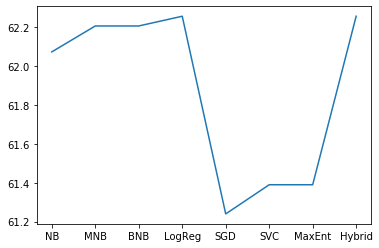

In [ ]:
from matplotlib import pyplot as plt
import numpy as np

# x-axis values
x=[]
for i in accuracy:
    x.append(i[0])

# Y-axis values
y = []
for i in accuracy:
    y.append(i[1])

# Function to plot
plt.plot(y,x)


# function to show the plot
plt.show()



#Learnings:
Sentiment analysis using NLTK and scikit-learn.
Preprocessing steps including cleaning HTML tags, handling contractions, emoticons, stopwords, etc.
Implementation of multiple classifiers including Naive Bayes, Logistic Regression, SVM, Max Entropy, and ensemble methods.
#Libraries:

NLTK: For natural language processing tasks.
BeautifulSoup: For parsing HTML and XML documents.
TextBlob: For text processing tasks like sentiment analysis.
SpellChecker: For spell checking words.
Sklearn: For machine learning algorithms and evaluation metrics.
Matplotlib: For data visualization.
Googletrans: For translation services.
Spellchecker: For spell checking.
Emoji: For handling emojis in text.
One-liner summary:

The code performs sentiment analysis on text data using NLTK and scikit-learn classifiers, including Naive Bayes, Logistic Regression, SVM, and Max Entropy. It employs various preprocessing techniques like cleaning HTML tags, handling contractions, and removing noise. Ensemble methods are also used for improved performance.
#Conclusion:

The sentiment analysis task demonstrates the effectiveness of different classifiers and ensemble methods in categorizing text sentiment. By preprocessing text data and utilizing a combination of classifiers, the model achieves accurate sentiment predictions.